# 一线+新一线城市数据分析职位分析

* 简述：分析下当前一线（北上广深）和新一线（成杭重武）城市发布的数据分析师职位行情
* 数据来源：拉勾
* 数据获取方式：爬虫 Python request和BeautifulSoup
* 数据获取日期： 2019年7月10日
* 分析内容：
    - 维度1：城市
        1. 各个城市发布的职位数量比较（职位分布——地图可视化）
        2. 各个城市发布的职位薪资概况
        3. 各个城市发布的职位对于经验要求（学历要求）
        4. 各个城市发布的职位要求关键词（福利关键词）
        5. 各个城市发布的职位的行业分布
        6. 各个城市简历处理情况
    - 维度2：公司
        1. 各个公司发布的招聘数量
        2. 各个融资阶段的公司的对数据分析师的需求量
        3. 各个行业公司对数据分析师需求量（1.5中已完成）
        4. 各个公司的简历处理情况
    - 维度3：人
        1. 不同学历（经验）的求职者可以预期的薪资

## 数据加载

In [1]:
#导入必要的模块
import pandas as pd
import numpy as np

In [2]:
#本地文件路径
file_path = './lagou.csv'
#读取数据
raw_data = pd.read_csv(file_path)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 24 columns):
positionName         1829 non-null object
salary               1829 non-null object
positionLables       1829 non-null object
workYear             1829 non-null object
positionAdvantage    1829 non-null object
education            1829 non-null object
jobNature            1829 non-null object
skillLables          1829 non-null object
city                 1829 non-null object
companyFullName      1829 non-null object
companyShortName     1829 non-null object
companyLabelList     1829 non-null object
companySize          1829 non-null object
district             1829 non-null object
financeStage         1829 non-null object
industryField        1829 non-null object
businessZones        1099 non-null object
firstType            1829 non-null object
secondType           1829 non-null object
thirdType            1829 non-null object
latitude             1820 non-null float64
longitude 

## 数据预览

In [3]:
#预览数据
raw_data.head()

,positionName,salary,positionLables,workYear,positionAdvantage,education,jobNature,skillLables,city,companyFullName,...,financeStage,industryField,businessZones,firstType,secondType,thirdType,latitude,longitude,resumeProcessDay,resumeProcessRate
0,Senior Data Analyst,15k-30k,"['大数据', '移动互联网', '数据分析', 'SQL', '数据库']",3-5年,"国际化团队,工程师文化 移动应用",本科,全职,"['数据分析', 'SQL', '数据库']",北京,北京安亿致用科技有限公司,...,D轮及以上,移动互联网,"['广渠门', '花市', '光明楼']",产品|需求|项目类,数据分析,数据分析,39.894495,116.440239,1,100
1,数据分析师,15k-20k,"['本地生活', '数据分析', '数据运营', 'SQL', 'BI']",3-5年,餐补，话补，交通补，全额公积金，带薪病假,本科,全职,"['数据分析', '数据运营', 'SQL', 'BI']",北京,北京合生活网络科技有限公司,...,不需要融资,消费生活,NaN,产品|需求|项目类,数据分析,数据分析,39.891893,116.478395,2,61
2,数据分析师,14k-25k,"['互联网金融', 'MySQL', '数据分析']",1-3年,福利待遇好、团队气氛好、上升空间大,本科,全职,"['MySQL', '数据分析']",北京,小小黛朵（北京）科技有限公司,...,B轮,"移动互联网,金融","['亚运村', '安贞']",开发|测试|运维类,数据开发,数据分析,39.972825,116.396575,2,100
3,数据分析师（融资）,8k-13k,"['金融', 'SQL', '数据库', '数据分析', '数据运营']",1-3年,五险一金、带薪年假、晋升空间、大平台,本科,全职,"['SQL', '数据库', '数据分析', '数据运营']",北京,北京弘合柏基金融信息服务有限责任公司,...,不需要融资,金融,"['亮马桥', '燕莎', '麦子店']",产品|需求|项目类,数据分析,数据分析,39.949958,116.463430,0,0
4,数据分析师-用户增长,15k-30k,"['电商', '新零售', 'Hive', 'MySQL', '数据处理']",3-5年,"C2M,牛人多,盈利平台",本科,全职,"['Hive', 'MySQL', '数据处理']",北京,珠海随变科技有限公司,...,不需要融资,电商,NaN,开发|测试|运维类,数据开发,数据分析,39.924162,116.455537,1,100


* 几个字段说明

|字段 |说明 |
|-|-|
|positionLables|职位标签|
|workYear|工作经验|
|positionAdvantage|职位福利|
|education|学历要求|
|jobNature|职位性质（全职兼职）|
|skillLables|技能标签|
|companyLabelList|公司标签|
|district|公司所在行政区|
|financeStage|融资情况|
|industryField|行业领域|
|firstType|职位第一类型|
|secondType|职位第二类型|
|thirdType|职位第三类型|
|resumeProcessDay|简历处理时间（天）|
|resumeProcessRate|简历处理比率（%）|

In [4]:
#总体看下数据情况
raw_data.describe(include='all')

,positionName,salary,positionLables,workYear,positionAdvantage,education,jobNature,skillLables,city,companyFullName,...,financeStage,industryField,businessZones,firstType,secondType,thirdType,latitude,longitude,resumeProcessDay,resumeProcessRate
count,1829,1829,1829,1829,1829,1829,1829,1829,1829,1829,...,1829,1829,1099,1829,1829,1829,1820.000000,1820.000000,1829.000000,1829.000000
unique,744,155,961,7,1491,5,3,563,8,940,...,8,119,503,13,35,83,NaN,NaN,NaN,NaN
top,数据分析师,15k-30k,['数据分析'],3-5年,六险一金，弹性工作，免费三餐，租房补贴,本科,全职,['数据分析'],北京,北京字节跳动科技有限公司,...,上市公司,金融,"['望京', '来广营']",产品|需求|项目类,数据分析,数据分析,NaN,NaN,NaN,NaN
freq,472,205,280,734,26,1523,1745,431,710,85,...,457,221,39,973,924,1353,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,32.454092,116.644145,0.899399,42.866594
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.041002,5.184297,0.958519,44.151206
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.501203,23.138342,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.906144,114.025653,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31.216797,116.433030,1.000000,22.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39.969719,120.206647,1.000000,100.000000


* 8个城市总计1829条数据，字段businessZone存在较多缺失

In [5]:
#查看下businessZone
raw_data['businessZones'][:np.newaxis].describe()

count              1099
unique              503
top       ['望京', '来广营']
freq                 39
Name: businessZones, dtype: object

In [6]:
#后续分析不打算涉及到公司所在商圈，所以删除字段businessZone
raw_data.drop(columns=['businessZones'],inplace=True)
raw_data.head()

,positionName,salary,positionLables,workYear,positionAdvantage,education,jobNature,skillLables,city,companyFullName,...,district,financeStage,industryField,firstType,secondType,thirdType,latitude,longitude,resumeProcessDay,resumeProcessRate
0,Senior Data Analyst,15k-30k,"['大数据', '移动互联网', '数据分析', 'SQL', '数据库']",3-5年,"国际化团队,工程师文化 移动应用",本科,全职,"['数据分析', 'SQL', '数据库']",北京,北京安亿致用科技有限公司,...,东城区,D轮及以上,移动互联网,产品|需求|项目类,数据分析,数据分析,39.894495,116.440239,1,100
1,数据分析师,15k-20k,"['本地生活', '数据分析', '数据运营', 'SQL', 'BI']",3-5年,餐补，话补，交通补，全额公积金，带薪病假,本科,全职,"['数据分析', '数据运营', 'SQL', 'BI']",北京,北京合生活网络科技有限公司,...,朝阳区,不需要融资,消费生活,产品|需求|项目类,数据分析,数据分析,39.891893,116.478395,2,61
2,数据分析师,14k-25k,"['互联网金融', 'MySQL', '数据分析']",1-3年,福利待遇好、团队气氛好、上升空间大,本科,全职,"['MySQL', '数据分析']",北京,小小黛朵（北京）科技有限公司,...,朝阳区,B轮,"移动互联网,金融",开发|测试|运维类,数据开发,数据分析,39.972825,116.396575,2,100
3,数据分析师（融资）,8k-13k,"['金融', 'SQL', '数据库', '数据分析', '数据运营']",1-3年,五险一金、带薪年假、晋升空间、大平台,本科,全职,"['SQL', '数据库', '数据分析', '数据运营']",北京,北京弘合柏基金融信息服务有限责任公司,...,朝阳区,不需要融资,金融,产品|需求|项目类,数据分析,数据分析,39.949958,116.463430,0,0
4,数据分析师-用户增长,15k-30k,"['电商', '新零售', 'Hive', 'MySQL', '数据处理']",3-5年,"C2M,牛人多,盈利平台",本科,全职,"['Hive', 'MySQL', '数据处理']",北京,珠海随变科技有限公司,...,朝阳区,不需要融资,电商,开发|测试|运维类,数据开发,数据分析,39.924162,116.455537,1,100


In [7]:
#查看下关于职位的类型划分
raw_data[['firstType','secondType','thirdType']].describe()

,firstType,secondType,thirdType
count,1829,1829,1829
unique,13,35,83
top,产品|需求|项目类,数据分析,数据分析
freq,973,924,1353


## 数据清洗

### 重复数据

In [8]:
#判断是否存在重复数据，显示所有重复数据
raw_data.duplicated(keep=False).any()

True

* 返回True说明存在重复值，下面先打印看下重复数据

In [9]:
raw_data[raw_data.duplicated(keep=False)].sort_values(by='positionName')

,positionName,salary,positionLables,workYear,positionAdvantage,education,jobNature,skillLables,city,companyFullName,...,district,financeStage,industryField,firstType,secondType,thirdType,latitude,longitude,resumeProcessDay,resumeProcessRate
1769,BI数据分析师,30k-50k,['数据分析'],5-10年,年终奖、补充保险、餐补、交通补助,本科,全职,['数据分析'],杭州,上海钾呈信息科技有限公司,...,西湖区,不需要融资,"移动互联网,电商",开发|测试|运维类,数据开发,数据分析,30.288853,120.076481,0,0
1765,BI数据分析师,30k-50k,['数据分析'],5-10年,年终奖、补充保险、餐补、交通补助,本科,全职,['数据分析'],杭州,上海钾呈信息科技有限公司,...,西湖区,不需要融资,"移动互联网,电商",开发|测试|运维类,数据开发,数据分析,30.288853,120.076481,0,0
282,CRM数据分析师,8k-13k,"['新零售', '消费者分析']",3-5年,五险一金、带薪年假、补充医疗保险,本科,全职,['消费者分析'],北京,北京孩思乐商业有限公司,...,朝阳区,不需要融资,"电商,消费生活",市场|商务类,市场|营销,商业数据分析,39.969391,116.490562,0,0
285,CRM数据分析师,8k-13k,"['新零售', '消费者分析']",3-5年,五险一金、带薪年假、补充医疗保险,本科,全职,['消费者分析'],北京,北京孩思乐商业有限公司,...,朝阳区,不需要融资,"电商,消费生活",市场|商务类,市场|营销,商业数据分析,39.969391,116.490562,0,0
706,Senior Data Analyst,15k-30k,"['大数据', '移动互联网', '数据分析', 'SQL', '数据库']",3-5年,"国际化团队,工程师文化 移动应用",本科,全职,"['数据分析', 'SQL', '数据库']",北京,北京安亿致用科技有限公司,...,东城区,D轮及以上,移动互联网,产品|需求|项目类,数据分析,数据分析,39.894495,116.440239,1,100
695,Senior Data Analyst,15k-30k,"['大数据', '移动互联网', '数据分析', 'SQL', '数据库']",3-5年,"国际化团队,工程师文化 移动应用",本科,全职,"['数据分析', 'SQL', '数据库']",北京,北京安亿致用科技有限公司,...,东城区,D轮及以上,移动互联网,产品|需求|项目类,数据分析,数据分析,39.894495,116.440239,1,100
690,Senior Data Analyst,15k-30k,"['大数据', '移动互联网', '数据分析', 'SQL', '数据库']",3-5年,"国际化团队,工程师文化 移动应用",本科,全职,"['数据分析', 'SQL', '数据库']",北京,北京安亿致用科技有限公司,...,东城区,D轮及以上,移动互联网,产品|需求|项目类,数据分析,数据分析,39.894495,116.440239,1,100
682,Senior Data Analyst,15k-30k,"['大数据', '移动互联网', '数据分析', 'SQL', '数据库']",3-5年,"国际化团队,工程师文化 移动应用",本科,全职,"['数据分析', 'SQL', '数据库']",北京,北京安亿致用科技有限公司,...,东城区,D轮及以上,移动互联网,产品|需求|项目类,数据分析,数据分析,39.894495,116.440239,1,100
643,Senior Data Analyst,15k-30k,"['大数据', '移动互联网', '数据分析', 'SQL', '数据库']",3-5年,"国际化团队,工程师文化 移动应用",本科,全职,"['数据分析', 'SQL', '数据库']",北京,北京安亿致用科技有限公司,...,东城区,D轮及以上,移动互联网,产品|需求|项目类,数据分析,数据分析,39.894495,116.440239,1,100
610,Senior Data Analyst,15k-30k,"['大数据', '移动互联网', '数据分析', 'SQL', '数据库']",3-5年,"国际化团队,工程师文化 移动应用",本科,全职,"['数据分析', 'SQL', '数据库']",北京,北京安亿致用科技有限公司,...,东城区,D轮及以上,移动互联网,产品|需求|项目类,数据分析,数据分析,39.894495,116.440239,1,100


In [10]:
#删除重复数据,并且只保留第一条重复数据
raw_data.drop_duplicates(keep='first',inplace=True)
#确认是否还有重复数据存在
if ~raw_data.duplicated().any():
    print('已不存在完全重复数据')
else:
    print('数据还是存在重复，怎么回事，老铁！')

已不存在完全重复数据


In [11]:
#查看数据信息
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1803 entries, 0 to 1828
Data columns (total 23 columns):
positionName         1803 non-null object
salary               1803 non-null object
positionLables       1803 non-null object
workYear             1803 non-null object
positionAdvantage    1803 non-null object
education            1803 non-null object
jobNature            1803 non-null object
skillLables          1803 non-null object
city                 1803 non-null object
companyFullName      1803 non-null object
companyShortName     1803 non-null object
companyLabelList     1803 non-null object
companySize          1803 non-null object
district             1803 non-null object
financeStage         1803 non-null object
industryField        1803 non-null object
firstType            1803 non-null object
secondType           1803 non-null object
thirdType            1803 non-null object
latitude             1794 non-null float64
longitude            1794 non-null float64
resumePro

```
删除重复数据后，剩余1803条数据，23个字段，其中latitude、longitude经纬度字段存在9条空值（同时空）
```

### 缺失数据

In [12]:
#查看下经纬度字段为空的数据，指定统计轴方向,并提取这些公司及行政区名称
loss_latitude_company_lst = raw_data[raw_data[['latitude','longitude']].isnull().all(axis=1)][['companyFullName','district']]
for value in loss_latitude_company_lst.values:
    print(value)
    print(type(value))

['北京寄云鼎城科技有限公司' '海淀区']
<class 'numpy.ndarray'>
['北京拉勾网络技术有限公司' '海淀区']
<class 'numpy.ndarray'>
['北京寄云鼎城科技有限公司' '海淀区']
<class 'numpy.ndarray'>
['北京金山办公软件股份有限公司' '海淀区']
<class 'numpy.ndarray'>
['北京趣拿软件科技有限公司' '海淀区']
<class 'numpy.ndarray'>
['成都西山居互动娱乐科技有限公司珠海分公司' '海淀区']
<class 'numpy.ndarray'>
['北京北森云计算股份有限公司' '海淀区']
<class 'numpy.ndarray'>
['北京趣拿软件科技有限公司' '海淀区']
<class 'numpy.ndarray'>
['北京轻松筹网络科技有限公司' '东城区']
<class 'numpy.ndarray'>


In [13]:
raw_data[raw_data['companyFullName'].isin(loss_latitude_company_lst['companyFullName'])][['companyFullName','district','latitude','longitude']].sort_values(by='companyFullName')

,companyFullName,district,latitude,longitude
488,北京北森云计算股份有限公司,海淀区,NaN,NaN
478,北京北森云计算股份有限公司,海淀区,40.036060,116.315230
324,北京寄云鼎城科技有限公司,海淀区,NaN,NaN
335,北京寄云鼎城科技有限公司,海淀区,NaN,NaN
714,北京寄云鼎城科技有限公司,浦东新区,30.893520,121.926599
325,北京拉勾网络技术有限公司,海淀区,NaN,NaN
336,北京拉勾网络技术有限公司,海淀区,39.982184,116.307471
542,北京趣拿软件科技有限公司,海淀区,40.045892,116.357059
521,北京趣拿软件科技有限公司,海淀区,NaN,NaN
443,北京趣拿软件科技有限公司,海淀区,39.977523,116.305723


In [14]:
#查看这些公司发布的同行政区下其他职位信息是否包含经纬度信息
#多条件比较时，要一个个比较，不能用列表多个比较
fill_company_lst = list(raw_data[(raw_data['companyFullName'].isin(loss_latitude_company_lst['companyFullName'])) 
         & (raw_data['district'].isin(loss_latitude_company_lst['district']))
         & ~(raw_data['latitude'].isna())]['companyFullName'].unique())
fill_company_lst

['北京拉勾网络技术有限公司', '北京趣拿软件科技有限公司', '北京金山办公软件股份有限公司', '北京北森云计算股份有限公司']

* ['北京拉勾网络技术有限公司', '北京趣拿软件科技有限公司', '北京金山办公软件股份有限公司', '北京北森云计算股份有限公司']

这四家公司其他的职位信息数据中存在经纬度信息，因此对于缺失的经纬度信息，拿同公司同行政区的其他职位的经纬度来填补

In [15]:
#提取同公司同行政区的经纬度
fill_data = {}
# raw_data[(raw_data['companyFullName'] == '北京趣拿软件科技有限公司') 
#          & (raw_data['district'] == '海淀区')
#          & ~(raw_data['latitude'].isna())][['latitude','longitude']].mean().to_list()
for value in loss_latitude_company_lst.values:
    #对于例如像北京趣拿软件科技有限公司在海淀区的职位数据很多，但是经纬度都不一样，填充值选取这些数据的平均值
    if value[0] in fill_company_lst:
    #字典的不能是列表
        fill_data[tuple(value)] = raw_data[(raw_data['companyFullName'] == value[0]) 
             & (raw_data['district'] == value[1])
             & ~(raw_data['latitude'].isna())][['latitude','longitude']].mean().to_list()
fill_data

{('北京拉勾网络技术有限公司', '海淀区'): [39.982184000000004, 116.30747099999999],
 ('北京金山办公软件股份有限公司', '海淀区'): [40.0340885, 116.333912],
 ('北京趣拿软件科技有限公司', '海淀区'): [40.0052956, 116.32756380000001],
 ('北京北森云计算股份有限公司', '海淀区'): [40.03606, 116.31523]}

In [16]:
#对缺失经纬度的数据进行填充
for key in fill_data:
    print(fill_data[key][0],fill_data[key][1])
    #纬度
    raw_data.loc[(raw_data['companyFullName'] == key[0]) 
             & (raw_data['district'] == key[1])
            & (raw_data['latitude'].isna())
            ,'latitude'] = fill_data[key][0]
    #经度
    raw_data.loc[(raw_data['companyFullName'] == key[0]) 
             & (raw_data['district'] == key[1])
            & (raw_data['longitude'].isna())
            ,'longitude'] = fill_data[key][1]

39.982184000000004 116.30747099999999
40.0340885 116.333912
40.0052956 116.32756380000001
40.03606 116.31523


In [17]:
#查看填充后的数据缺失情况
raw_data[raw_data[['latitude','longitude']].isnull().all(axis=1)][['companyFullName','district','latitude','longitude']]

,companyFullName,district,latitude,longitude
324,北京寄云鼎城科技有限公司,海淀区,NaN,NaN
335,北京寄云鼎城科技有限公司,海淀区,NaN,NaN
463,成都西山居互动娱乐科技有限公司珠海分公司,海淀区,NaN,NaN
628,北京轻松筹网络科技有限公司,东城区,NaN,NaN


- 数据填充后，不存在之前fill_company_lst中的公司，说明填充成功

####  注意，下面是两个错误点

- 错误点1 多条件比较

In [18]:
test_list = [['北京字节跳动有限公司','海淀区','数据分析师','15'],['新浪网技术有限公司','海淀区','行业数据分析师','12'],['北京轻松筹网络科技有限公司','东城区','高级数据分析师','10']]

In [19]:
#多个条件比较时，不要直接像下面那样比较，得到的结果是不正确的
test_list = []
for i in  range(0,1084):
    #目的是检索公司名称为北京北森云计算股份有限公司，并且位于海淀区的职位
    if (raw_data[['companyFullName','district']].isin(['北京北森云计算股份有限公司','海淀区']).all(axis=1)).to_list()[i] == True:
            test_list.append(i)
raw_data.loc[test_list]

,positionName,salary,positionLables,workYear,positionAdvantage,education,jobNature,skillLables,city,companyFullName,...,district,financeStage,industryField,firstType,secondType,thirdType,latitude,longitude,resumeProcessDay,resumeProcessRate
469,行业数据分析师,15k-30k,['数据分析'],1-3年,六险一金，弹性工作，免费三餐，租房补贴,本科,全职,[],北京,北京字节跳动科技有限公司,...,海淀区,C轮,文娱丨内容,产品|需求|项目类,数据分析,其他数据分析,39.968670,116.330086,0,0
479,数据分析师-业务分析方向,15k-30k,"['移动互联网', '数据分析']",3-5年,技术氛围浓厚、大平台、六险一金,本科,全职,['数据分析'],北京,新浪网技术（中国）有限公司,...,海淀区,上市公司,文娱丨内容,产品|需求|项目类,数据分析,数据分析,40.041543,116.276316,0,0


- 错误点2 DataFrame (单列多列）子数据集fillna，即便设置inplace参数，修改也不成功

- 修改值一定要用df.loc[row_idnex,col_index] = values
- row_index可以是判断多个条件
    
    提示信息：
    C:\Software\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame

In [20]:
test_df = pd.DataFrame([
    [1,2,np.nan],
    [2,np.nan,7],
    [np.nan,8,12]
],columns=['A','B','C'])

In [21]:
test_df[['A','B']].fillna(value={'A':88,'B':1200},inplace=True)

C:\Software\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
test_df

,A,B,C
0,1.0,2.0,NaN
1,2.0,NaN,7.0
2,NaN,8.0,12.0


In [23]:
test_df['B'].fillna(value={'B':1200},inplace=True)
test_df

,A,B,C
0,1.0,2.0,NaN
1,2.0,NaN,7.0
2,NaN,8.0,12.0


In [24]:
#赋值操作请使用df.loc[row_index, col_index]，行索引可以是判断条件
test_df.loc[test_df['A'] > 1,['B','C']]

,B,C
1,NaN,7.0


In [25]:
test_df.fillna(value={'A':88,'B':1200},inplace=True)
test_df

,A,B,C
0,1.0,2.0,NaN
1,2.0,1200.0,7.0
2,88.0,8.0,12.0


### Label标签类数据

* positionLables、skillLables、companyLabelList这些标签字段，包含'[]'等符号，但是是字符串数据格式，目标是将['D轮融资', '国际化团队']这样的格式数据转换为 D轮融资, 国际化团队 

In [26]:
def label_func(x):
    x = x.strip('[]')
    x = x.replace("'",'')
    return x
raw_data[['positionLables','skillLables','companyLabelList']] = raw_data[['positionLables','skillLables','companyLabelList']].applymap(label_func)

In [27]:
raw_data.head()

,positionName,salary,positionLables,workYear,positionAdvantage,education,jobNature,skillLables,city,companyFullName,...,district,financeStage,industryField,firstType,secondType,thirdType,latitude,longitude,resumeProcessDay,resumeProcessRate
0,Senior Data Analyst,15k-30k,"大数据, 移动互联网, 数据分析, SQL, 数据库",3-5年,"国际化团队,工程师文化 移动应用",本科,全职,"数据分析, SQL, 数据库",北京,北京安亿致用科技有限公司,...,东城区,D轮及以上,移动互联网,产品|需求|项目类,数据分析,数据分析,39.894495,116.440239,1,100
1,数据分析师,15k-20k,"本地生活, 数据分析, 数据运营, SQL, BI",3-5年,餐补，话补，交通补，全额公积金，带薪病假,本科,全职,"数据分析, 数据运营, SQL, BI",北京,北京合生活网络科技有限公司,...,朝阳区,不需要融资,消费生活,产品|需求|项目类,数据分析,数据分析,39.891893,116.478395,2,61
2,数据分析师,14k-25k,"互联网金融, MySQL, 数据分析",1-3年,福利待遇好、团队气氛好、上升空间大,本科,全职,"MySQL, 数据分析",北京,小小黛朵（北京）科技有限公司,...,朝阳区,B轮,"移动互联网,金融",开发|测试|运维类,数据开发,数据分析,39.972825,116.396575,2,100
3,数据分析师（融资）,8k-13k,"金融, SQL, 数据库, 数据分析, 数据运营",1-3年,五险一金、带薪年假、晋升空间、大平台,本科,全职,"SQL, 数据库, 数据分析, 数据运营",北京,北京弘合柏基金融信息服务有限责任公司,...,朝阳区,不需要融资,金融,产品|需求|项目类,数据分析,数据分析,39.949958,116.463430,0,0
4,数据分析师-用户增长,15k-30k,"电商, 新零售, Hive, MySQL, 数据处理",3-5年,"C2M,牛人多,盈利平台",本科,全职,"Hive, MySQL, 数据处理",北京,珠海随变科技有限公司,...,朝阳区,不需要融资,电商,开发|测试|运维类,数据开发,数据分析,39.924162,116.455537,1,100


### 薪资分列

In [28]:
#查看salary字段是否包含类似'10k-20k*15薪'的值
print(raw_data['salary'].str.contains('\*').any() or raw_data['salary'].str.contains('薪').any())

False


* 上面结果说明salary字段不包含*或者薪（or全假才为假，有真即真）

In [29]:
#验证下salary字段都包含-，给出的薪资都是一个范围
raw_data['salary'].str.contains('-').any()

True

In [30]:
#拆分字段salary -> min_salary,max_salry，并且取薪资的整数
# raw_data[['salary1','salary2']] = raw_data['salary'].str.split('-',expand=True)
raw_data['min_salary'] = raw_data['salary'].apply(lambda x : int(x.split('-')[0][:-1]) )
raw_data['max_salary'] = raw_data['salary'].apply(lambda x : int(x.split('-')[1][:-1]) )
raw_data.head()

,positionName,salary,positionLables,workYear,positionAdvantage,education,jobNature,skillLables,city,companyFullName,...,industryField,firstType,secondType,thirdType,latitude,longitude,resumeProcessDay,resumeProcessRate,min_salary,max_salary
0,Senior Data Analyst,15k-30k,"大数据, 移动互联网, 数据分析, SQL, 数据库",3-5年,"国际化团队,工程师文化 移动应用",本科,全职,"数据分析, SQL, 数据库",北京,北京安亿致用科技有限公司,...,移动互联网,产品|需求|项目类,数据分析,数据分析,39.894495,116.440239,1,100,15,30
1,数据分析师,15k-20k,"本地生活, 数据分析, 数据运营, SQL, BI",3-5年,餐补，话补，交通补，全额公积金，带薪病假,本科,全职,"数据分析, 数据运营, SQL, BI",北京,北京合生活网络科技有限公司,...,消费生活,产品|需求|项目类,数据分析,数据分析,39.891893,116.478395,2,61,15,20
2,数据分析师,14k-25k,"互联网金融, MySQL, 数据分析",1-3年,福利待遇好、团队气氛好、上升空间大,本科,全职,"MySQL, 数据分析",北京,小小黛朵（北京）科技有限公司,...,"移动互联网,金融",开发|测试|运维类,数据开发,数据分析,39.972825,116.396575,2,100,14,25
3,数据分析师（融资）,8k-13k,"金融, SQL, 数据库, 数据分析, 数据运营",1-3年,五险一金、带薪年假、晋升空间、大平台,本科,全职,"SQL, 数据库, 数据分析, 数据运营",北京,北京弘合柏基金融信息服务有限责任公司,...,金融,产品|需求|项目类,数据分析,数据分析,39.949958,116.463430,0,0,8,13
4,数据分析师-用户增长,15k-30k,"电商, 新零售, Hive, MySQL, 数据处理",3-5年,"C2M,牛人多,盈利平台",本科,全职,"Hive, MySQL, 数据处理",北京,珠海随变科技有限公司,...,电商,开发|测试|运维类,数据开发,数据分析,39.924162,116.455537,1,100,15,30


In [31]:
#删除salary字段
raw_data.drop(columns=['salary'],inplace=True)
raw_data.head()

,positionName,positionLables,workYear,positionAdvantage,education,jobNature,skillLables,city,companyFullName,companyShortName,...,industryField,firstType,secondType,thirdType,latitude,longitude,resumeProcessDay,resumeProcessRate,min_salary,max_salary
0,Senior Data Analyst,"大数据, 移动互联网, 数据分析, SQL, 数据库",3-5年,"国际化团队,工程师文化 移动应用",本科,全职,"数据分析, SQL, 数据库",北京,北京安亿致用科技有限公司,AppAnnie,...,移动互联网,产品|需求|项目类,数据分析,数据分析,39.894495,116.440239,1,100,15,30
1,数据分析师,"本地生活, 数据分析, 数据运营, SQL, BI",3-5年,餐补，话补，交通补，全额公积金，带薪病假,本科,全职,"数据分析, 数据运营, SQL, BI",北京,北京合生活网络科技有限公司,北京合生活网络科技有限公司,...,消费生活,产品|需求|项目类,数据分析,数据分析,39.891893,116.478395,2,61,15,20
2,数据分析师,"互联网金融, MySQL, 数据分析",1-3年,福利待遇好、团队气氛好、上升空间大,本科,全职,"MySQL, 数据分析",北京,小小黛朵（北京）科技有限公司,花生米富,...,"移动互联网,金融",开发|测试|运维类,数据开发,数据分析,39.972825,116.396575,2,100,14,25
3,数据分析师（融资）,"金融, SQL, 数据库, 数据分析, 数据运营",1-3年,五险一金、带薪年假、晋升空间、大平台,本科,全职,"SQL, 数据库, 数据分析, 数据运营",北京,北京弘合柏基金融信息服务有限责任公司,有利网,...,金融,产品|需求|项目类,数据分析,数据分析,39.949958,116.463430,0,0,8,13
4,数据分析师-用户增长,"电商, 新零售, Hive, MySQL, 数据处理",3-5年,"C2M,牛人多,盈利平台",本科,全职,"Hive, MySQL, 数据处理",北京,珠海随变科技有限公司,必要商城,...,电商,开发|测试|运维类,数据开发,数据分析,39.924162,116.455537,1,100,15,30


In [32]:
#注意，以下是在对薪资k或K考虑采用替换replace的方式进行末尾单位替换时，遇到的问题
#替换值的部分时，直接用下面语句是替换不了的，直接用下面语句是要全匹配才能被替换
# raw_data[['min_salary','max_salary']].replace(['k','K'],'',inplace=True)
# raw_data['min_salary'] = raw_data['min_salary'].str.replace(['k','K'],'') 
#上面这条语句错误，这个时候是str的replace方法，而不是DataFrame的方法，没有inplace参数并且被替换值不能是一个列表

### 异常数据

#### 薪资异常数据

In [33]:
raw_data['jobNature'].unique()

array(['全职', '实习', '兼职'], dtype=object)

In [34]:
#查看职位类型是实习或兼职的职位薪资情况，并按最低薪资排序
raw_data[raw_data['jobNature'].isin(['实习','兼职'])].sort_values(by='min_salary')

,positionName,positionLables,workYear,positionAdvantage,education,jobNature,skillLables,city,companyFullName,companyShortName,...,industryField,firstType,secondType,thirdType,latitude,longitude,resumeProcessDay,resumeProcessRate,min_salary,max_salary
1197,数据分析实习生,数据分析,应届毕业生,平台好 、导师制、包三餐,本科,实习,数据分析,广州,网易（杭州）有限公司,网易,...,电商,市场|商务类,市场|营销,商业数据分析,23.123619,113.371583,1,100,1,2
156,数据分析实习生,"大数据, 数据分析",应届毕业生,数据分析,本科,实习,数据分析,北京,行吟信息科技（上海）有限公司,小红书,...,消费生活,产品|需求|项目类,数据分析,数据分析,40.003335,116.488635,2,100,2,4
553,数据分析实习生-用户增长方向,数据分析,不限,免费三餐，租房补贴，休闲下午茶，扁平管理,本科,实习,,北京,北京字节跳动科技有限公司,字节跳动,...,文娱丨内容,产品|需求|项目类,数据分析,其他数据分析,39.968670,116.330086,0,0,2,4
763,数据分析实习生 (MJ000998),数据分析,不限,"公司平台,晋升空间,弹性工作,节假日福利",不限,实习,数据分析,上海,挖财网络技术有限公司,挖财,...,工具,开发|测试|运维类,数据开发,数据分析,31.229014,121.515139,0,12,2,4
1058,数据分析实习,大数据,应届毕业生,弹性时间,大专,实习,,上海,二十一世纪晨哨数据（上海）有限公司,晨哨网,...,金融,开发|测试|运维类,数据开发,数据分析,31.223038,121.393485,1,33,2,3
1061,实习生 - SEO/SEM/数据分析方向,"运营, SEM, SEO, 数据分析",应届毕业生,"实战培训,学习补贴,可转正,环境好",本科,实习,"运营, SEM, SEO, 数据分析",上海,上海储田商务咨询有限公司,储田商务,...,"移动互联网,数据服务",运营|编辑|客服类,运营,其他运营,31.244723,121.580115,1,23,2,4
1065,数据分析实习生,"SQLServer, 数据分析",应届毕业生,一对一导师,本科,实习,"SQLServer, 数据分析",上海,百姓网股份有限公司,百姓网,...,移动互联网,开发|测试|运维类,数据开发,数据分析,31.129531,121.360881,0,0,2,3
508,数据分析助理,移动互联网,应届毕业生,国际化平台、扁平化管理,本科,实习,,北京,联想（北京）有限公司,联想,...,硬件,运营|编辑|客服类,运营,数据运营,40.042810,116.309860,0,0,2,4
498,数据分析实习生,"电商, 教育, 数据分析",应届毕业生,"实习,学习机会,教育,互联网相关",本科,实习,数据分析,北京,北京新东方教育科技(集团)有限公司,新东方教育科技集团,...,教育,产品|需求|项目类,数据分析,数据分析,39.983314,116.317907,0,0,2,3
1066,数据分析实习,"地图, 分类信息",应届毕业生,"弹性,成长,独当一面",不限,实习,,上海,上海楷青信息技术有限公司,楷青,...,"数据服务,企业服务",开发|测试|运维类,数据开发,数据采集,31.125188,121.357365,0,0,2,3


* row_index = 639\1028 内蒙古易恒网络科技有限责任公司 发布的两个职位信息城市都不同，薪资又高的离谱，可信度不高，删除(在家兼职月薪能达到12K以上，这样的工作怎么不给我来一打)
* row_index = 400 好未来发布的兼职数据分析实习生职位，薪资是200-300，这里的意思应该是200-300每天，换算成月薪是6-9k，所以将值修改一下即可
* 其余兼职实习薪资除了个别几个高一点之外，总体还是正常，因此不再细致处理

In [35]:
#删除易恒网络科技有限责任公司的职位信息
raw_data.drop(index=[639,1028],inplace=True)

In [36]:
#对row_index=400的薪资作出调整，即单位换算
raw_data.loc[400,'min_salary'] = 6
raw_data.loc[400,'max_salary'] = 9
raw_data.loc[400][['min_salary','max_salary']]

min_salary    6
max_salary    9
Name: 400, dtype: object

In [37]:
#查看职位类型是全职的职位，最低薪资低于5k的职位
raw_data[(raw_data['min_salary'] < 5) & (raw_data['jobNature'] == '全职')][['positionName','companyFullName','workYear','city','min_salary','max_salary']].sort_values(by=['positionName','companyFullName'])

,positionName,companyFullName,workYear,city,min_salary,max_salary
1366,0222JM-数据分析师,中国平安人寿保险股份有限公司,1-3年,深圳,1,1
1533,初级数据分析师,乐格商业咨询（深圳）有限公司,1年以下,深圳,4,5
1749,助理数据分析师,杭州盛锋营销策划有限公司,1年以下,杭州,3,5
1627,医疗数据分析师,成都启迪数字医疗科技发展有限公司,1-3年,成都,4,8
1499,大数据分析师,深圳恒实网络科技有限公司,不限,深圳,4,7
1434,投资并购部-数据分析员,腾讯科技（深圳）有限公司,1-3年,深圳,1,2
1784,投资数据分析师,重庆道微投资管理有限公司,不限,重庆,4,6
1285,推广与数据分析专员,青木数字技术股份有限公司,不限,广州,4,8
1235,数据分析,广州麒易盒子科技有限公司,1-3年,广州,4,7
243,数据分析,永杨安风（北京）科技有限公司,1-3年,北京,3,4


* 从上面结果看出，最低薪资低于5k的全职工资，薪资异常有两种：
    - 第一种：职位名称是包含实习，但是职位类型却选择为'全职'
    - 第二种：薪资异常，不符合市场规律，如930、937宜家发布在上海的高级数据分析师职位，薪资只有1-2k，显然是异常数据

In [38]:
#首先处理第一种情况，将职位信息包含实习标记的数据中的职位状态统一由'全职'修改为'实习'
raw_data.loc[(raw_data['positionName'].str.contains('实习')) & (raw_data['jobNature'] == '全职'), 'jobNature'] = '实习'

In [39]:
#验证一下是否还有实习职位是'全职状态'
raw_data.loc[(raw_data['positionName'].str.contains('实习')) & (raw_data['jobNature'] == '全职')]

,positionName,positionLables,workYear,positionAdvantage,education,jobNature,skillLables,city,companyFullName,companyShortName,...,industryField,firstType,secondType,thirdType,latitude,longitude,resumeProcessDay,resumeProcessRate,min_salary,max_salary


In [40]:
#处理第二种情况 ，对于最低薪资、最高薪资都低于5k的全职工作都删除
raw_data.drop(index = raw_data[(raw_data['max_salary'] < 5) & (raw_data['jobNature'] == '全职')].index,inplace=True)
#验证一下数据的确删除了
raw_data[(raw_data['max_salary'] < 5) & (raw_data['jobNature'] == '全职')]

,positionName,positionLables,workYear,positionAdvantage,education,jobNature,skillLables,city,companyFullName,companyShortName,...,industryField,firstType,secondType,thirdType,latitude,longitude,resumeProcessDay,resumeProcessRate,min_salary,max_salary


#### 部分重复

In [41]:
raw_data[raw_data.duplicated(subset=['companyFullName','district','positionName'],keep=False)].sort_values(by=['positionName','companyFullName'])

,positionName,positionLables,workYear,positionAdvantage,education,jobNature,skillLables,city,companyFullName,companyShortName,...,industryField,firstType,secondType,thirdType,latitude,longitude,resumeProcessDay,resumeProcessRate,min_salary,max_salary
1395,29912-数据分析-运营开发,"ETL, Hadoop, 数据库开发",1-3年,平台大,本科,全职,"ETL, Hadoop, 数据库开发",深圳,腾讯科技（深圳）有限公司,腾讯,...,社交,开发|测试|运维类,数据开发,ETL,22.540412,113.935346,1,100,20,40
1430,29912-数据分析-运营开发,"MySQL, 数据仓库, Hadoop",3-5年,大平台 新业务,本科,全职,"MySQL, 数据仓库, Hadoop",深圳,腾讯科技（深圳）有限公司,腾讯,...,社交,开发|测试|运维类,数据开发,其他数据开发,22.522700,113.935173,0,0,20,40
716,业务数据分析,"其他, 数据分析",不限,节日福利、七天年假、员工班车、加班工资,不限,全职,数据分析,上海,上海旺旺食品集团有限公司,旺旺集团,...,"电商,移动互联网",市场|商务类,市场|营销,商业数据分析,31.188560,121.395046,0,0,6,8
919,业务数据分析,"数据分析, SPSS",1-3年,节日福利、七天年假、员工班车、加班工资,大专,全职,"数据分析, SPSS",上海,上海旺旺食品集团有限公司,旺旺集团,...,"电商,移动互联网",产品|需求|项目类,数据分析,数据分析,31.188560,121.395046,0,0,6,8
533,信息安全数据分析师,"安全, 数据分析",3-5年,平台大 福利待遇好 团队氛围好,本科,全职,"安全, 数据分析",北京,北京颐顺太和软件科技有限公司,新东方,...,教育,开发|测试|运维类,运维,信息安全,39.983473,116.317334,1,61,20,37
583,信息安全数据分析师,信息安全,3-5年,五险一金 加班补助 员工旅游 节日福利,本科,全职,,北京,北京颐顺太和软件科技有限公司,新东方,...,教育,开发|测试|运维类,数据开发,数据分析,39.983473,116.317334,1,61,20,40
1815,商业化-高级数据分析师,项目管理,3-5年,六险一金，餐补，带薪休假，扁平管理,本科,全职,项目管理,武汉,北京字节跳动科技有限公司,字节跳动,...,文娱丨内容,产品|需求|项目类,项目管理,其他项目管理,30.582284,114.364617,1,100,8,16
1827,商业化-高级数据分析师,"移动互联网, 数据分析, 行业分析, 市场竞争分析",3-5年,六险一金、团队氛围好、餐补、扁平化管理,本科,全职,"数据分析, 行业分析, 市场竞争分析",武汉,北京字节跳动科技有限公司,字节跳动,...,文娱丨内容,市场|商务类,市场|营销,商业数据分析,30.582284,114.364617,1,100,6,12
893,商业化数据分析师,"移动互联网, 数据分析",3-5年,六险二金 餐补 租房补贴 岗位晋升,本科,全职,数据分析,上海,北京字节跳动科技有限公司,字节跳动,...,文娱丨内容,产品|需求|项目类,数据分析,数据分析,22.867666,108.296770,0,0,15,30
935,商业化数据分析师,数据分析,3-5年,六险一金，弹性工作，免费三餐，租房补贴,本科,全职,,上海,北京字节跳动科技有限公司,字节跳动,...,文娱丨内容,产品|需求|项目类,数据分析,其他数据分析,31.169555,31.169555,0,0,20,40


* 观察以上数据发现，同一公司在同一行政区可能会发布多条相同职位名称的职位信息，但是会在其他关键信息上有所差别，比如workYear\positionLabels\positionAdvantage等，对于这种数据是否需要处理，凭个人看法。可以选择忽略，也可以选择将信息汇总为一条，或者暴力点直接删除重复记录。在此，选择删除这些"重复"记录
* 考虑到，有些职位虽然公司、行政区、职位名称都相同，但经验要求不同，可能该职位虽然同名，但有级别差异，所以，在删除时加入条件workYear

In [42]:
#先查看下"重复"职位分布情况
raw_data[raw_data.duplicated(subset=['companyFullName','district','positionName','workYear'],keep=False)]['city'].value_counts()

北京    84
上海    22
广州     4
杭州     4
武汉     2
深圳     2
Name: city, dtype: int64

In [43]:
#删除上述的重复记录，保留第一条记录
raw_data.drop_duplicates(subset=['companyFullName','district','positionName','workYear'],keep='first',inplace=True)
#查看下是否还存在
raw_data[raw_data.duplicated(subset=['companyFullName','district','positionName','workYear'],keep=False)]

,positionName,positionLables,workYear,positionAdvantage,education,jobNature,skillLables,city,companyFullName,companyShortName,...,industryField,firstType,secondType,thirdType,latitude,longitude,resumeProcessDay,resumeProcessRate,min_salary,max_salary


In [44]:
#整理完数据后，查看下数据信息
raw_data.describe(include='all')

,positionName,positionLables,workYear,positionAdvantage,education,jobNature,skillLables,city,companyFullName,companyShortName,...,industryField,firstType,secondType,thirdType,latitude,longitude,resumeProcessDay,resumeProcessRate,min_salary,max_salary
count,1730,1730,1730,1730,1730,1730,1730,1730,1730,1730,...,1730,1730,1730,1730,1726.000000,1726.000000,1730.000000,1730.000000,1730.000000,1730.000000
unique,741,940,7,1449,5,3,551,8,938,939,...,119,13,35,82,NaN,NaN,NaN,NaN,NaN,NaN
top,数据分析师,数据分析,3-5年,六险一金，弹性工作，免费三餐，租房补贴,本科,全职,数据分析,北京,北京字节跳动科技有限公司,字节跳动,...,金融,产品|需求|项目类,数据分析,数据分析,NaN,NaN,NaN,NaN,NaN,NaN
freq,432,254,697,24,1432,1633,404,643,79,79,...,206,915,869,1274,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,32.254544,116.662129,0.900000,42.175723,14.453757,25.019653
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.048424,4.878968,0.963084,43.982610,7.636053,13.240301
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22.501203,23.138342,0.000000,0.000000,1.000000,2.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,23.176009,113.993578,0.000000,0.000000,10.000000,15.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31.210738,116.421803,1.000000,20.000000,15.000000,25.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39.968670,120.219646,1.000000,100.000000,20.000000,30.000000


In [45]:
#将处理完后的数据保存到本地文件
raw_data.to_csv('./lagou_processed_data.csv',index=False,encoding='utf-8-sig')
print('保存成功')

保存成功


## 数据可视化

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
sns.set(font='kaiti', rc={'axes.unicode_minus' : False}) #解决图标中文、符号显示问题

### 城市维度

#### 城市与职位数量关系

In [48]:
from pyecharts.charts import Bar
from pyecharts import options as opts
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType

In [49]:
#城市列表
city_name_list = list(raw_data['city'].unique())
city_name_list

['北京', '上海', '广州', '深圳', '成都', '杭州', '重庆', '武汉']

In [50]:
#城市职位统计
job_number_df = raw_data[['positionName','city','jobNature']].groupby(by=['city','jobNature']).count()
job_number_df

positionName
city jobNature              
上海   全职                  389
     兼职                    2
     实习                   24
北京   全职                  600
     兼职                    3
     实习                   40
广州   全职                  161
     实习                    7
成都   全职                   41
     兼职                    1
     实习                    1
杭州   全职                  136
     兼职                    3
     实习                    3
武汉   全职                   42
     实习                    1
深圳   全职                  256
     兼职                    2
     实习                   10
重庆   全职                    8

In [51]:
#城市职位字典
job_number ={}
for key in ['全职','实习','兼职']:
    number_lst = []
    for city_name in list(raw_data['city'].unique()):
        try:
            number_lst.append(int(job_number_df.loc[city_name,key][0]))
        except:
            number_lst.append(0)
    job_number[key] = number_lst
job_number

{'全职': [600, 389, 161, 256, 41, 136, 8, 42],
 '实习': [40, 24, 7, 10, 1, 3, 0, 1],
 '兼职': [3, 2, 0, 2, 1, 3, 0, 0]}

In [362]:
bar = (
    Bar(init_opts=opts.InitOpts(width='650px',height='370px',theme=ThemeType.SHINE))
    .add_xaxis(list(raw_data['city'].unique()))
    .add_yaxis('全职', job_number['全职'], stack=True)
    .add_yaxis('实习', job_number['实习'], stack=True)
    .add_yaxis('兼职', job_number['兼职'], stack=True)
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False, font_size=12),
                    )
    .set_global_opts(title_opts=opts.TitleOpts(title="一线城市数据分析师职位数量", subtitle="按职位类型"),
                     legend_opts=opts.LegendOpts(pos_left='50%'),
                    toolbox_opts=opts.ToolboxOpts(orient='vertical',pos_left='right'))
)
bar.render_notebook()

In [53]:
total_job_number_lst = []
for i in range(0,8):
    total_job_number_lst.append(job_number['全职'][i] + job_number['实习'][i] + job_number['兼职'][i])
total_job_number_lst

[643, 415, 168, 268, 43, 142, 8, 43]

In [54]:
from pyecharts.charts import Pie

In [377]:
pie = (
        Pie(init_opts=opts.InitOpts(width='650px',height='370px'))
#         .add(
#             "",
#             [list(z) for z in zip(list(raw_data['city'].unique()), total_job_number_lst)],
#             radius=["30%", "75%"],
#             center=["50%", "50%"],
#             rosetype="radius",
#             label_opts=opts.LabelOpts(is_show=False),
#         )
        .add(
            "职位数量",
            [list(z) for z in zip(list(raw_data['city'].unique()), total_job_number_lst)],
            #饼图半径，第一个为内半径，第二个为外半径
            radius=["30%", "75%"],
            #饼图圆心位置
            center=["50%", "50%"],
            #rosetype为是否展示成南丁格尔图
            #'radius' 圆心角展现数据百分比，半径展现数据大小
            #'area' 圆心角相同，为通过半径展现数据大小
            rosetype="area",
            #标签选项
            label_opts=opts.LabelOpts(
                position='outside',
                formatter="{b|{b}: }{c}  {per|{d}%}  ",
                background_color="#eee",
                border_color="#aaa",
                border_width=1,
                border_radius=4,
                rich={
                    "b": {"fontSize": 15, "lineHeight": 30},
                    "per": {
                        "color": "#eee",
                        "backgroundColor": "#334455",
                        "padding": [2, 4],
                        "borderRadius": 2,
                    }}
        ))
        .set_global_opts(title_opts=opts.TitleOpts(title="一线城市数据分析师职位占比情况",pos_bottom='bottom'),
                         toolbox_opts=opts.ToolboxOpts(orient='vertical',pos_left='right'))
    )
pie.render_notebook()

In [56]:
from pyecharts.charts import Geo
from pyecharts.globals import ChartType,SymbolType

In [384]:
geo =(
    Geo(init_opts=opts.InitOpts(width='650px',height='370px',))
            .add_schema(maptype="china")
            .add(
                "职位需求",
                [list(z) for z in zip(list(raw_data['city'].unique()), total_job_number_lst)],
                type_=ChartType.EFFECT_SCATTER,
                symbol_size=10
            )
            # 加入自定义的点，格式为
#             .add_coordinate_json({"测试点":[116.39770014211535, 39.90779994986951],"测试点2":[100.39770014211535, 39.90779994986951]})
#             # 为自定义的点添加属性
#             .add("geo", [("测试点", 51),("测试点2", 151)])
            .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
            .set_global_opts(
                visualmap_opts=opts.VisualMapOpts(),
                legend_opts=opts.LegendOpts(is_show=False),
                title_opts=opts.TitleOpts(title="数据分析职位分布热力图"),
                toolbox_opts=opts.ToolboxOpts(orient='vertical',pos_left='right')
            )
)
geo.render_notebook()

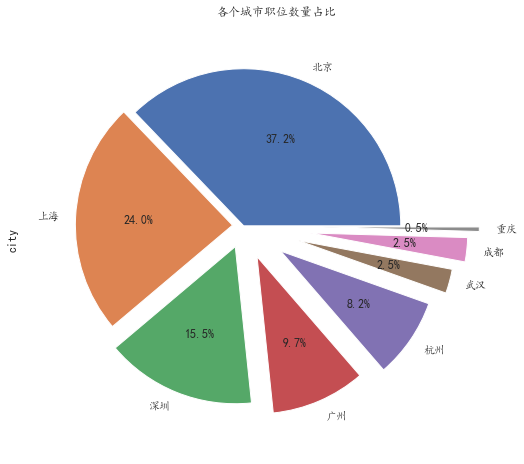

In [58]:
ax = raw_data['city'].value_counts().plot(kind='pie',autopct='%.1f%%',explode=np.linspace(0,0.5,8),figsize=(8,8))
#避免标签重叠
ax.yaxis.labelpad = 35
ax.set_title('各个城市职位数量占比')
#保证图形显示为原型，避免比例压缩为椭圆
plt.axis('equal')
plt.show()

#### 城市与职位薪资关系

* 考虑到新一线城市发布的实习或者兼职职位较少，北上广深的实习兼职职位较多，可能会拉低平均薪资水平，所以在下面的分析中只考虑全职职位的薪资

In [59]:
#提取薪资数据
salary_df = raw_data.loc[raw_data['jobNature'] == '全职',['city','min_salary','max_salary']].groupby(by='city').mean()
salary_df['avg_salary'] = salary_df.mean(axis=1)
# city_name_list
min_salary_list = []
max_salary_list = []
avg_salary_list = []
for city_name in city_name_list:
    min_salary_list.append(round(float(salary_df.loc[city_name,'min_salary']),ndigits=1))
    max_salary_list.append(round(float(salary_df.loc[city_name,'max_salary']),ndigits=1))
    avg_salary_list.append(round(float(salary_df.loc[city_name,'avg_salary']),ndigits=1))
salary_city_dict = {'最低平均薪资':min_salary_list,'最高平均薪资':max_salary_list,'平均薪资':avg_salary_list}
salary_city_dict

{'最低平均薪资': [16.6, 15.0, 11.8, 15.6, 9.1, 15.5, 7.5, 10.4],
 '最高平均薪资': [28.9, 26.0, 20.1, 27.2, 15.6, 25.9, 13.8, 18.1],
 '平均薪资': [22.8, 20.5, 15.9, 21.4, 12.4, 20.7, 10.6, 14.2]}

In [60]:
from pyecharts.charts import Bar, Grid, Line

In [375]:
bar_4 = (
    Bar(init_opts=opts.InitOpts(width='650px',height='370px',theme=ThemeType.LIGHT))
    .add_xaxis(city_name_list)
    .add_yaxis('最低薪资平均值', salary_city_dict['最低平均薪资'],gap='5%')
    .add_yaxis('最高薪资平均值', salary_city_dict['最高平均薪资'],gap='5%')
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False, font_size=12),
                    markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average", name="平均值")])
                    )
    .set_global_opts(title_opts=opts.TitleOpts(title="一线城市数据分析职位薪资概况", subtitle="全职职位"),
                     legend_opts=opts.LegendOpts(pos_left='40%'),
                     yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value}k")),
                    toolbox_opts=opts.ToolboxOpts(orient='vertical',pos_left='right'))
)
    
line = (
    Line(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(city_name_list)
    .add_yaxis('平均薪资', salary_city_dict['平均薪资'])
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True, font_size=12))
#     .set_global_opts(title_opts=opts.TitleOpts(title="一线城市数据分析职位薪资概况", subtitle="按所在城市"),
#                     toolbox_opts=opts.ToolboxOpts())
)
bar_4.overlap(line)
bar_4.render_notebook()
# grid = Grid().add(bar,opts.GridOpts(pos_left="5%", pos_right="20%"), is_control_axis_index=True)
# grid.render_notebook()

* 在上面分析中，看到杭州数据分析师职位的平均薪资非常高，甚至赶超了上海，有点诧异，遂查看下杭州地区职位信息，发现，杭州地区对于数据分析师的招聘，将近50%的职位需要的经验是3-5年，18%的职位需要5-10年经验，也就是杭州地区招聘更倾向于高级或者专家级别的数据分析师，并且招聘需求基数小，所以平均薪资水平较高

In [62]:
raw_data[raw_data['city']=='杭州'].sort_values(by='min_salary',ascending=False).describe(include='all')

,positionName,positionLables,workYear,positionAdvantage,education,jobNature,skillLables,city,companyFullName,companyShortName,...,industryField,firstType,secondType,thirdType,latitude,longitude,resumeProcessDay,resumeProcessRate,min_salary,max_salary
count,142,142,142,142,142,142,142,142,142,142,...,142,142,142,142,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
unique,73,104,6,128,4,3,69,1,104,104,...,42,7,13,18,NaN,NaN,NaN,NaN,NaN,NaN
top,数据分析师,数据分析,3-5年,上市公司,本科,全职,数据分析,杭州,浙江霖梓控股有限公司,霖梓控股,...,电商,开发|测试|运维类,数据开发,数据分析,NaN,NaN,NaN,NaN,NaN,NaN
freq,33,19,70,3,114,136,34,142,6,6,...,17,65,61,106,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.268647,120.155029,1.021127,41.964789,15.042254,25.147887
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.130039,0.179405,1.157573,41.344670,8.322296,13.034024
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,29.993662,119.979914,0.000000,0.000000,2.000000,4.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.212034,120.074370,0.000000,0.000000,10.000000,15.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.277356,120.124444,1.000000,28.000000,15.000000,25.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.290078,120.206163,1.000000,88.750000,20.000000,30.000000


In [63]:
raw_data[raw_data['city']=='杭州']['workYear'].value_counts()

3-5年     70
1-3年     29
5-10年    25
不限       11
应届毕业生     5
1年以下      2
Name: workYear, dtype: int64

#### 城市与职位经验要求

In [64]:
# workYear_list = list(raw_data['workYear'].unique())
workYear_list = ['应届毕业生', '不限', '1年以下', '1-3年', '3-5年', '5-10年',  '10年以上']
workYear_list

['应届毕业生', '不限', '1年以下', '1-3年', '3-5年', '5-10年', '10年以上']

In [65]:
workYear_df = raw_data[['positionName','city','workYear']].groupby(by=['city','workYear']).count()
workYear_df

positionName
city workYear              
上海   1-3年               128
     1年以下                 8
     3-5年               159
     5-10年               51
     不限                  40
     应届毕业生               29
北京   1-3年               155
     10年以上                4
     1年以下                 7
     3-5年               259
     5-10年              109
     不限                  65
     应届毕业生               44
广州   1-3年                51
     1年以下                 5
     3-5年                57
     5-10年               18
     不限                  25
     应届毕业生               12
成都   1-3年                13
     1年以下                 2
     3-5年                 8
     5-10年                9
     不限                  10
     应届毕业生                1
杭州   1-3年                29
     1年以下                 2
     3-5年                70
     5-10年               25
     不限                  11
     应届毕业生                5
武汉   1-3年                10
     3-5年                13
     5-10年               11
     不限                   6
     应届毕业生                3
深圳   1-3年                70
     10年以上                1
     1年以下                 4
     3-5年               128
     5-10年               33
     不限                  26
     应届毕业生                6
重庆   1-3年                 3
     3-5年                 3
     不限                   2

In [66]:
#城市职位经验要求字典
workYear_qualifiaction_number ={}
for city_name in city_name_list:
    #存储各个城市不同经验要求的职位数量
    qualification_num_lst = []
    for workYear_qulifiaction in workYear_list:
        try:
            qualification_num_lst.append(int(workYear_df.loc[city_name, workYear_qulifiaction][0]))
        except:
            #对于没有该经验要求下的职位数量，记为NaN
            qualification_num_lst.append(np.nan)
    workYear_qualifiaction_number[city_name] = qualification_num_lst
workYear_qualifiaction_number

{'北京': [44, 65, 7, 155, 259, 109, 4],
 '上海': [29, 40, 8, 128, 159, 51, nan],
 '广州': [12, 25, 5, 51, 57, 18, nan],
 '深圳': [6, 26, 4, 70, 128, 33, 1],
 '成都': [1, 10, 2, 13, 8, 9, nan],
 '杭州': [5, 11, 2, 29, 70, 25, nan],
 '重庆': [nan, 2, nan, 3, 3, nan, nan],
 '武汉': [3, 6, nan, 10, 13, 11, nan]}

In [389]:
from pyecharts.charts import Scatter

In [403]:
scatter = (
    Scatter(init_opts=opts.InitOpts(width='650px',height='370px',theme=ThemeType.INFOGRAPHIC))
            .add_xaxis(workYear_list)
            .add_yaxis("北京", workYear_qualifiaction_number['北京'])
            .add_yaxis("上海", workYear_qualifiaction_number['上海'])
            .add_yaxis("广州", workYear_qualifiaction_number['广州'])
            .add_yaxis("深圳", workYear_qualifiaction_number['深圳'])
            .add_yaxis("成都", workYear_qualifiaction_number['成都'])
            .add_yaxis("杭州", workYear_qualifiaction_number['杭州'])
            .add_yaxis("重庆", workYear_qualifiaction_number['重庆'])
            .add_yaxis("武汉", workYear_qualifiaction_number['武汉'])
            .set_global_opts(
                title_opts=opts.TitleOpts(title="数据分析师职位分布图",subtitle='按经验要求'),
                legend_opts=opts.LegendOpts(pos_left='30%'),
                visualmap_opts=opts.VisualMapOpts(type_="size", max_=160, min_=0,is_piecewise=False),
                toolbox_opts=opts.ToolboxOpts(orient='vertical',pos_left='right')
            )
)
scatter.render_notebook()

从上图可以看出：
- 各个城市更偏好于招聘具有3-5年经验要求的数据分析师，而经验1年以下的需求是非常少的，虽然也有相当一部分招聘需求不限经验，但是还是建议若想从事数据分析职位请最好具备1年以上经验之后再考虑求职
- 需要10年以上工作经验的数据分析师只有北京、深圳（互联网大厂）

#### 城市与职位技能要求关键词

* 下面不再细分各个城市的职位要求关键词

In [70]:
#把所有技能标签保存到一个列表，不能去重复哦，要统计词频
skillLabels_lst = []
for item in raw_data['skillLables']:
    if item == '':
        continue
    else:
        item_lst = item.split(',')
        i = 0
        while i < len(item_lst):
            skillLabels_lst.append(item_lst[i].strip())
            i += 1
#存为字典，然后转换为Dataframe
skillLabels_dict = {'skill_keywords':skillLabels_lst}
skillLabels_df = pd.DataFrame(skillLabels_dict)
skillLabels_df.head()

,skill_keywords
0,数据分析
1,SQL
2,数据库
3,数据分析
4,数据运营


In [71]:
#统计技能关键词词频
skill_keyword_series = skillLabels_df['skill_keywords'].value_counts()
skill_keyword_lst = []
for item in zip(skill_keyword_series.index,skill_keyword_series.values):
    #只有词频大于3的关键词才被选择记录
    if item[1] >= 4:
        skill_keyword_lst.append((item[0],int(item[1])))
    else:
        continue
skill_keyword_lst

[('数据分析', 1223),
 ('SQL', 258),
 ('数据挖掘', 170),
 ('BI', 163),
 ('数据运营', 155),
 ('数据库', 128),
 ('商业', 111),
 ('可视化', 94),
 ('MySQL', 89),
 ('SPSS', 83),
 ('数据处理', 66),
 ('Hive', 48),
 ('算法', 44),
 ('SQLServer', 38),
 ('Hadoop', 35),
 ('数据仓库', 34),
 ('运营', 29),
 ('增长黑客', 28),
 ('风控', 27),
 ('市场分析', 20),
 ('分析师', 18),
 ('数据架构', 17),
 ('ETL', 16),
 ('Spark', 14),
 ('Java', 13),
 ('行业分析', 13),
 ('Oracle', 13),
 ('产品', 11),
 ('消费者分析', 11),
 ('机器学习', 9),
 ('效果跟踪', 8),
 ('市场', 8),
 ('DBA', 8),
 ('用户运营', 8),
 ('数据库开发', 7),
 ('策略运营', 7),
 ('分析', 7),
 ('产品策划', 6),
 ('产品经理', 6),
 ('产品设计', 6),
 ('风险分析', 6),
 ('产品运营', 6),
 ('市场竞争分析', 6),
 ('项目管理', 6),
 ('建模', 5),
 ('策略设计', 5),
 ('用户增长', 5),
 ('信贷风险管理', 5),
 ('NLP', 5),
 ('游戏运营', 5),
 ('营销策略', 5),
 ('深度学习', 5),
 ('搜索', 4),
 ('行业研究', 4),
 ('数字营销', 4),
 ('人力资源', 4),
 ('审核', 4),
 ('需求分析', 4)]

In [72]:
from pyecharts.charts import WordCloud

In [407]:
wordcloud = (
        WordCloud(init_opts=opts.InitOpts(theme=ThemeType.INFOGRAPHIC))
        .add("", skill_keyword_lst, word_size_range=[15, 120], shape=SymbolType.DIAMOND)
        .set_global_opts(title_opts=opts.TitleOpts(title="一线城市数据分析师技能要求关键词词云图"),
                        toolbox_opts=opts.ToolboxOpts())
    )
wordcloud.render_notebook()

职位技能关键词：
- "数据分析"毋庸置疑，与其说是技能，不如说其是一个思维能力、经验
- "数据库、SQL、MySQL"，要想做数据分析，首先得会获取数据，所谓巧妇难为无米之炊，没有数据就没有下文了，所以想成为数据分析师懂得数据库基本知识，会DDL、DML是必须的，作为同样的RDBMS，要求掌握Oracle的公司要求掌握MySQL要少的多，这应该是得益于MySQL的免费开源以及日渐完善的功能受到很多公司欢迎；掌握分布式架构、非关系型数据库 Hive、Hadoop、Spark等，可以作为加分项或者说成为技术向数据分析师需要掌握的更高阶的技能
- "SPSS"作为一个优秀的统计分析工具，也被很多公司列为基本技能项之一
- "商业、BI、可视化"，商业智能，制作报表、dashboard，商业分析报告是商业数据分析师或者说业务数据分析师的重点产出，具备分析、写、画能力的同时，如果具备讲的能力将会在商业分析师的应聘中如虎添翼
- "数据挖掘"这一大概念的关键词，更多偏于技术向，个人理解这个词对应的职位名称应该是数据挖掘工程师，但是也有许多公司没有区分那么仔细，职位名称虽然是数据分析师，但是实际工作内容是数据挖掘，需要对数据挖掘算法有很好的掌握，对技术方面的要求更高

#### 城市与职位行业分布关系

In [74]:
'''
industryField字段比较复杂，有些公司涉及多个领域标签，在这种情况下，可以选择每个领域都计数一次，或者选取主要领域计数
，默认第一个领域标签为该公司主要从事领域
'''
#自定义获取主领域函数
def get_main_field(x):
    return x.split(',')[0]
#创建一个需要分析的数据集的copy
industryField_df = raw_data[['positionName','city','industryField']].copy()
industryField_df['mainField'] = industryField_df['industryField'].apply(get_main_field)
industryField_df.describe(include='all')

,positionName,city,industryField,mainField
count,1730,1730,1730,1730
unique,741,8,119,29
top,数据分析师,北京,金融,移动互联网
freq,432,643,206,511


In [75]:
industryField_df['mainField'].value_counts()

移动互联网       511
金融          235
电商          190
文娱丨内容       148
企业服务        100
数据服务         99
消费生活         69
社交           46
游戏           43
教育           39
硬件           38
汽车丨出行        35
旅游           32
信息安全         28
物流丨运输        21
工具           18
其他           17
房产家居         15
医疗丨健康        15
人工智能          9
广告营销          8
通讯电子          5
医疗健康          2
软件开发          2
物联网、软件开发      1
区块链           1
教育 移动互联网      1
不限            1
电子商务          1
Name: mainField, dtype: int64

In [76]:
industryField_df.pivot_table(values='positionName',index=['city','mainField'],aggfunc='count')

positionName
city mainField              
上海   人工智能                  1
     企业服务                 21
     信息安全                  3
     其他                    4
     医疗丨健康                 2
     医疗健康                  1
     工具                    3
     广告营销                  3
     教育                    6
     教育 移动互联网              1
     数据服务                 45
     文娱丨内容                24
     旅游                   10
     汽车丨出行                 3
     消费生活                 15
     游戏                    9
     物流丨运输                 4
     电商                   62
     硬件                    4
     社交                    2
     移动互联网               135
     金融                   57
北京   人工智能                  4
     企业服务                 31
     信息安全                  9
     其他                    2
     医疗丨健康                 4
     医疗健康                  1
     工具                   13
     广告营销                  2
...                      ...
武汉   硬件                    1
     社交                    2
     移动互联网                13
     软件开发                  1
     金融                    2
深圳   人工智能                  4
     企业服务                 26
     其他                    2
     工具                    1
     房产家居                  2
     教育                    3
     数据服务                  5
     文娱丨内容                10
     旅游                    3
     汽车丨出行                 2
     消费生活                  4
     游戏                    7
     物流丨运输                11
     电商                   26
     硬件                   17
     社交                   21
     移动互联网                73
     软件开发                  1
     通讯电子                  1
     金融                   49
重庆   企业服务                  2
     信息安全                  1
     文娱丨内容                 1
     移动互联网                 2
     金融                    2

[135 rows x 1 columns]

In [77]:
#用于构造树状图所需数据的原始数据1--> json格式
parent_data = industryField_df[['city','positionName']].groupby(by='city').count().reset_index().rename(columns={'positionName':'value','city':'name'}).to_dict(orient='records')
parent_data

[{'name': '上海', 'value': 415},
 {'name': '北京', 'value': 643},
 {'name': '广州', 'value': 168},
 {'name': '成都', 'value': 43},
 {'name': '杭州', 'value': 142},
 {'name': '武汉', 'value': 43},
 {'name': '深圳', 'value': 268},
 {'name': '重庆', 'value': 8}]

In [78]:
#用于构造树状图所需数据的原始数据2--> json格式
children_data = industryField_df.pivot_table(values='positionName',index=['city','mainField'],aggfunc='count').reset_index().rename(columns={'mainField':'name','positionName':'value'}).to_dict(orient='records')
children_data[0:5]

[{'city': '上海', 'name': '人工智能', 'value': 1},
 {'city': '上海', 'name': '企业服务', 'value': 21},
 {'city': '上海', 'name': '信息安全', 'value': 3},
 {'city': '上海', 'name': '其他', 'value': 4},
 {'city': '上海', 'name': '医疗丨健康', 'value': 2}]

In [289]:
'''
构造成如下数据格式
[
    {'value':420,'name':'北京',"path":"北京",'children':[{'value':370,'name':'互联网','path': '北京/互联网'},{'value':50,'name':'金融','path': '北京/金融'}]},
]
用于树状图
'''
for parent in parent_data:
#     print(parent['name'])
    #存储对应城市下各行业的职位数的字典
    children_lst= []
    for item in children_data:
#         print(item)
        if parent['name'] == item['city']:
#             print(item.pop())
            children_lst.append({'value':item['value'],'name':item['name'],'path':(parent['name'] + '/' + item['name'])})
    parent['path'] = parent['name']
    parent['children'] = children_lst
parent_data

[{'name': '上海',
  'value': 415,
  'path': '上海',
  'children': [{'value': 1, 'name': '人工智能', 'path': '上海/人工智能'},
   {'value': 21, 'name': '企业服务', 'path': '上海/企业服务'},
   {'value': 3, 'name': '信息安全', 'path': '上海/信息安全'},
   {'value': 4, 'name': '其他', 'path': '上海/其他'},
   {'value': 2, 'name': '医疗丨健康', 'path': '上海/医疗丨健康'},
   {'value': 1, 'name': '医疗健康', 'path': '上海/医疗健康'},
   {'value': 3, 'name': '工具', 'path': '上海/工具'},
   {'value': 3, 'name': '广告营销', 'path': '上海/广告营销'},
   {'value': 6, 'name': '教育', 'path': '上海/教育'},
   {'value': 1, 'name': '教育 移动互联网', 'path': '上海/教育 移动互联网'},
   {'value': 45, 'name': '数据服务', 'path': '上海/数据服务'},
   {'value': 24, 'name': '文娱丨内容', 'path': '上海/文娱丨内容'},
   {'value': 10, 'name': '旅游', 'path': '上海/旅游'},
   {'value': 3, 'name': '汽车丨出行', 'path': '上海/汽车丨出行'},
   {'value': 15, 'name': '消费生活', 'path': '上海/消费生活'},
   {'value': 9, 'name': '游戏', 'path': '上海/游戏'},
   {'value': 4, 'name': '物流丨运输', 'path': '上海/物流丨运输'},
   {'value': 62, 'name': '电商', 'path': '上海/电商'},
   {'v

In [80]:
from pyecharts.charts import TreeMap

In [421]:
treemap = (
    TreeMap(init_opts=opts.InitOpts(width='650px',height='370px',theme=ThemeType.LIGHT))
            .add("行业分布", 
                 parent_data,
                 is_selected=True,
                 label_opts=opts.LabelOpts(is_show=True,
                                           color='white',position='insideleft',
                                           font_size=10,
                                           #a系列名称 b表示childern name c表示childern value
                                           formatter='{b}{c}',
#                                            formatter='{{a}|{b}:}{c}',
                                          rich={"b": {"fontSize": 15, "lineHeight": 30}},
                    ))
#             .set_series_opts(label_opts=opts.LabelOpts(is_show=True, font_size=12))
            .set_global_opts(title_opts=opts.TitleOpts(title="一线城市数据分析师需求分布",subtitle='按行业领域'),
                             legend_opts=opts.LegendOpts(is_show=False),
#                              tooltip_opts=opts.TooltipOpts(formatter=JsCode(
#                     "function (params) {return params.name + ' : ' + params.value;}"
#                 )),
                            toolbox_opts=opts.ToolboxOpts(orient='vertical',pos_left='right'))
)
treemap.render_notebook()

* 对于数据分析师职位的需求，主要还是来自于互联网行业
* 另外两大行业领域是金融和电商，北京、深圳和上海金融业十分发达，而杭州电商行业相对金融还说需求更大一点，因为阿里及阿里系带动了非常多的电商公司
* 北京文娱行业对于数据分析师的需求量是独树一帜

#### 城市与职位简历处理情况

In [82]:
resumeProcess_df = raw_data[['city','resumeProcessDay','resumeProcessRate']].groupby(by='city').mean()
resumeProcess_df

,resumeProcessDay,resumeProcessRate
city,,
上海,0.918072,40.650602
北京,0.842924,40.990669
广州,0.821429,40.464286
成都,0.837209,35.116279
杭州,1.021127,41.964789
武汉,0.790698,36.069767
深圳,1.048507,51.936567
重庆,0.000000,0.000000


In [83]:
city_name_list

['北京', '上海', '广州', '深圳', '成都', '杭州', '重庆', '武汉']

In [84]:
#提取城市简历平均处理比率
resumeProcessRate_city_lst = []
for city_name in city_name_list:
    #将numpy.int64格式的数据转换为Python原生的float格式，否则pyecharts无法识别
    resumeProcessRate_city_lst.append(round(float(resumeProcess_df.loc[city_name,'resumeProcessRate']),ndigits=2))
#提取城市简历平均处理天数
resumeProcessDay_city_lst = []
for city_name in city_name_list:
    #将numpy.int64格式的数据转换为Python原生的float格式，否则pyecharts无法识别
    resumeProcessDay_city_lst.append(round(float(resumeProcess_df.loc[city_name,'resumeProcessDay']),ndigits=2))
resumeProcessDay_city_lst

[0.84, 0.92, 0.82, 1.05, 0.84, 1.02, 0.0, 0.79]

##### 简历处理天数-漏斗图

In [85]:
from pyecharts.charts import Funnel

In [426]:
funnel = (
    Funnel(init_opts=opts.InitOpts(width='1150px',height='750px',theme=ThemeType.SHINE))
    .add(
            "商品",
            [list(z) for z in zip(city_name_list,resumeProcessDay_city_lst)],
            label_opts=opts.LabelOpts(position="inside"),
        )
    .set_global_opts(title_opts=opts.TitleOpts(title="一线城市数据分析师职位简历处理平均天数",subtitle='按城市'),
                    toolbox_opts=opts.ToolboxOpts(),
                    legend_opts=opts.LegendOpts(is_show=False))
)
funnel.render_notebook()

* 重庆属于特殊情况，简历处理率为0，简历处理天数也为0，发布的职位信息确实也不多
* 在以往概念中，成都属于比较慢生活节奏，但是在简历的处理上效率还算不错
* 从简历平均处理天数，可以从一定程度上反映出各个城市求职者的数量以及各个公司对于求职简历处理的及时情况，一个粗略的结论是北京、上海的公司的HR都是相当勤快的，简历平均处理天数在1天以内，并且猜测其收到的简历数量在这8个城市里面是名列前茅的
* 综合各个城市情况，简历处理平均大概需要1天时间，所以小伙伴投递简历之后，耐心等上1天或许就会收到面试邀请了

##### 简历处理比率-水滴/仪表

In [87]:
from pyecharts.charts import Gauge,Liquid,Page

In [88]:
gauge_1 = (
        Gauge(init_opts=opts.InitOpts(width='320px',height='200px'))
        .add(
            "简历处理率-平均值",
            [("", 55.5)],
            split_number=5,
#             axisline_opts=opts.AxisLineOpts(
#                 linestyle_opts=opts.LineStyleOpts(
#                     color=[(0.3, "#67e0e3"), (0.7, "#37a2da"), (1, "#fd666d")], width=30
#                 )
#             ),
            label_opts=opts.LabelOpts(is_show=True,position='left',formatter="{value}",font_size=20),
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title=""),
            legend_opts=opts.LegendOpts(is_show=True),
            toolbox_opts=opts.ToolboxOpts()
        )
    )

liquid_1 = (
        Liquid(init_opts=opts.InitOpts(width='350px',height='300px'))
        .add("lq", [0.6])
        .set_global_opts(title_opts=opts.TitleOpts(title="Liquid-基本示例"),
                        toolbox_opts=opts.ToolboxOpts())
    )
gauge_1.render_notebook()
# page = Page(interval=0,layout=Page.SimplePageLayout)
# page.add(gauge_1,gauge_2,liquid_1,liquid_1)
# page.render_notebook()

In [430]:
#在一页当中显示多个仪表盘，最终显示到html文档
def produce_gauge(city,rate):
    gauge = (
            Gauge(init_opts=opts.InitOpts(width='320px',height='180px'))
        .add(
            #系列名称
            city,
            #数据
            [('', rate)],
            #仪表盘分割段数
            split_number=2,
            #仪表盘最大刻度值
            max_= 100.0,
            #刻度颜色
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(
                    color=[(0.25, "#67e0e3"), (0.5, "#37a2da"),(0.75, "#fd666d"), (1, "#f7a128")], width=30
                                                )
                                            ),

            #标签选项
            label_opts=opts.LabelOpts(is_show=True,formatter="{value}%",font_size=20),
            )
        .set_series_opts(legend_opts=opts.LegendOpts(pos_left='center'))
        .set_global_opts(
#             title_opts=opts.TitleOpts(title="Gauge-分割段数-Label"),
            legend_opts=opts.LegendOpts(is_show=True),
#             axistick_opts=opts.AxisTickOpts(is_show=False),
#             toolbox_opts=opts.ToolboxOpts()
                        )
            )
    return gauge
page = Page(interval=0,layout=Page.SimplePageLayout,page_title='各个城市简历处理比率')
for z in zip(city_name_list,resumeProcessRate_city_lst):
    page.add(produce_gauge(z[0],round(z[1],ndigits=1)))
page.render()

### 公司维度

#### 公司与数据分析职位需求概况

In [90]:
raw_data[['city','companyShortName','positionName']].groupby(['city','companyShortName']).count()

positionName
city companyShortName                     
上海   2345.com                            4
     90玩                                 1
     AdMaster                            1
     Alten China                         1
     CHARLES & KEITH | PEDRO             1
     CLPS                                1
     CareerFrog职业蛙                       1
     Coupang                             1
     CraiditX                            2
     DataStory                           1
     Datatist                            2
     Evolve                              1
     G7                                  1
     GeexFinance                         7
     Gridsum 国双                          1
     HARB                                2
     Hypers                              2
     Know Yourself                       1
     Magic Link                          1
     MarcPoint                           1
     Oriente                             2
     PINTEC                              2
     R2.ai                               1
     SAS                                 1
     Shopee                              2
     Target Social                       1
     Teambition                          1
     V8实拍                                1
     WESTWELLlab西井科技                     1
     ZRobot                              2
...                                    ...
深圳   道旅旅游                                1
     采筑                                  2
     金蝶                                  1
     金蝶蝶金                                1
     金蝶金融                                1
     金銮羊羊                                1
     长亮科技                                1
     闻善科技                                1
     阿卡索外教网                              3
     随手科技                                2
     顺丰-丰e足食                             2
     顺丰科技有限公司                           10
     顺丰速运                                1
     领会科技                                1
     风变科技（深圳）有限公司                        2
     飞贷金融科技                              1
     马上金融                                1
     魅动力                                 1
     魅族                                  1
     鹏元征信有限公司                            2
     麒讯                                  1
     麦芒科技                                1
重庆   字节跳动                                1
     撼地大数据                               1
     永辉金融                                1
     赛迪信息                                1
     迅游科技                                1
     重庆广睿达科技有限公司                         1
     重庆道微投资                              1
     钰峰科技                                1

[1025 rows x 1 columns]

In [91]:
#统计招聘需求前10的公司，公司名称采用简称，否则名称太长，下图显示时左侧会被部分掩盖
company_top10 = raw_data['companyShortName'].value_counts()[0:10].to_dict()

# for item in company_top10:
#     print(type(company_top10[item]))
list(company_top10.values())

[79, 24, 23, 18, 18, 15, 15, 14, 12, 11]

In [92]:
bar_2 = (
        Bar(init_opts=opts.InitOpts(theme=ThemeType.PURPLE_PASSION))
        .add_xaxis(list(company_top10.keys())[::-1])
        .add_yaxis("", list(company_top10.values())[::-1])
        .reversal_axis()
        .set_series_opts(label_opts=opts.LabelOpts(position="right"),
#                          textstyle_opts=opts.TextStyleOpts(font_size=)
                        )
        .set_global_opts(title_opts=opts.TitleOpts(title="数据分析师招聘需求top10公司"),
                         #设置坐标轴标签字体大小
                        yaxis_opts=opts.AxisOpts(name="公司名称",axislabel_opts=opts.LabelOpts(font_size=10)),
                        xaxis_opts=opts.AxisOpts(name="职位数量"),
                         
                        toolbox_opts=opts.ToolboxOpts())
    )
bar_2.render_notebook()

In [306]:
from pyecharts.charts import PictorialBar
from pyecharts.globals import SymbolType

In [317]:
# 可以通过 'image://url' 设置为图片，其中 URL 为图片的链接，或者 dataURI。
# URL 为图片链接例如：'image://http://xxx.xxx.xxx/a/b.png'
# URL 为 dataURI 例如：'image://data:image/gif;base64,R0lGODlhEAAQAMQAAORHHOVSKudfO...
image_data = 'image://http://images.669pic.com/element_pic/47/56/22/37/27c92f2fb9695224ef75d6f14fcfe7b9.jpg'
#官方示例 Boy
image_data_1 ='image://data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHUAAACUCAYAAACtHGabAAAACXBIWXMAABcSAAAXEgFnn9JSAAAKTWlDQ1BQaG90b3Nob3AgSUNDIHByb2ZpbGUAAHjanVN3WJP3Fj7f92UPVkLY8LGXbIEAIiOsCMgQWaIQkgBhhBASQMWFiApWFBURnEhVxILVCkidiOKgKLhnQYqIWotVXDjuH9yntX167+3t+9f7vOec5/zOec8PgBESJpHmomoAOVKFPDrYH49PSMTJvYACFUjgBCAQ5svCZwXFAADwA3l4fnSwP/wBr28AAgBw1S4kEsfh/4O6UCZXACCRAOAiEucLAZBSAMguVMgUAMgYALBTs2QKAJQAAGx5fEIiAKoNAOz0ST4FANipk9wXANiiHKkIAI0BAJkoRyQCQLsAYFWBUiwCwMIAoKxAIi4EwK4BgFm2MkcCgL0FAHaOWJAPQGAAgJlCLMwAIDgCAEMeE80DIEwDoDDSv+CpX3CFuEgBAMDLlc2XS9IzFLiV0Bp38vDg4iHiwmyxQmEXKRBmCeQinJebIxNI5wNMzgwAABr50cH+OD+Q5+bk4eZm52zv9MWi/mvwbyI+IfHf/ryMAgQAEE7P79pf5eXWA3DHAbB1v2upWwDaVgBo3/ldM9sJoFoK0Hr5i3k4/EAenqFQyDwdHAoLC+0lYqG9MOOLPv8z4W/gi372/EAe/tt68ABxmkCZrcCjg/1xYW52rlKO58sEQjFu9+cj/seFf/2OKdHiNLFcLBWK8ViJuFAiTcd5uVKRRCHJleIS6X8y8R+W/QmTdw0ArIZPwE62B7XLbMB+7gECiw5Y0nYAQH7zLYwaC5EAEGc0Mnn3AACTv/mPQCsBAM2XpOMAALzoGFyolBdMxggAAESggSqwQQcMwRSswA6cwR28wBcCYQZEQAwkwDwQQgbkgBwKoRiWQRlUwDrYBLWwAxqgEZrhELTBMTgN5+ASXIHrcBcGYBiewhi8hgkEQcgIE2EhOogRYo7YIs4IF5mOBCJhSDSSgKQg6YgUUSLFyHKkAqlCapFdSCPyLXIUOY1cQPqQ28ggMor8irxHMZSBslED1AJ1QLmoHxqKxqBz0XQ0D12AlqJr0Rq0Hj2AtqKn0UvodXQAfYqOY4DRMQ5mjNlhXIyHRWCJWBomxxZj5Vg1Vo81Yx1YN3YVG8CeYe8IJAKLgBPsCF6EEMJsgpCQR1hMWEOoJewjtBK6CFcJg4Qxwicik6hPtCV6EvnEeGI6sZBYRqwm7iEeIZ4lXicOE1+TSCQOyZLkTgohJZAySQtJa0jbSC2kU6Q+0hBpnEwm65Btyd7kCLKArCCXkbeQD5BPkvvJw+S3FDrFiOJMCaIkUqSUEko1ZT/lBKWfMkKZoKpRzame1AiqiDqfWkltoHZQL1OHqRM0dZolzZsWQ8ukLaPV0JppZ2n3aC/pdLoJ3YMeRZfQl9Jr6Afp5+mD9HcMDYYNg8dIYigZaxl7GacYtxkvmUymBdOXmchUMNcyG5lnmA+Yb1VYKvYqfBWRyhKVOpVWlX6V56pUVXNVP9V5qgtUq1UPq15WfaZGVbNQ46kJ1Bar1akdVbupNq7OUndSj1DPUV+jvl/9gvpjDbKGhUaghkijVGO3xhmNIRbGMmXxWELWclYD6yxrmE1iW7L57Ex2Bfsbdi97TFNDc6pmrGaRZp3mcc0BDsax4PA52ZxKziHODc57LQMtPy2x1mqtZq1+rTfaetq+2mLtcu0W7eva73VwnUCdLJ31Om0693UJuja6UbqFutt1z+o+02PreekJ9cr1Dund0Uf1bfSj9Rfq79bv0R83MDQINpAZbDE4Y/DMkGPoa5hpuNHwhOGoEctoupHEaKPRSaMnuCbuh2fjNXgXPmasbxxirDTeZdxrPGFiaTLbpMSkxeS+Kc2Ua5pmutG003TMzMgs3KzYrMnsjjnVnGueYb7ZvNv8jYWlRZzFSos2i8eW2pZ8ywWWTZb3rJhWPlZ5VvVW16xJ1lzrLOtt1ldsUBtXmwybOpvLtqitm63Edptt3xTiFI8p0in1U27aMez87ArsmuwG7Tn2YfYl9m32zx3MHBId1jt0O3xydHXMdmxwvOuk4TTDqcSpw+lXZxtnoXOd8zUXpkuQyxKXdpcXU22niqdun3rLleUa7rrStdP1o5u7m9yt2W3U3cw9xX2r+00umxvJXcM970H08PdY4nHM452nm6fC85DnL152Xlle+70eT7OcJp7WMG3I28Rb4L3Le2A6Pj1l+s7pAz7GPgKfep+Hvqa+It89viN+1n6Zfgf8nvs7+sv9j/i/4XnyFvFOBWABwQHlAb2BGoGzA2sDHwSZBKUHNQWNBbsGLww+FUIMCQ1ZH3KTb8AX8hv5YzPcZyya0RXKCJ0VWhv6MMwmTB7WEY6GzwjfEH5vpvlM6cy2CIjgR2yIuB9pGZkX+X0UKSoyqi7qUbRTdHF09yzWrORZ+2e9jvGPqYy5O9tqtnJ2Z6xqbFJsY+ybuIC4qriBeIf4RfGXEnQTJAntieTE2MQ9ieNzAudsmjOc5JpUlnRjruXcorkX5unOy553PFk1WZB8OIWYEpeyP+WDIEJQLxhP5aduTR0T8oSbhU9FvqKNolGxt7hKPJLmnVaV9jjdO31D+miGT0Z1xjMJT1IreZEZkrkj801WRNberM/ZcdktOZSclJyjUg1plrQr1zC3KLdPZisrkw3keeZtyhuTh8r35CP5c/PbFWyFTNGjtFKuUA4WTC+oK3hbGFt4uEi9SFrUM99m/ur5IwuCFny9kLBQuLCz2Lh4WfHgIr9FuxYji1MXdy4xXVK6ZHhp8NJ9y2jLspb9UOJYUlXyannc8o5Sg9KlpUMrglc0lamUycturvRauWMVYZVkVe9ql9VbVn8qF5VfrHCsqK74sEa45uJXTl/VfPV5bdra3kq3yu3rSOuk626s91m/r0q9akHV0IbwDa0b8Y3lG19tSt50oXpq9Y7NtM3KzQM1YTXtW8y2rNvyoTaj9nqdf13LVv2tq7e+2Sba1r/dd3vzDoMdFTve75TsvLUreFdrvUV99W7S7oLdjxpiG7q/5n7duEd3T8Wej3ulewf2Re/ranRvbNyvv7+yCW1SNo0eSDpw5ZuAb9qb7Zp3tXBaKg7CQeXBJ9+mfHvjUOihzsPcw83fmX+39QjrSHkr0jq/dawto22gPaG97+iMo50dXh1Hvrf/fu8x42N1xzWPV56gnSg98fnkgpPjp2Snnp1OPz3Umdx590z8mWtdUV29Z0PPnj8XdO5Mt1/3yfPe549d8Lxw9CL3Ytslt0utPa49R35w/eFIr1tv62X3y+1XPK509E3rO9Hv03/6asDVc9f41y5dn3m978bsG7duJt0cuCW69fh29u0XdwruTNxdeo94r/y+2v3qB/oP6n+0/rFlwG3g+GDAYM/DWQ/vDgmHnv6U/9OH4dJHzEfVI0YjjY+dHx8bDRq98mTOk+GnsqcTz8p+Vv9563Or59/94vtLz1j82PAL+YvPv655qfNy76uprzrHI8cfvM55PfGm/K3O233vuO+638e9H5ko/ED+UPPR+mPHp9BP9z7nfP78L/eE8/sl0p8zAAAAIGNIUk0AAHolAACAgwAA+f8AAIDpAAB1MAAA6mAAADqYAAAXb5JfxUYAABvgSURBVHja7J17dBPXnce/dzR6WH7IwTbYxPgBBJsAtgwJXcchCM5ZEtJwcHqaRxs4hXQh+4dT3O1hd9ukJ05LT/dsT4lTyO7JSbfrQHabbdqNE/qgTjcR5KTOsxjCK4QGGwgy2ARJtoSec/ePGUkzo9HLGj2MdTk62PLM6KffZ76/+7u/e2eGUEoxHduota0BQA+ATgAm0Z9GAPQD6K22HBnGDGxkOkIdtbb1AHgqwWYOAN3VliN9Baj5D7QPwDdS2GXrTAM7raCOWts6Abw6hV3bqi1HhmYKVGaa2dub5f0KUDOsUguA+inuvlpIrApQ86xZ0tzfXIB647UC1Hxr77m0zSi0Gwcq2bvO/K5b25nmYQrZbx4BLQfQf8Ch16d5KGsBav60fgD1JzwsBl3aqR7jxWrLEXsBan6otAfA6tDv37eVTOUwDvA14kKfmgdALZDVd094WHR/XpoqUMtMK+znZZlQ6EeHIZ19Cbd7yrx49uYJlGni2j4CoHMmlQdDjc3jftQU648HnXrc7tJhfZkX95T6sLQogFptEBf9Gpg03BulDP3vmTg7k7dKJXvXdQN4Zqr7064BUhin5tl4NB2gAI4WSg/5lyilGzLtBaR5BFUYvrQWkNwgUIWw+1QBx42lVLUyVXMBaR5AVTnsmoSixYxuOR3SkL3rGsDPnphUPKwDgJl2DQwXlJq7sGtS+ZgmAEMzWbE5UyrZu64TU1sZmEp7DUD3TFNtTqAKtd0hTH0hWartEIBe2jXQX4Ca2eQoF0OYESHk993I6s06VCE5OpcH3/2QALifdg3YC1DTg9qH1C6byEZ7UYDbX4CaOlALgLfy2B83RHjONlQrRMtT8rxN2+Qqa1CngUrjqbdXUK+9AHX6qlSpOQS4vfkONytQs1RoKMAVWrbKhL030IjBJIyxh4WlNzNPqdO4L02lz91CuwasM0mpPbixWz2At8jedb1C+fPGVuoMUGleqjbTSu3GzGoh1fbckErNoxpvLosXnbnIkDOp1B7M7LYagFVYVDf9lZroWpgZ1hwALLRrYGi6K7WzAFQyrs2qYjMFtbvAMndgVYcqGF5YaZ9DsExBpVkH25fpIkUmoHYW2MVtreCvv50eUIXZmEKClMRwJ5MFCrWVuqXAK+n2VKYWnKs2ThX6iWsFVim1EfCXiNjzVamWAqOUWz0yUHlTE2ohQZpa26H2MKcANT9ab95BFTr8QtabXjasWvel1n2U8rY/vcPviXrvOKuDk+Tdzd561PKjKtkv2btuCDksDS4J+NDh82Ae58fSgA9L/T6YKJdwPwdhcFyrwwWGxQWNFu/oDPiz1pBLsGvUWDWRNtRcDGXKKIf1Xjfu9bpwh8+TFMBU2js6A/6gK8bv9UZc1GT1pnCHaNeAJR+gdiJLa3of8kziXq8L673urHn5OKvDy4ZSvFxUkq2Q3Zbu3KsaVpozrcqdLjs+HRvBHudYVoECwNKAD7smr+Kj8Qv4mXMMtcFApj+yOx+UakUGLqcooxweczux3e1QPbym2142lOBfi2/KVGh2AGhIp8qUl0p9yDOJj8YvYKfrWt4BBYCHPZN464vPsdNlz8ThTemO+Zk0Vdqg5vi0NhjAq3Yb9jjHcFPJrLweWJooh52ua/jo6gXFYVOaLXdQ1VTpQ8LZ3+HzgKmsg/HBXWAbl+cEGNEZk952XjCA/ms2tVW7MZ2J9LyA+sPJq9jjHIOJcjzQjd8D0RnBNqzICVRty93QNt2ZfAXnlnbsdF3Dq3YbytTrLjqnJdQyyuFVuw2PuZ28MSKgAKBtXgWmoi7rULmrIzCs3Z40WMZUDcPa7ejwedB/zYYlAZ8aZlhyBbU8HaD912zo8HkUgYZa0drtWYdKhWFTsmC5qyPQNt0JbfMqLA341AKbM6ir0wG6VPjiTGmlItAQbMOabVmFGrx0OvxzMmDDJ8GabWAbV8AkfL80wdYLiWhOhjRpASV6I4rWd8dNTrTNq1Lq49RuicBy4+dF224DU1mnFlhzVqFOdapo18TVMFAA0HdsSqrfTKWPEzd9xyNgSiunoNZTUZ8fK2JQn1uSORet3Q6iN8JEOexxjqWTPJnzXqk7XXY87JmMZI2NK1ICZVi7Hbrb7k8tk21aBeMDu1JOuKhCOVLbvComWLFamYq6sJ1LAz7scY5NG6gpJUl3+D3Y6YpM5jCllTCsTb2v1N9+PwxrtiU1liQ6I4iefxU/uCulEygogpQMWOpzSX7XtdwNzdzFAID1Xje2Cxl+NhLRdKAmfRaVCWFIGhY3pTTIlzvWuPF7CdXHVNZFKV3f8UhyH+Jzx/18OVilk8CwdhuInv+OuyavTqV/XZ1tqCmE3WuYJ5rdYBtXpF0tYirrUPzgrrjhWFMZfedZXcvdKLpnR8ITKjg+kvDEEoNVCtdMaSV0LXdH8onJqxn1s8c22OCxDXZnHGptMBAuLoSy3aTVkmQ4Ln5gFzRzFR6EHAMc27iCV3qcBIpOjCcVMUJguavKJ4HutvvDn9Ph8+AhUU6RZELakATMco9tsAf8PZQ7Mw51z8RYlFKmko0mUq1x4/dQdM8OybHZm5vj7xMngeKSgCoGS+PM8+o7NoV//kdXyotEGhIA3QL+Au+nIEyuZBRqaO2QWKVaUThSu7GNK1C8aTcMa7aBKa0EKa2Kr4IECVQqYHVxvhfbuDycNM0LBlJWawyYZo9tcAjAf0I6UzbECHG4IRNOfsztUC05SjWRKt60O+mIECuBohNjKZ1QibqJNNQqD7W9AI5AebGfnRHkfc5jG+zz2AbL1XJsGeUkY1KmtDKnVaFETSmBijWsmUrTzG2WqPWeKSzL8dgGLUK/uSPOZnZGiMcAf7fsYaHDTbs9fF0aYjIZdtUM3+IEiqq8Hkocor/mmZiKOt9C4odJDDGGmvZh0RsmAE95bIPDHttgZ1pQRUYTvRHa5lVxyjc0uVcWmjiBCme0KtnHNi4PnzDrve6kyodfq2tdCMCaQJ3iNhwrUaoH8KrHNtg/lf62NhiQ1Hd1LXdH96VTgZUlwERvRPEDPwTbsFx1+3S3fyVSZfMlXgazud7cixQWyhtq2sNQYz1MdiOAIY9tsFtJ5rEO3CFbs8M2rUoeSrJnfyYAy46pbVqlun1s4/JwlanDfz2hSWtmzy9O4RscEg9p7HE2NAF4xmMbtMoSqZj7LA14Jf0UU1Kh7ACJg8C/QKSv0PuUIuZy1nThxto/A/YRnTGcKXf4Ulyw5k+45nhIDHUoyTpkUn2tOPRqF92p8B1DX1JwDCFRvop+EZCwE2M4cCpgFfbJtH2hhGlpglpwnTGiIc4xCf9nF1OCOpykC0xCX9sb70Ke8BKVkkpJjZcKZzwJOYp/N2ECcnH4HM6cOImLI+dkDlRwXjzFJFCn3L6r42M4c/Ikzpw4kWSiRJOyj8yaF55siFfkry/moVK3B953joAxlST6VlYgcinjUIrn9w6PbdBCQJwUtEw+Po0akIdCD4QzPhTOFJVChHjG/7/v+efx3tuH+V8BLGy+FX//D99GkbGEdx4VHUM4UUjouOETJ4E6Fez79b59ePOPB4VjAbX19eh+4kkUGYsl9sVJt+Lap120Ct7x/4q7WL3VVA34A/C+fxxEy0JTHbeYcjQ0kmGmCBUAWldW1Oriht7mOyNhLORgpUSDRl403H9R/O5/f4P33z4s2ebsqZP43a9/E1E4RP1csgqN+l1q39EPP8BbBw8KQPi3L46M4PnduyX2UZHd0REgvn2hCBavX603lMHzzhCocxKauppE36wvPCwT0mB7nAyY76M/iY7Qt5RUxLyYk6moAzNrnuAwRH9RsUMER1BKQUTArQcPil0Sbm/98aDUeaGwJwebCHIYqNS+N0WfC1F3evb0KXw+MqwcejkqBZzAPqa0MuF88K1Xg6DOSYDVQDu/NhHUfglUcTyO1YK2cQQujEqlWl6tUA/TCsOBO6UOi1ImD5FSitA/yXuUwuN2S2CK85IzJ09KwdEkwEb9rGzfX0+dCn8uodLPd0+6wvZF+kzhG4Rs5xS6FwX7FIdMotY+zodmdsE8QBv3YqxD4iJS0lDZBbXwHzmN4Ghk5qLFFB0SiKEEoOBX1xNEweS/sAARsuFCjDEgUVBrRWVVRPhKjosXdpWAiuybVVkZ+7MV7KRi+wWaoTAdz754CwU6CJ8kkSJ9MiqVlHYZUSWiH/xldMpQqysBVgPfX06Bc/B13buqootNTJGJDy1lldEOE37mVSlyBCcKX1zk99p5dSBU6lQCYFZFJWZVVkSGHnLHxVOoJB9Ttu+W5sVRnxl61dbVSmwM2yyyhYTUm8A+prQSmjkLFP19JykHWA10K5clo1KrIlR5XI5qWhaamiogEIT3nSNhsC0mWQjW6qFdskaWPEQcRiD6khwncgbHv0Sd7fqNnYrh96uPPCJ0UxFVSBQR+iQFwDSk0jj23dv5FRQZjfzniU6qezZ2oqjIKMvsOGmfynGioVFi+yZMcxTdfS9TBe2yW5IZxkRNwDCxMihFrk0NAKsBAkH4jpwG/IEotb49PgJ2/u2SpEjssPCXk4csmUrBUSw1t+GbXY+HFVs7rw5/17UDy9qWR1QBCknAFY0XSbxhSxz7ZlVW4Fv/9F20mJeDEOCmigrc//DXsX7DRol9NKxWMWBIVZvAvmMKM0FlhMVtFgvYedWJgD4rVymfB8hCkzCb3hovCw4ImTApK8EbC4rw4Pu/kmxz/f6nopMisULlMOVhWR4lCRG6IiJKSUlkoK/wXsSNVCxIHipo3tj3pTf/HccclyXH3DSvFS+s/EoioCMAzMLIJa5SgQR339I2NYCp4FdPUOck1l2KHjwfHh9OyWGhzBFcrCREllQhOqGiMlUGvNdx6aP38PEv9+PM738Lj8PO93VEGnZzZV/oHTlQANiceKWlA0CnElBFqIaa9r5QtT9W069cBlLGx3pudBxfNt4s+fsx+6jEb8oDc1FJjxP3q5AmIUKfxf9J7jhxZKXhvizg9eLjl/fjszffgOPiCK6cPIpzb74R3ZfmyL6wn5yjivVepQRUBtRiqGmPWTCKNZ/aHfc80bIwdJjDYNd7SqX1KsdotOfCYV7mMPngnRMlSxwn6ns5IMpxkCpMaJ+9OQDXlSuRAEkpNHqDtNacQ/vCEe3KsNL8aaKpNXM8oDGhCjs9nRDs6hVgmxpwn0ypB2yno8Zt8moLhWxaCzG2lTiPd5xoAIgoOpRi7MSxyN8IMHtJKxatv08x9ObCvtBnHB6PfsDW5oY2xbougK2GmnaLbKVKSkqFoaa9J1HpMNTHzlm3ChtqImtsHX4vjjlGlepy0jM4/L/SeE+kEHHBIJRBywsBMWLq3LbbeaAgSZQOs2efw+/BAdsn0gSp3oz6IlMoxB4ShNVmqGk3C91iUi3Rul9LMmCVwsb+80dFJ7i0EEBlWWV00UBh1QCBgnIgmjER9fllkWWwprr6eAhzYh8AvC4DCgAvf3Zk+bs3dzCGmvZyQZU9iUJtylCF7MoC4MVEhfENNc2SSd19F4YUx4lSb5LoaTgiSmaIOIGR9ns0TtVo8f1fham2HrNvbUHFLU0KfiXRb2XRPv6kj2J1aKj7T1OZLUtZqTDUtNsNNe1bAKxJlBWL1er0e7H/wtHEsyREoXQnfkNxvlWxuhuOksVV1Vj28CYsuve+WGkuSLKrIjJg34jbjrdlF2BpOPo0VGpJX3ZhqGm3GmraLQDaADwrDH4l7fGFfyP5fdfpQ6lZk51VoLFcnjX75H5hKPad3fEna9ahijNjQ017t6GmvcFwcwdDg9xa6g+sRSCwtozRPdpoLB8IbXv+uiNKrRK/kOhxY7jiQoTKT2jyOlyJoYgU36L3JUnSoTEYZdq+8247XpL6xFHsU0+lQJp35rYCuLVulVUHQFOzklwqcxxyPnrzYRg1Z0Pb/OiTw9hc2yI4iIqKdwQAF3EEhXR1BES/y5alhH0tfp+QlIQZVUTMkn07jw/IVfrs6Z+eGPapCDXtq97GwK8VnQC/Iv/Pz50dZij2idX6ozNvi6REQMU10JAHCJE6SfIzJNtQSWGepBYyFQBE3susfYfHR3BgVJL1joy+MPo0bKLhhgq3SlfvUkabHRzDgGVZLL3s+Y54bvZHZw7j2MRlSYgMF7mVQljoxYgcxjDSArncqZAVzaO4UkWpUrl0M2Sfw+/B9iOvS4deAfroBMPgKiZgBLAkH5RqoZRWATACuIoJ6HU6GAjBb188Z2c5+gPxttuGDsjCFeE/nQjOYBgF1YW2Y8JnPREvHIISWJEEhTtpE8iGjlKZRqs4A/btOnMY5687xGH3B5f+bcQ6cQkoxSTG8in8zhZCcCkmKTfKIMiylDIMPfnj4z8jwOHQdh87L2PnyQGJFIjccQT82c8wojM/ohCeEZEpR2pPwOuRqZEK6pGGzqufnoHHYVdMctS2b/+Fo3jus/cjVTiKE5d2f/qDMYZB1fUr4dPNmi9QxYYYXaOgDAMty4LVaDDLFXiUAQlf/vbcuQ+w//NjUY4jjEhZktXwDAjDKM9JylfPg8B58Tw+fGFvBKy8jk546B+/vB+nXnsFH/38OXidjlAPKJsPVce+YxNXsPNEJDkyBYGjQxptRdvC8lk6HeyTE+H76lhUevBe2lAlIXjShoBXB71GQzUaDR3sPTWiC3Bbxds/dvS3OPzFeVnnxSuJMLwSiPACA1ACXmWEifRhiPRp4nVExbPn8NNu//MSAj7+eh7CMJK+9bP/ewOOC+fDww4eKv85kv5SBftGPA7c/ed9cPoj1xb1n9Zg8XVmUdCo2++4wsKISfq5iv2paolSJASDGq5cwSTLQsuyKNJoMPwvp19jOfxQvP2DH74iJE7ihIN3DBHFNAICogQztE84xPIZK2swYPaSVriuXMGHz+/B5RNHw6r1OOw43f9rXDkurcTpTSYhNBPh0CIlpmGfI+jFgx+8AocI6C/OMrA4eLv1FOvnr55jLleIeGmXVtRQvJUQcqvw82WAFM9vRbnGDb/fTxxeL/EHdKT1+4v+I0iwObRPGavHwB2b0VI6R1oojzXQlGWg4SW0gopCkvU4HRh68ecIeL3Kox0aqfrOXX475q/9W8miMMk6KkC2fjc5+0auO/DQB6/gmDOyqmGHjUHvOUZSIemuDz637cd/fHwJf3yaV1CFBIScAFAMQIcSol3WCKfbTbR+P1i/n7hICVn8zw1SsFo9fnLrOmye1yJxdswCghgsEA6LkRjMK8g1NoqPf7kPAZ8vZk13/tp1mLtipaQgL1nxCIU1u0nYd8x5GetkIfcbVwj6zmokQCmlWLA8iAs6bu2nO/5kbchHqGK1ugFyzbgQhnotdD4f0fl84AIBMhkgpPX7SyRgAeCJRXfhiaa7FGczpFUZEUwIC76IfDs+iw34vLj04Xu4fPxYuN/Ul5lQsbAJc1eshMFULi3QC+uNSHj6TSnTim/fgcufYNuR1xMCBaU4WgK0LQsABA7KPxh3OP+UCmCYEOICcDOACYCML2yDQeuBzucjQb8fPr+fGDkOi55o+YUc7KqKevxq5QMwaQ3RU1uyX4hcsTKgiFVCjLdKH9Ehl1KqXJZSsG/n8QHJsCUeUArgm7dw6KvkQknaUdo1YM5LqOIwzIMtIeNzboFhFg+2JBjEpN9PuGAQi7+79FtBhvxUvKtJq8cLbRtxX3WTAlOiXMtVWg4aryacLNio/lSZ6THHKLYdeV3SfwLAM+cYdNuYKKAA4GAJGtv8sLNC1s23Z2nXQHdeQu0jhGwBcEKsWONC1M4uwjWtB2wwSAKBAILBILntO82r3VrmN5A922ZDdRN+suxu1Ism3RUrRpLqeRJABfWRGImTTKZxa8gOvwe7Th/C3s/ek7xvCgK95xhsuaKRzRxQoTxM8GIVh60LgmKgoZYfT2WMFYYbRGDtALwoIZ6qBdBV+qAJBMAGg6SY49Cxtb6cM+r+cM6A2+XH6VrwJTzZvJoPyUrAaGQijcgBxpu1iXnpPlGuKYq2d/g92PPX97D3r+9KhisA0Oriw63ZJS1bUiq1b35bAOcMin5X5cHzGYEqD8VVfPKECYDoUANP1WzMrebwhc+HRW3zzYSQN60matqyMIgRvdQek1aPDTXNeHKxBfXGmyTdpiLMREDjwI2omEBeNHb4Pdhz9l1FmKEhS89FDcoDsWECwGuzOHQ2BeNZ9RrtGujMX6iCao1CcSIEFwBxowZN9y8r1xjYv4BE7uLVMy+I3hoODk30sTbUNGPD3CZsqjMrw0wFaALVhoLyAdsneP3SabwUvaYIAFDv5dVpcZKoMKvU1iwJwFqW0OdpheGMQ1WCCyEsl3/93rcopatlM5ywa4HemthwTVoD7qpswIa5zbirqoHvewlJz8BQEuP34PDYMF63ncaBS6fhiPEcN1MQ6L7EoOcCI02e4thxqIzCsiSpR3WmFYazBlXe3+Jr93aDYHfCxKuKQ99sDofinN11xnK0llejxVSNu6oaASDRpQsA+MtD7H4PDo+dw4jbjmP20RjrlWUwbQy6bdJQq3ieyFKwJFUaak/TroGeaQEVAPDIlxvA3zwk6Sc6Dusp+mdR9FVxOFqcms11xnLUF5fD4fMkhBar1XsJum0MtowxcWHGqjuloFJxa5xKUYJFbtoWOdAEN69Bg5eg28Y7dlhPYS2jsJr4/+XJlbydd9tx3p16JGt1EXReI+j8gkGri8S0lSD2yEucK0yh9Qi+yn+lPv7kPd++bZLsNruJxFlTbXYWGDJSDBVT2FmKISNgZynsGiRU9WohwSkPEJjdwv8uEkl8VGhJZLyqqjXrUIUb/YdDb3kAMLsJLA4GFifvUFMQN1RrXB7AsH7Kfn6Rdg1syXeoViR43orZRQTQ/P9qqDlX7elabqqhN1zvQIrPKM8qVLJ3XTeAZ6ayr8U5/dQ8oqcwtwRgTz9z2Uq7BvryLlESHsfcM9X9rWUU1rKgopotToJ6b/6pubuBUwMowF+kln9Qwd9LQrWH0g8V84lRn/CUkvIAYHHySrY4cx+yX5vFoX+Wao+ybkhJQNkIv0JydC6bTpUnYKud2YOsYtiNDKO6Bki+KbUn20qxs9EhW9wvZxJyZ1NQVaBQuMIwp1CFvvQb+dDHZQPy1oVBDBWrHv2s+VZR2oI8bbEgm92AxcGknGFvXRhEXxWntpmOVCPdjIYaH3IwnGGbXfwrlpodGqC7MWNALXlVUcpFgpTpZnYRlAd5JQPAsIGi/yZO7T4U4G+gsoV2DQylumOmlWrBDdZC/aU4bGdAnb1TnXbLBtQGFFpKMAWg9nQOlGmo5gKrpIYrvQD60oWZLai9Qgg2FdhFqbJfUOWQ2gfPeEVJGKd2Cy/TDFdkP4B+Ndb25hSqDHAngNDLNAPUaBVAWtW8ViavoMoAW4TQbEGC+dVp0o6Cn/y3Zhti3kCNA9ksZM2teQzwEPjn4w0BGMp0OJ22UOOALhdAm0U/m7IEDoLy7ALA4Vwq8IaAmkQCFhoylacxfAoBAwB7JrLRbLf/HwBxI17fueoAtgAAAABJRU5ErkJggg=='
#自定义示例 柯南  格式为'image://data:image/png:base64,...' 将图片转为base63字符编码
image_data_2 = 'image://data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeQAAAHdCAYAAADM2wqcAAAgAElEQVR4Xux9B7gdVdX2mn767WmEJCQBqaH3IgIBBH4+RflQPhEBFUFBQPxiAQTpVYqgwKcSERWQIlJEBUQNCghoEJSilIT05JbTp/7Pu/bscyaXhBRyk3Nv9jzPee69586Zs2fN7Hn3Wutd79JIbcoCygLKAsoCygLKAhvcAtoGH4EagLKAsoCygLKAsoCyAClAVjeBsoCygLKAsoCyQAtYQAFyC1wENQRlAWUBZQFlAWUBBcjqHlAWUBZQFlAWUBZoAQsoQG6Bi6CGoCygLKAsoCygLKAAWd0DygLKAsoCygLKAi1gAQXILXAR1BCUBZQFlAWUBZQFFCCre0BZQFlAWUBZQFmgBSygALkFLoIagrKAsoCygLKAsoACZHUPKAsoCygLKAsoC7SABRQgt8BFUENQFlAWUBZQFlAWUICs7gFlAWUBZQFlAWWBFrCAAuQWuAhqCMoCygLKAsoCygIKkNU9oCygLKAsoCygLNACFlCA3AIXQQ1BWUBZQFlAWUBZQAGyugeUBZQFlAWUBZQFWsACCpBb4CKoISgLKAsoCygLKAsoQFb3gLKAsoCygLKAskALWEABcgtcBDUEZQFlAWUBZQFlAQXI6h5QFlAWUBZQFlAWaAELKEBugYughqAsoCygLKAsoCygAFndA8oCygLKAsoCygItYAEFyC1wEdQQlAWUBZQFlAWUBRQgq3tAWUBZQFlAWUBZoAUsoAC5BS6CGoKygLKAsoCygLKAAmR1DygLKAsoCygLKAu0gAUUILfARVBDUBZQFlAWUBZQFlCArO4BZQFlAWUBZQFlgRawgALkFrgIagjKAsPNAlEUyWdH8hkynJ8nUeIa8O+apiXfG26XSI13GFpgOE+gYWhuNWRlgeFpgQQAG8Cq+KUnfjKGreDsWv0ZMxiI8XeYeOFvfimAHp737nAadatPluFkSzVWZYERaYEoigDCdvzCMwNAjPdM/KzVakYqlZIgvSKPOX6vTkTOymw0lM+ilXm68n0JuhKIfSJKvgIiki/so8B5RN7pG/6khnISbPizUyNQFlAWeF8WiKIoX61SIZ2mdAzAAGPT8zyAsW1ZluX7vmmaZtJzluAce83AMqIgIM0wsBt+D5Z79sj339dgV+/DK/KIJSBjoABirBzc+OeKfsc+2DdUXvPqGV3ttXoWUIC8enZSeykLbJQWqNfr03RdH22aJlxb9oiJyAqCwA7D0LEsy/Y8D7iM92UIe5C3HPJzJgxD0nWz8XtsUP5b1/HRxrYunksr8orflSeW4eg4RA2g9YioFr+qRFSJXyUiKhMRfuI97IN9fU3T4DWrTVngfVtgXdz473sQ6gDKAsoCrWUB3/eP1jRtWyLqD0NKmaZuyTB1GIZWGIa2pmm2YRhJQNYYc/VGLjl+vkRaFMlILzCdKJGTbqKwpg3F82gwMK/MQ8YA4fVKzxiAK8G4CDsQUR8R9cavgRicAdoSmBUJrLVu42E3mqGYAMPOCGrAygIbswWiKDopDMMdoija3DCMSUQ0jojyURQ9FoZhLYrIM01D5o0N5JQBylEUWYhVx0BteJ6nWZbF3jG84TAMNaCz8H6ll8zsZX7uJPCX//Z9n8Th3rWtznNqVWC4Iu+Y1waJlwxZA2ARqpagDK8YgLyMiBYnXkvj9wHY0mNWYeyNeTK9z3NfnRv9fX6F+riygLLAhraA7/uHGYYxjSicEkXReCJtNFE0KoqiniiKbHZrNY1qNZdsG/ytRhj5zdhrBHBpruvqyBfrAmUBzPipa5quaxppQRCRpkUMxIktDlP7hGopmS+OIlldJB5D+HsFTvKaPKPWBJTl8JLELknqksAsvWV4wQBdeMhLiGgRES2IXwuJCMCM/wG4AeSBCmNv6Dt+eH7/mtzsw/MM1aiVBUawBZYuXTo+irT9gyCYquv6OMexu3t7+9t9328jCgphGBYcy26v1+v2/PnzyUoJ4E2lUtTR0cGvbDrDXiwDog4PVed8rwTHKIoGdF3nt+JwtBaHnBu5YvwPnzdNfblnCj6E9yXgJ0EXv0tQHgTgQ3HFVgesk96yDGEjrwxghgcsPWUAMEB5PhG9Q0TzYnCWHjMA3FWgPBSXcWQfUwHyyL6+6uxGiAW22mrqcb1Ll02rlWqblSqVsZlsuoci6ixX6+22bRsAT8/zyAt8KuTyfNbVWplBNQC9OSRKp22q+i45jk22afH+8IhTtkljxozhV1tHN02cOJGmTJlCm222GXX39ERdXT3RpptuGuTzeQojl6JQY7a0DDEHQdRgT/uuxxFpBuDlvWThBVPUAHsJwhKY8bmhSSOv1k2wKva1DGNLbxm5ZAnKc4gIL4AzPGb8j71lTdMExVxtygKrYQEFyKthJLWLssD6ssAhh3zo2H/M/sduCxctnuw49iaGpo8xDK1b13W7Wq1SZyFPpWKFGBw1omq1Rk4qxaFgAGQ67VC9Xo8BUeRlAb4QnSoWi2Q4KQHQsddq6qIMid3fMCLTsfkz5UqVwVG3RE5X04yo7rrRjjtsR+3t7drUqVOpu6ubpm6+OXV3j6ItttiCve32jg6iKA5Xi5A0Ptw0X/yrYFw3w9oSlNeDp7w6l3JlYiEAVwnMYFwjr4wQNjxkAPJbRPR2/DdyzSB+1RQor47J1T48VZQZlAWUBda/Bb7zne9M/v3jjx/19NN/nrZk6ZLNHMcen06nR1uGnpYhXsuySKeIARbgmM1mKXKr7Nk6qQy5rkukG5zzrcS5X+yLCiSALtxixwQ5OuS/QZjSrBSDbxSISh0AM/4n/4aHnclkOM8bRBpValWq1WpkOQ5/PvCqkesiiks8LstyqF5DRJcI72++5Qdom2220fbbd3/ac889afLkyVQoFMiIyVrVWpUcx2mEyGUIu0U845XdCIPzzLI8Ct4yQBdkL4SvAcZvxC/8Dm8ZoK1Aef1PsWH5jQqQh+VlU4MeTha4/vrrxz/66KPHPPvs0zuWy+Wp9Xp9U13TRjmOZQJM8TIMkcM1tIjgtQKM4akGXp3/D8+xUqlQ2gSDyqRI16hcrlCawdOivoF+am/vpDD0BRizYxpRFAZxiFjkawMSYMgvhJADZkOToemC4axH/L3Vust/m7ZNUK3WNIMB2DQC/p3Dy2QIcI80/on1fbkuwBkgXi5XydANmjp1C9p3331phx12oD333oM23XRT6u7u5v0wVplfbrFr+l7qXvhfUkQE4WmAMohe8JL/Hb9AiANQK1BusYvbqsNRgNyqV0aNa9ha4MYbbz74j0/+4fAXXvjrNvPnzZvse7VNdJ1sQ9epkLPY+wTYSSJVTGzi803+PjwNsHwYGuAOTx4vgG/ZA3tbo0022YT22HNv+uCHDmCgnjx1C+rsaGfVEWEHvERYO4qCmBiG/5h8nKbiV0SGIVnaCL03/yfD4mB+43ehXbLW24rqmSXxC8xq1CwjdwwABhC/Fr/+EwO1BGUlIrLWl2Dkf1AB8si/xuoMh9gCr7325k73PnD/cffde/8u899+e2qpNDC6VCppOoWUzaYpl02zB4wcbcRVMc0tyTqG1znSAHmw6ZHDrlbrVK5WyfcDcn2PwoAolUlTodBOBx/4Ydpnn31ojz32oHGbjKFcLgfmduMwzdhxRFJ/hD3/wGOvHdECeOcAckQWkrnplZRVrc3dMVgDW+aWJSgjpwwgfiV+IYwNoEbpFIheq2J8r82Y1GdGgAUUII+Ai6hOYf1bYGCg9oHHn/z9GbfdNnO/Jx773eb9/f0Wcq8WueRYNjkpi8PO8MkQKCaAcRSQYYmSokTJDw9+A+ZQ16nxEM4WHq4IkUvmtAxLV12xINENAzKaHB6vezKsrtFA0eWSLBDX8PPQQw+l448/nvbeex/q6MgxowphfQTMsYWRT4A3SQZD5Lz5uyjdkgsd2B/fuQ63JDAnQRnh67lE9DoR/ZOI/hXnlcHKRngbcpsKlNfhhRgph1KAPFKupDqP9WKBt99ecOKPb5/5qZkzZ+72+muvZAE6acdmwlU6nSYzqgkgNgyKAhGuBQCbhsZhai8U4VcJwola31jreTlBjfVyTuv2S5YfvzxXCdBggSPkzEpeWhM8XS9gW0V6mgEVv6MkC3lobGNGj2OS2KdPPJH2++C+1FHIkuu5ZFs2QzMzx+MIA2wP4hv+lt51UwVsndt3RaAM0EVNMvLJ8JJfikEZRC+8X1XM63V7142UoylAHilXUp3HkFrg2adfuviSSy796O8ff2DLSqXE8yabSVEmk+Y6XlHv65FjCa9PEqsADgCYMAgEaJjGuwBZAklSjGNIT2YIDw4PVXqlycVGMyIg88KC3Q33ltnfhiCK+YEAad8X+5mmTQP9RRoYAMYRuaFDqbRNhx9+GH3xi6fQrrvuyosf7ItcMi5MMjSN8DVAGd8h3n9feeT3slyyYxSYbWBfwyNG6PplIvoHEb0a1yojn6xC10N4Hw7XQytAHq5XTo17yC1Qq9UmP/irh7954QUXf/j1V/4zFvnJtFPhsh2AghaF5PsuA4JhAkR8cj3IQwqnqUHeIsFCZjKSJYBBhq2xX5JlPFJyyMnzkMDMgOv7HEEASMIGfuA1bIG/c205qlUFCUzXRVibgZQMDmEv7fOoXC6TrodUc+uoiaZPH38CnXzyKSxkwsxxEmC+vC6J5FKtcw85eR9KUEZZFJS9IKcJsRAQvF6MPWUwsDl0rWmaqB9bi820nEWjxo57tbfU/4nqsmUIj6ttBFhAAfIIuIjqFNatBebOXbDHT37yg6/ccP11B/X3Lms3dZMydoYlJTMZXZTqmEKTGYAcRqLMCDlK0xYhV4CPAOGmMpWhW6RFyII2c6yD86yifGj4bvBAk/nxZHheLD7kgkRgEVKpOjzbONxcRSlXOs2LHmZm+yEDMezS1zdAmUwnWWmLSqUi1YI6GaZNixaD3KzRFltuTTPOmkGHHHIIbbLJKPK8iHPMjoNa7PdsXrGuDC7D17iIuNAgeUE4BKxr5JJnxz8RukaeGV7yGl/wz372s+Pvueeet7O5glav1f4yfvy4I1944QUIkahtmFtAAfIwv4Bq+OvOAi+99NIBF1167Vd+ed/d+/teJeM4EXW15VicA3W6lmFSqFki1wkv2IjLlHSU3gCIILghnskMSuABM6lIhGOxhW61UQfcJBuNHH4PapIF0L770cI2i0R4X9MFyU0sQCCSHUcUNJM9YHjRAGXUPouSJbRjlnXLRJqpkReF5KGOWjOp5gZUKlWIXJtrsadPn05f/erZtP/++/KxkVPGMdfDtqLQNRjWIHjBS8YLoWvULBfXxkseO3b056JIuwX2hI36+vruHhgY+O/1cG7qK4bYAgqQh9jA6vCtb4FHH3r0iMsu+/aX//LnWfvYKUplMg6lU9mGlyu8WBHq1EcOdrb+hVmLEXqBRkuX9pKTytLAQIV22mU3uviiS+iAg/ZnBc+IfEGyMwHccQMNzl37ZBqxTGgM/I1aZ6QlGm0hVxnyTnrJCJ3AS4Y3DIIXcsnwkkHygte8Vl6yk3K+VyhkvtDd3k71ehXEt8B2UufPeWfhRWthMvWRFrKAAuQWuhhqKOvXAj/5+d1HnDPj62fNn/f23mNHd9nVWomy2dibjUROmFWskCM2hGcXgXWktpa1gG7ZVC5VyTBsqtU9JoO5QUgHHnAgXXTJxbT77rs2vGVOPRhNklcYCcUyeNMNMl6sue15dbIAyqtHCpNeMtx/ELxQfwyPGLlkADJe8JLhOa9xLjmdTT3ZUcjtBzJh4ImcfKXm9p7zzXP++9TTz/xdy14cNbBVWkAB8ipNpHYYaRa4/PKrj7ziyqvPWLp08d5jx4yydS2gerVEbfkcafz8bOZ48UQFuQhbiND1Gmf8Rpr1NvT5JD3U+GIkSnqjkLhBRhQaLP+ZTmUooIjmz1/IZVT7fHA/uuGGG2jadtMaJ1Kr1zj0i00CHP8OjW9uKbnGtcvJUigky1G7BW8YXjG847/HP+E1IwG+Rrnkzq78nM5Cfnzkubx4yGRytGRZH3V397zwr3+/udOGvkLq+9feAgqQ19526pPDzAKnn3nqoTfdcMvZtm3vq5Nmt3cUoGdJUehRytYpCH1ya6KRA+mCtIXmDXgo+6EoW3LWrbDEMLNgKwx3xYAsMRkpbHTFAhDb6Qz19fdzCVVbWxt3rpo7bzFzAKZPP4Quv/xy2nabbZc7KTwQAXLYuBwL5LwYXl3Xo1RMEFsNS6zIS4aCFzxjADK8ZHjMaEBRXt1c8m577XTAK//4528727K6GYuvIPxecz1asGgpnTnjnO9deslFp67G+NQuLWgBBcgteFHUkNatBa688soDrr7msv9dsHDp/mO7O5x03ILQArs3CqnuVrh+OAg9Mq20IGQh3xg7YPCwsHE7QpVDXrcXZw2PFi6Xy487VsXXp3GNTINBGaFcO5Xm8qh6TZRXpXJtVCqVha52qUpHHXUUXXr5FTRhwgRB1AuFupiohfYbueN63WO29ho8MAd7yZJxDRlN1CT/Lc4po20jyqPc1VHvai+kr3Ns8/S0ZZJtGqRrGkFUBfftgsWLSHPylT/9edZx22211b1raFq1ewtYYA3urxYYrRqCssAaWOCee+7Z6fMnn/Ctgb6B6Z2dHWnIWeqx9wN1LS5L8pEv1MhOW7RkyRLK5TvEgzlmC8t6YTClZaODNRiC2nUdWwDqXnKTi6OkCCXXMudyVCoXGYghZxqS0Ai3nTR5bo3bRKbSWeovlqnueVStePS5kz9Pl15yOWXyWV50wRuW5VLVSoWPA5ERlGCtwZb0kqEZCkEQ1CWjBAqADMY16pJRsrRa6l22RbM23WTsXghXg/3PHj2C4ppBfX39NBAa9JGPfOQf9971s+3WYJxq1xaxgALkFrkQahjrzgKzX3118ulfOOnip2b98fAxo7vzjmFSpVyjXDpHgeZRrQydZJs9ICZq6RpZlknoBRz6wusyNSg/GayTjMocPNDRzCDUVRJ53V2pNT9SmEBfXZZYRSKMjX+x+EgYkA31NFPjsik/9npRR25QnTLpHPX1l8iwHbLTeZo3fxGl0nnqHeinr3/jXJoxYwZlUia5NehqIx8NoZHGMmBNBp1kXAM2y3GIGiVQCFkDlKFzjVA2SqBErPw9NsumpePHjO4MfJfTJ/D0URJWrXncE7sUalQrl+mpv/zl+3vtvsspqzqe+n9rWUABcmtdDzWa92mBL5/x1e9fd92VH+/oyncVsjb5bp0c3SLLSJHnhhTZQiAim85QpVrikKQXQkAiIjvlkB643CMYAGyQJjoKhcLDMnWdPE2xrN/nJXpfHw/0QISNI52SgKzFoCwV0VIZh8CMrvsA4CyRYXLu2IlqrCeu6TZZ6SwVSy6lsgVa1lskMLSX9YPcl+X88qeP+xTZhka6FpLnumSZ4BSsUS3zYJ1rqHfJEiiQu16Iw9cgd8kSqJUmRT5y9NGff/KxR25uyxeIfI+yjk2lUokcG95+kbwgoprhgP5A48aNK7/w/LOfyKZSD74vg6sPr1cLKEBer+ZWXzZUFrjxxhsuOve8bxwfVcvj29ryhDwxZBlB0DF1UbYEUJX54KEahzpua1tAetjs8DY87OaYK9WABioV8iKdtt5me/rJT39GH9h8MoMcO+expwxRE6nGJjtIgXMQp7iTRkiGreEBQ+MaHjGaTsBDBsEL5C7IaVbeq+lEZ0fbXTnDOzqVSvMiMog0chyRIwcwY/GI5h2Ll/aS6aTpllt/9ML/HPsJxbpu7VtyudEpQB5GF0sN9d0WeO7ZF754wgmf/tLL/3xxy/Hjx5HhVUUjAYLOtJBnZLZ0pFHghaRZ6pbfmO8jmYNOkvOSOWgIrUWaRfMXLyU/1Dmsfeutt9Jxxx7T6ColpFGFJCo20UZyRfrZ/O/BQiEIWyNnjNyxDFsjp4zcMsDaWxm5K+OkXh7VZm7lOKkGIJu2UDODuhmPhSLCe/2lKhO9/v32m1eP7ug4e2O+5sPp3NXTaThdLTXWhgXmzl1wxGlfPPUbj//uN7t3dLTp9VqZ84ZpW2hIA4w57AxRD9ZPRm4RDFoVct64b6P3LpsyTIt8kLoCjULNoHkLFjHb/jPHH0dXXXEldXV1kechb4tyuKaXDGx+j3rlpJwmyF2oPYaedTJsjRpltGZcYU3yHXfcMfmzJ37u5XGdlmNZNo8RCwbN0Klec6lSqQg+BCoFbIdKVZcsJ0WfOf6k3muuvuL/WZY1a+O+7sPj7BUgD4/rpEYZWyCKog+cd+43L/vOVd/5cGdnuwPWbMqyKJO1KfQ9cutI06FLvShdiTTUGePDJlwZiEkrW27UFpAiH5Kchzhz04lFuVRbRxfV6j5VvZCcVJrVvrDAGz9uE/rlLx+iyZMnMzNf9nUGOGMTetlCYGTQlvSSpXIXVLoGh61lTfK7Vo0nHH/Sefff/8sLejI+6ZZYNASRwTXSVbfODHAu14IcKLpkWTb19RfJslP0zF+f/sN2W2/zwY36sg+Tk1eAPEwulBom0W9+87urPvuZ/zl+8eLF3d1dXWTbFkWBKFsCeQvCHkLMIWo0cIBXjI5BIZlCDpHWuuOdugQjwgJJ1S3R2KIJyMRRFuRgbduh0WPGs4ccBCGDLcBa01M0c+ZMOvrooxvMa9dFz2WT77lGknl5W61I33pw2Bo61ysNW2+15bYPLl24+PCOtEsR+mtrOgOyG4aEGmmMD4DsGBr19g1QoaODwkij/uIA7bbbbtFvf/ebb+TSuctGxCUcwSehAHkEX9yRcmoLFy487rjjjvv64797bKvxY7uZLVso5KhWqXDoEACMhyqzaC1beC4JMQ/kj0UXIuT+VMh6pNwXa3MeWiQAOVqu62GzlE22gtRNtHisEFpmAmxTqQyXyy3oKzLwfexjR9N3v/tdbhUJUMei8D08ZP7K+IUbcEVha9Qky4YTtcF55PZC2+u2aU7pSIWEA0S6QYFmUt3zWbNbNMowyARtMYo4x8y103WP+gb66frrrp//+S99bp+UlvrP2thNfWb9WEAB8vqxs/qWtbBAFEWTr732uu+cd965h1bKRXuTTTahlO438sMQboDXAvgVDenxMkjjMiYBvPJ9gLLg4Kg64rW4FCPmI7I8SoBy87Qk2QutGykQHATHSjEYo+EEdLDxnu+kqVhErwidtt56W3rggQdo9OgeXgTK7lArMdaKwtZgW6MOGWxrvFCfjLD1ciIhDz744ORjPnbUP7u6OuyM5pGHG9mwKdB0qtYFIMu+2m6lSO3t7TyEBYuX0YSJm9KSZb1ULpXonQWL799kdM9HR8zFHIEnogB5BF7UkXBKA6XKWZ885pizH3744bGjursonXG4z60V1GKNaY3qbo0My+K/K7UqZbPwmutkmgKcIwh9xC32tLiWGCQYtW28FnhPQI7AUQ7INkwulYOuuaEJcZGU7bBKVz+0rQNi7xltHseNG0c//vGP6cADP7Qqow4WCYGUJkqdAMIofUJNMsD5nVtuuaV08sknN0RCLjjvG9+8+OJLLpo8eRJRZWA5QC5XXQZkcCbguafi3s8Yc1tnF2t5p7M5gt7NlClT3OefefrzmqbNXNVg1f83jAUUIG8Yu6tvXYkFalE0+aW//eP6wz88/dByqc/IOhYVMmnStYgieCgoCFWbssBaWgD9kBt1w5BIjTXKRQRF9Efm5iKa0LRmXfP4JciCDkUh9jEoDCNasHAp+ZFBP5o5k4755H+TpQvhGe6tHKE0CqqWOB5FIGJZGoeuEb6RIiEIU0Pb+vn459uPPPJI72GHHQbyFw9wt112vu+1f738ke6OTgpCl7wg4BA6mNWlcoUMcClidz/AEEmcA3vNesRSoBgTQuo33Hzjv0464fNbraX51MeG2ALq6TbEBlaHX30LRFF09s23/OiMs8/+yia+V6aezjZybJ0032f2NB4yhm2v/gHVnsoCgywA4Q7WKpcb8wsE6DbAOfEZKfTBIA0mdYD0iEmei1ytRppuUV+pTKVynX5215308aOOZO8abRw5hM3gLpA1CKLINJjSLfskJ7Wt4SHDU0Z98hJN09CykfMrnR1ts3MpZzsNvblNjYIoYjY3ao+r6E5mogRLgLAE5Mb56EJxTpYCZvLd9Oxfn/3+hAljlaxmC84OBcjr6KLcdNNN0/7979f2eeaZZzZ7++05Y+fPn9ftun6XplHBsgxb0zQrCEKT/MjSdd3QdN0LosjVosjTdL1uWGbNNM0lu++664JsNjuno73rX5OmTPrD+eefP+JJGF412j/QggtOPOmkfe6682c6CFvtbVmqlgcomxHyl+hsgwddPdaaXkeXTR1mI7MAcsXvBl+Q/ZpeZdMkQkK1gd3QMzciJnp5nk+ZdIHbHvqhRgsWLqYgCumBXz5I06dPJ8tEiR1AOCTdFICo63oUAzuAFnT/UpwzhlKXzCOjFGq+pmml8ePJmjuXqhpR75SJm7R79SqDfMSLA50B2fMDIkMH2HO+G4CMWqgkIEOXXS46qvUUHXHE4cW777ntI5qmPb6RXf6WP10FyGtxib5yxunHzZr1x11efeXVqdVKZbxuGGN1Xe8Kw1CHNB8mBhiOtm1zmAiTkQUqDINSpiAiCQF8mx8EqCGs1Go8aeoV1DLqpJkWiCKe6/rzTcN8Y+oWm/9zu+22+8Ndd931s7UYcst+JAqiH/T1l47edffd83PnzqH2Aog0eJgFlE5b5LlVsk2Ta4xFO7wV1nm27PmpgbWWBRA2FuVJAMtAhKlJdPJqhHnj9osI92JLhq09v0KOI8LWlUqV8rkOgroXWNn/fuNtamtvp4ceeoj23nMvDlfLphSVSgnPBOzJh4zD1vCCIQaCloxgWSNs/fJ999339sknH1Xxiqmub1166Y4XnPuN+3LZFKVMgztXaYbBHavwHEG/J8jBApDRbnJFgAwPWW6W3UmLlyymXz14/7kJzn4AACAASURBVKzDjzh4n9a6Omo0CpBX4x4444wvHvfIww8f/tprb2zd3Z6f6LpuAR9DyQMmJzYOpxoGWY4pOszESlFcGxjvg/cjr8ZAjH39KG5igNAWZmgUUtouUKlSZpCGwhQ+XyyWqVRFyBZfZPZFUfSvUaPG/GXXXXe8/cEHH8QkHnZbEETfCAL6wjNPP73pIYccQqSF1NHRQZYOLktI6ZRNvb1LKZ1OkRZF/PDJZfP8EFWbssDaWsALNJ5/AFl4mKjh5fp0HV6mYErLuYz3UM4kwZq9W8OnKncLS5GpGYJ9HYXc2hGA+Np/3qG2tjZ68sknadq07YWHrAtgFkxoY0UtGdETGfKZCFtDTvM/o0ePrhtGtIUeRkeRFp2B5wZA2Q+gzmVQpYI2ki6LZ4vniHj+oPaY1UJkblwLOYcsPWY+R9uiMWM3iWb9eda5ne2dF6+tLdXn1r0FFCCvxKaHf/iQGS+88NzBlXJpW9s2R4Flacdgi4mJyYcXgBfgiQ0T3fdd9pDxknkbuSIHIOe5bhEt/UJu9yf1lnEsHSEnXzCEZR9eHFM3DV4B4z3bcmjBggW8+vZ9363X3dcjXX/+oA9Nv+PRxx799bq/RdbtEev1+qds2z6LiHa49ZYfaV/80inUXsiz0la1XKK2rKgjZhtpEUFIv1yusm3R4Ucpba3b67GxHc0LjMa85ZBvnOvFnOMITLw4lmVEui6ATgp/+GGdRo8aRf3Lehm4C4UCN3aoxApxfmQx2WugWKW///1F2uIDm4twMit7AfytJNsaq0+ErRcQ0atxDhl55NfHduWjUNN3Ior+i0j7eCFjsS8cRjbnkAHImCfwkAHIhgFiV0RoEgpAbpLTEDcXC3+8ZxpCxW5xb5nOOPPL8y+5+trdMpo2d2O7D1r1fBUgJ67M9ttvf9rrr77ykUw2s2PKMjtQywqCZMqGmEBIrlenlJNuAK1kZcpaV+7+EonCfNkJRq66AbgMMm4gVHV0nVfZ+Cz+Bjjjd6y48/m8KOWp17iFnFzt8r41jzKZHO9br3ms2oOcVqVS8SuVyr98XX/stNNO+94VV1yBXFTLbFEU7U9E5xLRfq4XmWeffTbdcP31VChkOF+csoigQAhQxgMDLFJ4xcjR5bLtVK/7pGsmGbpY/KhNWWBtLBCQw0AG71IuhsGYxpactyJMLRaGLEkZh7TxWce2yTFNqtbKvJhEOZ7re1Roy1NvX4XFOio1j8aNn0QPPfQITd58M9LiaJiJJLTY8BN5ZIStl8Rha7Ct2UMe29OhEwU7aaQdGml0UEchTV6tTJGWIddHuFo8F+AMs4dup/icNN1cDpBRxoW6fO7nrevk1qvkpDJkOCnSDWvOgvnvTFgbO6rPDI0FNnpAPvDAAw967LHHPm+a5t6jR48ehz5BrP6EhabvsTQjwBjVCpigQaiJbkJR1FhRIyQNcIannEnbYmJgNRrvJ7vC8OQOhfIPPo/9EGFi74+I/4Y3jO/DxOeQGS8GRNkCwrpmoBPE5as1V+jmRhAHqJNjp3n/Ac+lgYGBUqVSeW7nnXe+77nnnrtuaG6d5lGjCFyVZM+c5f43noiuIqIjiCgLz+HYY/+Hfv3rX1N3dxc5Nk6rTqbmU+DXeJECIMYiAzrUpp0mz0X5BjwPIlND+abalAXWzgK6lWOPFnMVbGkO84ZivkkmtQThZtmTWGTjZVlpqldrlHFsyufSVCz1UyZjk+1YDMq6ZpHlpGlJX4l6+8u06aTNaNasWdTZ2U6moZOA/oZqFyhYQFawreGlog4Zoeu5n/rUp+wH7r9/asoxP5TPp/fAHAm9CulmG9VclwGZ014BlLsQSRILWMO0uZ+3PAc8M+AhN1JqUYpqgUfFapW+dObp11x71eVfWTtLqk8NhQU2WkDea689vvncc898LJ/JbKtrgQWvFCElpIlEA3sx8WzT5pxwLp3h9+vwmuOck5zIyQksPWMJwjJ0JFfYrEGLUFOCvYkcjyR9IeQtN94nEX4Sx5aM0OX7mMsHhmEhhw3mJ7FA/rL+gTd6ekY9fOJJJ15z2WWXrXPGdhTFneGJsKrA88bSNK2PnzqRd3EYRCdpujkahi0OuHTicUfRgw8+RIVCntraCmxTgPDAQB/lcjkKPLEAElv8MyH+T1H8SBuK2aCOOewtAJBNzq9kCJoX0XqKlba4VjheGMvFr0wVvZcRIim9GnJwmDfLMCll2RwK96KIOSMgjy1btow8P6Rp2+9ITzzxBC+kUQeNGuUwCiNd00H6xg1f9n1/kWmaIHfhtTjlOBkKaUvS6Mgpk8ZStbKMDD0g3yhQcQChdo9MU9Qf82Iihvpk/THOHTrb0Hzn55EWUi1Ii4WBYczpW7JQecctdsdvVIA8e/bsyWeddeY3X/nXPw+eP3/eeKxa2/JZvqGR4xFErED8jSYFDIYGrzh5Ner7DY1kCagyv4S/8Tnsg4nJud84LwXPVz4kwrgLkR0rTElPO3AFG1u3dEKZQiMHxLjULGMwMKnj70qCviCO6FwahFpJgmavYbAnPVAukee6vZGmP7n//h+68dFHH/3durgPo4jREUAMN76NiHqIKBWG4fa6TqcS0Xb4Hs+LCNUZp3zxNPrlnT9iW3Z1dfJCh/WnHZSReMJmSSBWgLwuLtNGdQwh2CFypo1FcKNvsU5lTxNyq/Ecl/uuuOzp3aYLNeFt6iiT4origH+CycwEzlyGTMMSNcGkket5NH/+Qtpvv/3o908+yQcM8BlNizBGQ9P9MAxrhmFgEQvZTOSTS3vttVf+Hy++OMm2zW3asg557gClHIPqkfDwRb5btBWVTHHpGGBOpdLgs/gNQMacY26GlaeB3l66/ec/u+q4Y47+6kZ1cwyDk90oAPnNN9/c6bzzzvn6L35x90Fp22wHOxplSdy9BXJzKZtVbzBBsulMsxxC0xrhZxAzcEMDbFcEiPgfXjiu/D2uPWwANCZFzRW1hEz0guZy/LBgzVzUGMbi8DzJkmxJ6TPGV6wZXmvuxzkwhNZB+OLP6hw+M22Lwa9YLlO55Lp1z/3rnnvueetTTz1129reo1HEKv0pIsoTURcRdRPRB4hoS8/ztjcMg7UEeZyaRjNmnEPXXHs9tTk+s1Bljg725POOmdQ2Sp4a22APeZAA8doOXn1uBFtA1Nxik/eVJAlizvVVhGKVBGA5/1hqNSkYshILubFuOi+amS8diJAwZhtC2ilHeN+Wzb2T+0toRmFQqVym888/n047/YzkkZkT7bquZ9t2JQzDAdQfowPKyZ8/OTtz5o+ndrTnqD2Xov6+RdTZkae+ChYUgtAlzi9W5OJeyIJs6no18RPAnBLAjHMLw4DqoU3Tpk17+9k//2niCL4Jhu2pjWhAXrhw4eRrrrn64ltvveWwZb19hU03HUsZU3i6kkAFApEkeXR2dtKypb2NfJIUEeD8iyXyvrVitcGwluGhBvBAD68mWrGJNoBNFSBZ8+hkbFCsGx4ze9Om1aiNRJmFDD/L40JPVx6rHoj8NOeXY+yKorDhFRhgdNoWr9JR64xm6iB9WKZDliO8a4TSNM0Iq677t2222e6HTz/91xvX5A6Ow9RZIuogotFEtAkRTSaibYjoRNgglUrVoihK+X5IV111FV162RW8oh/VLpjpTI5xHFEiFriUzWb5QRmXfr67CYQMWyc7AqzJoNW+G4UFpGLV4Lkp00sAZPZM40VgMlw9OI+8IoO5Glp4inA1iFoCiEMyYtIXQA/HBkkT97TvBZTKZmjhwoX8THjuby/SxIkT+V7PpDPk1uuR4zhgjyFXVY8QotO07ll/+hN99KMfJdvSqJBJUWlgGWUzaVpWhtfrNsqc5LMi+ayR3jC+A40mBgYGGvrupYpPDz/88JXTDzrgfzeKG2KYneSIBeSbb/7e+V+f8bUvlCvl0ZMmTaClS5eyZxZUy+wp4qa1U2mqVeuNeuCBgQql02KFy+QiJn7oVHc9Jm0wiBhOAxyToh9cthQzpmWdcZIsIr3iUrmPQ7OSYR16zdIn3ieue+SaZkN4zcnJBsSS3qUIVcUhtFhc3kLrtQCAJ5jeWHDAY474/waFQZE6unqoXgtoydIB0gw76uuvvjRt2g63P//8M1es7v0bRRHAGCFprLTx2gzecRAEmxmG0eX7oWGaun7nnXdrnz3xJK7n5C40IRwAsZLnBU5cMiZZ6AKQV9KRCaCsAHl1L9FGuR8T/xKkS8xJzu16HkfBKr5IByUBWS5w5UL9vQwXYfEcly0yxTkKeBHZ9Lh9rrTgPLLvc8QMwIxoHMiXdjpPc+eIKiOErllmMwgiwzB813VDnhcaGVdefoVxzTVXUS6b1urlIuWzaSoXB6gcmHxcOeak/rZ83uDZwum1WJubOTC5HI/h8P931Nt33flT5R236OwYkYC87157//zvs2cf3d7erkP7FStEhG76+vrIYdJTnWq1wM/n0q4fkVupVN3urp4g31YICrm2IJXJhFOmTELISZs0eTMGkokTJhiWbetju0cbnu8ZpVLZXLJksf3OO+9Yb775pvXGG29oixYtor///e+8ggXQJPPJAB/Ok6ZE+DgKQ35Q4OGBDZNakErEZEu+sPpuhLlNnTvQSNACION3BjINK/fm/4BdIhRucfkQxmSZHosVhGRSOpUj0vC/gJnM/f2lV7fcevLtL7zw4kXv+VCKIjCnt41BeBIRgRwCL3lMRNQZh7HNp2b9Wfvgvvto48eNIQPlYNDUNwR7HLWasA8eFNhwjZBKiJBsVpuywFpaAB6y1ADgiIuu8wKYUzbFIgVGuuEh4yuS4LY6HrJQ5xEbfpNhbs5Zo3mEJXK1mL/syerEgJzJpnhBUHM1Ovzww7lDVJxDlvtGtm1jMnMs6ODpB2p//sssraeri7xqhQq5HPUuXUY1rnMW7UZB0pK/40+ZUhN8FSGAglrrlCPSaDjXvzzz9BXbbrvtjLU0r/rYEFtgRAJyysr81jD17mqtEkVRWLVts9e27EW5XPqdzT+wxdzdd9/j5Suv/M4f16VtoyjaIwaoUZVKpbOvr69j8eLFnYsXL+54++23215++eX2t956q+ONN95onzt3bgbgDfAECEnyF5dV2MIjjpfQzYJ+02SPGbOeyVsWtJ3j+sgIEoC+KEo0BLCDMS7JZLoJBqggmYGEwpKegaiH5gkNnWhTTHQvNOmddxa9dv63zv/J+eef/+3BNoqiaHMi2pmIpsRAPA5ADA18Iip4gZ8JA7Lmz59v7rLzzhr5HuXTFrnVEo3p6aTeuihbkg8yjEuSuxDB8OtNlvm6vD7qWBuLBZoSmMmcsFiE1yg0BTglPUwG1zi9tEorhR5pMfWQP6PLQiaRg8axs7k0E69AVsRCur+/j9ra8xwVC0kI+/ziF7+gI444gj1kuTAwTZOHXPfqNHHCOM33PVasS0H0w4+oUipTlakbTeWvIBRKY4hAyfC7SMGJKF/goyQqxa0ijz322Lduv+PHWECrrUUtMCIBuUVt3RhWb2/v/nPnzv3gs88+u80jDz0y6Q9/eHLikiVLejKZjFYql8i2TZ5EHK4OxSRnwlbCc0b+GCpCIEFhMmJioxQYXnEQ+hTpQtsWGyYlPFL2FvQMDRT7KJtNU92vkW6EZNk6FYsDlMulyY/aOe9cHKhQT8/Y13/6k5/fsfueO5+P4zz99NOH7LbbblvG3vFYIkIndISuwbBGTtmJiMxisWxOmzZN612ylEZ1tpEZeZRxdFq6cB6ZXe28UECdsfRckFvGWOHBpG2lVd3q928rj0+yrDFGGZaWCz4O6RrpBlFT/l8yspMLxZWdo6MFFMREKqx/uQpDCotAWdMwGIwxvzBfPb/OZKp8Nsc1y066nYV/sM9LL71Eo3tGLSdIghX3m2+/oU3bbiuuREAETAeh1A2oVqlRXRNzWtRP+yQAWYTgJZkUx0fECaROeMcI4+P7Xnnl1Us3mzLxG618/Tb2sSlAbpE74LXXXjv4jTfeOOzXv/nNDr959NEt/vGPF8cYuqEBqBDDAnjh93KtToV8VrDCQ58FCgwdgEzk1qqETkkAPMleRj5Z1mIWK2UqZLoo4BxzwCEvJpFxXlqEvyC6y+A4UCXDcqh/oEynnHLav7/1rQt+msmlJugiNH0QUbjQ9+u+aVopNImtV13LSaWMSs0zDjn4AO2F55+hrrY8y42GkPqro7zJIZOFVtSmLLB2FgDRskn8E8dIStJoaE/oh8T1/r5GqUya+vsGqA7RDk6VrN33rqtPpaKIbPBTvJB22m13+uUDD4i5isQ00jqaQffeez995tPHUld7G/msjSDSXfziKkNxzgzWMedCPMjRMzykVCbHVRb9xTL1jBpD8+fPp//51CffuP32mSBeqq2FLaAAuUUvzuLFi494/vnnP3L33Xfv9OSTT24x/515WYCwnc5QJu2IMqFKiVAoxSQyeMtQ/Ipz0PCykUvDgwhiIwBD5LKKvaLsCrl1qQgGYqckk0H2jwlvTpoqFZeqdZfKpTqNnzCRbr/9dtpt913Rdz1AeVUszuXz00/T9Gqlpp/xlbO1hx68n/xambIZh7TIIxeyoKjNNA0yoDimNmWBtbTAqgAZKZsQuu+aTiFU7RybBvqLDUBGbnVDbiby2o5NoWbR0t4++sEPb6MTTjiOqpUKZTJoHqHR12Z8lW64/loaO6qHDBOh8ID6+/uFnr0RN7NZCSBzCqjmUaDplMnlacmSJZRJ5+i555+9cIstpp63Ic9dffeqLbBh785Vj0/tIfKtPXPmzDn5tX+9sv/N/3frtLvuugsCHLTppptS77IlDM7IRSM0Z0QhA7EQMQnZY8ZEh9eMsFVbpl2Qqzhv1gBViiB5Etdh4oGWLbRRf1+R28oV8m00b94CZmrP+Pr5dPrpp5PjGJHvBxBIiNAu0fMC7aYbv6+dd+43KZMyKeWYpJPPgvgov3LSaZb8ExxVtSkLrJ0FVgXIHO3hqgKDPWTN0KlULPOiUNbtrt03r5tPRfUytXV0kxtGVCrXqVKt0xtv/JsmTgBPUmhq7r3XXvTySy+yh4yTATsaHeAwx6vxenZlHjJSU9Cz1gyLBX/xTDjhhBNfu+mmG7ZYN2egjjKUFlCAPJTWHaJjF4vFUx544IH/d+211+7097//fTRyVWi7hrwzRAqkdwyBgHq9SqZpUL6QFXlpX9RAC0EEEbJmckoohE2cdIoq5SqDM5pYIF/GrQ9zBV5t14M0HfLhg+m2226LslkRPqvVfPrjk3/QjjzySGrLpbhZRODVKPRQk43AWkS6Y1Gt7pGtCVKK2pQF1sYCqwPIIFIAkOEhI2WD+xm1+IJ9vTbfuu4+05lL0fyFS8jJ5oh0m1M5O2y3LT399J8pDALWCAA45zNpLtMMA5+rQ6BZzWIfMEC8iQoLUQeNDVErZJCYrEk6L6YByC+99NLXNtts4uXr7izUkYbKAgqQh8qy6+m4/3lrzmm/uPOu/7rr7rt2/uuzz7a3t3UygCJ3C2Cu1SoURtDtFYIo7ZkciwRwbhpAHMRMa10QRby6y7WTEMrv7y8SxFIwwYUKWY7mLa6QZdu03fbT6K677opQtlQsFrUP7rsfzXtnDnUU0CdWQ1M49o7B9uZaaA0lxAbpGzhkuJ4ui/qaIbLAqgAZIWvpIUehQZValdy6xw0YBBFqiAa2moe1Io9Q9eCGWA6bpFs29S1dShde+G36+tf+l/71z5doxx13pO6OdrJjMaJiscRzDp3gyBSkLgHAywMyEstRqPMi2k451Nc3QF845Qsv3fjdG1CiqLZhYAEFyMPgIq3OEIvFYs+LL/3zrIsuuvSwvz799DaLFi8wkFPO5TLsCbOYCCuEueTEWtsAZlG3TFzbjBA2VtQAagAxgF2KC0hpy2yhi/qKAxxq23HnXeiOO+6gc795Dt0+88c0YcIEoqBGvlujlG1wXhsLAgiw1AOfCWOmAuTVuZxqn5VYYHUBmWkNZNFAqRiTvGSd/4Y1bcYMqVTzKJUtCA0ATxAs3WqFfjxzJi1eNI8uPP9b1FYokOe5sWZCnVLpLJdtRSh9lEQ2dHJKeMgAZGgKcHtFaA/U6+Fbb795Wndn500b9qzVt6+uBRQgr66lhtF+c+YsPOree+86+Qc/+MG+s2fPTqNeGV4vl0YQZPeEgAhCeBBK4ebrCHixlrfDDG4BxEJrG6QSlFKIMg6Xm1fUAyIfMp2WTV7dZ+nAfCZLGnkMyJAVxAofAG+lUuRCjCTSyIofIsPInGqoLWSB1QFkcCDQ2EHXbOob6Oe6YRnp3dCkLkfzyCeD/EinStUjJ5Pl+QdARo64pz1L8+bNozGjR3FEq1yuCFGPQGjTY1HbdJGbXdGkMJCdLghVsJpLXz37q89ecsmFu73X5Tvn/Av3v/yyK75dKLRvvnTRHJQyqm0DWkAB8gY0/lB/dbVa3X/27H+cd8N11+/3i1/8wuC2km2oj4TkXwy2yE3pBueXOQcdhUJnN5PiVojYF3lmKP7A467V+qizq4cWLu2jbFsHvTN3IaXsFI0fO476envJSaHna0S+51IG0qRuHXxsCjSTy6h0H/3Y1aYssHYWWBUgg9QFQEb7Q0N3qLe/jwzdbBlA1qMamZZDoWZTzUeFRIo9X+gNoBpCD2o0anQPOZbNtcRoJAGgLldcSmUyPDdXBMjsKWPeRciTQ1sg5f379X8f19XVfufKLH3aaWee838/+OFXQqL2traOpxfNfxPiRmrbgBZQgLwBjb++vroeRJe++uprXz3yyCONeXPmcv6Y1bx8l/PJAFzPxe8mZVOO7JfKoW4NtZHcnF38tCynIawAgMbqHR41jic6Xak64/V1XdX3rMwC8CRt6usfEGxrCOuwupXOaZsNuQ1ueiH/bhItibq7u3muQSgHG/aROtt6kOaeyq5XoUJbmlNCsqyRPWgjw+TLq676zm/PPvvMg1d2rkceddTPHnr40aODIDB6uruLDz/wwFG77rrTOmnLuiHtO9y/WwHycL+CKxj/r3/92E66TtvYtrWprlub5rLZLdra2j44d+5c49rrr6NHf/0wh7VGjermUigAM2qUAcC+W6dcJst1y9wbOvS4PzNAW2wQVxAPtWRXmWbDCKVFPQJvqWF2SjpFmsWATIY5LAAZc0rOq46ODv4dUSmpztdofOFjMY0iZJ80HZwQIXiCDeH4ci0CO7v00kv/PGzUqM53yQP39fVNPvroY25/7PHH98q1tZPn+3TpxZd854zTTjlrmF3kETlcBcgtfFmnTp3as2zx4g/qFE4qV8ujLcvuDqOo3fOCdl3XC0EYpqMwTJmW6URh5BiWmSI/ckzTNJG7lSL7aL0IAO7p6aG2zjaaM2eO6KdqirwxOlxhjsPTzWTTVKsI8ZC2tjwfA5+Fqlc2leaVuly1J4X1pRljsZAWtqoa2si3QBOQufwJPIgW85CTUrgCTGUXt4j5GpifmHcAW6FNL/S3tcDguWjb6EJXo4CjVuhEh4YT4GwQXXrZRXd8+cunf2rwdV7cW9z/oD33vPWV116b2jVmFL0zbwEddPDBT//u0YdUqLpFJoUC5Ba4EGed9b97PPDgAwe8/vprUwuZ9PhiqTSmUMj1aGHQpRFZGcfh3BFE61FfCLAEUErtWtmMggXzOT0sGrRjImOVjVCy6IlqUpFrinONFTjCzmgXVy7XKJtNMblLlIeIFTvyyvCe4S3jAZGy311HnPx+7Kc2ZYENaQF4ikkPeTgAchKUuSlE3PwFczgZ5rZ01BZXuXud2yhZFDXXCFxFZM1bsPCtHfL5/OLkNXhzzoJj99xt72uMoDp6ydKlrGQ2ZfPJS5944rEjxowZ85cNeb3UdzctoAB5A9wNV1111VH33HPP9NmzZ29Tq9Uma5o21jRNnVsR+oJI1dXZSej2Enh1sk30c60zqapSLzHQyp6uUiAfniu84vZ8u+hqE0L0wxCNHADgVtyVxhDCATLcjP9jIoum56IloghXR/weOkFlMzn+bhzTMZvNLmSoTJZGScH7DWBS9ZXKAg0LAJBR44uQtWaKvtvQU2+1HHIzqrT8Y5jHGXeOkl2p5CLbNoS2gGGbMVAjyWywOI9b96Pv33zruZ/73KcvTt4Of3/xxbMPOfjw8/r7ivmsiWYYRKVqJXzsicfO3WefPS9Rt07rWEAB8nq4FpC6vP/++0+75567PhT4/lamaXRJQAWDkrWoDYMfGGmo8bg1FpgUjMqQ0k6KO7sAIG1H7CdDx6IsSehZ45jVqgBu+X/u6gRJTYh+4HiREAjB96J8Cb/n8238s7e3lywnzWQSBuZUmq3DpUuWQ4VCgWxDND6XHrh8cOBvESJXWtXr4ZZSX7ESC7BqXUgURAb1DxQ5h4ytlQBZesMrA2QJvoMJYNjfgBwI5pjkdKBXuu5QqVij8RMn/vX1V1/aNWmap/7yzHc+fOihp9ZqNZu7TPWVWbf+3HPOeejr58w4Qt1IrWUBBchDdD1+cs9Pxn9rxrdOefONN/dP2fZ2dbeWR52uZYl+xAhLiYcH6n1FL1MGPt1otE2Epyw82JABlPud8oQM+X3unmSaDLQSpF0/YMk9ALlkPyPXhP2YeMXfxcrVXB4iWjTqrDedzeapWhfKXTh+tVZnogiHxyPB9OzIiXC57CCV7Dkr8mIiXK42ZYENYQExl3B/Nz3kVgRkaZvk/JEELpkvllGsZHtIkZIKuFELurZpBqTJ0FHNcC84/8Jjzjzz1PvlsX/1wCMPfP4LJx+xdNlCzTSJNKzygxzttfceb/7y/gf3zWS0uRviGqnvXLkFFCCv47vj+htvPPirX/val+rlyn75fLbNrdW5OxP6/AL8HNMTdYdas4cpfudOTYBRKFpFGtfvitytUM8CgONzthn3WfU8BmSAJ97H73xM0+a8MQhbAM7BIOnXy43WjL4fkqYbDLrsfacc8gLUHVscifzDAQAAIABJREFU1qrXXPa4WZhfF83WyRvgcWG8koiC78EmmKDr2KDqcMoCa2ABCcjSQ0bIuhUBOen9JkFZLqy5I1uix3EjTQXpHc8jK2XFDWQicr2IOtp7/rhg/pz9Yu97/5/85O7rTjrxpGnQs+/sLpBpBdQ/0EedHVOqf/rTHz87ZdK4n66BWdWu68kCCpDXkaEvvPDCUy6++MLj6jV3Z9vW7UwmTWnHIcvQSTdEqElMlrUjPTU6McVXLEmkSp6CDCfL9+R+8m8DYr+Jzk6sfxuTwHh8mhwnCCKCKALgRltG/LR1AbxYXACY8ZM7S8U5a9Qt4/hii382vGawTuJc9jqyuzqMskDSAsmQdblSZYU47n4Ws5QhiDOcN9s2aGCgTJaTpUgzOXK2ZOFCmvnT2//3+GM/cWUUeRd876bvn3bGaad34LzRFEa3LVq0eCnZ6RT96r57vzt9+vTThrMNRvLYFSC/z6v7pS996bTbb595Srlc3hL0inYuFTLI5rCuhuQVtzuUTdVXFdKVK2fpfSaBlVf/XMDR3N4dMhaXdDAQy08km7vzPtyCsXkboIxC/A1ta4PlLgHE3GDCD8k0aDl2Nya9DGFziUYSiBUgv8+7S318TS2wIkBmTzNODQ13QMaCHk1e6m5Inh9SqVyhcePH0dtv/ecRnWji1/737K1vuuG7vFCu1z3KIm9cqZKTStHxJ5701HVXX7H3mtpU7b/+LKAAeS1t/alPfeojd975sxmeF+yWSTt6R0ebkJxMidAxvyJROiS8RrGtCpBlTlkeQ35Okrcks3nwsJNEkDU5JWTbVgTwumZw/2OAMkVCDEQuEmRZlMxdS0IZPGVjuRzyYA+ZXfA1GZ7aV1lgjSww0gHZ1Ih6B0rU3tFJppXmRi+33347HX3Uf6GzE93x45ks5IN5m05lqVgpM3BvO227BU/+/slDcjln9hoZVO28Xi2gno5raO6bb755p7PPPuvbpWL5oHw+7SBkBBJVuThA7e3tVBooLge6AOMGQKPdIYkc8co2hIiT+2O/pACHBOyVecGSbJX83PLf1QTgwd71ioAZE1vmrzCumuc2WjcCgPGerInmXLclcuHNsLVcicSevQLkNbzj1O5rYgEJyCB1IWRd9wORix0hHnLGsVkApFiusue78y670O9//3v65LHH0GO//R05SJHpJgV+RKaTYv2Bto52d9asp87cfPNJquvTmtxMG2BfBchrYPSPf/yoCx968IEvuq7fMXZ0NxObQIaC1wtwQr2wuRyrSXiVcuOOSnrsLS8HTE0mFMBPinIky4tkWdSKpHgHA7b8vuR3N99bfoEwGPxl+JprNxtfFjdAByucqZpikTDYm8d7Ile+Er1gbmqhbrk1uOXUrmtlAZ1Z1gBktDccSYAMnQI0p0DqKgiJdt99d3rnnXfo1VdfpUIhR0HdpVQqw9USWEzXXY9um3nbzE9+8uOfWStTqg+tVwuop+NqmPu1117eaeedd7u2Uqns055PafAIoX5Vr9aY/eykLOrr6xOsaD8RnpZOYZI0JQGZUa2pDy2HwSHiQVsynxwhlBwfTwK3BMdkTfDKTkuGzAXwCoGRJEFMSvVhXSFyzGGc/45B1miGr1ckDJI8/9UwrdpFWWAILCCkM5FfhYfMzGWUDOKmHu6kLs0Q1RSWSf2lIuXyeVbQwzOpXqtRey5LCxcvo3GbTKCly/roE5/4xPM//NEtOw+BkdUhh8ACCpBXYdS7777zG5/5zGfO1HW9GyFp8iBblyKUE8jSH69WJ8cR5RWBt7x3+K5csJYQzngXIAuww2eagvHC+8aL5fRCAdgSpAf/TIasV0TsinSMT2hYN73m5m2A/BO+G4Q0Q8c4iFniEqAxBmwSuPmc0U0nJoPh82pTFtiwFhCALD1kJkOG0Hoe/oBcsNO0pHcZ2SmLW0q6vsdzr5DL87PDr9Woo7OL3pm/mHbcafclzzw76yOaps3asNdDffvqWkAB8kosFUVRz6mnnvrj733vewd3d3fqyBXjxs86RP39/SwAz8xjF2DsNGqB0Q04CZiDQTHSob4Vg9YKADkKhUiIBGFJpsIxcax6JFbISa9W/g8/B5c9Jf/H4BnWeXzLeeJRE0QZqLWQQ88sQKCDWa3FtcviZ5IJPth8SRb36t6Eaj9lgXVrgZELyFZAQhfA0skLAy57Ekp6UPhzKW0ZVK7UKZUp+M/89fkZU6ZMumbd2lYdbSgtoAB5BdZdsGTJAf91+IdvfObpZ7ecNGEsWSaRXxdiHlABEh6kAF4ZNpYgiUV4kpE8GBA9XShmyY1XtbEHjN9BxhCfAUhK4JaAqZOOLi8gT9kWhUHA7dcQJk45thAOcTINPWrdMnmSssIXSpIwZl/2N0b9sRgHk7ZIkLcAxoO9bvxPnkfKFn2TZU/lZLhc7DO86zyHcrKpY79/C8ArHLzoS95yUKADqckLsGjVqbdvQMxbihrdz97/KDbcEQwb6bFe6mhvY6UulFXiPCuVGrXl2qjua1QsDtC999zz848c9f8+ueFGqr55bSygAHmQ1R5//PFTDzlk+gUpx+neYupmtHjhAgojnxxTABZ3VIlbpXEuxxAeK4Mpiw80ASnpycrP+LpQ15KdmmRj8uQxmyFlITKPsiNs+N1yTFbiMg2DQ+Yog8D7rCON79dFu0SAPMqWeHw6NKZFswkjEiFx+RLfK8Yvws5yQdC8NZILCEsXjSnwfZJ9LcFa7LdhG8CvzSRQnxk+FlgdQEb0B0pdAKr+gZJo1EBQoBNdzIbzhv7F6YxDvb391F7Ixw1kfMpm8jQwUKJqzaWvzfj6ixdfev604XyeG+vYFSAnrvyll1xy3YUXXnByLpdxOtvaqa93GfcErlfLDDSWYVKkNUlNMtcrQ7jJyS5qeIV5JQDjpxeKzyeBOAmQYZj0MAUQJz1UdD+UknoImeNYCJnDc4fnDC8ZDc6dTJq1rCHsgf3rHtjgGhlxDriZQ24yqOV4AbToDiVFP2T+mD2Nem05IJYLBWkLeOxqUxYYKgusLiCDZa3rBg0UyyIFFIkc8ooqD4ZqrENy3MDnJi+Y29xmUseKHG1Wq5ROZ2nLrbbq/f1jv/94Om89PiTfrw46pBZQgByb99CDDnzwT3/602FdnW0aAE60I0Qzh5gMEgaikQM3Al++9AcTQ4axoXQlvV0ZzuYHQhiwd+3FgJjMASc9aTQab26CBZ0E5civMsCyCAe3ZURjCZP7JIP57VgGiwUAnCF9iZaOmiH6IjMLvFoT3jaJ8ic99qJFWRWRbaPpRbwo4PC1CHGHPH60X0w1hpcMbTe9ZBWyHtIZu5EffFWAjCwMp2J01MNrVIEWO9I2JBTohjsgW2GI1onU2dFNumlRf1+RdMum9rYOmr9wQfCfN147b/z4caql4jCdJxs9IM+f/1rPgfsect9bc9/ae+zYsRS6dV5RowE4gBmF9bZt8k+AmxTukKttGcLmHK1mkh8JNjQ81gYQBwKk5UMhCcDSw5Q/m6v45mp+OUa0J5pO4GGDnLDnBaSbtgBg5J1DwYIGE7xSLXG5B8C2Vq8wASSlw3MQYh4ShBn0NbEQ8FyEvcXDS3jGzfIn4SGLO33wOcj3VMh6mD4JhsmwVwXIWHxiTmiGw3OkVvd4buBzwx2McYna02latGgx9YweQ30DRfK9kKxUmvqLRXriiSfu+9CH9jlqmFxKNcwVWGCjBuRHHnnkA//ziaPv1LRoe+RjOBfLZUHEPYFlxxX8tNAJCd5oQkYSuSomd8XvwYOs+14MyCGXWrAXibqhQSAmHw6DHxKD2dPymsn9UpbJ3jF0alnXOtK5VzE8cClOUqmUWDXM8+tUr1c51wSvl0PQrFGdfC3v0coOUfCMOa8cN6IQ3x+SRqLvchKQkzlmFbJWz5mhtMDqALLr+qSbKS459oNIpG5GCCBDGCSXLbBKFzqwCeKmT6eccuq/Lr/y4q2G0vbq2ENvgY0WkC+55JK9v3XuObe1t2Wn5rMZUVhfLZPtGBzighdaR1kTM5QNLsQHWSplOAmVqpjQFYgOSL6POmGfHwRoiA6WtMzxEHI97AaLEHByS4Kw7IW6IkIYPocVMVb86WyG2ySWSiX2hvf/4AG0//77U2/fUta2XTB/DrXnc3w+6ZRNgVcTHjEaRoRCY1uyrDEWSdDyPFkWJUA3KZvJHnIgxr4ibwPvqfaLQz9pN+ZvWBUg66bBi1XDSrOHjAwQ5gg+J+fWcLafxhEw9C8Hl8TiKN7EzSYN/PnPsz5pmubDw/nc1Nhxx26E28c+9rHDfvWrX908ZnTPeFOPKERxPQUsyu75NQZjrKqBLlxj7NZjJrNF5Am2JsAJ4Wq37ot65EB6w8KkgC140KyshaZPMTtbI6H/nPQqk7nYZH5alhRJRjZANJNrp/Hjx9N+++5Le++9N+237/40YcI4qlRc+tvf/kYzZsyg555/lro6C5TPpqivdzH/ROMpz61REJc3abFKlwBXwbIWTOzkLdHMlUsQxrnL8cpbJ3kuKmS9EU6o9XjKqwJkhKzhMZp2RgjgkM7pJpaalC0Y1+N41/VXWRb4IyFBrwA5ZN/3w//85/WLenp6vrWuv0sdb/1bYKMD5E27u4+MtOhWQ9dGsciFjvxuU2kKzR9EqdHyYVkJQpaR4u4pAOE6vGLki7GukbXFoSyPQuhblBhhk8xoXauzN47jca6LgVGCnEahIfLBpm5wyBl533FjRtNhhx1GH/3oR2mb7bbm9muGCZF5oigkmvPWm/SVM0+j3zz6a8pnxarZNoUnzx5tKGqnQf5yQ1FPzWCvEY9F00VtMyIAuTweZNyVkes98VOLy64Az34c0l//t+r6+cb3Iv6MBFLQ+rHi0H2LHsY1+SAcJtRnw5iIGKFFqGkyAGOhiXu7Une5+gAcD3AqRXlfUw0vqRnf6nlmizu6alT3AjIsm372858vPPywQ8cMncXVkdenBTYqQJ4wYcIRUbX8f0TRaFHaIz1AAciizthvyEJKD1WyqPH/cnX5HDF7jroAOCZ3ksaACIDjnK6dashe4n3Pq5FpWvwdkvwl89AIlUMXBGUN3V1d4bHHHrvwwAMPenOXXXaea9vmIiIaQxT+F5FuIjeGz3/j61+n2350K3n1CnV3dpChSVY02j4KARMAcRQIARIrLVTFeJFgWfz7QKnIDzF0rWrUISMwhpplSbiO70qAuNqUBTaUBVYFyHq8kEaZE89G6Fj7IVXqNUFY1MzG0OViWS62l4/0bKgzfO/vNVFPbdocsq65Hv3l6Wf97bbd8gOapv2nNUesRrUmFthoHq9bbbHFYfMWzPtBRyY9ppEbZe9YeMjYRLi4mV9trqLB3PQY0CronshlQM3Qs/Scoigk362xipVYaevCGw5FLTLeD+IHAkhj+D6UKuF3HGPq1KnF00477eV99933+S233PJey7J+l7yYFdfdI21ZT7i+l7r3nvvplFNOIYOJ1XUaM6qLBgb6KG1D9FIwtFkXOxKeMS8c4DHH4vQAc4Cx69Z5HNDihtAIct1aLO4hFJEEKCP4x38lVMbW5EYbjvsmH9jDcfzDccyDUzmDz0ECchRXBUj1WekhmzFHggmPULrj9BDyynVuWajrQvp1RdEOqSPfynaLvDplsgXu5gRi12mnn0HfueaKL2qaplortvKFW82xbRSAPP2A/Q5+7q/P3TZ27NixNfQrRlmPIUArGa7mSaoLLWnON8X51qTohp7OiZAXr8ABVKgAFsCOLZdJc+cn5HcQbg4DAGOzAUPVFyYHOAPke3q6+j/96eNe+MwJJz4xZvKk7+U1bfHKrl0QRX99/fVXdj7xMyfQU0/9hSZNmkCB71K+kKHFC+ZToS3H4vKmITxwePaiGUSznhllyABisKGxWEC5EyT4AMbZLIgwYkP9tdjArE40otiIaAcKkFfzKbIOd1uZzRtA3QjRhMt38tRQD0CYsYKwyCRKMcfZo/R9VrIKeIHa5EYkwXk4ALKlRVQsVam9s5v8QKP2zg6a/eLs72fT9inr8DKoQ20gC4x4QD7lcyce9MMf/nDmZpMmjoM4BnIwckKGyDTFQCqVtUCWkJMUOV6srD3PFyQKXSfXtMjQRA4KNb8RPGXkaOPj1mqiThgPgWXL+gRIF9qZaIIcrZ1OozFF7ZhPfOJvX/jCyb/Z6gNTVouMsWDhot9ceeVV06+++grq6MhTNp1hQM+kEB4vM3sb3nboCc9dgjAvF+J8NULibiykhdA0h6O5kQQEQWxuI9n0UJqA3Ihb42RUP+MNNFU33q9d3muWj6xBEpgxIMNx5gWzibtapIVMAyIhxGpWVa/ZHjWZSx5MVGxVazuGRq7nk+sTefzy6I+zZj267967H9qqY1bjWn0LjGhAvuKKS/a9+IJv/3TihE3Hz337TRo1ahR5cZMI4fvFJTxxSRJPSgYwjVfUnotSJsk+Fl5nLQjZw0auGN4xwBhHQqtC1ni2Mqyegw3ylTjWsr5e6u7qiT7+sY//+4TPnvD7bbbf5oac48xe3ct07733/uaM0788HZ53vpDi3LcDhqXrkRYT0vL5LC1etpTSdpo4jh2JhxHGz20bPZ+ggwsHA2VSCEejf6ptW9RRaOOPgFnOIfY4HCg9ZP4pk8kbESDLxdpwyC2u7r3U6vtJkJTjfHdoWTZaeTcg85yOm78IXoeoHkC9LjbMhWK1/q6GMCv/rtazllsp0ajRY6hYrpNuOFSp1eisM7/yj4suOne71hutGtGaWmDEAvIjjzwy7cjDPnzf+E3GTLa4lAe+okYhuh3FIgGiM4yoFRaM5ICCUOSL3Tp0ogU7mklRYVwaZIjwNOdV9YjbFOK48DQBzpW6WJ3LHO6HDjioeuoXT31mtz12v6Onq/3WNb1Ah0w/+MknHntsv2w6xWQvMlweX9qyya3VWUUM9YjMzLYtCmIZTy7Jcl2qu4KEJtstalbInjrGjR6qCKvjREH6kjl0OcYkMMtI4Uhvr9jkA7y7VlyxrNf07l3z/SUgDyZcNYhXpgBXns/JSxQvGJFg4QhXKFJFMnXDa0oyqOgK5S7MiWRjGPx/ODSfgIdcrdVZiQwhazuVQnRr8aKFc0etubXVJ1rNAiMSkF999dXJu+y846/a87mtbUsIfgDQyuUipeBBxt6xBGS4h+xFgrRVcYVDyK0PxQtgjA0rbsMWeVl0gAKooTyJ/+cLpaySFxAkOGfMmLH0uOM//dt0IXeNrWnPrumFnz179uTpB06/s1oe2CVlO4RmFzh+aNUYPC3dIL8uWiFCLASNyiHtiVHJEiZ4xZDXNE1bhK3DgNygRGknRdlUWvQ4RlUUnlxo48Y8mES+OL47Qm4FKTYwr0fylgTkpIe8MiLQSLbFhjy3wYDcqJO3IYkpZnDznkxEcHShERC4Hs9X7oIWczhsK0UlT6SOMJe45E/TeIGLDfOh1btBGVFAtpOiSs0nTbdZvMgwjHDW409M22G3HV7akNdMfff7t8CIBOSxY0c/HYX+boVMhiqlPipkkVv1KEKXpbgVIes+x7W5fiDKIljhBzWMUOfSNJ6gAD141VyyVINClk6likupdIHqXkS66TDQlQZ6qdDTTZd+65x5xx577H3t7e0XaO9B0HqvS/fII7+bdvzxx/6sd9mircePG031WolLkiqlIkt38kqeNO5gQ5DvtETNsRf45NZ8UXPJPZtF6J1LvCB64nlk2wF72ii9Yv1rLvdqloIMPeC+O+SYrP1k4QddXAOE1lGqgtx/KpUR7PWguoq7vqkBLh/qy3m9msghYsHV4BLELHi8Lxt34LsQwkcHHewH2wlQbuYgVzQQP4LnhQe9AZXDuP48FM3j02nSIlFy1qoboi24f3C/Y5PlgKKJibCtKA8UQjhSKEYSooa6H3bRrfF326ZJKSfD8xS2lYCK7+fWoxhb3MebyxbhH6MpSyAWpqzeFUZko0QxXkzj+iAvK5ztGPA1eOJN8E8uTjfENYxCg4Q4CBbboiYZ6mRHH/OJL9xy0003b4gxqe9cdxYYcYC83XbbPjj3nbcO72hro8hzmS0c+R5pYShuYMNphG+9IOLJ7GFCxnWL8JIBBMiv4n+2YVJbvsClSfl8nirVfrKdDPX2FslyslSGmEZbG5111ll9Xzr9S/eM6ih89v1cnnvu+eXexx1/3MxKaWDKpInjKPCqlEmjh3JA5WKRClksBHx+KJnozGToVHMFCEPPmkIB2OIhFQpQq0HTus4edDrdFEQQYiGiTpOPB48hbk7xfs5hTT6bBGMAnhuIMQu97joFfsRADNIZxmkZ7w2IABSZLlhRDhghflkjLs+fBSTi3tbSE8MYli1bRo6TFjYUnghF0Xu3lwxYDEaIvYSBtG/QkGOlcFULijWx3rrfVwIyl8DFgIzzTgJyMnTfbLIi+m3LEsJ1PzJxRJ+ERytBOJ1K8fXh1qbs6QoxHimEg4APFnfNewG9kjX2kuuIMMEr1kSEjM8Lau8tDMisX20IqV4Ou+sWN5nYetr2V788+4Wzh8ru6rjrxwIjCpD/+7+PuvXe++797KjuHnIskwK/xqtb09ApZVvkejUKSYSsJRjX6m6sVy2ArFSrUyEvGk3wy4+7JdVqPFFDI2KxD6xU0Qz8sMMOq11x9ZWPTtlswnmapq02UWtFl/e2236y9xlnnP7Tvr5lEz6wxWQqlfuJQpdSts2dm3o6u6g4IDwszbAafY7LVTDBPVHKFQBcRCMJfoDVXV7yY/WPh6xlCs9GaHSLjk8cCl/PgJwE4mRZFhZGYMViTP39/fyQRKMMZrhjgdR05lcyQ5bveStDzXJnAIYoBYNKmQCd5t/CM8dn4CEuXbqUrzUe+MJeOPZ7AzLqYUHcF7wDET7Fgx/XBwu64QDIWLCwWE28JT1iaU/pEcu8q7x/UJ8/lBvq+EXVgEdeHS1SMR/tRvhZdiprLBqC5aVqo8jgyBiqHkS/cCLDxiJOAL2mS0COz4I9ZPwuvOQN7SFrAGPX44UiaxuYDg0Uq8gl/3ygf8knh9L26thDb4ERA8iXXnrxV84955xLJ0+eaNUqFRa60LWISv195KRsijAxMbP0AjOOhWf87oeHkNwTsnvYpLfVlsvzQ6qvVOZw17bbTgt+8H8/emrnXXa6zDS19y3qfsstP9r1i6ecfJcfuJOmTJlIlqHTkiULKJ9LM2GssfoPUmTF4cT/z953QNtVVlvP3U8vt+WmkwYEiBTpiApYsD1QpKgo8gQLD6SJCA8QQWy/qFgeYgH1qYACFgQBsYAIKBBEepEeEpJbzj1t973/Mdd39s0FgSAQEv4/ZwwGyc09+5z97b2/tdZcc87l9iwBOYNZggUh1V5PWHrLzKLDQAIBB2hIVaH1rAWFea1g2Izcosgwz12BvhS35DMF40yqxW2P1Qt/h4GB1TEr+0kSzpoq1N7wi6xKenovMjtOZl+aVRr8vexnWQCSIR754iRMq+D/5+6hZwFZSHSp6lG6rkJbmFis7wGZiQTPc+q6ZeuhWh5q2ldGvsoc5/h31a9duwE5gcrIsu/EoEp0iPcwZX/ZhDbe5wpWZ4K1enhKGqlWFb+v6/riU68ZHEmqEj72ZTNBQTaSdH0KyJZjoN3uoFQoqvnqQSxsa8+P/uj7E7u/FM/nhmOsuxX4fyIg//nPf3zDa3fd7WcbbTSrHvt046FlXq8KTBMUSwWpdmh84fq2yq578JZiUfecrSgT6jGv+TBzM842bEKn7U4b1b46vve9827f5517naVp2vdfikt3zjnnbPPRj3zkZznLXjB/3ixx3GI1z+9L9y/LVlUsA0Qh1y/Bqeu5kxaYNCHJqgY758iGwr4rDUv6+mogKYzHk42l1y+Woe1xrKpmK2Ousph+7grwRZ+vVJDKKzyrjDMvb0q12N/LnMt4XbK51PT15ndl++G5X6sJaKur4izJSqXfzoDC9WTg5xpkkPhU2JoSM1bGNFvhWnKzFx059WHP8aLtN3uTTw/IvHbs3Rua6neur6/Ja9H7glng5fPA4Md1yHrv/BWu2VP7yWs3oSO7OIOgs+rc8wIJpll/W11PE4aZDXFhYFbIkJYoVQV9rbkHdJgsRVGv78/pUPqzBGS1IOvaOpaPL9db7xFOfS+EZRcYkP/u+xNbr6/31Ybv9fxW4P+JgLzxonlLJ8bGt+YDahuJbBqc8MIHj5sq4Uduqtw8Gs3VGTw1vL3HbNJ/imMTaewx0W7J8Id6vY5WuyvvP+WUUyaOOuqYc/r6asc/v+Vd82+dfPJpm59xxqmX5C1943kbzUVjbKVUUp7XhWZmWmI10pE/bzaVUb5k8z1nsanm+Owjk4RmGDrKxSLyjo04CQV6JxkkgS0Bj8GlUMhJ9cyNigFKKuW1HJCVn5IyGOHmLwGgJynjxCw38OXchIhmGsjnHQnEcg5C1HmqHOnpK7x6UMfq38uqPf5ulLBnrpKbKArk2FlllVXP/PyRkTFQ212rr+YPiLRsDU/MM1XINIuRwR2lEmxz7QasNd9xa/oN5eqWBeIMzeA9xvsma31kgXhqJa0C9HNfnzV9+pr+PQu6mQudat2QoBjIM6qgdDU0hfe78CIMlTiIICKMZT65nGOiSYXMlg+Py30iCEmXfOprqrxqXQfkIPFRLpblXB0rJ4mFHxBBS+7z/IlN1rR+G/59/V6BV3xA/sypJ/3P5z97xscKxbyMJWyNr+xBj5psHvSv5WZIWEo24VRBbpQmy6bDoCywVs/S0rHgub6wrqvVOkZGx7H77rvj+z8476ZZ02d80rKsP72Ul1S3zKVJFG29YO50eG4H1Bkyw+fAByYGtMHseH4vo49FVzzJaDXVbOOMSc3g0nG7ImHq66ujVMjB7bbBobCsNCmXoqqr02lP9jQVHKx8umXzWusBmQkROa+K+CRuShF7gjRhiaS3Ly0DkGXtSOsh20wlYK4hIBPmMmu5AAAgAElEQVTGyyq3qf/POAGtToCIJL9en5j3CNnoWWsiC9asnngdWCFLIO5JZNYE6StPZZVsZKSuIAjVBuo4KOafu8J+Ke+tF3IskfYZxjOOKmRPn+vA+zJjnis2/+oZ22t7HnacBHJduL407iGErbgAmoxCjeJgkrTHhI5zzJkkZCgIIr/nE5CNSdXRdrvyXrGzjdL1OiAnWoKc4whawYDMpML12IILH01Sf+4LueYb3rP+rMArOiAvW/bILhvNnfvb4cGhsmkZYpRRyusSUOllKYxbjZtLik7XlYpXtwkDq02fkC5tMNlrzjZk3dRVAIeOWv8AzvvBea3d3/Dm7xmadsxLftlM62pdxx4zh/vhGEDoKb00H7Yis2C3K4Mp1GxXHa1WW2QbDCZqvquSosi4uVgxeUnsqldrUiVw0IVjm3BMtTZ+4MENFPNX11XgV/IW1W+Tn2Pt9gA53nJqQBZXtDBRxKcghmGTUU5XMR/VakWgRz9we5swKbNr6OH2zCAy8lEG5cskLcphNLsH1VuTgSUIFFGOCQ2RFQZjBh2uSaGYk3uD7+darQkyn8qyjiMV3JhskHfA9S4X18hKe8lvs3/ngJl2N+MXZEkN7w0GZK4FUZWMyc+fc90ylvNT52n/O5/8/H7XNElAVHIfTfrJpkw+EiEbxysmoTw//P7ZaNE4YeBWOuOSTS8BmSOshr9YjiTfTJjIWI7ifx0Sv7pC1sGAuC5fVk4FY0PTUcjn4XZ9mFYeURSvbLZGp63L77bhs1/8CryiA/JHP3rI73503vfeMDytX1jVXreDNDFh2o48rJyIQuJTlLIzDKm6ynZRwdfGanlQrb9Pesx8gG0nL3KX/fffH9/97neXFovFEzRNu+rFL/VTj1Cv1i/wuhP7VytFlAo2SsUCRkZWSlUvrF/NhG7ZYuXZ9eguFMrsZcMpIHA96Y9ZHIQR+MIip0mJy4BezEuvkr1YYQaLFEUTmNsLA0SBgwShVMzFgoMkDeCokVHKHERwvadXcdQ796DI52GdmcGdGeowFVI3TMi5ILWUhjtSlp3s4wkzPCE8T/MDA4Ui2bMGIlZCkjCY4rYkcGkaIQkDGKYu0CSTCuVgRlSkCyeXR6JbQtzptD2pJsSJzaa3cYqhyJLgv7LIiUA6qm4C323B7dJrvIWPvHtHXHzRNXjSWQw3DlG3n0QYh0j1wlMcoiTwsyU+6Ymein2jxr5+Ykir3PcCqcJ4ftTGZxU5g4fqW6vHUHyXezau/+oZ/iyWkS/1jdm79lN7wxnHgveQGytJUV+tKpUo7xt6oAduV/X4pyRMT79VRGPem639bF87G7qSsdqn6pyFONbbsZ46C1kdTRz4epgyWdTsLfNaqApal4TPzCt9uySxUQqzV+HzXJg08bnge4U1blhyHfln/q7c1+vYqs7Ozi+OoDsW2GILU50JStNrNaov+e2w4YAv6wq8YgPygw/ev++mCxf9dPasYVPTY7QmGqjXq4hC5WHr073KJwSaSFYrQCKnPEVKw8cKiMFvZHxMNhYGMcmsowRnn312++CDD/6BaZpHrI2rMWPGrLOWP/H4EXNmDmuGniIKuojiELVKFWHoI2JgJKRrEkKDjFmjBpemJX4M8bHmlCdC7ax+4yhEGofSCy2VVIXNYM7NzPNVFT0y1pAeZqedIEo4ACMPJgOe30alQPvMWIBkmqS8mICcoQ9ZhSobZS9YCTM2DSVZSjVWKanAbWJQ0jNiiUNfgjGhasNkOqKqn4z1Lg5lPXa8aZK819NkQsmStFiX6zrebMEPIrQ6HgYHp8Ft9/S/FnXpXQzn+gDdwoTVFQRC7wKd5ijMjo//+th70F/z8Y3/uQRtewHcxMX0/hDNRgsaf7cXgLOEY2rbNNWfPSDzepTzecj37iUVPLsM5l3fA7IErUDpjSslhSDwvqG3OpMjlVD9q9Nb9gw9n4CctU4UY1v5sGfojUixYpVcZwGY/39KX5ecBJH1EdVQfvRKZ64SuSBWaEvWgqDBSIYw8fyYdPDfRZ8fKn8Cvjdjda+N/eDfOeZkQE5j6JYpSXrCZyJJfb/Vyv07x9rwu+vfCrxiA/Keb37DtTf99YZdpw0OoOs2RWfMQJRzilKBsaokvCuDBBmQe1BTySnKQyc2koHqRzGzJ2Fl7ty5uPiSXz66+eabH2ua5kVr43LNmj7r408sX/Z/hocGbGgMgimq5SImJsaVPCtzQqIBQpDKEHIagfA8dINaauUaxilTCUcoytCpCPTrJulL0yNMNJqo9vXLgImxxoQgBtzUOH1qzuyFqPdX8OijD0tAjhMfbqspYyO5maoO2ouvkCWM9vryWUAWqD2JZDRlEptwu4Gcn1Qe3GzFDzxGqVyEbevSD0xZNZrcIJVFKKF9Cch6zxaR0Dx11FnvM0yEgU42OVMLXmvqmrkpCzksclG1U+TIVtdMBP4ypHoO3SAHf2IEb9y0juOPOwZX33QdzvnxFSgWF6IZjKHaryMY85FQTjelIs4q5Ox8ea9lFTJ7yKza6IvOCpmbetEhSU3pv1nlKzRBtSF4jXrF8jNM1Xr5KuQM4ZBg12tl8M98XhrdQL47yYISuCgTZDKUqpbHU5KTp+0uzycgT/WYnprcZYkdPy97rZ6FvPpJlZ+lPWOWRKETgsgIZO3ADdye4xorfZXcWraSPfGV9cnlXqU0UDTrq6WBGUdhbewNz+eYDMhcRykxDB0BoXnbIRoYBN1O5iv6fA614XfWwxV4RQbk66+9du+3vW3Pn/X1Vy0JSqZiztIekmPJCFWFAZuJhAx7gyOg5CahH0mlKKMLCwV5Hxm1b3zTG3Duuef+debM2R/SNG2teMLuvfe733TpLy86f9pQfx8/m5WtOAuxcucoR/ZyCbGRGR2naLY6qu/dC0is3qmT5DkTpuW0Kb/bQc6hm5gi2pD0Uq3UsGpsHIViFU+uWIkwSWHZOakc/3zN9Tj7nG/i3HO/B1bng0N1+J22JDTtZkug3hcTkDN4MwvC2UY6ee+Lb3gK34sp1VCJBr83lBd4MU/WMydasQfek2bJfGf2yZkuKMcsFmL8u0hYDDVUQzk4KYIak7NKrSpIPJnn3GAJSdZLBcyq5zHmmdCsHArBChnJt6KtY7Co40sf3BmbbLwEP/rT9bjgd7eh3xmCjzZCO0C+Y8N3OHNX3VPZKwtCElSZ/MlgXlNIXQwQrNJa3Y6cZ45tEZv/2ZKAKDh/ii9zFnD+pTXw8gTkDImY2m6QQNvzfB5rK80voXXew/w/Eye2TyQpmUKyfiGQdaZrnuQ09CSJWXCeTFieNglUVclUC1BhoExzGJiJLJGfIEkcoV3dEu5FBj+TJCjqDEcl5rxWvHeIWIkcsGebKnC5VO3rdss0BMDqEdL0VFAgJ19Au9uNQtdbrV9cD4PNhq+05hVYt3fXmr/fM/7Gnrvt9tv7HrhnT5+aY4PjBG1MTLTE77nVdMUKk5u1InX1hkFoql/Hvl5WzZC8xU38hBNOiE8//fSfm6a51pxufvzjH8868MAP/HHmUG0hP5+Sm4GBAdEHk0hUrZYFus18nPmgqV6rJvCzvCckbJ2TDVB6jUkkAZjwIRnVXA9uJLbliN92kurwggTlag1PPPEELvzZz7Dfu/fBpos3RaMxJj3kKPbEYpQbHYdOcNbqSx2QMxmNBDFT9XU9l8mIqkxobMJqkYGpWlY9Vl5XVsfSyxM2tgnEvF098e5laI5YqfLnOolTDPA+ErJkmeBIAFHaZdelJ3Ve1q1aqKDmAE92I4GfB1JlLPH4qIv93rI9jnvLQviRgV/dsRznXvY3WIkFq5Ag0FIUXEMCMivkqef0bAGZpC5unoQ+GZD5HkvY3WrzFyvXSfMK9ShOVoDrKCALojSlKs7+zO/OoMYKmS+5X+j+RqZ/ymS496i+SMianydIgUHPZtW/zSR+Qh4j62oyGE8hWPUuAltUyuiGLPcMpaHpR2/KExQBTVAJ8dXk5yn+Qi7vwLFzkrhlzHqeaOZkp/rZ65YlzylWcu/1etkcKpPLkxfjxr7rrd+MwRe43///9LZXXEC+7g9/2Pwtb33zjaaplYanD6kgFFGy4KDV7MjQBVaZzPTJsJb/U9ZkElLTZCgESVuZO9V3z/lOZ9999z3TsqxPr90Lr/1h2vD03ayYgxIUND012VZs3FCqPcLn7H9JFdULNiSryLCLiGxgU3TK7BsTds7lzUn2L+Vf7ZYrfdHRsQlAtwXC3WLJEtx0018RBylqfWXR2NoWt/8QFskwdDKTkZIvjtSVwZ1T+8ZZ8JLNldpPIdsoFnzU8yDOEqt8gdIreg+rcZmGJFGM1axLaXvoK0iY7kqmDXYlOm4AGiTEaSIbdrlSFJIRnYnp2jY8PIDBwX489vijKOTqiHwPRslAh+SdJpB4DVScFJ8//oNYZE8gNAz86d4mvvXzG6GVbER6AEd3kHNTdK1EKuSnENZ6m+TTK2QGZJIHY87hJeGQOmqxejSl7UBinqr8egMvqJVdxxXy1ICcweiSKDBximO0fIVkMCBLELPZ61cOb7ImLzIgZ8EvY29LL7dn7TrVkEQ9q5nGbXVZrvd6xUzIlba+54MeJpJ48ftnbSF+bwZkJsf87kq7rPrHmWqBra1sr1BoxroNyNwHmEjwnpG1SWJwilW32008L1jtd7p2N7MNR19LK/CKC8i777zzeQ899MAH+TD5kSuMSWWDyUyaJC7lI8zNWzgnWTZs8mFKMdH24ViWvO+3v/3tsh233+GTmqb9dC2trxx219ft9pW/3vi3o0kkK6CFar0mFbwQSHKqv8uMnN+p69JEQg1Rt5ycZPriQpSoHqi0T3WA5CdyaGrVCnQjUUHG1NHtuLDtAsYn2lJN62YOE80mfv/Hq7HzrjvjsX8+hh133k6OkSahMJl1YVjH8F3vRUPWmUY6W09udBkhhhtkJyQ6wACkK5kJtce0ZHR0pbu2YmiZqxIY/AxokrkwUBNyVI5M9BTWwJ56JDptsmC5+bJ90W030V8to9UYR1+thAP2fzcuueQiQSM0ux9BpKFc8dBod7FytIJi3MAhb9kI+79pZ8Tj40jKwN9ub+Lsn98Ef2ZV+o7VIAc79tDUYhl9mQUHSTx6AVkqN26WPciaAZnV/NSArIkzGElrjpCh5D3rUUCWyvJpFXIWkPlzkrrE0tRQlTTVDcVSXtj+cq2nqHhfCGSdyQ+n+otnlqZKykS0KKuMnzkgS6iWSltVyLwv+MoSCmHbize5QjsyODy7Z/kc8voycfSjUDgIWWKwrlnWhN3VcIlA7q3s2nQ7Mq3uFbefr81995V47FfcBSzp2iP9g/1zuIETdur6ZM9qaLU5cpCaRCVzoCaRD2RGmkk0GmrEcIMUCxcuxGWXXfb3+XPmsl+8dG1euG9841v7H3HEEedOG55RYEDNp035ODoESb9VN1RPzjQxMjoqATfrXdG5KptEpBIM+lDn0G01YbNvXC1KO4ksc/bwCFeTwTw+zolUZVkTBq43vWVP/OIXP5dt7Na/3YqdX7MDpk0bhGXyPR45z1IhF/O04CMk+cJJXVMJQVP/LASZMIQbs/pQ56WukYIonRxduXLQ9FDgeAYpjsuUcZMMyimHNeiINFfkSkxQul1PDWsnC9ak4QslUl3RXnutNmrFHE4+4XhcdNFP8I9/3IdZs+oYD/KIjAJi9wEEMTAaboKZThcXnPpmRCMPw9T7EJV93H+3j7N+/Bc8Mewg0TX0tU2YSRtNpBKQs6rp6QFZdKqMRAZlNSogs6LPKuRUDEcMZVlq9xyjJh3jFBSsovS/+EX1/mHt6mCnBuSM2MQPzlCOTpj2TCmU0Q7JXdVaWbgM4iM9ZXb2CwnIvBeEfBerEYlM2AiNrx4HyXV5toBMDoZCL1TfezXjmucghicGWybKLEi1Q1aP4VTsbFURZ0GcGmeFsmWyp3XrtMZ9gAHZD71JpjjPrdvx4iCINkDWa3MzfxmO/YoKyNvusNNRyx6646uZEQEnngRxJFB1lsGapvK6zf7L5ZURCP/ebLax55574sILL7yuWq3uurbXd3R0dNbwjKFr0ySeN2/2TOlpmiT98Pv0+pBP7RlT/kM42hPCjKqeNHRdVyw86a/MC8YNp1wkScsR6VPW04zDBM32BAqlGlwvRNsLxfjgtttuxbx5NPFJ8LMLfopDDz0U/fWafA/2AD2/i4LDXqsLm2yqZ4kJLFQzqFYNXsjLZ2dSkaw65jnxujCbt3NKV91sk6AWAppy36JRiRp0oYt+vL+/Lp9qmarymoRAe0ShSQjcDBA5eSxvFIAuUMPjcPQErchEWkwRJ32wkwh2dxyf+cRHMDK6HN/9ya9h1GuYSAsomQHcToIxp4jCxDjqnTaOOHBX/MfimWj6DYzngIkkh6gyEyd/7lsIIhu5Qh0dL0Ri2gg7rcnpQvzumSyHCRWvr2orKMZxpqEVEltPUgOUoZsuvKArtpxpWoZmVKBZFsbb45hWbiIOOsgxWfHJWi5Bt3LoxA2YeU4TyJQtTwvMvR4qgz8rPAazbCIQExfK+igDJJqSVferr5fyclcQ73NvCUlowwtcuEEXqR7BsCxBcrIqsmJxBnkHJklVCaVQ5HB0Bfkg3yHRaFqjAqXqn6eSeyjnNpp9pIIoMJFhYt31aInpSitFECZLvU+eb04GM6nXV8mqtHwYeImQkUMQk7lORIkMftWKyUiBvB6tdkeOw3XimggS1ftuylgoC+i0e1EDXNb+vPDn3pVUxa+c1Ph9soEfzWYzCKNkA8t6bW/qa/n4r6iAXK/X/1AtGbtlGTs3PppdUPAv/TnDlIeX2TSZ1Hzomq2W/Jlyhk9+8pP49Kc/c2U+n99zLa+rHP41r931Nzde/5e3LZg/F+1mA7bFCiKZDMbcmPhgkcDFB0uqRSgyCzdHnp+mK10t+96lUkWsMBmIKVMi5EamNbN80V6LP3MEn/rJGOj4EY46+lh87nOflb4ljSjO+Z9vyToM9vdNBmRCuXmOpwxI7lpdHT9ThbN67ZX3tXC9exBntsGL+1aaCCTNXi9lP3RDkqEANMugtMsgEmAg9NXA+Swg83zUi0F5Sm+wB4XGehO+q2N5OADLzGN2vBzNVhfhQE0qtz4Go7EmPn3Q27H14nk47IvfRTvVULATpOUhxBxV6aVYFgYotifw+o2n4RMfeicqY48jMQIsT7qYu8X2aJt9OPSoU9D1aDRThEYTE02H32oqtrTAmgoGXd1PVmuigsBqT2iuB9dW9OFmDd3OOGpVR665uHlZBRRKRQluvrtSeoQ5y4aWEO42VM8QATQzQho/d0BmdFvdv1cObsLUp6MboVcjY3ar5Oop5DSRqa3BCS1Sg0q82BNmvPRVyc1wCpJEJl0iVTqcHvmQhCk7b8INOpJ8xb5ylpuaFGRIymqGfu97CSGOELlizst9A3rVq5GYgjRxpGrv/qOJjJ5mwy7UMaTiZ2d+UjuudMVZm4gtD3XfKviXWofJ19NkezzPqffky7GHPNNnZD1u3mtcF65Fq9XqeH5YWlffacPnvjQr8IoKyPl8fmzmcLWuzAOUdpgZtLoxlQNPoaCCLysE6ooffewx2QCOP/54nHzyKZeYprXPS7N0z32UX/ziF0cecMB+Z9qOadSrVQReF+USZVaKpSrzcmnJ6EdwJVipDDxO1YbFapUVgespKJ6bC39GeLlWq4hmWfpIPY1kEtGZyBP97arRCfQPDIo+8W833YTp04fFSpNs2FP++0ScddZZEpClOrBM2WBpMCIb0xpkK/zu2QYq8B47uRalJFlSpAI7NZKc1RpEsViZSsVMidOkhpeMcRX8CVGXygX5fJ6TSFZY6/Rcn7Lgxn/30nHobQOj1jSEuoEZnRHAAR6FCSvRkJto4IMHvBHHvnVHXHD+hTj9yn9i7pKt0Hz0FhilCuIwjyiI0dU8mONtfPbwfbHDZtMRPvYQUiuEWzSxzWveiIdHQ+x78CeQGiUkmg0zx0lhZKQrz20meZnlaLYxrvZxVjBoVgXy+slkoU4HqV0BwlSIdF5rFNtsuSk67TE8/viTqNcr6GoO7FwRbZckNRL7AD0JYNCgIgKSSQTjmStkVofKelWN51MVvJr+VS5VxWwlM1ZR67w6qVDJxBqsU1NqeX1xLSM7nsx1fgZRq0qxJHwEde5kmJviJT3R6SBfLqHFaWm9a54lDVODsTC5w6dW8HTSYmsqS2hICswsX4nuMFlRZKue9WuPBZ0lG1lLRBofhoGgN15UJQRUIfhwuyqoc0/JArJcuymGNpNP+xS528uxjzzTZ2Rku4ybIcNz2p2JrufX1tV32vC5L80KvGIC8qJFC04Kg+B0HaGylmTfpOvBD6lLVZUAHzgSMTKmJKVQlDLst99+6Q9+8IP/1TTjoJdm2Z77KN1ud9bgYP+NlXJxJolkdUqavK4EVH63bCNkZe/TzlKZ8QpsR4kTN0+x0EyUGQNfrD44WrEzPopavSrQYhxyPq8KatkIOm6n7H81xpv40pfPxLHHHi05fxRHYrH54UP+ExdffDHqVc6FDgWy5qaaDW1YIymnF1yyKp4BmQnE1AEM3PBVT1eT8XYyBEBTUDQDkU3Nc7stTG+Rt9iqambfOLuOGdtXuNWGkr9IUEu6iBo+zEIJXurAjlJ4lDmVHHRHV+BDu83BAe94J3LNcZz+xR/hHr2GtG8IVjImpiCdVgFalCBORrHzJjNw9EH7AN1lMDzAzMWYs3gBps9fjDseGsUBh3wKcOrg6tC4xI+6MBLVUiAEzOAlsL9ty88EhRAoUSVQWZLCjZ5rwnNu00nMrMBk5RtOYPON+3H4R96Ds79xFpY96qKbL0CzatBLNbSDDmB0UDAipO0AZbOE7uQ85mcOyGQZZ8kc7yvFKDYlSXXsvPTqp/b2pyZYaoN/7oCsazlBO2TISW/3IDeDzHjeO45NeZ5KjsUXO5dHkBrQbUc5orljKoAmPQhYPlMNSJG1E819bw55FMPuWaPSklOsO1O11kzc2L/mc0GCGdsfcg+RhSzDY3pjPnvsb0ExNAZZVsG93xFSYSKJFu9RvoQs2PMuEEi9xzCXf2Ml3quaX4595Jk+YzWK0Evge+NDO+3OqBeEA+vqe2343JdmBV4xAVkDrl20aMGugdeSB4/BWHpJvYqLmx43bIFJe1Ac/77bHrvHF1xwwXfy+fxhL82SrfkoRxxxxK/OO/d7/6GlkcwjJsko9JQmlnByVlF1PQUxs6rhixILGmbki6p/nPWwNtt8CU477TR84AMfQNRVc3rFq0dgekOqUFZFZPfSfYr/zor7oYce6vn2qqAdJSH2f/c+uO6661AuFmS9uJmJp3KvclgTZM3gqIKPCrjMGvg9sp5yVvmwOiJUyqEe6mTU4HsrVcYeTDS22GIzPPLIIwLBM4jI+RIWlE0vM81UmlL+Pg0e2pQypz4qoY84djBenq6m9Cy/H7u/Zj4++b7XwfQi/O7a+3DJH/4u0PmEWYDVP4SguQyJV0NMtEJr4LPHvRfTSwbMeBRxUsOMWXXMWTQXMIt4dNTHez9yPMZcB7GVlxYkBxsQcpVqs1yevAb8fJ4/e+OSjDxDQOa9yvfBKaLVCJHTC0jDCSRhGyd/fC/suNWm+O0lv8Kvrr8XHopIi8NopSFCtFHNAbafwPQBz86ULc8ckDMymKqiemMHdZVEUBqWL1irrSF7MHBGUFPw+3OPT2TQpX2rL8lkqhzTOC1LfNJd5BwdM6cPS4vGdTvw/RR2viBDXfieYk4hMXKfGILvyO2R9dyDhANfMlJfJIgKpWDspPA9buJMGT+qCHYcLMPEUry0xSaTyZCykyVM7tgqoaNUkKgRnxMJ3hzD2FNj8P4ioZHvzxKNLHGRtez1vI21Pc5qDdtL1j/O9rgsge202yuCKJm+5t1pw2+szyvwigjIn/vc5wa/9uUvPmBZVoWOOrwJmfGzGuBDzY2fsI1MC+rpeblBLlq0KLn2uj9/a2Bg4OMv10X481/+8v437rHbubqWmrNnDiPkJKE4kU2QGxSrBGqluQEQKpMKpmf8wQDp5AqKxeo4aLe7GBgcxH333YczzzwTn/nMZzB/hur9iiJSIG5uNIH0aRkIEsPG+NgYzjjjDJx44qfktJVFqAyFxe6vfy3uuusumSqlenKrrQ/V31ffEs/IkiVhK1C+xeJcFCovam54hEmzCpFwphiA+ISgLblODFZ24ktPcKONZmHLLbfEFVddKRU/jyG661RNslIEnN54xlhJbdhr9zQLdslAtTECLbawrDIDWmccu/R5OPrIA1DPxXAnOjjtvBvw2ISFgWQ5klIVD4clpJ1VsJIKwnYD7929hg/uuxeCiZWI/TFUZ++IeRsNIpfX0fESdNM8DjrsZNz7hAunNogkpeWiDy3OSWBl0pMRoDJCocyb7mlVM1iRa8pkUQUEDxNtF5ZThqY70FnVtZ/ErlvOwOHv2wt1B7j3sTF84ZsXYjQC8tPnoel1YWsxzMBDlffE5EV5dlIX11EhKwo6z0hUzYm2OKBl858zfa+w+sWshsnEcz8pGitoJmWhjnaXU7kSIeJZdB2LAjhWjIMO3A+bLZqHO2/9KxqjI7j/vn/iieUTIEIeFqpCnJLvpRuSUFNaRAKgBJse2ZGJAaew0bta7FYFKdHgoyj3HJ8VkugytCyzwOXdq64N77dAmegQPReymkoEVMBW8jT6xbO3zj2ESWHWU1ZJpKqW+Zokn61jY5DsXpuaRPFnnXbn4TBO5r1c+9yGz1k7K/CKCMi77rTDZ1aufPIU9owZkPngsC8pcG0PrhY5QG8UISc3zZgxI7nllpu/M2369I+tnaV75qNu/epX33rrLbdsNWf2sPTTHBkL6coDzY2wG6kAyQCqKhJDZeSp6jkqj+ZsQwXuuPNOGY7Afjh/v7+onIN46nyf2/PqZbBHFT0AACAASURBVJBn4OuGkMB429JbMDxtmmh6yVilgYrtONhmq1fhsccekwpZAnoYSB/u+TotZRVIVp3HQThZMTOJEHtLjYPfA0kUYtHoqsqXMicrbsn333vvvbBs+RO49dZbFfzbY7Fyk2RVK8GE4/So1+ZoRg6WJ2HJAFqRgUoagIrUtmaj6I7jh6fsg4GyjjGYuPpPN+Ocy+5HeXgB6vFKOfaqpIQ09tEdjzBcz+PrR+6APKdeGZyw5GHakr1RrdKn2kMYpkiMMg499vO46b6VKA3OgB80oaVtGFpV7j8hLjkqkKkgTERDPU5ZZZpt5BlfQJG4UjQJkXKSV6qhjATloIWvnngwKmjBchK4RhmfO/tC3LHMR214Y7jtDvpKQLe5DMj19268Zw7IMq5TGN90Qusxl3uEJY7qC0LlWibJzxSv6iyBWFOFbKQuYOQQxA5a3USqXiZ1zPcMTuAKmrB14IwT/wvzplfhNVbB0TXcf8/9uPuue/Gbe1ZK0KPVqbCz7RxSkSuq02KCyeArFaCeKlbzlKo9BRNJlTz42UhN6ev2EJUUMn2KEjo+I2FMjwJfgr3j2EgCXjvF36BESmSHuiXXgsfkvcbnU+Bpq+ckN8mPUIS9dfnK0KVsOEZGpHRd904/iLZYl99tw2e/+BV4RQTkvGX8vr+/b3dCT+y5tprtyT4sAzL7RnyIuNGwch4YGEivuOK3399y660PffFL9PyP8O1vf/ukww7/r9MpKcoTWkxD5HuD7TOY10uUeYfA6ywZelAuA7JspLHSYY6Pj+PKq64K99hjt0evvfb6BZRrUfpU0jkNSs16FTi22ZZgZVjKzGCsHeCA/ffDT370A9Eos/fW249Bm70lmy3GypUrUS2XpGr36Wilp7DZh5Md+rmn9bDnxsDLzUtIOL4aCE+Sk4LTVO+uQyIX5zPTT7xX9bKHqfljkph8/OMfl6rftDmTWbUZ+P0MenUT0qT5hsZZyKxcWAkpL2Fd78JNh5BQHkW2chTg5EPeiB0W6LDCCPfHeZzx9YuxKq0itWoC9wadBppuBJ8bcGTgrbvtjE/u3Q939EmEXhPbb/8qtGs7QEs60OOOuL6lZg2Hn/gV/PGWh6FX+pAmbRRysZDCeC2ZHHFiFl/Z7N2MWMTvyldGuskYvLLht7voIILPgQZ2AUY3RtmdwH67zscH37Ur/PF/IszVMaIN4JwLbsCNf1+OoeEZiPwVKJc8dMPicwbkqfrlzJdaQN9ef3WiOSrXLxtBmBHPMgh0TSxrC23EcBAkeXgBjVkoNQth0A0PEey4jYKZoJQCp3/qfagYMawkQMFSa3VvbiH+ccdduOmWpXjwkcfhBwl0arJpgtMz8FCEKsV+ZpJDWJqYkDCtE1OcqZjgeR5NdGgXq5JAqbopw/O7ci9W61VxxfMjX6pp/k7WMhE0SYZV8chq2Ad/Rl276lErO01+jkpuVKKzrgNy1h7JeCgZw9zzvb95XrjD89+tNvzm+rgCr4iAXCnaj1QqpTncSCYa7UmYinATH0alnzRkEhLHEl5zzTXn77LLLu99uRd8/oKNH17+6MNz2TdmX80Wa0Q1VYoDI7jRBFEBK1euwNBATeBsBjONbFQSl1gb2DmMj47gS1/6kvuJY488DUDtoIPef/yvf/UrqXBLunLo0XQLXhChTbiarF2bZBtWkiGWLl2KxRsvkt716g1WbcpD9bLIRvgg5+llLaMMlRSGDzsNQuT1LMYU+bCBtDiIEZ9kMMBMPBQSDw4n5zgWmnZdZkuTe1TLG+g0xqDnTPhOBY1Qx+LWCPba/x3QSjWc97NLkK/WhOVdoFV15ElFH+sOEqOAUAhUAYJuB2ZEJrgOGwE6ehmeZiJtRzjgrUUc8ta3IW2OoJQr4sI/PIbzL7sOUZ8FuzhP3L3a7cfhxzbaGMFOLeDIEw9Ef5F90AZKcwexzZItoI02BaJsaRUkhoP+nIlTPvtZ/PRKH/lpBXjREwjyGnKuSjxGRkbQ19cnPUpxrurBvpM99Mmb76kl1TK/CNv3YYQr4eTYjx1GDBeO0cDnP30YNmuNI0qfRCUfQo8r+PrPb8Qv72sA/TOF0V4KmkiEQJXK9SN8zgovXyhLiyO1lBSViIn0Xik/SyMYQmWK0PBz4p1eKhWEqS/Vrc1ESsnuaC+rXj1v7adAtErHmxWsVDa4QQwvhFwzmDb8OEHe0hG3RzF/II8zPvFh1OJV0MYfRcVKYFtzkVoRxvwmHh33cMNdq/CnWx7DE23AKFagVQMk3XH05W3oIYeQADrbOJqHbtJBv9mP0OsIM59QOQlZDOoBOIowRaCx36/aI9ToVxwLfcUcUwgE3RaSXFEmQBXKJSUtpPVkD+InEZEJpyROnW6PPa5aO0zAhLwYUiKlgn/2yq55RgZbu/uOmn7GRKRc7qE1GlUZ3T/4YbjH2v3sDUdf2yuw3gfkd73r7dv8/qrf/W1oaMBg9cuhBEKO4nB0w4TRY7DyYWk0mvif//nmFYcddthb1vbCPf34v/3tbz/9zne+89SCbcmgCDaoqJkkBMieKB9W9kDHG5TMMOiuQqVSEtYm2dSsDhiUV45PYN993hVecP5PPmsY2mntdvsHQ4P9B/H85syZg87I4zA4JzkmOzSEz+pAp77UwkS7g2222QZXXn6ZSKMikrYoM+npnRlIKnlLNmPR0uaVI1Kmp1XzbHtORM8SkK2whUAvIsnRLMNHd2IlZtRLsDRWjyHadk3GPNI5zORYSE5n4txpN0Gcq2CL9pM47cun4uz/PR9/v+8h1IaGMT4+imopjzRiFUOyjYNOxF6ummtLZrbFCow9QQSw8zVBQubVB/DZ43ZBOYxRdHIYG+/g09+5EiOugfwsepbrBCnguyPwfQNaKcDhW2yEvd/7djRWPIRpwxVM23y+vDfX9mV+Rdeoi992zTbxze+cg7N+8jicaSWEyZNIihacrjKRoEkLK31WYGJI8azN16cG5Cf9EqxoAlakyG7dNIHt5OG3Onjja7fHiXvNhxF3EIythGmX4RZn4Vu/uR6XX38P6vXpsHu+LXRYSyL1LITs0wuRzJDZuFPzKQZPHSRHKQ1vM1CkPNEHO5YgJbxDyVvgfRHJBLLV2wKd0p7+YpCXoE/L1zCCF9ARnQ5SDHs6QreLaf0ljC9bjt23nolPffQ9CEcfhZO4aPgNDPbNRBJbcDnIJGdgxPdw3dI78cfr7saKcRt2oV/kYV7kwXICOOzd+x76izWspPGJbargGisXLzK+G+2OzNhOrMIku136xXEAW0tRdgyUCw6C3n0ts9V6enFRIfQIbmwXSeIsw11UVT010NK4J5NScQ143acyn9f2vqMTxtcVyTGXK0hgZrsuTfGrdre999r+/A3HX7srsN4H5Hq1dIZpaCf29/djxYoVQuTihkKINKAUwg/VQPrxcRx55DE3nnXWV3Zau0v2zEffZ599br/44ou3mDltAEUaJIScx9wb2k5HnVjJXvzAlAo1Cmh9p6orZrojYw3ZUPsGh/DAAw98J58zP8JPuvTSS3///gPfuzs3fjJO8xySYRpodV14Pt2KdKmOGezJaD7zq1/F0R//L9lSFYOb1ppKjsMtuZLTZePlmqnKSAXkrBe1puEGNlK0/AhGoSbnk4Rd9JUdGLpyT2ojJ5C8yb5c4MPWdFiOjbFuiMhwcMjWFfzHfu/Dsad+Dr5ZkGqUvXCnx9TV9QSRbqMTaOgEzA8IWaYwYppgBwjyDuwkRsF3cdQB78IeO1oYWz6CQnU2/nrHP/GFn12DXH0Qvu0ijUqIJgI4tLAITXjJBH54+N4YmjuAiVWPYMmrNkV14Wy0xhuoUYZkaehoJXixhqqt4bLf/Q5Hf+4GmH2s2CcQ5Q3ku6o1IFBpFElSlVVQGSv+qXfIUwPyuJ+DFo7CTh3pl3bRhpMrwm0UBCX46nFbYGGtH/HoKPLlPDqGCZRn4/xfX48rr/k7/MrgZCVLqZHI4SwDLc69ZnukFyzTKQYvU78Pq1nFWCcyAwnICl1S7nCZTj57jxoqtDooS8DvucPxXhGGvxchYlap2wg0E4auIfa7yOsRnMTHgullHLTv2zF/5jAquAuNRgBdrwhMPdEeQy5voFKpYmRVA9fdPIrf33AXHmkk0GuDSC0dhhYiT5OcIEXDoaQJyJns/dLyVXEx2LbhOYW6LVWveKWLrjpBEgbS1847FvJFzksnI96RdaAFLZOaTGpIJjrNbDISHqvpLOgy8SIqJ/B/T4+ckb6mkr/W5v6TUBHRu7aZsoQB2TDNH403xl8WWefaPL//34+93gfknGNcPtjX/xZ2emQTDBV0xIeEc345mJ4P2C677PLg5Zdf/sZcLvfgy31R77777oN22H7bc23b1ssMGIYpRBJlNmCKgYLrB6LJpbuUsvhLZDNvtTpodjqYPmMmnnxyFW665dZrtt5y89dn5/COd7zj/uv/cs1CsqIp7eAGxId/otUR3+6I7FRql9suipUq/n7LzZgzZ5byge5NrZFAQQJUu4vp/QqypmxHmdQru8RJzWwGWT5Lhaxrdo9M5mOi2UBfvSzuY5mN5MoW5+Va4jJF+0Sv1UHedqTfzd7sD0/YF/c+uhxn//BSmPUqOkGCXKEo1R4rZBbp3SBFJzIQaTZJtkI8s7UIBdNA0zKRjo3j8L13x7t22BS6dztCOBjc5HU4/Rvfx+X3rYRTzsNNuijYZTQeHUXNyCHq+thlp21wwru3wKrOSsyfMYh5i+ZhwmLwCNCf2lIhN1NLPrdipbjjvvuw/+EXI8jrMJ0uXFtDyeXAD+UGxSqdSERGono+ATmIbfjdUZleRVSDHeUUDoy0IpXl9pu6OPmgD6KWdjHWXA6nmEPsGbCqM/DLa27ANy+9HdOnT5Nrz8ARhgFylKCliSSATJiyF0dUMjCLU5U86dQOaRJ8CHsLQzmJ5V5ggqZ6/lNlT/QSf+rTFBqUDRECJ3KhrEPZ4w+ElaWhG2lCKgx8tyeHcqFT5x4Db3/b63DIljbyfSU0vA7aoYFCbgBmoEMLPBSMGEnRxYTr4+bbH8GV192PB5/UYdRnIykW0Im6KLGfTOSFYxFDH363K9B9znakyp+gckHuYWaihJYVgUvg6SgSm9VardZrMag9hedQKOaEvU25Hl+8h7ke7U5XOBC8tmSDZ9C1oEk9U5XJZLZnBrM29x9akSaT08XUhDjmH2EUfskPguPX5mdvOPbaX4H1PiDXa5X7q6XiQkKESmdIOY2a8uSFkVSHlUpl/K677jqwWCxevvaX7F8/4bhjj776K2d+dY/Zs6ZPelWv1uPqAusxGDN5oI6RDzWJKpKh2/RKLmHZ8hU47fTTHzv5pBNfr2maJBWtVmtwcLD/kXqtkmcFScY2dcx8CNtdV0wUWPVCswQ+3m233XDFZb/ukVXUgPWM9MF9lVDywjnDEoBJECNUmQXkLOtf03ADL7ZRLlhojY8gYQDIOTBkcpGDkfExQSxsMmcTspDz4mucJ4rqd/GanbbFpw99Ky745WU4/9c3I9dfgZ4vCQGMshlWVoRXJ7oBOqGGWM9LAOGEpJyRoGCbWNEcw06bDuC0Qw6BNXo/9OQJzN9qOzzuzsb7Pn4cRnIDQI4eyybajSbMLlAKDWieiy9/9hjMth+HqwXYaeslyJeKeMztIG/mUI3I7o5URWrnUNRirBwfx96H/gTLu/QHT9AxNZQ4ELkHVbJXnqENGbErY1yvvkueTsvV4bl0Z2tAp+96UkM36CBf8GXkZNiIcfz734Y3bj0bYbACehRIr9wplxD3FXDhdeP4yU8vw/BGw+j6MbwoFtMSand5Xc245wRHXoBQAVjHGqJPZ1+ZvVcG5CwBI9zN3j+DstyzHI4x5TXp3dxrHAeaRQ2QBGTey2LY4oWKmRwDqaNg1EyG1O22pfJuTowjCBLsMQDss++eWLLFXIReC6FLKZwFW4ZyBEjsUZhk/dt5uFEJf7ltOS6+5nbcs6oJVAsY0hWpjXIrGdaSzyvVRQ81a7TU8BZWyfTE5sxsIkT8T5CYNESn3UalUhaUjSgDO+5CUqTGXYiVygmQ8iwGZMLXhJp4fkx6sor55ekZP3W/IWTN3r1SlCjDGX6vTqd7WILk7HWx/234zJduBdb7gFwpFTt9tVqBAZk6Tz541WoVK1euQr5UIpEjuu22205YuHDhl1+6Zfn3jjQ8bWi025ro66vXJLAoGFhVJZR3cNADCVdMHpJehVstlfHEE0+gVKkJu3jBok28vy+9+aOapv0w+/SLLrrkmIMPfv+Zw4N9CN226u/aOalIaCrC/rlIgaALfH/qqafi2KOOlMpEAgOhxR5zlYSXsYkmNps3Q2BJtgAYkFXAXn2+a4KsA72EsDOKmX1FFBwTjy5fBS1fkr7vOAOgkfXcaKagKgs77kLruDj1uA9h0ewavv3DC3DL3cuAYl0gRr7SJEDeMuB2unAjyH8xLSs5z5YSar+DyHdRt1OceOReWFQZhhksx/Q5/Zi/wy449Yu/xjnn/xqFGXORmi7GOyEYDGpWEdroBN68w0wcesDecBsPYt5mCzBnaJokLhMWNbQmyn6CMI3gWnRLy8GKWvDSFAcdczluuuc2VOs2uqaOXKAMUfgf70kGQVaEWZBeE6mL3II4ymGiu1J6+4Y+C0E4AT1PBytAizZC0X8Mpxy2F7Za0IdgZAUKNLvJc+hFG3ZtG1zxp+vx/fP/jNr0EgKjIG5YdKyTClCj/Skd0VdPJaLBKQNyzM/r3Z+UELJ6tAxltckAyiSN5C559QLz02VHKtxzKhUp/GQ1Z7ODIwRBiLQH9zKwSV+6XJZ71XLyiknfCZBPIrxl282x3xu3xECBvJAVcPI56d1b6YDYZ7LKNZ0EsRkj0E3cee9yXHrZn/HAigiVah6ak5NRkESIFP+CprJKb8wkkCYgAiNznniikALNsqF7NKDhjG3yO4Bizxee3AXfYxuJ8H0k6AMDHhNgMq+Jxsn56qnyIO95mPM8J6FxOeba3lKJbKjPyfTt3BacfO7VIyMja3Vy3b+3K2747ReyAmv77nkh32nyPUuWLHnDIw8/+Dt65IoxvwwrVxkqH4TRxgS+fc53f3HooYe+60V90It484U/v+T49+z3ri/Mnj4kNn9prOb1CuQVhQjJ/AwTdINYTD9Cv6XkTmQoU1ahGRgdb+C+++8/b+NFC/5z6lfZd9/9L7riit/sM9Rfg574QszxUhMteiJzfwCNQVTQJ/np0ksvxetfs9Mk45eQHitXic0AVqwawTaL56PTaWFoaGjSblCIVD3DhDUF5DBXQ3PZAzh433fg7jv+jn8+tgqRWUEzoPxFg5F4UnFwA2MSwDGZutvG4mELp37iw1jZCPDFr30XkV2Eb1alGiZ0H/lt6FqM7kQHEXWpGqt/FfyMJIAeuEhCHx/aYw72fvsu8MYNDM/MY+OttsaDo2M48MNnYVWzA0OrwK4mWDYSADkNwUQXfXGALx23J2YUQtilPmyx7VYwZVA9EJYrSIJYAjLMBF1L2ScawQScUh7//ZXbcOFvfolS2RCpkhkpyDpDahj0WV1mut5/vZX+tUKOEgONdkux6zVT2hfQQoF9/bgfWjSCTfpjnP6R/TFgdtD2JuCUywj8GGaYoG/mQlxy9Q045+c3YWCjaWhS206JEM1aeO+lJHHF8n++pDomsU+GkCjLRTKt+WKvnxUz78VisSS2ppPMfI2QdaYDVudBFIH3tlDEZNShclLzAiZAHtIoVHr7Tlsq0MZEU5y6KGMjCTFIc7ASOo81sfGQjd132gi7bLsAQ/0l+F0P4USKYrEKz/ehmzEsO0LkuTC1HHJWDUtXjOOK31+L2+4bg1YwYBbrSK28BGaZkpZ3ZHoY5XyyrjQO4thO6owToCDDWhysWLEKC+fNFCe922+7E6WiRbkkgoCEN1bC5GpwOIol0jsm1HHPOpPBWKkTVpO6JKnsPUMvYjtZ41stJoy6GiqRzXsP/KjrBX6mh1vjMTb8wvq7Aut1QC4Wi58qFfOfJw05g8G4WSgSR4hNNtv8gVuW/n1nTdNWrasl3nb7Hf9wx2237DZ7+jT4nab4GUsFYRgCUxPt4qNLAhYDspb60qtSvS16Pbv4wpe+fNcxxxy5+dPPYXj6zNt9r70FNc2VgoXQ66IZklDkiX6X+msGZPYIKdegycZmGy9QFbqmmN2swgjv6aaORx97Aq959RZoNMYxPDxtsgqS2cM9ksqaIOuOnoPeHcG3v3gqTjvpJPk+emkYKyd8hOxnBy2BQKkX12lZmEbQ3Db+8x1bY7837YQb7xnFV8++EOAmXawhMXIAnZjSEIHfROwlMqc4k9EkUYw06KLiaOgrFXD2YbvCdnzkcvOxcKuNgOoQfvHHq3H8p36CSn8dZttGWvTxxISB2Erht1t4/eYL8ckPbAqn8xiGF+6M6fNnQ3MDIDXRtk2kXoSSn8hUoo4VSzJhhA30DQ7ia//7GL72nbPh5FMEtgUzKUz6VHNTHBsbR6VSFOg0aw889To+NSBbZhGdoI1mW83AjqIV5CdDi4fJxYdrM4lKYYyNYo85Ok475kA0glE0u8wvBjDdWIknGiFq87fEL6/5B755/u9QHOoDbAc6uQIRA3EMkxalDMx8Xlgds0pmu6TnJMbnh9/f7bDnz9GGaijL0NBg7+szEP9rQE7SQJytmLSEggfnRIZDUiE5CjYryMAHyf2TNo+WrRLHBCiyR29EaAZtCZB5zcBG1TLevN1i7LrNJpg/fVRB0F0PtlZHyBZBasMpWHC9BqJyPwyngpvufhAXXXkN7n1sHE6ljnyphpDExTBQcr8oQKc1Ds8LRedML20iBHwgaRNbKhbE3vONe+yOObNn4IILLpD7UEh6tGqNYpHk27kSaOfZ6VBeFUhlrTTLChnI2NlZkfCvCMlLuzNFEe99NdI0Y4nHUbqi1WlvsM18aZd6nRxtvQ7IuZzznXqteiirY96Awoyk1lg554RLly798OLFi3+wTlau96GlYm4sbyT1Pplty1mujIHKeYiuPz4f7Hj1qDstcYWQU6rUMd5oY8HCjd3b/7H0vZqm/fLp51EqO+P1WqUmk5gCX3pcbZeMbc6VTaRPyk2CPa5arQ933nkn+ut9k7BZ5nPL45L4xg132212wIqVyzFtuC49YMNIocuUJxr5U9etGNfsA5O5yqDOJIOVg0COzTFsu932OOXwD+KgDx2G0dxcdHwflXhcAmmoFdGCg2qwHGmuCj+OUDEjfP+/dsPMwTJ+eN3juODKGxEWp0lAKiUt6Xt6eg6rPB2hHiLtpCJRCfUA3dBA3akhfvIhnPChXbHdFtOR14CF22yNvFZAWCrgE8f9H1z01/tQ65sFPeR6eHhEr8MMHMxv3IcTj9kWi2fME4epRTsuBmJWuootTG1uSskWhdMatdUWzJRe4KvQP20Bfn31tTj8pPPgDM7DeKChpI3BMS2R3Ijdp2kJu52ENXqQx4Yj60z3MU7SmhhvwDGAHC1fOYLRDmCmFuAbCNrsXSbiPpZaCehcHWr8fAs2dbXNcbzttVvhP/d5DezwEZjRKMbCmXD0CZkLrOcG8Jtr/okfXX69MMBzVQOmR21xBakZwydJzc0h74SoGuNIJ1yEpdmSzDKQtHuznSfNJThZDDoGBvrlGVMDGkIZSqIMRCIUqCen5Kuk2MpEgUq9QSWsalkliwRMZ6XNBEAMKyerSbYveI5BwgBpi7Zai1w4dPC2gbduMxe77/JqLJheg+43ELstgdE1KycaZ0PPiZQpVyyhkeTxsz/djl9edxt82FKRV7QW9FhZakZ6ASs7KbwY6CvYSLsN+GYFIXXjhilmOFF3Aod9YC+8en4fLvrBefjNWF38uHMWE1r2ojlfugCPsiqer15D223DKlBzTSY/e+AaKqYDv9mGni8L2W1FLkbRcmSNYi3BnMiCF4forMGadE17GdEs3jPUnktSrwETE8270zTabE3v3fDv6/8KrNcB2TS13zi287bMI5mZMzWb7H8dddRRvznzzDPfsS6X+MRTTjniK1884+tDtRJMbqqEA7XeDGBOkfFCYWbScUqqVYEVFeTX6niIYg333Hfvj+dvNPf9Tz+Pk046Ye8zv/LlX3B0I7XNZFdHgY+2qwgrGk1H2MYTr+oI06fPxF133iMSmEwTOxVC46bL9dt5x11x1z13Ynh4AHHswrZ15C1LxkNGQQjb4RhEBcVlTk+ipe4NHkha4zj+hOOxaFoVRxx1Ity++WixMvJGBDqP9BICq4xqtEImGwWhj5233ASn7/sqFMwIZ/7mTvzub/cCtZlSRRUSF3rkwk1MjLo6YitRgdZz4ccdGE4B6ITYekYB/33YO1B0Oth2yRJ4hoFaro4HJtr44MHH40m9jCBykDd1tJsTWJEfRM7TscfAGI7+2Btg+BE23eJVsIeKigEekZz01IAskh7OeGfVrzfh5Prw8MoWPnD0SVg20Q+jMoBc2kDke+QvT5KAGAhGR8dg0liF8CkTmt4ELA7voG7WbbdgUS5lUZvtAIEBr6ssQUllTix29GNE7MGGGvRIR9rtYKiQ4D3v2Amv324jmOkE7MgUP+p2xxUzjOqMTXHFdf/Ad8//HepDQwjRkvnKrQ5Ek2zaMbTYh5OasHUN3XR1D7zZbiniE4OKbQsTnuiNbVFLX0Gz2UClWurNAFaVfhyqCpG/T9kWkyqO1iTsTW7HeKMh5yT9cMMWjSzv1wwq5wxJ9p2ZpGaxiQx7vmh5accuLC3CghmDeM22i7Hjqxahz4kRtUYksfFaE8gVymi6AexiHbn6EG594HFc/ueb8fd7l6FjcpBFAVahKp/ttVvothuCGpQLRZKfYBeK8CJ6uOswEh9otXH6ke/CDpvMwv/+4VZc9Yc/o0NYvTYNbqoGc5QtMsFdrGyEEmB1x4KTt+G7HrQwgjR95gAAIABJREFUwpzBYRRMG/c/8igq+SJW2hFstl5o8RkFGI4d0F/UndLbf2F7l7KVzYZiUALZ6XT/GIbe7i/seBvetT6twHodkHM56yZDN7ZlT0qZyYcCjc2ePXvV3/72t10HBwfvXZeLudHCBT9b9cSj+84crIHQqjCWex7FJIN03UA2OWazrDZEHkG9bgpMNLv49re/8/BHP/rhZzSE33777b5wz713Hl8plZCn1CcO4XVdMctgIGZA5kZH0hYZrltv/Wpc9+frhAH7bMQSbopv3fMduOrqKzFr1rAEZFZAJU6HonyC1pUmWcQKjiNphK/MdlAqJL+JCy/+Ke75x2047sQvQhuYi1anK1A1K6EEBQRGDjWtiaYfESbARw7eC/ttWeFuihN+egP+8dCTcGozJOBTp4rQRTdM0aL8xTFgJLZIWthDNDUNhSjCwe94DXbbehbmbdyPjWbMRaPbQi03iKvueBBHHf0FeOUyNLuKqMsNuINxp46i6+GTe22FN7x2DlI/xJbb7wBX8yTYcYyirBUiJHosiAMDmJ440BJeryaC2IReHMBBRx6HG++KYFanwU4nJEDJyD+yon0XS5Yswd9v/YdCcHrTxhio1ChQTiLS0W23UCoW4SURTLqMRTp81xdon+sWmcyCUviJjlqljomRJow4Fncrw/Nx7GF7Y/NNZmFw9HY0uE6lQSSWjla7jerAXFx57QM498KrUV9QwZPNcZRLC6AlGhxtGRL2nq0Z6CY+0siV60pmdqdDLXug1AqWJT1t+q+raUwxpk+fLleUMiP2nCkvojqAAZnJHZNNJsu8rzJtLyFxQtcMyqbh9CabZZPJNHi6AYuJa+zD7I16pNoopH7ZLkg/nD7rbnscNQeY2+9g67l17LHdZpjZl8dQjl7gkbRpDJqjeA2UylW0UMSNdz2Mb//5cTwy5iF1+qQCzoVtucdIFox0Ig8xukwAciUhhvntDiq6j9n5BCcd+WFs3Ofhb/94ED+94i+4fUUAvTYbFtsRXhNFIwLTqZUjq5Avl6XPzZep6fCbLWz/6m3RbLXwyD8fhFe0VXJj5+BwstpICwnJZE/Xkf3bGxhJmKYEZEGwDB1B4P/Y89x/Ser/7UNveMM6X4H1OiA7jnVftVJZJKMF01T6dCOj4zj//PO//p73vOfIdb16mmXeMVAtbl4v2uDYQm5K9JSWwQo+J9Jwo1dwNaE5vvhAMqlYtGiT5Oablx5nWcZXnuk8yuXCRYVifp+844hTFQMmN/UwsWQABY8bsWqVBzLCe99zIL73ve9M8VhafdSplfJJJ34aX/w/X8DgYF2qejo+0WSBm65j2UJAk6onUJu06L3FiQqyCS8ZCvD9H12Aq//4F5xw2ldglofgch5frHTXhplD04/RZ0fiilQO2zjxuEOwRaUtveBjf3Q9HhtpwSoNCHHGoGzGbcvnJZop/TrKuCRAaAHc0Sa2mJXDpz58AJZs1I8ZGw8gDQgNRCjq/fjcxX/Cj370S7S0BIXaENqNUaSJgY4fYl4lj88d/m705ZvYaME8FAf7EcOHEVsSkBlYWbExIMcEMHjY0ETRKiNOR6BpeSROBf/9pW/i8muXoavlYMBHidajPd10p9XC61//Ovzzn/8U1nyxNiDcAdHK90aCso9rMtjrXG9D/qzcoAJ4gY8gVbOFNa61piMKYlSKFfgdF6nP/rkOEyGOOvzD2Hf4cTzejNE2a2RkIfWaMGDBrs3D939yOS66+V7MWDgTqxoe+gtFWP4I9MRAOynAtSyU0o7SUYMDQBJhFLOtouZ+6TJkRJzwAsKxsbjO0YeCOl9hIgeceqVY5tnkIf6ZWnPRxLIK73qSjFDERtJaJgUTtzqDP+MNHcDoTXYix4EtHhmNmKsK6TBHVIge1JSc6SmGqhbmzpqBreZWsO02W2GoWoATjqNuhojcJrpRgnJ9GDePFXHBr6/C0vuXIV8ZQDFfgNtkz74Ng+gFzT9jcjAMcQpjcpFnUjs+hsXzZuO8j26F1K7hsSbw3UuuxbV3PAq9OohaXx3NiVHoUVekVLTrFOa2pkkixgEglO3t8OptcP+992GkNQbLdOR32L/nBaajXpL0xpG+wM2LSTETKqJuhK6JUti2/ZmxsZFTX+AhN7xtPVqB9TogA3h4aLB/rvj19mbovvZ1uz181VVXrRdjxnTb6swarhdMzl3lKLk4lQq51XFFKiE9Hp0DDZQEhf1GN40E5jr33B/ccOCBB+78bPeCZRk3Dk8b3EF6bBQo+R4Cyi+4CfRMUZQZIkk0MT7/+c/jiCOOENmRBP4plXKmMeYGetUVv8c79/kPkX6w722YqRBhOLWJATkbbsEAyd/PJB3sBLJK+shbFuK4E0/Ft35yKb56zk/h5CoSxN2Qw9s5pMJGy/VkqAOZr4uLbXzimI+iLx0FAheH/+BGjDc70JwirSWEmNalLtb3UHAc6UcbTk6ISJHbRk3zse8blmC/N++MHZYsxrg+jqJVhx56cOIa3nbyt7F06QOoDNho+Sni0EXMCrfRwgFv2hr77bkjCrqLTbZZjBZiWLSRTCzosaFML6YEZLKQtUiDoxeAdAw5pwoXFi65+i8446zLEOXKSHmOpgG31YBjamLm8aolm+FVr3oVzjvvp6gO1CW4hFEMJ08bRwX3k+jG+9g2aFvK6MsgRDmcJ1piSsTEEjFJUczlZa0rxQIC6tepW+/1ds957yJUZ83GirYvfuFVynMSH10tQpS3ccLXb8ayRgPFwQK6rQYKfgFl9lvjCfhOAcWIenjVG40SXWwnKTdiUCQyIi0P3nFpLOMUGboJtVdrZblvc2U1j5j3lEz3CpQH9qQfNMlTcYrQ78mgGIim2E+mgkYwvbCEZCWTneJIKmZC6khCIWV1Wh0Uy0UktIQNNGiFOtxGG5bto24FWDSQw6vmD2PzjTfC3OF+lO1E/KrLMt5Rx6+uugYXXHEfRmKgPG2mqB0mRkfg5fvED11PaL0ZIlcqY3zCQ702jLHRBo7bKcW737UP2i0Pueow/rj0fnz755ejkZqoThuGGXfRnGih6yUol2poddqw8zlBQti2GCjZ2H///fGnK67EY0+shGlRvlVGRwxaTOgxVQgv/MXrwn2FAZnXi17eixdv8palS5de8cKPuuGd68sKrNcB2TC0ZeVSaQYfaMLBrCiu+8sNJ2233XZnrOsF3PLVrz7mzrv+ceac6YPQOZdVsm1u9zReUHNVabMnE3+IyYHG+hbGXB8zp08P7r7zrvcUCoVLnu08SqXCA/19tQWKNZtKfzcmK5YEFwZ/9DywdTVq78c//jH22muvZwzIUz/j/nsfwHY7bCuzmWdQquXoQlihvCULyJnhgOguhamthk9Q4nP2sW/AO/c/GP/531/Dz397AwZLRbS9WEYiip1hGsmG7Bgp3CjAPpvl8P4D3wMnaqHbGsPHvneDIAmmlUPMMX4pA5ULeG2UHGXlGVpK9tQeHcc2c4o47ej9sfWCaRgoVdFwutCTMmpahGAih62P+BpGR3wMDAFNVmZBF243weZmjFM+vi/KZQuL520EeziHsODAcF2pjiUoUzqmkdSVCqmLAdnhYAufiMY4bKuI2C7iwVUt7PW+T0Mv1hCSTEN0wuuILzg9lWnh+JlPn4xvfvObuO+hlRgY6hfJV0ho1qT8refYxqlIMSt/0vBDqsAFTSHCkDBB0HJISdZjleroaHcmUMjTza2LSrUfTz45gtfUQvz3qR+DnnZh0ljGDaCnPoxSgsju4p8jW+KMr50DVFKB4BNvEDnbQGo3xRJU5/2jXNYlQJCQ5nNiE00xLEeGszBiEwXwvTZypo55c+fg4QcfEGayDzVGlC8GZiZs4kYnrF/qghWkGkdqGhOTRS5YJhXjeEsS3zzNQShTlpgcebBCHzk9Qep2USsbqFWKaDU7GO3G6BocLlEAcjW5F02/gWLaAQK2NYDpA33YZGYVC4cr2GbYwcK5c1Dp68etD47i+5feiKUPj6JaH5RrNhLbMKI2HHTh2IZ4wZucrjXhyqzyWe6TOPqQPbHjpnMQtEZFVnX38ha+8ZNfYVU7hN1fh+9FCAMNbjeStotm6fDCDir0j58Yxf9l7z2A7ayrtfHn7W33fUpOykklhYQWQgkdUSH0LoIUaepVQKUoVxH0+l0FVBRFkN4EQpXeERCRDgk1hIS0k+TUXd/evlnrPUH///nu1eiduWEmZ4YJhH323m/7rd961lOmTp2MUw49EtfecC3W99egWXms9F0Yeh7C6Lz8n12/CGVh74EkcyFr2W0nioLNkqd/9oRuYr+3SRdkyzL6FVnuonNGxfiYY455//obbtok2ISFjo6FceQd3V0psO0fzZCpkLW9bNZNcCxJQ7jLJCB5VFrUjgVceOGFT37vO+d9/r+7F4qF3Ei5XC6TDy+xNokZSsYF2cRRgKRqaNs+DDPHUDLJNg4++AAuFv//n7/tlocHR7Dt3G0wMjKEaqXIfta+3Yap6Qy701x6A6mLCjLPE0cNRKgLePCSIzFzm/k47vwrcfdTr2FCwUSt6cBTqfNIIFFiE5GUkpjf66JDZ2LHHeZCTEKsX7caZ974JiQk0AkeFzU0QtKwRpACG5YYMvHNpYwLLQdnqIajdp+FC884EDMndsBvp/BLMYYHQ0zUVSx7ZxjzL7gDomxBF9chAFmU2mjbwDfmzcKJh2+PWJKw/ZZbYUhvIzQ06L4LiRblRGFS1oaCHBIpj4hFlFrkUxbzMASoiCQDKFRx1Ik/xpLV/QypikLCx2qoZHTRQLPu4+v/dhxrcK+5+U6GXjXD4sWeNk4ko6GCxdIoKr5CiJTaWynmYug5xM5XIaUU9kHRmhn5L0lJNkf+ySZsT4BplgB7LXqrCi4+92TQ5NQbGeKNkFm0MNwYhtU5HS+/tRw/u/YJ5MZVEcqZc5YcuTBIfiRSGEmW6ytIGpqtdibNS7KOlzKTqUtOIhpliIhcB53lPBbs91kseusNvL+ij+9pYpGHo3aUxPZn9zlF4SAVRoYoEjVMMn/p0UhPzlomL2ZJYTtZQgWoojK5izYt9C+xB1UU0VUtYP687did7dVXX8XatYPMnRiKSEonMIpCBp6Ep6fkyuU1OECiS4jQVTHRVa1g5pytkO8cjz++/CZeeutdaGYBvtuCrqkscXL8KNNoU1EFMchlhImEMYqD/zzjC6iKDYhkE6oXMOyJuGXhfXhohYuJ4yagVffRqtt8nSOBTAUitIM2OjUZg4M+vnrgZ7D/gQvwk4svxccrBlAv6YhTQjP+tQrApibkOxBl57llt5fHcTj1X3vXzb+9qZyBTb0gj2iqWqYZMu3C33v//XN7eyf9rzly/e1FM4rFVwp5YwcKuE89j+FoQVAw0mzxXJdyVsk9i4PsiRY7GsMY61bQt2rtIcWc/l9CTOedd96MX1/+y/e6urpE0lFRQfZdF61mE4plcLEn2cfAYA2lcpVlNjfffDOOOebITzys6btm5JzMCOITolcKbLvdtvj442WwyAPYoNB2n2FSu9VmK0ya/+nEbh716mXPYyFhE4Xnf3s8JKsT37n6KfzuzicwThcwVLMhViYiclswSHdMsHwUQdEUXP+13fn3qHNau+pjnHv7BzBlgRd9N1Yw6KW8sFISkE6sb6SoCxEcQUFPvorffO9UHLzbGM4qTtoS/EqCyLWQFwO89NBb2OfSJ5CzKsir61Czqbj4iBMd1xx/CGaN89ExcTJ6e6agXfSx3m2jSlB+8l8XZCEATHL3SoZJi4RWEKMycQtcdMl9uOGu+6GWxrCXs0LHmfis901DD+PHduGcc87BZVdci0WLP0SOmPfkoBUl7FLVpghJWYaakibYQyITgiIgDKggC0gCFWKiM4lKV1M02/3IF1UESYhGO4aZ70AYSkisHNL+Zdh1AnD2yfthQkeOI0ldV4FldCCQl0PUunDf0324/uGXYPXmWB6n2ipyFGYhZ4xnujfJV506ZCqY1MnSRoIW+nzO5HAI32kgp9LowEfeFPCVU0/BSCjirrvu4jCXYoXsVzODG5plbsh/pk0IYQzUdZNhCN1PCTIPekIOZIHCQjwupKxVpkww4kZIDCZDk0TEXhvTeko4er/dsduciaiveh+LX34eS5w83llVw1pfZVSGeRsCkcIkpJIGTQDP3sliUg2bKGvkxqVg2BfQjBV0inZmp0mzatqUKWQ4Ql33CJTYQ5/cC8NZgwO3HYPzTzkQojsCgYItJANJKuLMB97Da6+8hUquA4hkNNptpHIKaAmgAJrbhmEqKA6F+MEPz0W+1IHbb7sbt7/+KiSFvt9oXNc/WQFohszGLEnm1GW77nOeZ3/iff9Pvu3mX9tEzsAmXZALhUIrTdMcFZYzzzzz3Z/85CdzNpHzRt3Emp6e7nHMBiZfX7LsI710mEHrZNxBDkaUxkRGCkT0obnPed/59gsXXnjh7v/dcWy//fYnrlu96kYqmBtM8dscmk5JSAR/qszsDDzqpoiRnOCnP70YXz/jK/9PUtfffhY1K+d8+yxcdtWNKHdU0C22eYacqhZip4UwR1aSHpyWygYMiZiHnIiQ7PexYOeZuPzfL4CkJ/jmz67CHY+/DlEM4AkJArIv9AnCKyJHc8jWCCYWgO+f+SVYcgyrWMErry/CRff/GVbeZPJPg88XMch1JIECTc5DihqQpABp1IauAjvMm8WLdhgmMK08dps0BXN33g5bbDcHP7r8l7hu4RMoVrogxcRM9mC4w5g4XsL5Zx8GXViHz+yyAxJPRqsloFAYCz8Y5MUsc5jK/mRjFAIx0hQKJT6RcxUFYhDxWdKh6SUs+2gNTj3tAqysjoEUKeiRVnO60bKkCE2LULJruOj734azooUrL78GfoWiHA1YUR6+msOwESP0GqjEo4YZII1vRozyXIKtSb+byeNIikQ/5G7FzHzCWGhskxDrvA3V1FAb0tDV2YkzT98dO06woPWtQUcyxCxvW+nASN7EBb+7F++vKaJcrSJx30dJTbA+nQFRqMGU6siT+1szgd0CHAryMAwMagbMriou2EbCPc8sxvIRBarZi/W+DVVRccXhvdh23va4aeFjeP61JbA1IM4XMRJYMMpVyM06S/9EmebMMULfQOA7QNpiuRNg8gZQTAPOC6fjD2jmTteBkpooKEMQ0G7VkVMSKJ6LvbefgjNOPAKGGEJoDjKhal2tiXUjbSYIrh6oYahhw/YpZxkwdRVpnHCiGj2bmiQhn8uhXC6i3mjj3WUr+XP8VIKs6RTEjTTwoIsizFhF6rWQk4Cjj9iXVOpYNjSA5cN19I00MeybsAfWolczYUoqVqU+M9ZVtw05R65yY2E7DXj5EsZ0pfjhF7bBjtOn4467X8ED976AtaaRmfogYtcz36cYxSxBikYoUkyjhMx/PCUq36gHd8i5IAmK7GMgIiaCmEgbmehar1E/bVNZFzd/j3/tDGzSBVmWZdc0TV1V1XTFihXfyuVyv/rXDvd/5rcXLFgw/oUXXlheKuYVguEyHhXNWB2WJjHZJQVcx4OZLyAg+Q+TvuLktddeOeXvmZnMnDnzh/19a35QyGddKs9vgyBjVUpZjisxhInBSrKKRr2F888/Hxf+8IL/J2T9t0dNHc0tN92AE7/2LZg5E2MV0n0CfqpBTUM0ZVK32lDETo5GdHwNMs2EvWX4j7NPwrH7bweowEVX3ovLbnwOQiJCtopoBhq0REEgOtDSBHpQxy6zx+C7Xz8GzZGVTFZ6e8lH+NUdS5Er5yngGE3HZp9hspJMAvJ11tg+U5YS+F6TmdQKmZ/4KbyAFnMVvbqPphdh8vRONMMW2hF1lCU4IzGEQIRmD+KLR++Offeejp5OgCxNo0iFqnajVvNQKAWZlShH6P1/z0xW9CgOM49Gu8WMcVFUEMcygkjCeed+B3etLGNMvgqjtgi6JKBm9CCVXGCghkMP+gyOPeizuPgnP8MbKwMolbGAtwqRJCHSqZATXJ6RegjaJVIOM5WJFOdnGy5mQMcZqkEjjw0FmV9HHSVIbkQOXB08Bc6rI/jOl/fF/N6JUOw1SKmjDkRI3VW8OxjgZ797Hq0AqHZmc+80VhEyXA5okJG4MRw7BJcuVUUTChIxwc/2qmDr3ffCd/7PVVg2CDiFEkSpim3iZdhnrx1x0MG7YOnHy3Hdjc9hbSuA2mFgsBWz45ccNWD4EnS6lmYbDlSsb1cx6HgoKRLfb2QFS25aNN4gj+kwFeCFKVxy0wJQsCyExCuQIoQ1B5068N1vHYddq8NotNrQjFxmFsK2sDIT4wi+tukZGZ1nEzJFXTmNk+i8UipWpHbixUXv44rbn0STunOzglbDQb5c5VxpnZ7VNOY40Ha7BlOTOG5U1YCecUXMrObRMXYsWn1N/OW1DzBg5WAUS5BcB5HgQvJNJsHZkobYXotdxiXs3z5398Pw0Qcr8ZsH/8KRj7ImwyV9czHHpEYKy6E4U03U+fizzUtWhEmSR3/SkRpCyiQ8QhXoz0Kx+JWBvlVX/8+sbJvf5X/7DGzSBdk0TdII6N/4xjcWX3LJJdv8b5+sDZ9fKBTOME39cjp5xJ4lM3/S6hLJhQgx5NRFP+T5oCo6bJecxlIce+wXF19//XV/9zgmTpx4TWN46NRiwco6oyj6pCDLJukbE2ZcU3dnaCbqzQZOPeV0/PaqX/9DHfJHH76PmfN2486z1wigKwpaoYCCKqBF3WlYhymPgRPRw6/DpM6tuQz3XfefmNxrMYHlkpsew1W3voC8lklJ2r6CsppDpESIqbuJXRyy+zScdMiuiJwBjB0/Hjf9fiGueFpCsaOISArQ8Jrs5MURgTFN2hWGtvOWhtrIAMKQpuW0KFls2GGVe+DVVkEWI4hqCKugwDCou46Qg4HhdYOY2aHhvHNPganXsNWsseyQFYYKVL0DQUiRh/XMJpSIMX+TabshPth2aih3ZGMACgOhohwGCQqlLtx7z/348lVvoSiqqMbL0GHl0edKSIQAeeioVi1cdPbhWLpkNS669AkYHb1QraXsxNVslJEjxr1KHsQE4JJefLRLJzFVGDC5jQsxsfXJBjPbxHGoAVs1ppk+mAqxqXei1aghZ7YgOcCXD94J++2xPdBaz+csERxYHRPw0HMrcd3dTyLJGYBioUsYhJPq8KUqYlFHFIVM3vKJVS2riH2SPNk4vqeBr519GppuHVfc/DBeWk3RhhUEso1c6mGPGWNx1omHo2CKePqFV/GHp15BfyPGiFrAmLyKgmQj4cxoIDFKaEkGRnwZkt2GppK8KkYSOEwiIy09ZxDTQ6MW0HY93tR6xGCWgZIuIWy2ULCAk/edic9+dh82shlYtxaVUi4jPYbZuSOkKhvVZOEmdI6JWEebMDrHHaKAfM9U3PfnRfjZTU8jtjSkEvkcEKs8zubsAjnghTyS6DKAQ/aYjd3njMWYgoiCJsGGCj8q4qE/v4+rn3gRrURGOVdArT2CopyDQKMqpQDBHcJWnT5OOukoPPv627AKJfT7FTzw8MNMuCMrXXp2aMRFIwPiGBASxOEg7ElO6AhtvmizkRFDRVGFG8RQzTzxVTzfbhqbyrq4+Xv862dgky7IxWLRaTQa+uLFi8/Yeuutr/jXD/d/5h1E4NreiRNO8X2XyVCULUu7WyLkZKYJPhSClTWdu2P28Y1j/OlPfzp/3ry5P/1732L8+PH3+Hb78HzO+CTEwIsy9rIgS0yeIQkKuSbRzpqylg844ADcededf7dDJnlLEjnomjKHpTVblEnjKnA2bU4W4KjkgdyGnBbQcgMISgF5SYURLsMDN/wCXWYBak7G1Q+8iO9dejMMXUTTd5AaOgc2hHIeKgUb2A1865QvYNtpY7Ho9dewfMUAFr23HGuCEgrVAvzUQd2us/SHIFlR0FiraekyBgeGMWViAV1UuMMQ69bVUCev7EBErFUQRx5kJUaceOga0wlVlGAPN6HEEuZMLOBbZ56I7o4UM6d0IHRaUCSVGbGaaiGIaOGmUAfqQD7xiso6Zp5zkk41yzSiApiFhKRQFRPNZhs7nPQrGKKBotZEo+kD+TKgJghqZNxSw0/O2Bc7bb8Lbrz5Gdz+8HOoTlTQIO9yqRsasY+TLH93Q2Yvw+QyweMxZ2Pz55I14mhB5hCDUbY70eskytP2HDYXyeV1NBsDHE0pU97wZ3fECfvvBCVowhlYzhrcQOnGbxY+g5eXD0IpT4AZfAQvLSAQOpAIGtK0yWlTxN6nNGVD6oHjO5jWXIOTTt0bu21TQiJX8Mvr78NLr45g1djtoYg1yOtWY3YpxgXfPARdHZ1Y2Rdi8ZIluOvF9+G4EQKxBc3KQREn8PHGGOZiYreizPQlCaEQRptksikqSnRfeyGlUpEcK0G+VETkB3DsBsp5sq9so5REmDOrhOOOPgyTxlTRGuhDXhVgKgIT0YSYijzFN2pIRQWOR9CwwBGnqm7gvUFg4f1PYMlAC8sHWghZgJ6iu5xD6ntwFRNQDNhENvfamNmt4boLTkWnsxTRundZBhfTPFmrQKpOwbUPPof7nl4EySRyl8R6aIW7XAlG4qEQNPDNrx2GLWdPxXPPP433VrhYtbYfK/pqEA0LsWyw65igaExwSzgGkkDrmJUP0oaCnG1XIMo6HNqwWLRxCT/yneYWf2892fz/Pz1nYJMuyLqu25ZlLRkeHp67KZ3SnGU+USrlP0dGvRrNq9KU/X3ZwleUGapWdAOiQPFtARNP9l2w38oH7//DpH/kOCqVylNSmuxDkDUtVlTsaX9Mu36CuUh2QhIomoXSIkYFmXSwz//pT0yW+u9+mHyTRpi7x354641FmNGpZJIq2YKShGgLDnJ6BDG04CYhIFgQ/QDzpgE3/Pw/kHNqoNX//tfX4YSzr4CV1+FKAjzVAtwAnq6QCJfNHMZ1FDgQfqThQTR6MNQWYAarUSywsF06AAAgAElEQVTn4QU2Wm6Tqh7EVIEmGkhjmlWPgJD66373U8yY2gmnPciztRUr1uA/f/obPP8RUMlZaJBUSwUmTJ2Gtu2hUXMQU5BA2MKMKVUcedCu+PIXD0SRQu+9FoJWkzsz6n6oyJL0hztklohn5DfW1tIGw2nCNI1ReRa5lYnMRC6Wyvjerx7DwoUPIzemgGFfBagDFx1IaQ6G0Mbnx+bxhSMPgxgN4PJrFuKVlYDSPQGp5qPluihQihV9LvtDU0pXPGogQZm21FFSwcriO0k2x/ArKYdG4zzTVOO84DhoIo6jUbKXD01N0BxpYc/ZJXz7y19AKW6A+i87TrDa0fHTax/E+nYCrUg+6xaE1GQ9rpTUEcZNtChTl2aTGANICrTh9dh55yk494gZEMOUZVfPPP4+fvbSatRHGqhWQ8RtD4VUwCnH7I89dhwHJYmwes1avP7Bcjzz1gg+XO8i1Ol+tWAIBSjw4IsW2u0mPNdmtzPy+yYf9Qxmps2rCp0Z6mS+kaEndI9TjjOxxXPwWFpHErld587G7GnjoacB+2DTbLqoi7DyeYiShrZPKoQ8csUqPvhwGZ565mm8OiigZnto+gIX3t7eXkwdW8Xiv7yAvAwM0/7HtBBQh0tz7eZ6nPTZbXH6vtsh5/XDUw32wabM5KF6A9Xuybjx3ifx+6c+gp7XYefLsCm4JAkhem2UpARzuhX85JxToSU2Ph60Iah5PPvyYtzy4BtQcwo8QYdNkcuaxrN1KsgbJsmjuDWPL2hjRogBISe246FQLD/cv37tgf/ImrL5NZ+OM7BJF2RBEJqnnXbaOVdfffUmNSMZP6bzjSRJtmMnq1GIjFinNK+iv6OYPHJpSmiBSxL23n708Ueu32/fz53yj9wW+Xz+JVNVdspZOhdk6mRTimxks34y4BAy4hi5QQkyQ+Jjx47FR8uXjXZ+//Wn0OQyjX2c+e8/xhWXX4HJJZE7BJE0nqEDXwmhCDaEUIOgkCREhTdcwxknzMd3T/sSGs2l7OO7tF7Egcd8H6kTs41gwxVhpCLaYgNlslgMm9h2Shl77bQlpkzsRbmrF7+/+xHc/NJSdn9qey2O0hQgI6XZr2ggDgRozggOPWg3/PyS8xG4a1E0BPieDVU1eEG68r5luPTSS9GyI+SIvU1ab5IF2R7sJnXOZJfiIHEjTBsr4OQvHIYDP7c7JnQXyWwQTkiOSlnwQUp+xilZDMuf+H8HMWUD07nONLVsjBITZKyyXOiDNQkOP/Q0xGUVQqEXfjCMVAkBqQPOyErML5bxzX87FeMrI/hgRR/OvuwvCKxOKOYgEimF6o4y3omJT8EL5G4mKkwqI9iUxh6BH2ZOWArdQzQkzSBrtiaNaQYrwDD9zH1K6uEZbL3Zh0qpBNkewpQOAd877WSGlgWtBcHqxLOvrMRt9z6FRqGXNwPE9TZSB2qSXYd2CDQIGZWr5GUGwdchiy3ccOZuGFssI/JG0N0xAx8uWYTf3PEUFo8ADZkSpgzkkzpO3n8bLNhlNqYqNkvD1nsaXv5wAE+/8Q4WL+uD7YvMOhdGrUXJ/5qOlY6PCIqkQSNCpKpqsB2HVQSkiyYbTgqoIOMROgftJMeFPA5c+C3avOnIqSKa9WE2UjHVjAgHSeaRA3E3SNJF3t/0HJp03AUBkaCxmc3USZMxe9okvPz8U4icGATU0JzMlQ20Y5kdyPTAxbi8hNmTxqNcMTG+WkJHl4ExVQs9eh5m5yT86HcL8dhzi2EXyxAMDULYQoE6fsfHJNXDj089CFU9QV+jBT1fRe/Mebjm9w/gjodfQqG7Ew2SSxJWlG4wDsk64r8SvFhUiJSY46Uq1vUP4OBDD73oD/fe/cN/ZE3Z/JpPxxnYpAsygKcB7LOpncqerspKRZF7abGmjoZ0xxsyZUWCrYgcouV4hw8ImLnlTOf5F5+fn9O0xf/IsRSLxbdNVZljGn/tvqkgU0dFBZ8N632f5VQc6JDEDF33rVvLFod/9ycNcc/jf8KRhx2JTtVFKVdgqFkMHKSmgNDrp+wciAzfioibbVz/s6/iM9tOR39iI5+38N6Ahi+d/GP0r1iJaqEALxSZEBMaKaTIwdhciv845yQ4/R8icBosRXr0ydfxRKMMvaCj0a4hFigmUkboE8xnIQop9rCJrWdPwyEH7Qmn1Y/AtxH4NPMlzayPNXaAVR+vxLq+AZ4Rlju7UWu1YbcIxhWRqCTlaaKU05CEHnw7wJQJZWwzZwu0moMoVQxINBMn+RElczHKoHFR5nl96rE/M8G2nOscxrzBIvIchWg0Ux1L3ngHSkcRnkes3AEIuoBG3A1d9ID6MOZsuRXE5mpAy+PVAR0j7SYm5l0mVQlqLpsH/w3LOovRzAw1qEh5rp+xbtkXnY49K+KsQKf/pHhNqQ1Fk1CrldnQQjUchncJvha8NsoAzv3asZgxc4MNZh5333knHl1qIiWJjsaBjFDIJSwS4AQRHLJNjSLIFkG2nQi8EVxy+Azs+7n9sG7oQ7ipjnFqiLWeiMtufxOvftxEpNfhNxoYq1uYWJUwo0SeASKsDgmlnl4Mt7vx5pIVWNa/DJFgwBQi1u6KNEbwQzhedqz0LBE5kpzWaKNJBEkqwoQGkWwqm7nTRpT02CZvSBnWJztOehY0jf8hD/kNJiQbnoMNaVb0/5OUZHHgLlbmTR65rbmoFgtw7BaCaAS5fAEtenZFSmsiWzPAsErwvQBVrQX4HpR8goolYKpmYeKkGZi66+dwzbX34qOhj+FFCTqJjxkQQpFDLqzh7GN2xd57zsN1N92C1xaNoHtCFdvs9Fnc8+CTWDNUg1ms8EYpiG0IdM0FiiTNsrlTSgdLSRAoIfSbsPKUD+8Ft95686wjjjhi+d993je/4FNzBjbpgmxZ1n62bW9ylnB5U2l0dXUVaCGhBZQKchbGQHAgeRRHyOfKaDQzy8+LfnTRn87+9pl7/KN3RbFYXGoo8jRdy4oEweFgN6SUP4sWKmZZs4YzZVIMwXnUIY8d89/HomaLU4Ila0Ywc8Ys5MM6xvWMhU2RhBRdqJLkaBjVfA8cz4bjhcilIh674z8wqUCWhh6eee4ZXPPwW3j6zWGUC0W0Ux++qMCSFdQiYs+GqJQsCH6bobeWK8JHBRArmCHXIRsyhhr9CMUIZKhNqViKYnAnSl0pkbZiXphIIkSayxz8kLgrJqT8OtCvUbQdFWAqngSB0qJq6RraMHiRphScgNjbKS1oMZygxXNnMLJAml8ZMTlURQJkIv6QmUWcIBT8bKFPM6MLWvjpe1EKFrGgQyNBmUg4aQslgjzlYZZ9rXbGoJBTMez1w3VEdAodaAdAvUye2S2MbYxgSkcZa9k4gxZe2qxlcCzNPFnSRBI2IvDZbjZXlTN4mwo2z5aJva6RkYsDzQw4KjMMJ3DUYSqOMBeAOAKG7CIX6xDcJhbs143DFuyJilpFf9+HOOvnLyPKCfCtBCFJ1SITQqBwsfEjF91w4EQBfHEc0sTDrtIw5u4yD4NxH5bVbAyP6PAjCS2viYYbIowr7D0u6ynsNtlyUmKYCDm1+FgEuQVN0SEIFEIRwwiGWYucELKhGlxk6HUbiqYkBCz4URXanDhsFEOFlO57MhSxRJ8LOUHZqUzmIJlXdEByIdq0SDrzOtichsJSGOEIicTBz6crZWMgsnglZIisP01D44Qwi0hVqY1mrR9lQ+a5NNn62E4IRS9Dkgw0ISBvmFjn1yi9GmPaHhAJGExUFMxuBPEazlA2vRHEToywNA1+cz122ELCgoP2RlfnOHywZCUW3vMYhhsRdKuChNaNNOHYUKgUgElUr4y8x/auqUI+fyB2oKTSmhPQpmTp0NDA9H90Tdn8uk/HGdikC/KmeApzOczOm/m3FcUQiLhFs1yClOmHCgQVm1qjBcMsIkkl1OsNjNSHv14p5n/7jx5PoVBcpcryhI5KiWdtDIdTKDxBllEMhRyFiJ3KhgwpVM1Cvelg8aK3MWv65E8WN/o8Wsho0adOj6BYGplyqIMkYpeddsU7by9CtWhyNnIhp8OmblVNudMwBA++kGNI8LFfn4NF772DJ599hQPe99trbzxw/8O4ahGgGwYip46cKqAUDiIIVAzlKwhUCxbpQjUBDsXq2Q5yuSabqLSb1AkRbCuj5UYwi1V4NDhMdHYhYyN+0ubQeSW9Lg1S0wRejuwnXZhpG6HdRrGooWaHCOUcUtlCSCYs1GUhSxPiBVky4MUSIkFFhTYPtLir9P4K4kSFTG5c8WhWlUCxmAFLV6iAcMiGakAgCNP2oeQUpH4ABG0UtBiqFMAsGBgcrkMj+ZfQyVpXMgMhspmc+jBTB+2BfkzoNBCaFcS08SErRS2Dym2ajRaKbNKRKBrrkn2ynCSnZ1qQyT6VnL9lGa2E4P0IihgjTBOOrSRjFYKgNTGFlYYQwgCDUhGGKqJeq2Gn7bbGj46ah7FlE7c9vwQ33vYkOsbl2VgjSCUUq11YuXpVpstORRiGlvEK4pivCTlVkQSOnMfKQshjEyqSxCBkq9OEoHaHO1eC3j3HhqGp7PVNKWcKwdF0vyKFb1QQBJTHTKOXLHErDvwsm1uk8XXAMjArV0QQJHwuTEvn8BPSFVcRsu0nEbbIC5sIYKQVZh05zZljSmDKuAKqmoNs5ph/4fn0eyIsKYQqE/TvIwo9Dt4QUx2iYHHWciwlaNt1CGIETRMYdZAFHaGbwNByQF6F47QgKCnHL5LawZBNeC0PBm0Qoja8oA0rLyPwWzxCstQc7BEHiqhBr0rYfvvteaP1lxdfZiSA2NU0r6Z/18njnVzM6Fkn11p6Bkbt9+jv+H6xbRx88MH33nPX3Uf8o2vK5td9Os7A5oK8kdcpZ+IrhXzhKuroCJ4mFjA9IPST6VgD7lioSDZbLnaZv+vqP/7x8d6N+ZhCobRelaVu8hN2nXZGLqIdvUgLHOlRQ170Kx1FOCS1EqjLEvDk089gl53mZvAmzdFoafpbly52KIwhjVonPvbYYzji0ENg6jLKBYs7Z+oqVYWMjSUkjQEMOcAeO83Dz7/6eTz9/LPYefcdscXkKchVunHvbXfjiB/eA8k0UbYMtOqDKJMntqaiT1QhljpheEDoO5B0EYobcJQkbQzadkZK4oVUkiCqGm88tFyR3cIkMk9IKdIygCiEkCXSXQsYbvSgbCmIWgPoLJtMgFk31ISarzIhqB2GKOY0DisgJi8VDPLLFrU861w7BQ+234KoSTx79cNs5EC4pGnKcO0EBhHThAhhREEVmcd1SrC2asBrqMgZKuJWDUWDutEAjlNHR0cHFw+b3LYEBU5A0qasw6Vuz2kOQ1NE5C2KiUiZpIQkgKkbnBndohhAsqMk16yIPK7jLCs5zdKRKISBNg2+pHCRF5B1iYFA3RPNHjOyHhGcKGKwrnTA9xxGECgAYxvLxmlfOgJdM7bFL371a6xYNww5V+K4R4oJ1S2TZ6y0USNXONo0cdYuQ7s5iBRXKCpoE4RLNps6wf4hu24R0cimJLLQ53jGQqGEgZERzrKWNAOOHyNfKHOyVZ4SymSFJYExOZ6JFMXYhhi70OSYfcQpDtIlhECRYBi0mbSRhhE6yjoGWpR2RuarmXEG+QCItEFJAtZgWywNEhF6JEMk7xYRqkW6dxOpJKPdLkAki9bUZntSTVWYWEiOadSBpsRYF2M06+vJnA4lcggJE6iCwQV1RO5FSuc5L8AP2ohoY5bLIw7oXk1Q0HXYYQt1exiCThsD9h0h9SY0q4RC1GREwHPICEbkDGn6rvSMs+yJVRmZHp12KJnjWfYs09/RvUG/d/sdtx130AEH3LYx68rm1276Z2BzQd7Ia2To+Em1XPquLOsQyMzA8/hh+uSBAT3sEmTFwEithVtv/f29Xzru6I3ayRaL5SFDU6sUbE9zLTbtp4VMyIz8CdpyAw/lMjE6XWaUIpXxk4svwVdPO5nZ3gx5jqbsbDhEWgjYKGFUp0myrbE93Qwxd3dWEHguQJFxsQtZU2HBw7qah9132g4Lf3wKAoYgG0ygko0uXHHVjfjxve9xmhUtJrqUQolcAhyxxouhV7qRJ7JWmLkSwXahquB5d8tu8vfQdB0+QcVUFIl5rGTaXFoNyQwhW3DJEiELuFDFbp4NcyyhpTEsGYQpUvJHFmSUSiWsWbEMlUIOigyWEpmFMlLZZDZ2PiFIO4WgAl5EXVMKwyQ40EcY0dyyArtF3y2CYZlQNBVOBJ6vptQ9kplHknWj5J88psNC4rc4r5pdy8nDGyLq7RipkUcgaBCps1I1NBsNdBsuNIVg+CDLoA58ti9VJTlLWIojJo+Rx7Xt+CzLoRk3dX0cg0kHRbIsKkBU1On3SM8cR9xlUvdeymuwlSJL7kiyZeo65OF1yOnAbvO3wrZz5+GKq2+AREWWNhqGyWMRhpglymzweSzC14TgaNVATMVKlJi1TDA+EauC0M3csMgAZFSO5zZarOElnWwqqRwgQaYfpN4yiyUgXY4gBFSjxDC20/ZgKoQmCKgNDUEVJOg0Iya3Mhol0Iy42WZPaUvWUTdJgy5Dp3s7pGCNbLNGc1eGvoOItf/KqDc73Zuks44jnzcOHaaI7p4xsIo59glvuwkcnyJM2UAdw24NOYvm23V4TgNpnMLSirBbtO1RUStWeONjEkCQ+EjompC3tqhBUXS0QiIVBkgim6M6ZaTQFRqreFCog1Yivv83OPrRfUObbLq3mVw4agTEzH/SrROC8Deba8eNyXFszeDA+gkbuXRtfvmn4AxsLsgbeZFMDVd2dXV8VSS4M87cuTZ0o9yRqjJc32fJUxCm6epVa47r7CzevjEf09nZPaJIYpkKMmXD0vtT4c8IXVlhIqcfivGjtCCSibhOiD322AuPPPwgF7C//dkAW1O3SMYJ2Z8Kz0zP/tZZuO7aqzGmq8p5y4ZZgICAZR1GamOgEeLwA/bB5WcemGUvRzUYuSre7YvwxeO/hY/8AkqWBZcMIJwWd3IyOSLpmRGFGFEnReEYLocVKMpqNoGwnYg1tXFChUjiOSp9r1wul+l0R+MAWdskqGwXSHIgUx/hc845tjQrJKKPT8zUhDvI0LVRKZfg2M1PkohatIFQqfgokIkkFLhZB069KuUCMHGGFs8QKmVEE6Tq06JKizDB5xp3u1SUTLUfPjs3mXBcyukGxvSUgFiErpswQOhFi4k9iWjAgwyHiGNWDu1mC3AH0d3dBYXPBcl5aPcUMfQZU/QgpRnRKCRJuTslE4hU0on+zBGCqpQwfJuQlzYVpVEEhP6brqckkHOZhqGWBzNX4O63VOxA6rfgOy6MxEZ3VxlWsYRVfX2wCkUufrShWrduHaMwBD3TfUb3nK4Z7HtNc2wzl8/OTRQxikHcBTqPCXtjx+zXXbEodCLgzyKYmufGuspzXdpICnqJIfuIrllCx0BbLWJgq0z2kmONCxnCBnTJhyzHKOYLLLuqjTTxoW0iaNYAt05sAc5vJp1/qhhQ9DxaqkXqO0TkxwkJqipAS9vQggbHM9Lmb2y3gmkTe7DV9EmYPXkixuQKbPsauSFEQ8BHKz9GIItYXW/jkRfexgdrPKjl6ai3BIytroKpaxhaP8xhGLTxdkMVbpIll8EsQhECiG4DXZaMoD7CRiEKS+0UNCtlfj6pIFNc6YYcZbp3qTArlHjFEjzSbmdWckxSY6cu2mhrOPTQQx+89ZYbDt6YNWXzaz8dZ2BzQd7I61QwcHtnV9cxaUIuSpmkiTWio++TBc1TFxth+oxZq954/dWJG/kRGDd+0kjo2WWDM3SzgkxFNStWAvzI58XNsqi4BJkbmBNA0wys7VvN3Q0VrCyqLSt01Bkza5i6G5qfMlNXwsplyzFj+hborJS5wGUGfdR9pSgIHtYMO/jmV07G94+Zh6HaCGQ1hmR24BsX346HH30BvtYD0WvBFQxULJULbSSEPB+lN/Miou1I0IisGpN1JQVApJyqA4lsP9vIWwXukJy2jbwsMHtcoyhHXsRkNvaX9RxkzUJOX81koI9X9bNels4LdeZbTBkHQ5VQ1RRmgZv5HLOwx/dO5Izqx594Cq+++gH6CM6n76STlEjmwk8yIprJmoaEs758OLadM4c74Mb6fijUpYQRa8GpgNruMGt/1w23oJU6ce8jT+LtJR9DtzrgkmyLOh4OFJHYbaxQzCPkjOaQC91grU0rLHKlEnf2FDgQBQFDl77rMNRO145+aI5M/sx+JCCmc0GjkNjhApaZmiRMXqLFmxfrlBKWSPqlobNUwMjQCL8XzWRhkPWlBimgGX/AcHixaDGkTQEQ1LVRAW7a5K1MxTNDU6gQE2GQiE9kKVqLS2ygwkQ5x+aNBRPgVImzmyWRZGoOE+ySgDK8m2xDKZK0ju6tJI/xHSb22nYKZo7NI/JqME0Vhe4uuHRd4hR5PYUuEgIis7mILeaweNkAHnj6Rbz0QYM3QVSk6HooBNnT80HHRCiSCnRUO/n/N+p1PlZVIwMUIlsGCNXp3L2mcZ1142UZGFcQMXfGVMzdchaKRoxC2WR710hSsGrYxo8vuxVraoCVG489u4fxpWOPRuQ56Fu/DsvWDmJ1I8B6X8SA7cNzY7Trw0wIizyfiX3F7jKaIT0LMXJWB4LA582jZeqIPJdHGLTJoixzYuJzWAedZXpGxWzjRt+fEK0wVtJHH3v05H323uPGjV1XNr9+0z8DmwvyRl6jkiU81NnVfQDFmiZJyhaLspItCjzjSbO5Lck5LrroR/f++3e/s1FwNX2dyVOm99dGBroKeYvtA6njoIeToDzSoXqjkhxdJ5nHqNOVqPIM88UXX8Q2227Fmbv0z1+jF0dz37LV7JMFl5ice+2+B17+y0uY3DuRCTokDSHo0hJ8rFzXwFYzJ+LRX30Tsq5AMxK89v5K7PuNX0OUC3D9FIW4jZZA5pU+ZK2IenstunMiTOrGVQW6IGNyZweGW/1YMUBz9hQhB7bTOSRnMJ+dAQ/43DycdtSB3AUacsLkG0nOvI4l3eRCHDZrGD9pJu58+Fn8+w9+C0Jzr7jsB9h1+xnwWkOoKATxkbiYmL9ExCKYXOexwvPP/Qnn/vJlrO1fy3A1wZpcxKhzE2LkcyKqQoJ99pqHr530BczdeiriRh/EpA1BTwG7wQUFNK4wymjHKvpbIQ457itoBgYHcagyzRoFeK1hSGELJ33hQOyx42ysW/EB4rCNCVvviXfeX4IfXnwjxkzsRLMdQtYtLhY0KVZAf2bXjig9JKFruxFCECtZhxa0kJCjE2upCTYNM6ib5qoibcJEKKqJ7SZWMXPaVDz+0B/QbqVIyrRhoEQiIjGRADrge6tULPBmoNlu0Y2LtkNFgLy740xG5LowaINH0ZZOG5HRzYQoUwZ0OUZeF9Ee6kdHxcCYjipfr66uLkyePJXvvY7OTuYG3HPPPWi3I/QjBzNxsO24Ig7bY2vsud10WHKCen2E+Q1paoPue1nS0fYEvPJBHxY++SZe+tiGCw3dHQIGWwFC6IBF2vkAsEfQk5cwY3wVR+81C71dVVhyisF167F0TT8+Ggmwqi1j0AdKQQRREeBEHnup0yYkJv/qSGS4vKyF6O0tI4nq6Oou44CDDsUHS9bh51c9yvwHQ4/w/bNPwpzxnRCdRjY60AyMhMCakQZvEEcGh9EaaWLZ6n689/EgVtpAQy0iUvMwIp83PIosIQpceO0W8wmoW6YxCY0yqCBvsMxl60/yMae5s+dh1uztli5e9PpmdvVGrtuflpdvLsgbeaXKefnZjo6OPX2PuhIBdfI8Hi3IrC8l2z8/5ESXV1569fRZs2Zcs5EfgVlbbr2qb82qCeVSDr5jM+mH2NT0kNIOXJIFHHDAAjzyyCM8AyW2KofCxym+eda38eMfX0RfbbST2FCU6YHPtK7cNdAwd/TnoQcexJGHH45quQMRaBevsP+y6NXYWckZGcLt/3EC9txnb/heCxdffgMuebwPullE3BhGIRyBLRdhST5qDQ/FKvDLf/8GdtxyChJLZa1rlyajFTdx5JkL8e6SD5EqRM4RoGtAZNchBsCdv/8Zdp5e4ZksOW7JKc3HKRcnhUsdTiqimo5FIFp4Z1UDRx3/TcycPRk3/u4y7vwMwYERtBCRbpdiJAMiqaUMARODN5fPY8VwBdfceBMW3v8I+hrEVC9wgfWigM9rTqbovya0NMReO0/Dv518BOZvvwXiqI4osKFRilAiMCKRK3cCRgU33PUoLv7lHchVxmDEk1C0TIROHYJfw67bTMbpX1yApLkGYtSC3rkF5s7fA7++/g5cesUfoFfyzADP5UtcfBXK1k1Ig0qGGQL8mLrkBC5D4ArMsI1YIr9lg+fsVJCpU6b7LpQoHYyQDw09QT/mz90SpxxzKO654xbc//oa2GGKhmCho1LmaEVyUdPVbH5J9wNB121iVUsKS5O4KIQhKjkTTrOO3nHd2KJKjG+gZ0wH5u+4HXbfeS7cVh2anMKyDBQLmS80kY+ILU+QOzHICca/+fe34Sd3DiDw20jcBrTUxZxJBey/11zsvPVU6BJJmzQMt328uGgJHnvhDXy0PoRLvCoCVDQVQT2EYVlcvEnqNqFTw+d2nI09tpqMcWUTpaROLEIg8vm5VK0yXCnH+nFf1NCVrmOGvR2ErL0mO1VTySFoBXAaxJx3ASGEpCXs792KFBR6tsKVNz2Gp55bhKFSiuP33xNH7Lw1tFofh6jQdYKhkXsJWpGPrkIVtcEmxnRPx1tL1uO8y25Fnew281VINHYKCAURmONA2mvXaXKkJ/0d3e8bdOe0d95gHrPh76743dW/Of64L56xsWvK5td/Os7A5oK8kdepI6+8WqpW5nluBFGUPinI2VyWZBhZwevs7qqv/HgF+TNs9M+8efMXLVny3tb5nM4Fmbyy+UFmu0yZyVy333GLs9/+C0xaNAmyJgcpS4EAACAASURBVEcjMg6Z2DsZb7/9NnF9GFInaRExlRl+5KJOGttMJkKptYS1+67PjkX08JtFA57bgqhKUKMWoFcw0r8au48B7rzvFqxd3o9Tv/kD/LE+jmd2+bAGs7UatlaFFjUhKSbsYBgvLLwMUztN1GObQxWkZh1Gp46zr/8Ql191A3LFMpORqEOoWArnGz/xwH3IR6sgxh60xKeoCdZhEl0qEA1akZGLB9EIDbTEEg44+nQsOHBffO/s0xE2VkJLW8jFlHcrwKcDJKcmSc5SlKgrpGAGNYJR6sKSVQ1cft0DuOPBN9AMZEhmiTc9rJERE1hyBLgtVEzgoAU74otHH4KZs6ZCt/syKYwkMbs+X+qCaHbiK2dehGeefw/auElMNEtDH7roQnBsXHjWoZhcFuE31sKqjMPULedCKo/H1877TzzxlyUod4+B7cVsBEKdqEC2iymJmdjeG14Yo02bixgoJA5CQUcgZPNzOQ24MAeCxNGLWVSjgrFuHyiE6stHzcXhCz6DZ1cGePL5F/Dc0iYG16+GJsawCFb1Q1QqOZ4hk0dyzXYhqzoichAjsw66Z0IfoRPi+989EwdOHmHZHM2LVdPCVtvNQ0AkQXK3okCG0GVomxnbisbv22q1GUUiFvkKW8ZDT72Aux7+E975cA08OwJ5aGwzKY/5282Aaph4/IW38O4qD82kBMgWVIJPvGEocOHoPVD8YWw9XsdRe87Bnlv3Ii8FiOxM814TFL4HyW+aRh1U9ES/iaA5gMitYdlwBeuGh7BmZBgt2lyJMnEaock6SoUyevIpSgUJpQJQrViQFRP58mTYUREXX3IVXlkzgF23nIzzTjwUlr0OpuggSjzYIhCqozGZro+CRvP7BCj04Nan/4Jbn1qEwBJhJplPgKFJnGZGKr12q8Gzf+Z3IGNrM7ueiX6U/kVESJPOa+Od996eY5rmmo1eVDb/wqfiDGwuyBt5mXoq5numac6ikAeC4tjWj4gdQciexKFgMLT3la+e+toVv/rFDhv59vzyffc95Kln//ynfYgpTHaWnl3/6xxJMGCZJvpWr3ng5JNP3W3hwoUVy9JgU1whd8saXnrpJcyZ89fo6A3s6uy7EFAsZvMpNsDI4NHzv38hLr74YkzqLkEhO9CQwis8VCoV9A8OotYIcc+9tyFqrcVpX7kAtjEWglhEVfkAw0MO4mIOvi8zUxRtEY/ddBB2nTALMW0mBBexqyEt6fjDOx/h6ydfAV/vQl60oIsBhtt9WLDzeFz6u7OQeCE0UYXkJRAprk8lnmrMEHOuUgFsH6AMW0XDF4/7Kk79t+OxzwH7Y3hwAApB6gnpOdsM/ZHMiEw0iCyTMwtoNW2IWgOSmIOqVBBLFl5/fzmuvPU+PPjMu/ATAzIxlN2IF3ViTVPAgBq30GECRx60By46ficUOig5qgN2KsIV1kAgJrZt4oQTz8DKmohCpYPlSCl5Nw9F2HlWL752wnQorosGcpgzdSImT5qEtivghHN/iOcW96PU0wPXi5BLA3biSkUNIPjfJTtJCYndDylw4EpdmX4W1N1lFp9EIKO+VaL7kGbiRBgjCNStQQ9j/Nvxn8WC3beBX++H327g2ddfxhPvRljW10RN14Ekhx2kiIvwxwZQJz2s0gvNi2Amy2GpIoZsCTN23Ba//XwXVKuAViqgHcXYat5caJrEM3hy2SK71cBuI6/p3L0zDKtZaMdkXKqhkxjGZKkRJVg90MRTz7+GK6+7D7UWq6mIVgBCkGVNgusrEOQ8HD+zAJVpczRpAnbfeXvMnTURcjAMeEPQxABC4kKkqEKSIKXEdtaxdFUTH64Ywcer61i6fB0c28dILseMcuJjkM88cyp0E6EX8OaNDHeoLHaWC4yUVAsmttt6FubvMBc5XcE5l94GK/Xx43N3w3QzheXqHHLiqiZGCHKHCl1QoNNxxxLkXITBIMUFlzyKEeIK5MgERsE6qZcNcfh70Bx5aCmsUgFpSkiICNvz+VnKWQbctsvoyBVXXffI8cceccA/s6Zs/p1PxxnYXJA38jqNreaXGoY2jTDQeq3JGkGZTBMiyvFVOdKOWMBP//Hx6/bcZf6pG/n2/PLzzrvwysuv/M1Xq8U8vNYIx8Axo1aS0PQTzJg+C2+9/vp1H3ywpLbNNtudQwVZIc1jHGFkuInLLvsFzjrrLIbO2cCBXPxGHarSlNyLsvkj2zLS3DuMsXLlSsydOw+dRZISZcWMJDi0oNJ7DDcamLrFdEweW8STTy1CW+1AHOoYpy/Fl084GVfffS98n3SrMfTYxEPXHYLtuqfACRqwTBFCYAJFE2+uHMQ3zrgU74yQTEShkSaCVg1fOWhHfO/C0xG2VyGl4kuQdkAsXAV6oQdDgYIV61tYPeRi8eK3sHz5crz+2iuYOKEHc2ZOQ2dHGfmcyVnFkyf2oKerCMsgBnXAcGroUgdFTmfkiUyLf4hUTpDoNPku4ZkXPsKlv7wVi1euBwX2xrQpGR0T6KIMS9SYETs5H+HLJx+B/T+3JyaNtxCG6+G6HvLWJDzzzIv41sW3IBDLaMkNSGoRSkCL9gDOO3Z/zBpnwEaA6VOnoVjuhF4eg5U1D8d9/VysWG+jUh0P321A0SxmVZN7I12jUoE0woPw7RYaEW2YCOoMWQrEcYwcXSghJiY6tVwU/0eyLZq/+00IDvCj847G9IndkGofwqwUYUcVvLe6jauffglvvr0G01SN5V8rYhfkqhz5OeRlDUraz/dey9cQqgm2ySeYvsUk7LHLdpg6vgOzp/eiWtDZL4tsTomJz97flEpFsi7yjs4ZPJOm56XbjBDEInLVcRh2Jdz9+Ku49MqFWNeSEKtF+G0XRHUnaVnq+8hJCZSwgc/sOgtfPGoB5sVvsnucF1LzXEbNA1KjA7GSR99gA+8v7cOi95bi/ZWrMUwEQ1UDTZfIkUvO5xDXm5AlMtRJeNzDpjkcx5ZCMQyQ8Ig2RL7fhkkaZkIffKBoAFtMHYflTR3B8Hp8/8xdMadiQGskSOIWUqsAFDV4DpVkmXXRsS/Bk1rQunqw8KFVuPXBp7HvXjPxwbLVWOpUoGh5hGyvC+j2SnYiCwhqNzJCIhnUkIiZ5GsTeqfEjz317NHTp469959ZUzb/zqfjDGwuyBt5ncZ1FFYYhjGRoKVGvZWZMtBcluBhSYUTChye0L925WGCIPxhI9+eX/7ww08ee9Sxx/6+nM+hWe+HQQ5boc+wNTksz5g2A6+98vrFgiB89/DDjlr0xOOPbe2HDjSdLBBD7LDDDvjzn//MEDQzwEcLywZY/W87ZoIWCWIk0tNOO+2ENSs+BqVMqaSzJcJKSlF2FGPnoX+wxc1ppTgGLeTQHnKxzZgh/OHOe3D1wrvw81/cBMnKQfBl3HrZwdh37nw0w/VcQGJXgVwpQkrz+NzhJ+HlWhEJhSWRWdOwhwuO3Q3nfP00BPa7DNPmClliz8frGnjipaW45+l38NbSfgzWbU6TIp00pzd5DtLAZSIUTcVpq0FzaYOSoHos7LDNDOwxfwf0ju3GlMmToCZtxoHJbjNnkk7Wh+0HyJc7EacKFj7xGq66/lYs6/PQ8gFBzyOKRCQh2Rzm4Ecy4NUwsezg1KN3xQmHHYCeSo4X+TTScN6vb8E1tz+L0pQetMM8JDRgtPuxY1c3zjv9MAT191HpmYwpc3bAsOOjs7cX737Yh70POgulko6kUEYiKKxDJjjaEkOWcin5HBpehKanspmGRKlAFF3Js2Y5s40kExPJZPSDIehWEzpCFLQUrXqAb3/jKOw7XUC9NoSuNECUm4qfPvIGHnnxfba67KxaGKRuVHAReglMjSQ9TUA0eHNRaw2x3l0MHRQFYMsJwNEH7IVdd8zMaDg/GjH8UETTS1jDLYoBIncYY8o5TJsyEUOhzDK2u//wOH511T0YagNtYuPHZMaiQTaqPA7wyMpSCdBhJojrNiZ2yZi9xQzsva2MnrG9EI0ymoGENSMB/rxoOV55dxkG6w7sdpvlbAT4Z/nKMkACA4GkXRp6y2P5+SQ4npy2mm0bw7UabxjWre2HpmgIfR8SGZYIMaQ0ZnkTOY6R0Yiv5SH6Ls44bmt86bO7ofXxMIpWgHZkoxk2UaCQlkiEFAdQ5SLq4QCEUgdWDI3B/7ns1zh0/53w0cp1ePpDB1ZpDOy2z1GRSmMFJ1wlksAs+ZikTknM+nKSmo0bP3HFsuUfTP5n1pPNv/PpOQObC/JGXqvxncU1hmGMI5MMKmYbCjI5LFFqj+1FOOzQw+oLF97yT82PN3ydzrGThuIwqCa+zR0eSR7IOYkUt3vuuRceuf/R8wVB+OniN989av4uO91MfgpEqmm2Mnj7+edewJZbzuF/p46dJDcbumJOGBqV1mR/mX3qL37+c5x77rmYMK6HF6I4IdN+BW3XYcYyaZNH3DYssYhUM5E2Q3zriBn45lfPQF+riSOOOBnrKZIwFHDRmXvgjGNPwEi4jKUwqSMjUDXkpRx+csVv8dO7l0PvyPF8Mh1u4dYfHYkFe34Gitbk+d/iD9fiprsfw6N/fB2rCZmkO1Uro0xOSnRMfpCZoogKFx8yz6DrAZkmzsQijlkGFZL1oiqjlMtj8uTJOG7/6dh15/kYR1pgmtMmLbSaayGmHkxyANO7mC193yN/wSVX3IEla2wuymTsQRrWRMxxMIWWrIPsuJjZXcUZJx+EA/abg2o+z4Ych3/5BLz9URF6dRzccBUsskIcqeFrxx+Iw6aFWNtOsfWe+yFRaX7pMcLywccNfOnUH8AuFaAXutBoORhXNJA21vL1t0UTtpSD48XMzk1DDxo5eNF5SSKQJRRfU91Cvd6EYeZ4tEFFmcaVSeTy6y46fW/stM0c6EuehtQxE6f+5jF8VI/hSGUgHGHDl8BdD1Wk3YiEdkQhFwXI1DumPnbcYjbDuE6tD41Bmqe3MWHCBP48cqgj2VZH5xgmD+q6gim9VczbdgZmTZ2AyHdxw58/xPU33YEPlq+Hn5K+PDNEyZnkLe5BcGLkJQmzpo7D/p+dh3E9JpYvW4blHw3jo4+GsIIQE11Hd2cnVvWt5MSrtuPCo/hCYn4bEro6urHFFjMwe9Zs3rxO6O7BuK4x6BkzBqGqoaO7iz+Tcq+JakB6bRo/PfLY4/ja6V/Hgn335Xvp9ddfQ702zGQ1srAlZCWUirAEGVVtEMd+ficctvt+qA2+g1yOpOhNyL4AIRYRkLe6UUWguRjyA6TqXFx7+y3YcotOGPku/PzulxHBQiwo0MwidHcdBIW0zAKPwSJOIUtZu8+a+FR8qFZff9BGLlebX/4pOwObC/JGXrAJXaX1hmF0k/kHW2aKEstVyDSC5U5+jDvuuO3dQw858K9D3I38DHr5jrvt/ee333prF5rfUUYqQVn0/iOuh6232gqvv/LadxVJu5hee/yXTrz1tttvPY70t6IUY2TExoknHI8bb7yZpRIbYOu/6pGzL7ShU6a/p39ftuxj7LLLLizDIF9r8o6mGaWfRGw+0my14aoKvJqLQjEHteni/l+ehjnTpiM0NPzy8itw2e9f5oX4Swtm4z/POx8D/pvIaSb0xMKwH6FaKuON997HAaffwPaJkV9Ht6Vh4a+/iPk7z8eKtcP4+W9vxz2Pv40BW4Yo5aDpxEDz4QfEogaCUVkQm7CENHBUkIQxZEPnY6Wu3mm1IEgqZNIaE/xHchdJhRbVOW95r923xMGfn49dtp2BiZ1VpHYbbqsJWRFYZiVbJlYPtXDNbQ9g4f1/wZoRCrow4aUeVL0bkRAwnC+4KgpCDbMnxzjtuGNw8AH7YdgewaFH/QgtksAViCGvw3McTJ44Cb85YgI80ULH5C0wYdIE2K1+5M08RL0L/5e994CWosr2/z/VVdU53XwvlyygKGZRERFQELNjFsMojjkixjGnEXVGzDimUccMYoIRFRVRUAFFQUAkSbzcHDp3dXXVf+3TOP/33n+C+N7/9/OtRa/FYkFXnXvrVNXZZ+/9De99vIhxNz8KgTC+YBneYo6YJ0dOXIh8YexAXJUyJTgUcyIpKuKR4johoLUSN1dMG5T7oOlT/srSoxQOtWysRKLRq6eZcO5YzthRZ3VjmosfnUVHQaOj6FIT00nYVWhOF5rTUnpIjAhF26BopXDzBS4ZGWbc786lrauTRCZLXX03evfurbjHUqKOBb1KUla45ErtiyIZt8inX3zFAw+/yOofoVX8GIw4tickPQU8xS5MO0nMC6MH9mTU0P3ZqWcZIW+KgptAj5TRko0x54s1PDVrCZ0d7SXhDHknNIhEg+y1116MGjWKwcOHMXCnXaiuqKFgF5WkZcAstSkK+SKOqLRppQ2uIAaV2I30kU2TYCjKO2/9jZkzZ3L+hRezbt06li1bJu8zK374vqQhLxAGTwiv20zUhTFDBnPWKQdhZ7eA20FQdMddQ/WmcQKY0QLJoo0e2JOZsz/AqyUZuPt+THjoLTJOEM0bxTH8hPJtOFKy3mrzKeV0V1pHIggiwkDZwgPJdOuEX7CUbD/lf9EMbA/I23izuleWNwWC3mrJzqRHKyuC63gUYljAUplsnk2bN7xbVVXx3wJfjL/25gcmP/LI+JBf+ml5NI9041wyAhvRTdpb2q81NfOPP/36tTXVy1rbWncurwzR3pZUGfG0199m5MhDFHqzFICtrSVs7e8qT/L/soALZaqptYUDBu9HW3sL0XBIlekEvCYJtJTT5NoKAeGRCgo0y251tbx+zxnUlFWQ83lYtWYtR1/yCK2tKUYMquLFxyaT8S9By0LcEyNT1MEUc4wQY868n7WrW/CbBr5Intlv3sXXS5dy451Ps2YzZJ0A3mB3ZV5v5VrAldK6ZEC9CUVDdCXa8fsNdt1toFIZK4vF+W7Jt8z9eIHKoMQ6MmuJBKTAbEXRLFdy43LFEEDESDwUkg49qwxO/80RHDnyAJWVefLNFIsFXKECBYIUPQG+XrqKyU+/wtqNW2hpcWgSfW6vFzNeTborr5SZvLkuQhr0qdK54qpridWEueDSGzFjOuHKSpq2BJRD0g2jyzhoxHC8XpNddumjetyyGbIcP+XVfXh2+udcc/MjxKrKFV1LJEK9pq4cgbLKuark/iRBxNpq0yimE/KR/1OiI+GoMjwR/rX0RyXoKE1tn4+0bGqKLreecSA9+vTjuodn0tDSRM9uJr1rq/hwcQexWJictRlTF6nSMnKpLFJgSbSnGDdI54yzx9Ge6FK+2LW1VezYryf+oKk44pKlF4o6HjNM1vUx68uvePTFt5m7tAnXHyCYNbHFGMLjxcpnCHkLdI+5DN2lnqMOGUwvP4rvm8smMP06a1paeW/+Cj5d3kxjQsPS/UrURhBgxx51NMf/5gQOHn6wUvPSBaBmi8Sora7TDIhsqU6qkFL67yJFGS4ElXiKPBcSpIXqpuiEUo92PQRDZSxa9A3Nre2ERANbSscejdWrVzL19deYv2AR6dYcleVJ0u2WapHst3MVF555DDFfHjPXjmNpylzDtU0srQXH4+AL7srKH1di59qo6zuQ8Q++TcoOUDTCJG2Nck+atCDpdTFXMUvzKK0Kt4jfMEilM7emUu13bONytf3w/2UzsD0gb+MNUwE54K9OZpJKXEN0hyWYsTUTE5WultamSaapX7WNQ/+nw9+e+eFuZ4w9fQHFnM/rEUS0qyzaOq080VCEFcvXXFdXWXnfTyfdeedtR91z78SXXaxIMBBWetM7D9yNTz75VAUiyZCUTKHiInsoqJ63waLFS3ln+gz69u3HF/PnM/WlF5RiltcndoTiXRtUnNRUziIUiWH7o+jZJKnEJi7+zbE8Mv5g7HSaXNCDLxzm6smf8fRzL1Ovw5vPPUH9Lm1kmjNE7aDKttxCJ5GKal76bCXjr36AouZHj7ucNOYgnn3pfXIuRMIxigWvQp9GvX7qetXQd6d+7DJ4d/beYzi5fJbzzz+H3r26M2/Ox0rTWq4lm0xx5ulnM/1vM9SCKxlsUdkaSn/VVRQTkVVU7lSOLPqu0lF2cm0EdIch+/bgugtOZe9dd8UQb0MJ4jqkc500tDTw3YqlfPL5Or5b1cC3a/Mk8YEu1YMgPvyKeuPzZBVCeuCe1eK/xIrlG6mqjOKx/aRTXZT5E0w47wyq/QWGiChG2CRlWapsmRUThvK+vDVzNpfd8DhmNEC8tl61HMRdyi3mSn1aQfOLtGbGIl8o3U/ZNEmlQylnSZa2VQdZgrGAAUXFKm+JAYNDTbyOVPtGjj/6YGYvaqd5y48cPkjjyEOP4IoHpyumgGVIqbuIaUWxMykiFQG6kjC6Ksnll16AZYk0aZ76unJqa8vUBkOeMddXjqMFeX/OIh75yxTmL29GrFeKWggCZWBlMIpZQnqO/jVBDh2yCyP32pG4D/KpTgJeFyMY5bsftzBr/gq+WNpIa95LQqw5BYwgmuhWketvuJHbbrpZVQbyuRyuuHKJHkDOUr3igiu5eVEB1PKifuYX0i8E3Era29sICj9e95BOJdT7IZs4VevyhlQVYs4nc9UcizyoeGNL39n1OKxbs5kXnnmVeZ+/qa7ZII6ba2H/nSq5+KzjKNM7Keal1Kxj4iNnb1TVHd3tS1HL4TWLOGaUCY/+jTXNaYqeCJYepMpvKWR+l0jQauK2aqjnTzLkgCEWrIlHMpnU5f+dNWX7ub/+GdgekLfxHv0UkBOioCUqWR7xcxX0VEmYo1u3bvywasWxmqa9s41D/38Or6nrsyTR2bxr2C8qTCK2YGPpHoqWzZLFyycN3KH/fwr6fft2v2f9xk3XxKIhj+gtiwPU3XffwyWXXKIClOIjS59Rdv3C7S3CVVdfw2OPP0GsrFxMz5UCkyxUIpUoJXnhQBr+oMqQTa+PlOPDFOEOp41Thx/IEzcfBYkkTU6aaEUZS3M7cdqZJ9OxOsUTE69j+JEhjIxOIGsqGkvESaJHQnzeleSkM28jUQyQEbRzuwd/tBeW1amoRj0rIgzbe2dGjhxO/z32wYrUqB5qN62T16ZOYfLkyWRzWe66ayI3XH89XR2lPvm61nXss+deJLsko46TSaa2ivaXSpM+V+O5l55jrwP25q0ZM/nwo3ks+WYJm9evwud1idk2Z548mkvHHUu3MtGI6MDUHDI5izVr17MpW6S5y2bWx00sWNLIluQasoUiPjOKQxZHcYKF320oq0YtHaPKZ1Id2YjPguUph+GDenL5iYfQs9xgwKABdOUtJWAiAUUrevEGK5j24Xwuv+0Rct4yZZgR1NIEiwlllyhuUiJImi96SOcLinInz5+4aJkShgpWCexllhSeLPHQDvgVsjjiQCbtYAV0ol6bdKEeJ9PChQfqHPebU7ly8iy+Xd2MVmao3rWZDqm+cMGwSORD7ONv4eorfkd1TMPJNlFWEWTgXrtjRmK0pzN89tUGnnxuKp9/00hWgc38Jd10aS0UiniMDDv3DHHEkB05eI++RE0px9q4nhBmMM6mRBdvfvAxH37VSLslPshx/P4IHqcT0+3ALQiqXOfNd6Yz7OARJEWu0ydmECId6yPvFv7u9hTw+vAKQC6Xw5D+tgRvTZ5j2WzmFV9cUcTknSoWlXa55RqK17/8+5VsaW5RAVkqJoIUT6a6qKqsw0obzJ0/lQcfepJEs0U4nMObyjBq316ce+oI/HqAjOht56Wc3oXX59LZEiQQki5QHi1QxR9e/ZJFP2xGC5aT9wRwUw2Kc50X323ZREorTDAcrq1kZTvbOz7N5/PD/7tryvbzf90zsD0gb+P96VEZafT6AzWyEEh2IlZyErQk85Q/ww86MDtz5swSguq/+Rl1+NFPfPT+B+cL6llQtWKAUHDCig4xa9b7Lw8bNuz0//ojIvHy15OJrhPKK6tJJ1LU13Xjvfdm0q9/H4VEFhCLXbRLfGEXTht7Jq9Pm0ZdfT2d4uscDCnEtchKSlkwl0kR9/sIeQ2SHe0UQhpeT5C2VI6I4bLgyUn0q7TxRNN0NK2hrOfOvPL6e1x6xzsMHzmGlyaegL/YpBCxEsRDmkZWC0J0MGMvuY6PFyxHFxnKdAciBVrM+zjqmKM56YzTqOteTaGYV6YJ2URerAKI+qu49dabWbhkGpk0VFWWK/BNWagPtpNVwKypr7/IWeeMK0lQenyKG6obHnLpLq664jr+NOke5WMt7K9kKkFjUzOLFi/hxptuYc33awj5DAKeIldedAZnHj+S7uXiZbBOZfdffJMkZHVRbuTp7Egxc+Fq3pi3njUpg4zKAqVZmVXcXAmy4hbkD3kpM2xinjx5Tx/yrY2cd5TJyUccg7dXdyLhCuI56RW6aHYTmrcOT7wHr86aw4W/f5SKmm44RfHxzWJryoixlM0pFxEPTa1dClAl2XPB9qhKinynJBjdguKUC0hPqvdFKXNHq8imukD3kjbjeLs2cdNJe3HogXszbc73vPjOXEwvpF2DVNmO2BKI7BaFPo6YcN1VZ1MZyhO0W9lv0E5UdNuRdz9axhMvvs+cNUm6shl0n09xg01lqwg+r5+q2m6cMrofe+/QkzrTQk82YuczBCu60V4I8MHcb/nLJ6vYkMxCeTfOv/wqPp81m6WffUhtVERkUqREyMO2mT17NgceeGBp07jVn1nKzv8JrPgP3j8RxpHPT8wDqRqV2jYlUwf5Xnrfa9au4/uVPxCJxkr2p15/SRPeEjW0Tuq7xWlo2sJdd9/PgoVL8Ap33nU4/fA9OeXIHTESq/GldHx6nKyTxoh5SeTz+MUK1F/FPVPe5avlHTRH6wh4YqQLaQKC/C4m8LiSYYtOu62kcaPBIMmOLfnvvvny1J477vmLmBv/zaVo++n/h2Zge0Dexomurww3+v3BmlQur2QBPQpEI1zEEkjqnHFnbZ48eXL3bRz2Hx5+/8OT97/95pvn2FbBG/S56LqoOVXQ2tbMk0/+eda4avSvgwAAIABJREFUceMO/UcnRmPxBY6jDU6lpFjoctyxv+GNN6eoDFGQ2rL7zuUstXid9dtxfPDhhwoElMllKQo3WHEzxcJAw2fq2Kpkmqc8GlE8Wqugk3dE9KKVsw4azF8mXUs2sxy/nqVDL0f3VXLC2XfSsKGZD6fdTZkvI3Y8eLQUpmuR9YTYkujGieeP54eGLlwzijdgYec0brzuTkaOPpRcMU9zezOxeLhk35i1CQfi5NMOl19+GT9u/IpgwMTKFzniyMN4/dW/kRd1LJ+BVUgxaswIFi74Vuk6i/533spRWV3O4kVLqaqQOWxElNDENlAyLsmEpAXxzVfL+NM9dzN39gdoVoYeVR6uG382R40ZolyIzKYtzP5iUcmswSvobpONW5r4+vt1zF7wHUsaNLyRuBJ9kAzVLCZxcjaxWADDF6bSiCoP3azVxHWXn8LIfaupilXguia65idmpunsLKJHqjEqq7nspkm8/MYXRGKVxMsC5Ipp5RAl7lDyswXNLHQ78cdOZXN4fYGSVaNYEQqa3tBUn94tWhTyOWWakdP8eP1hlV2L3aYnsYWj96rnygvO5If1rdzxwNPkdR8tOZecWY6u2VSZBVwlHWpy4ckj+M1B/Ugnmvhi5UY+WrqF975Yhy2ZZi5ARVkIK9FaKrt6oE9djLOOGsrefctUlovosWfsks9yMMbMzxYyfc5X/Njskjc0rr/1Vk4+exy9u/ck2ZnkxCMP54vP5+EVmpu4fwELFy6kf//+qpwvgVSyY3n//t3n70p1W6mAPwXkn4K0oPXFTKOltZ1Va9egb32/s/mCmu+Yr4JUqhmfT7AQYgLh58UXp/D8M88qylStt5O7fz+WfuU2WnseJ69j6zZZqZ6YJn68eEPVPPj6e8z7eiNt0VoCeoRUMUdIOOVCG5MNgOlXrQ8xFZGNQK61kYamTYvqKuOHaZq2FXH37652+/f/22Zge0DexjtWVx7cGAhFuqezOTJ58Y8tAWp+cmSa+Ie7F0+YMGGPbRz2nx7eu0//xet/XLdbeXmIYiGD44q3aorxE8YvmjTpj3v/oxPvuOOOXe644+43ysrLB/zkGPPAA/dz+uljlbyglNjVYunCAQeO4OtvFquAFCuvIFsQKpHYLIrSkGRVYhGo4VgFxYWW4GVrAYJGAo+VxGt5ef3J2xhU34VPz9Gs1+CaMdav7uLMsdfwpwfP5ahRQ0hvacTRxLM3Q6i6B5Oe+JRJz08hr0tg8FBZ4+XB+yfTt+dANjU04AsHsZyc4kL7TC/FXJHyWDWJrgyXXHQBrR0rlfOV2DaKPOLU197liKMOoaWpmeqactauW83QoQfS3Czgr4hCix97/LE8/9eXyGVLSldSshSksmxMJNOSxdjrjStZw3Vr1/HHiXfw0vPPqnk64uCdufaay9mzW5Lmhi4WLF2tlLGK6QRlIUMZE7R1dPLBV528NftzNqfBCMRUL1dQ0BL8pE9c7+So6l7Dd61txIJFXrx5FMP3GExrIYPHCSpktUcT2UcPeizEk1M+4M773yDrRvH4/MRjHhVkxTJS+Kki6lJyAxLv56TyzlWe16JtrYKy9CM9JQS24xDUSr8L4RrSOYtqv/SJUxQyeQ7cZwcmnH8O9//5WWZ+s5ZQtwHkUx3iZahQ1FJe9qcLXHDhiYTjFbw5/V2+WroRzadR8IbJO4by1kaoUEGd3bvHOerAXRm8Wx+y+XblUtbL7KQl5cEo35nNuRAPvzyDr1ZtJKv52WWPwbw77VXKK8KqtJtOtBH1B0kkcwwfdSTLVq3F45QQ0V988QX9+vVTz6pcmwRRCczy3b/6/MeALMf9x4Bceo9RvPwVP6xizbofpcSihhNrSMWqsE3CAQNdL5DLZZS0WE19T96a9jZ333EnZZ4kIwfXccGJIwjKpld01b2QyiUJRqMUMjbhaC2PvzOLj+asoiteiUkASwmgCCteU2A+2SgJviJXFH1r0B2Lr7/8lAHdq9/SPNpx/1Pry/Zxfl0zsD0gb+P9qIn7VwXD0X6SAUmWLBnyfwzIf3n6mVmnn376P8xct/FHqcMPOHDEgwvmz79CjCbSqU5CvjLSuTRDhgxp+mj2h7X/bMw77pg4+J6JE6e4Gr0FKV1fX897771H3551KhOUspxINY45/Ch+WLlamc8nU2nF45TSXwkIJj28gvIM9ipdXRGk8JAuGoS0DSoQNbX7OWzfnrx631gKmXaaPBXiKkydv4z777mPH7qaeOSP9+BLdJHLi/xlgE5L47ATb2Lx5i6K3qDiuU6Z+gSRQBmZLkv1BJWaiEdw5SVhBMM1CJohNjU2ct0119K0ZT3BSESJNiS62ule35MFCz9XHNRsNq0Uop566imuv/4GdNNQfcRXXn2ZY08aSyYp5vGlgOwT0JPoR4iHs21T1ErCGiVxDT/r163lzttv5vWpU9SvdNW5B3DNxeditzYw58NZhPwRZU7vcwXCJRWMAC2JPNPnLeGdhT+yPh1Q/Gnd1HFzKWLCffUW0cq7Y5BicH0b9193KwN28pFtSWMZVQqg5DPzFH02M+Ys5vqJr5E1utOaylPu7cS3NTMXzIJwsAV1L65jgjRu7WjeqlUumb+A90RHxcHVpccs9ospZYaQNCsR6EMss4GQz6QzpylO+CGDahl8wIHc9tx75MwYcT1R0tcOxLA6GqgOuxjRGlZsEokaP7Gwn0yihaJrKXGSyqhLv5pqjthnVw7dpTuVtJHPd5D0eUnoPkKFFP5YH+YubuLhl2aR8cZpEypbPs8Oe+zDx++8TE1VjEyqg7KyCIV0loJjksgUOeyY41m8YK56Lv/2t78xfPhwxR+Wf/9kkCHP67/+/Bez8JJ8SEm1TloB0u92Xd56ezqReIxwpMRR9vqDKtjn8o6ar6y8i6GQcthqaetg4E6DePXVV5l8321UewvcNeFUekb0kuxoazP+SMnRS2Rhw7Fanpr5Ke9+uJR0RT1u3sDxGRh2gYIvpJgFYsUp76D4egugL+yxOGz4fnTrtaObyTtPPfHCixf8kvVk+zm/7hnYHpC38f5UxYPfhUKRQel8nqxwQQVdvdXmUEqrU6dOfe6oo44at43D/tPDr7zy+r5/fuLxxaGgL2zbOQJ6gHQmgy/oczZvaRjq9Xq//Gcn33nnnSPuvXfS8zZOT+GG7rv/EGZ/8I7i5QqwS5ai2+64h7tuvwtvKEw0ElN0Jsk48vnc1lKgUGfk31KC9eJ3DfKuh6i+Ab/foTVbhd3WwKynL2CfQTvRkMoQKavA05FQgf3Op5/gkvPPp28optCrWtjPX1+fwfUTpxOsrVfUIa83zIQJZ9Ojtie668fwemlLdFJws4pjKmb3WkGjvrYH879dxMsvv0rQG+PTTz7G5xdBiQyanuOIIw7jtZemqYxX3IVi8QijRx/CF19IudOrOKUV9b1UX1z6fZpTxPToqvwrgDCRxnQCPmXQIH1YAb5JtiQTtWDBAgUem//5bHasgnsm/I6huw9g2eJvS8IcIk2q2SVdZcOk6A2xqs3lpdlLmP3tOiynxI8WxYeq2hgVfg9NjZvJaS4nDh/Bn28+FG+myHqrnMpohFx2C4EyD1+vauT4392PE+pBqqBx4n51LFj4NZoZwPWI1KJUCHxYWz2NJbOUMq6UPdVm0TCxhRfrSk0A/K5FwKPRVgwRDEfwd6xWfVMBjxlugWi2Q1rLdATr6bANQrktJQqOESKs2zRmQngL6ZIbFwZFv5dMPokoR+48oJ5T9t2R/XbagbKiRWdzMx5/GFvXKJCivMzH93Zvnv3LFBZ8u5mA+C6jkXMcJbqieTzs0K8HM6ZPp2fPnrRLsA0GlBWjULham1o5bexJfPrpp1x66aVMmjRJZa2qorOVS/zv37tSQJZnvBSIxfJRPKVLAVkoY+3t7dz1h4kMP3ikCshy/V3JtHpGMraNSKn6BBRp5Sh6wAwElc1nt9ruvDP1BR679y7GjtyFUw7fBy3fhtfQ8XmDatMUEDvScB1Pv/8F02d/T6qyF/mMjub34nMKZKR6VcxCtkO5p/WoCLBjfZQ9d6jFX0yzvljJwsWrnJaM56kVGzdf+O+vd/sR/5tmYHtA3sa7VRUPLgyEwvuI33FexCYU3Ule5hKo6/33Z909dOjQG7dx2H95eEVl3Se2XRguaE89n1OIWQGVrd+44Y6amppb/9XJ06ZNG3zO+Zc8b+ULA7PZPOPOPJ4HHnxY9RpNv5dspsDS5d9z1YRr+O67Zehk8ft8iqMp1+W4guZ1VT8rEIySbmklGAkQ9DVRdAS805dk43r26mXwyjNPYlqNiIxnzF+mZAvnLJ2nUKe79hiITxyJgkGu+P3tvPnRJqr7DeKZV6Yy6YHHKI8XOPv0cXQ2JxQYqrymgo5EKwU7ww49e1MZq6KmopYPv5zLySefynVX3ssH7/2NL7/4mGg8jFXYrPqSL7/wCmNPO5W2thQilJLOdFJbV0ldXR2fz/uSYDxOIW8R2iotKeAovzdQEnWRXnmo1LMTq0bZhMicCUK3LB4hly7y+bvvcdqZZ2DlExxx0O5cPHYUnnQDTiGh+Kq6x6vKp8LjFpSy1BuX/NjGMzMX8NWaEpAql7G47ZJj2bB+C699/jVxLcpDl43kNwePpmMrGtgpJtDCjjp37PkTSbpVqp/41fPX0NqVYezZNxKuCihkcjJTUMFXJFwFmSvPoZXLqg2RaFwjfXS85Gwbr6B2DQ/JggRyL1FdDCAcWpKixx3EZ6UUbzuJn6LHUHQk+T5jFZWcai7Qg0x7ExG9gN9JoxVc9tg5zglHHUxNZYQqLacyPU8hS9AXpDNbJB+Mk/fHWLhsBfe9sYhUSyfjLx/PjLfeYMP6NUSCpaw0n7PJaFBdXcGnn82je+8dlGex3I+QxyTikx56njFjxqhsdcaMGX8HU6rs9WeAulRT+x8E5J/eoWAwzIYNG7jm2uu58JKLae8oGVGYvoBqFZlRvxLGifnDih4o7mhi04gmzw3EIwFuu+IKutYs5OE/nIuVWIshG+CCh4DPr9ywjHAdj703n+lz1pKs7ksx4wGvRsDO4bHaCbo5BvUqY/9BPRmyez+8+U7ipk3UDy2+SrRgd269/xWn+877P/Xsay9tD8r/k4vt/+WxtgfkbbwBVWWh2T5/YIQEZOHnlnyIi6oXJYv6woVfX9y/f//Ht3HYf3n4iSf+9rL3Zr37sACTyg1X+cG2p9M88eTTb44dO/b4f/ezNm1q637uBee9OmfOZ0OtdJtSV3rq6b8weszov5/a2tTF73//e6a+9ldVBi6IdrauE4jEcTTxj0VlWVFNw29YaKEkeTtHmbcGccfbuH4Tk++9kbOGVang1G750UR/OfUDXW1J+vbYiwg27XqYk866kFVbItwy6XF22GU3vv7qWz547wWuvfwapXIksph5x6JX3570qK9Sfd6YP4bP9PPCO2/x25NOY/C+p3LkkaN5YNJddHU0EoynsDIFqiq6sXDBIqorqxVK1fAWeOaZJxVN6rPPPpfKgtI7lrGkDysLtAIDuR48poFtuErnWhZ4QWJLqd7UvWiuB9Nj4rULZFyDu/40iYcn3UmfOJx/yiHs1KtKoYk9EkBch/zW3rJfd7B1P3lvJcs3dzLj029YuGAttXXw3sw5PPLkwzz52DTiXrj/3ls4ckQtG3/cTLQiRrCqjM+/28h54x8ikQ0om8NPHjye3Q4YwZzPF3PlzfeyvtXBE/BS0603TU3NBEwTn2mguza5bFZVcZSusx5QjlCuncXnD6IV0qodUTACKkC7uWTJtzhVRIxTxHJDpBubk5YqhWt2Dlc3yeZy+IMhbCvJHj2j/O6wfdmp0o+hLBhNXK9BIpne6lLUhnDi8/4anpi5mClzlhKvreW22+4iHivjmquvUg5RzQ2bFE6gIL3tAPgFIY7LtDde5+BDx5DIZMgmctRWVdPW2aY4w62trVRXV6vNjwIhFkqgK9k8/OvPfy5ZS4YsH3l35Y/PF1CuZ0u+W8Z99/+JH9etp6WlhUisrNRDDnjQbQNhnpuinJduxwz7yFsO/mAEoVplG1q54cITOe/U3dlzQJR8Uvj0ZVi5HF4yeGM9eXDmfN75ZB3Jyl74bLFtzOLNJqkttPK70w/jwN37qeDsQXrVudIG2RalsUY84QEs3uDjz9PmOFNmfvjUTgP7bQ/K/24R/F/y/faAvI03qqY8+prhNU+WgCyas9JzkuD1E81k+fIVQ2pra/9pGXkbf9zfD49XdFtnF/O9AnZKZeZFTees3527cvLkyTv+3DEfeeS5R265afw56WwmGIuXc+yxx3LttdfTp09vbKvISSecyMyZbzFh/GXKi/fVqVNo6egiHK8hV9RxRYoylyHbsYHyHcqU2ILTmFKavR3ZPBWmyfLnLgFfji6tmqTQOPiBYCBGS5uf3rEgGzM+TjvvEo45/XaGHPYbmhMZpeX87DN3c+JRx1FVVktldRW9duiN4fNQFOqMOPAUNKLBGDPmzeHoI4/FdHbi7LPHkuhq4N2Zb5HMrFQ2kpKNjzn0GN6Y+irJVA48WUXhWbb0e3bYYQCa7iqgWl54q4aUkUXFy0YyIxHOKBqysZKs0BbTJ8XbLmQstekI+IIkzSx+HdV7XvT1Es4447c0/biBIQPruHDsbxgQaFMlcTEJSLte0k4JYxDSclQFTSp2HcWyFU3c8PhEzj33Js4YvQOff/Etl9z+Im2JFNMn7su+w4+ko72Lgj9MkgpOPuMW1qztJBD0M/uBQ9hpj/1JuGHai0Fuue/PzPhorurbV1bXYGdyaJIFI8IvW1WrskUyUq/WvXhNsT50CVjtREJ+mihXtKhKI0UyZWFFe6pyd6XTqnriXb4KCiJ56rVJFXQcO0iF3saNvxvD7r0DOJZQrgxSmSIBKU9ndQJ+SGWTROt6sbI5w8RHX6ah2eboI4/g9AvPJ1rVg0Xfr+HRZ/7K4AP25+W//hWrtVMpo1mFZvRCnrBWVC5hz7zwPIcdcxLptEM+U8T0l0rLEoCVgcZWlLVksRK4fipF//N34v8NyKXgXaKIKe9n9cdk1113Zdw553LNdVeRSOVUD3ndhk3qb9trEdKj8lgptkJBtPPEHlPTkf2EjFGuBVj1xbtE+Y7KcDta3iHoiSm5U7MovuD9+NOM+bz10SqSld0pE1qem8DoauaG4/bkwH13w0pswfDYFHQfHTlHOYMlsha9tC9Je/qyJT+Ae5//gMtuucs5+benXuXXtAd/7jqw/bhf7wxsD8jbeG9qasofcB1nvJwmxuuykEu5LZXMUFtbm9+waaN/G4f8WYcfOPzIZ+Z+8fk53eIGLe1t+H1BarvVFZYtWznU69UW/qxBgGUrVhxz2+13jJ827c0DXMfj69O7PzfcdBO64TDu7DPZNZrn8xlPKwWpTWtXcuatT7FyUxfNdrXqrwXzG7HSCQJeL3qojIKvXAHCXAHuNG7m9nGjmHDZODrb16ErqcqSIIXpZgh78zS3Wrz05rucev41bMpCU9tO+MsjzFs4h1hFkHNOHoJXC+FzIri2iK7YWEYRza/h8XtpXLKWQfvui9cpEKqr46SrpvDaa6/R8sMDYLl4ChAqhnnppRkcfeRwVrkNOMEiOyYjYMbIija0ZCpe79/BawLOEalJ+fw7HmtYT5C2QRNlLdujbCAPP2QkXS3t9KwOc+NZR7Bz33rybRsVetmrS2k4oAJmRyJLRY2fwYcexobGBpLpBPU1Vfh0L4WCyeNPvsD7c77knPMmcMahvUllujB8Uc679DZe/q4cJ6Lz1cQ92XvvwaS6cphmBCNQxVMvvM29k17DH/FSrChVBqRfL8FFVFMlKy5kkxSsHBkzpHrkP6GuRblLVQe2BiVXE5nN4lZeroDqtmaQWx+woJ1lQFWcW644Hq/ThFbwkhObQJ9DPhuk3Cs6MR3Eyndhwfof+cMzM8jFfdz8hyfZoX9f4mkpZ2ssSzcx8U+vM/a3k1m1aRUfPHMR2eQSYj6dfFcRN1yPOKlYbOaVGVM5adSJNHa1ohspvJ4Adk442xAKS7tBI53JYvikJ13AEdMQXVc61rqmE9TFxETHcHUK/qzKqqUfLBtpCexKUEQ41pEI87+cx0EjDuWL+fPYZdBuWFLa90nJX2P1qrX8sO4HKkNVpLqyuKYXxyfAOpdieyPlHpcN4ToqCkHym+8n0OAQyKdU+6I1ZUGgiGvmsKM60/6ynOlLtpCPVOOm4ji+DP1CXiZdU6e4zh47TCrvYJkusbgfXyGL3dVJzgypDaoWrGTyE8/SNPgqXn/sjuvi4eDfVft+7lqw/bhf3wxsD8jbeE/679Dzso7OzodlQSsWSxQiJdAg5dxotHXDpo1V2zjkzzr89bdn7nbWuAs+J90QisTLVFlQgsqSJcsf6Nmz2zaLzn/yydxhH8/59IJnnn7hCMMwynL5BM0tWzh7eG/+fO/1ZFJdxKNe7vzrJzzw56mkAz3x6l701GpuveZyFn81n48/m0+gsgdpR1fIZulf1tsJ/jZtMjF/DqeYo2BreAyv4vB63Az5nEcBntKeOC22l6bOgeQ8RSq7lZMrpNh/twpMgphuSC2itmNjG0VR9EczDTrXNjJk2EG0dm7G0gPsM+ZKhh44ksfvvwgrmcRbaFJUrKpe/VjwxWd46wIkikkqOj1ksxqOv0SNkUD/U4YlLQdZoEv3tBSA/tnHzWTRfUFyaMTKI6xas47RI4dx+snH8/lns9nw7Xccf8Q+/GbUAZiFDtxMB1a2ZHFpFwS8BBU9erDL4H0UGEockKQUXrC9BAJlLF+zgjff/pwDBpqMHHUIVtFgwk0P8MJ8D3ZAZ/Xjh9KnXz+SiTSu5sfRowTLe/DVsrVcf/OdrG5O4Q+E0XSfMleQa/J5pVNuKeRuIq8pipR8BMX7E6pYaWNvpfEpjWfhZm9NJiXAKSUrp0g2a7FHzzr+dN2p6IkfsBNWySVLhGuIKeOLeFU3Xn77a178eAl99xnGdXfdRFmoBjvbobjMuj9Cc1uKMy66nj2HnMSJJ57MxobveP7JByluWIjmGPjKdbra5RkPk3fTvPjMXzntzJNIdIq5sU7ILy0F+HbxAvYYvAftnSKHGVGyk4Kwt11b2ZFqjks+lUGXTYjjkipqlJeVqfsvBhOxcISCnSefzVFZWc5BBw6noaGBb7/9VvXSZTMpQdtjGGq+GtvbWbxgCSFfVFWMksW04mlHtAIxj84GPUiZZZLcMImyTgNfNq3mP1PUVHYtqHezOsTbL6/k1S+/h4pavMU4Lck1HLr7jtx8TiVdTRlMW8aPoAX8rP5xFS3rNzBi38HYekEh0sOVvZj+t1m8URjChy8/cma3msoXf9ZCsv2gX/UMbA/I23h7hg3bf69lS5cu8Hh0XQFR8oWSF6zhE3u/dV9/s+j/N8/Sgw899v0F89471O8PKiqL9Aefeuqpz8/67RlDt/Ey/n6467qHdnbmXrjvjxOrJ068g4evOY7LfnsczY0bqa6K8fZXTYy75E6csr7kpSxtbOHBO29izAF7cOUVE3j7k3VE6qIY0Wo6U1m09s1cctYRXH3e8ei5TuyCRV5oS4Je1hz8Hh8ZVyPrjbI5WaChpT/9dtuVmp7VtHd2UBFJ4nH9mI4fj2MI6QlHNA+lz6l7MHK2MhNY8MMiMIPgVHHVDXeTLYSYfP8kAtmFxHwmjYUEv7v4bJ546FE6sxYBy0vQH1IiDYKijUajW3tznr/3Hf99uRPC/hidnVIKB69faDApTht7MpdefBF13Wr4/LNPufv2G9mpVznnnXw41aGiOEfj5joxNRfLKSdt2+y+/94Ewj5sAflo4iLkIV5eQzLVTnnVTmxe9TG2x6C2145cecO9vDInQaAmzqLHTqW2d2/SHV2YgSiN7Sk2t6fU5mThN99x9x+fxx/04guV/KRt6e0KGNDjKLSv44oAiqWEYfIFC0fhIKR/Lo5IQgHT1XxIwBJDBvkoTrReUgZLYFJWtDllxAB+M7Q/9dEAm9b/gDDVqst70XvH/ixb38T4O15k9DmXMmTMxWSyHQRyOcxMC07UojFrs3//EZx28YUsnP8xh4w5mV0PPwsrHeCDJ65n9eoVBMMbShTgfDV2vou8VuDhRyZy8XnXkkkWlORcMGDw9oy38IeDHHbEoer5E6aDZVtUVFfQ0taqjCjqqmtItHUQjUTIuqgytwRXoX8psRxNo6wsypQpUznjlN9y5523c+ON19Lc0koo5KPoFLDtAuFwEMf0sWHtZr5fvErNcVLMOgImWj5PQHy2vRreRJ7Ehieoc3wYadmoWLimj5yWQ9fimFUB/jx5Hm9/swbKyvESouBs5IQRe/O7wytxUi5eN8KGjR18+fVipSe/z267URGJYRodqtLhi9Xz/fdruGmhn4XvPr93fX39ol+6Bmw/79czA9sD8i+4F2XxcINhGHUKgSsiDIJqtSyOPurY76ZOe323XzDkzzrlrenvn3j2Gce/ksnmDXGiSWdyHHnkkV1vTJs6SNO0TT9rkH9wULHoPv7Qww9feN31V/HCXWdx0uh9lBGC4VrM2+Rh3MU3kfB2xy16iDsbePDOqzhs8CA0O8vdD/yZF95dghOrwPbF6dyyjm5ReP/Fh+gWLCgOpRjVS380GK+gmEyhBbx0FFw6papQcQx1O+yApYm1vTgZNaI74r0rfTVZkR2KHkd588qfoGlww1XX8se/PAzeMHo6T/9Bwzj70pf4aNZHzH/jeiy7kWK1qwwV5k6Zzr77HUJbNsemtevo1ae7qixI8P2pbKsEM4LBrQ5JJSWof/bJZX3KvL68LECyK6F6zWvXr2PDxs0KbOeJyeLfxB/vuI6uTcsZd9xIRuzWG7tjPT5RKSvElelB74G9qKmvVjrJumbg0UxSIkfqF0tJE38oR0EL44t349Z7H2bSs5/Rf6cdefyOc/lu8RIObmefAAAgAElEQVS++eYbJXXa0NLOus0pslunyPDFEHyDlKzlmgJBn5LNxM4rYwZDFyUvsB23lCUWiko7WZw2BSWuOVulJWUTtNUq+ydan2SfrhFAS6cJFjIM6hNh7LEHM3LIICqCOlqhSDzqoT2v027Uky7ryYqNNWhGkVDRIkqGim5+KnboS0WglnsfeJybbr4Yj+tj55GXccxJF5LpaOWvLz5OevXziOy6YQl8yiYZLifX2ch9D9zB1VdcS0tTK/FIVN3LRyY/Rn33vowYOYpYmVCQMsp4w+fzozseNEdT/VsB6GmhvNqIRaNxMtmsEgKJlcX5YcUqRo8eTWdnUlHcBFdRsDKCbyuZlBRE2U6jw0pRV9GDtasaFH/fDHpxBbxgu7h5jYg/TaahgUzzW9SKX3VGkH55bMPAEgS6E6YYN7j/sbl8vTmLJ15GIe2iFTZy1kkjOWVYPzatWc/CT+dTsDT2HLwf9T26K5U1iqLF3qmMK9KOj+a2BNd8irVu0Qe+X/rubz/v1zUD2wPyL7gf5fHYfN3Q95WdtiA+5dPe3sklF1/65aOTHx3yC4b82aeMGHHQgvnzFw4WQ3jxuy0rK2Plqh/ujYaD1//sQf7Lga7rDrvooks+eeKJyZ5p95/H4UMHglNQ6kDftIc48/zr2ZgOE/CFKWcD77/xV3rHdLVAunqQ2x96juenz8dXUYNj+mldt54rTh/JXVeNI920hlg8RCJbVACVYMFW/eD2Qp5iOEB13Ym4/hiWFlCc2SJtaLKISl9TOU07uB4J1CJPYRCLBJg+bRrHnHcKOEEixTRZO8jOQ2/jvHMv5o2nr2b2J6+iV2WVbnONZvDjykaoqeCt16bQuGUzl19+uULpSu9YypHSP5R5lL9/4qP+s7mULF3UqDxiAKBsDWH9pmZWrPxRGcy3uQGqK2KUBzw89+gfmf3mcwzbuQenHX4QZT6NbN5RWfDu++xEdX0Vmbz0gn3kMwVCviCeovDAfbSRIxjvx+Yumwm33smiBZvwBsNkNA+ZdFIB06TU6tEMhY4WswnLdihopVKzYxexxYLQUyTmNwl5NRWYraKaUXV5QpUS5TUpR4s5g1z/Vp2MEk9ddLOVEUmJAieBWbrhTtGjPJKFF18oWFx58eHcedXlZFu34EuvwTX9pM0gK7tyNFv7U/D78Ht1BvTuTX3YoKBZFII1rF26jCMO3YO2Lhen2J1BBxzC6PMm0dGxjHnP3saaZV8SMjPIG9ZileOL+chnt3D11Vdxz11/IJ3oUrKgcg+nTHlDgdJGHzWG3r36KvS8BGDhlgc9wj7zYCc7xPNDfSdAvkhVtcCrmTvnM046ZSxNLc2cf+F5PPjgg4rSJO92LlPadMvWUOaiYGbQin4CRpx58+bR2t6sTFVyOVHUClHvrKVp7fe4ma+Iujn0bAzd55CxC7iy17PzBGrLufGhOXy5IokRq6KQEZDdJq694nTMzlY+evddDjlwHw4eOoSs+Ew7efJFAVf6cNozBL0mScugI5Hims+0rlUL3ov/0nd/+3m/rhnYHpB/wf3o06vniy2tLadLn02Vq01TZVdXX33NrD/cPfF/TKXrH/1qb7457XfHn3DKk/F4uUf6UVYuw2efzflmv3333usXXMrfTznuhOOb3n13RvUrd5/JccP3JJnoUCpDy9PlnH3B71nZLm45BlX6Fk4/8TBOO/pQetWV4RRs5el6yx8f5a3355GN1+IX3mpjM++/8id271tGe/N6IvFykjmXckOnqauRSG2crFHEGxhNtK4PqbwPW/NSNFMqGEtW49FE27dEY5GfLUE5GPTT2LSJwQcdzJaGBgJGviR8oe3FReNvpLKyksefuoPW9V+AnaA64OfUY07htqcfV7SR22+8keOPP55hw4bR3NyservSS25sbFR8038XkA2fjV0oYKWzVFVU09bexZcLv8MIRMgJeyoQJ5dN4vM41Mf9NK78lifvu41C60Yu/d2ZVFcIv7mDHXfsQXlNTAlNGGaAbCJNOBDELypayQT5qlrmf9fGhFsfoiGVJGz5yedcOvzlBEMBXKeIR6mJBRSNSzJiyRYtHAVSMnSXYiGHnU2gF4V2oxMJeHE8Jc6v9EZ/ulbJ8DSPGCtoyjqw4BRVkFPKZWJ4IRmgLv7BHnxuAtuWEnc3sgJu83UpilfviiiP3HcnI3f0kkklSNrtpH0etiSG4qvpTo9+PQgGo/iyOQqpLnx1NRTTWU49/hg++GwuZW4ZbXaa0JDLGffbI4lnPMx4/WkWL3qZYqaAHqrFzluq9WElkpx77jk89eQDJBJtGKamjDVmvvsBp593JQcddBCHH34kww8aSkUsSDzsQSumlLVjwaql6Jaub+nSpTz//LO8/NqrKguuqanh/VnvSOuJTFqEcWTj4SpREoV9E1M3f450okhZqELJiS5Z9pWyz0zkdQxfJT3bPqJx/XL82ha8Tgd6th7Tr5EQ6lLAIBh06XDyjL9/Ni2ZSrURDRpRqopbSGca8GbgtBNGcNTB+5LraMbOJ/GHTNoym6UghM+KYjo2riictSe4aGZmy6bv5nT777z728/99czA9oD8C+7FSSeddP7bb771RDQWLvWgxI/WdbnrrrveuOzy8Sf8giG36ZR9Bg9ZuGTp9/sEAiFVfrvkovOse++ZOMo0tc+2aaD/cPDhRxy57INZM3eeMnEcx4/am672FiKmh1WFblx45W18t0nEJor0DLUwcsRBtG5ZT99uVZx64tHsutNOSobz2utv5MnP1tC/X3/Wf7+Kk8bsxaN3X4nVubGkM+yN4oi4QsglYXdi+VzKKo8mXL0DaSuMawSxvLnSbyVetNhKbF8MeXShD0n/s5AlXlPGtVfexYMP3403lse2DOxCiJpegzhzwrOs3vQNb957AyGzg1y2XVyLmfrhewwbOYpCV0LZUV5wwQVKelE2UkrMfyto59/xWEWoRDL3SCSq7DanTZuB7gvg8YUw/AHliCTuXLlUB1ohSe+aGFHd4sUnH+HTjz7guEOGsdceA9ixf60SlRC6mGEG8YmoR6FIMZUmVhHl4w0tHHfGfeQDFWiREFU5G9MTIuE11YZAkNCKP+w6KssWi8ZkOoU3ECWVSapSeDDgx6dDIScGFxmlThYUS0KvF580fRFrYUv1SH8CcgkyuVTOL5WuJSBZxVIAk0w6ZWSVSpVpl6E5XlyjFdMvGwqNgpVl7OgBjL/kAnboHySrZXC1YzDiUUJlJvlsAdsjBho+GhtX00167vMWMXLMaDRHdOF1ctQwcO99OOyYmwlGivxtxnN8++U8zNQKBfSTTDMkz302zRFHjubFl58nJBrRLoy/8kamz1pMt+69aGhuQ94Pcd3q26eGHj0qSCVbcJxuZFJJNq1fTUU8wJKvv6Bh42qpL/DujBkM3W8QhWKJBicGK5JSW+KN7XpUhcCjW2hOAF2uvZCmo6uB+Uu+Id5tAB1pnboVfyGT3EBQtzBoQcsOANMhK1oFwpP2FOi0c1z26Cd0ZCvwBcJkU1m62Ruoq3eJe+o47ZQxVPhymPk0tbG4Av9lSGD78hhWBM3O441UsXlTCxfM6FrTtnJhv1/63m8/79c1A9sD8i+8H6FAsDkcDldJQM7m0iorefKpJ5895ZTTzvmFQ/7s06a+MeOkM8446wXdY/pKPq45NmxY+0JdXdVvf/Yg/+XAvffZ9+NFS74aOfUPZ3PkkIEU1cJnsImeXHD5bXy2tB2v4afWbODNt95h3pfzeOLR++nfrZyBvWo5+dhj2GFAPy59cjpPP/0akVAYM5fi5cnXM2LwAJJtzVgFjbgZwNISZLUEbkgjmd6N7jsOxjW7UcBPzsyXfjNNFsM8HlmoXQ+G68XjmBQ1G9vvodgWZNiBA/m+cSW6zyDo2iQtk/5HPsYRJ42i5Z2pvD/tMRLuJiLiURwOMmPWJxy4x15s2rRJyS7usssunHbaaSozVsYMSuDlX78SnqJGKBpRwfiBBx8hFIsr1Pf6TZuUNrRIU2oeB0PL49UslZnVVwapLQsx/a1pzJ7yBqeecBgHDt0NzXRpSWYJRstBEM4Fi7AewAxpnHjjH3lvbgtm9c50ZhPUWDaG40fzZrfaAeoqmErclBK04S/5V9tuUIGwJOuVQCsbDEP41JqGrrkYW3XKvT7RthaUtZSki0pG1BVOrqZvlZKUeShtND2uVIJKkOsfAy5hJ4+nxaXMDGAXt9CWEs/s3miGQT6xmsqwh1PG7s8ZZ5/A7ntMQJhTlrUFN1+gM1qNY0GdlpV0j5wT5rLxl/H0689iWmEidgqrGCS45yWMPvYwutf3Yu5HM1j9wTUkWwvKU1hqJmK9qZmw06678/K0v7Hsh81ceOk19B04nFC4koIrql4mBcdD3359KDqlHnqeApGASXnYIOYr8sSDd5PcvIqJd9/CtRMuxM0mVWUgJRaShhePt+R8Ju+3GK5oRdE+C+AWPMTCBnmrhVUNG1iwfANT3p7D+B23YOoJ/JqYfLTjye6M5RZwpR2jeQjFKrj9/gd4b5NOefXupDJpPJpDt+wqzjhnGF99uprDR+/Lzj3L8OeF6lQyzfCWe0naHbiO+EU5aN4oa9ds4MqPCovbV379P2Zm80vXj+3n/c/MwPaA/AvnMRKJzNZ1fYTqK4niUaEggveTRo0addUvHHKbTht60CFvLVz49bEKmGTlGTfu7IYnnnxsj19qzTZs6MEvzJ33+Rm3XXAQE847C7fze/xBjWK4jKvvfp0X3tiIHcgw0JPg9Zee5ZNPH1FCE+WVfflgxnSal7dz+AF7s++EW3noT4/y1GdfQyLBxQf35oF7roJEimyxnY5oFTErTTglpVQfCaOSYtUuhHruQcb1YXksQqb4COfE0gAMoQt5CIoNXTJBMqpTyGaoKStn0YKvGDrkIEyvWNqZpPJpPGYvTjr5GvYbegxTX32FLz67QYkyWMlOetTG+PLLT6ju1Z+5Xy7h0KOPZ+jBI7jpxisZOLAHPtMhKhlnm0PIqMPNGOSKLt5Kjc3p9cQrg/iKZSqjuf2W2/l6wVdMn/6OMq9vaGugo6uddZs6yFp5wgEPISeGmV1J91iRiLdZiZZ0bWlWhvW+oI7HlGavoHhNio5XZWOumcEIVHLaOdewcHkrRnkvskaYLkuQ5hIgkuguaBL9CwW0fE6ZQrgC2nJswqZBOBTB7w9v7fVKudZQbIBMJkdeS+B4sviKAQyjgK9Pb1q6NlDn74arZ8laWQI+CzHuFL5vRcZCL3hJ6wa6ZLx6Aq8IfyhnzxCmvxzL0sgVJNPOU3QFUGZTdG1C8QjX3nAD55x3kQpiiXSGSC6nwHlCy9KkKqA01YscMGQ/li9fqpyN/AFxNCsSq+3HGedeRXW3XVmxtpVXnp+Cr/MF0Iq4xTKRRcNyspTF6gmGAwzofxBmxf60ZQqkhIcd9TNwt4HEI2WQ9mPYYdygRiaxnrJwO1vWzeX1J+/lmCPHMOWFl9Bs0af2yORSEA9pX6kdZRc1HMmQHR3LzRP05DFdUWzzg79MmYb89tDdGTWokv32HoDW1kqjHqTKn6Ei3UUnATx+A9vTjRcW5fjrq6+SrehF3E3jidST6OhkTGA9Q44YxjffrmD0EaMYVO2iJ1votMOqZ+x3EiQ8BkHNIl30E9ZjzPpyI68ubv90+bqlw7dp8dh+8K92BrYH5F94awYPHnz7t99+e4sgWWX33NnZyfTp038/ZsyYe37hkNt02scfz93xlNNOn93a2lpXURYjnUwy97NPb9t78J63b9NAWw8+55yLbnj+uef/MO7wHZg88Xayrd9geIp4yiv586tfc8t9H6JHHHYw0jzzxL1Mm/oo/Xr3oq62SkQEIW3w9uvP8WW7xonHn8q7y5v5cs5H9PDbvDnlIXr58+iGTYM4/2kuoWIBE4Nk0as8lKPd96Ci984kCi5trc3EI2FBEuE6YhuIklaU1kDWAwHDwC1YBEw/48eP57E/P47mg0BYJD5r8fkHcPypFzJgQD9em3opK+Z+o/qMElAG7DOMI446k7ffWEh52QAKls3aH7+iT18/Z599DAfu2YtYJE7IGyAei2F6TdL5NHk3T2uilWmvzOT5Z55j5fcrefmvL3Pq6afQ2dlFMOqnKyPBLsLy5ctpbt6APx+iKtBCj5ikiGupCFehS+nXlcCVUWVlCcQafjy6H4/mxdYThCJ1TP7LNO599B20UBxLHL5cDX84hLu5QYG1ZPPQozbKgL5V9O9TQ8/uccrLwtSUh5FWSiTqUyhl282Rt5IkU51KErShqTdtiVaWzl3L4uVL2GD7KIohRtLAFxRqk59IFDKGSSqZo6yQw+uPkNC8GN48TpuL31+6F/IRpTMJxIZuY/ocJScr5f+2tv+HvfeAkqJM+75/FTt3T45EERVRMIuYc845YMac1qyomHPOiop5DatiRGWNmBUVkahkhplhYueqrvSd+2541nfP833ne2TdxeedOmecwzjVXX1XTf3ruq5/6EYzwrhOwMiNtuSuOx+QiUhBuEjHik6i8QpJ0hPESOFd/fPMmeyxx260tS8X0wriKWG+4UK0jkOPOZNNR+/M0uVdTJl4Cb/+MhPTKBKLJ+nqslErBrPp6EMIpxppLYrjKTJgYB119RUko+V5u7DilEQ3ZwghM0cy3MM9t57HuoPi/P3NV6mrrCbd0YOixzBDghgnRgFZORJwPaFF9khWVFEq2KSSYSmdM6KVMnlrzP670kQrx++9BdnMCiLCUlONEdi9NARZrCCEkmpi2YoSlz70DvlijrZQPSnFwjersXIZxqydZp1Nt2Tm3PnssvsuDIrb6FY3RT+OqSqElCI5xcD0CrhGgliomnuemMKSyFqvT/3m4wN+z9983z5r3gr0AfJqnJNoNNoVCoWqREtJuP/cdtttJ5xzzjlPrsZL/o92PeW0sy+Y+OTTtyh+oIkW5I477jD9zTde/V3tq2eeeWGT44494ZvdNq7UXn78HtT8bPxSCa2ygo9+7ObY0yYQRFxqgwx/feE2Xnl6Eg1xk82GV9Pd3i3zcUOJgAXLPT76+CtaeqLMmDePbADjLh3LufuuL1nPtmDtitQn0T7VhDevT9bWINZM09DNyIX64QaGYM/I6i+muTiuJeLdZVRj2NOkMYLqBdKlScxSN9tqc2b9OptQ1GT0dscx65c0RrQJPRQjnlrG7OkzwCuiaTZ+4zCiZiNDm0cTVRrI9eRJxFwKhfm0dcyhmFtCRUWSkKkyaGAjTXVVZLvb+P7rz1i6ZCEirsG3fA496BBeevFluoRWNZmgO9NJqipF3tFkVdXasoCFP7WQVJaybr2JV5xPTI+hCrRRSqDYZZ1tYBD4Op6rlTXB4QLpnCNv1Bdefhdf/LAYJV4hZ82CIbxNncO2W49mt523Z8ha/YmHNDSlhCoqUxHt6IrPqcmWtahUJXFrJWlLXFwlNS4Tiioig3numec56+ZXOPe8o9l6gy14+71XmD1rGQsXL6BLzO3DIi7RRo9V06unJNs3Ho3hueL9XPldVOuRsCE7Go6IdjR1nFKpPAbI5IjHK8j1FrEtj4MPOoyLr7iQpn4D0GRClY9TKs+na2sr+fCDjzjq6ENoX9Etw098JYwaSlAq+Ox0wJFsOWprYpEkr774FN9/8xRYIQastx2HHn8BOX8dMoFDUXdwS11UxhRCgofgCV21cEGx8ZQsUWsghpbntZceZP11KnnuiTuJaA6OqNx9n2JRk1GZIihL0Xw8v+z6pehKOTPbNzHDcRTh0lWyOfekMZRafua0g7bGLLbJ1CpbhIyEkzKlKuG2UigG5Gu24IHHJvLFj20MGzaAb9tKpEwR3qLjFDKcs10t0SrxYDKPfQ/Yj/poiYhXlBnTrmNjai6uEZXxma7I99aquezGZxix70mPPjrxgb4oxv/RnXPN/eU+QF6Nc9PQ0PBWNpvdW8wexU147NixW915553/ch/r/69D3HDkpq/NmTvvgJWWj97rr792yO677Djp93wsTQ23bTwwXP/ihFtoTqVlFq0fDbOgU+ewY+8gW8qgOTkemnARcz7vwMytYNuNDBTHwDIDWq3lVNOMGo6xdK7Nm599yGszV7DWoEY+f+5CTEcnLIL4fCEfEbPKHGG9KF2U8k4MMzUIdcA2FPwoZqQCLJ9okMUu9WJUV9HtK1R6AcWsTXVNDbl0jlDE5LNvv2CnnXYmWlnBNjsewx77jmHeshz5Ilhuj8w9bmyqpujk+G7xcpychZf1iCghIoJ1LEhSQs6DQ6q+meZ+gynZgnFsQbGLaZ+9wrJ5n6D73eQpURlPMnP6bJJRwZi25TF4ii8Bs+iK6kolHlEodcH8H9+kUslQX5HDzpXQRAADRVCE6YZweRMVsvgy5KzcVzqJJCrpzQV4ei1vvz+N+x9/lkXLu7n+1ksZs2Nc2qa6JZdMb17OZ5ORpDT0KBYK0vxDPPCIG72C8OoO4QeiWjYlQFjBDOzApz7SwHMvv8yld0zhwYcvY7/ttsSyO8imHXL5LM9NnsqCZSvoXryQmYu6abGS1PUbROAupLOzV1pyxkJxQorI7zXxXV/OpL0gJ5nfovoXs1hBhBKbIJKJajjv2xxxxFGcPPY0NtpocwmWvd1puU80YjLj5x85+uijmTN7Ho4fSMJcOJ4inyuw3ohNSK6zG7/OnQV+K8OHjmTTTXeU3AMnqKMo3lPI1fGIGCq+LZjmOig6WkSTRizZWe/ywftvsvOOm/LQfddSSHeDZ1GRSsiYTyNcKfXJgiNghMVDgyXDVkRymJBCCYmaaoZYunghpx65H+tXaozZcxRetp0AGzNazQo7R9R18JUomttGKtXIq3Pi3DnhSXbeaDBqOMzk6cupSkUJSkU0J895+2xIvphneUurVAEYgUVYPLgJkxavhKppuDLcxMKJxFnQ4XHTI5O59JaHLjjplOPu/D1/7337rHkr0AfIq3FOxowZc+jzzz//Qk1NjZpOp13LsspJAv/mrbKmcVYmlx0mbmobb7zJpKkfvnfg7zmE9dbd8PPcslmjX3riejYZYuLkbUTx6kTqOOzoW1i0bBG24/DIhItpn+Oy+LtPOGb/teluFx67AUGFT6xXZPDGqA010WpZPPH1r7z+5ofcdOGenHTEidD1C2lfFcGzeIEA+G5ipo7rRQXdhsiQnTCr1qItLVrTIeK6AK6CsPCXbVQRD+g7KuFQhSQgiZtYdX0Vr7w+mcMPOhwiVZxx8bUQaqY3b9DYNAKHEit62jAiwqXKoqt9Cbmu5aheDrtQIBpL4jgaNQ39CTcMJRxK4RQhGTZJmXkev/sv9Cz+iJCWxfbhvbffYaftdsG1yglDRbsgWFOyFalFk+XWer6bxmg/7M4f6FowjajaSkgAh6+jqA6qIshrQnqkySq57C8tvLvbJGtZ3MyzdoSGpg05duzZzPplJi+99jyV7hJJPlNFtpKpi/wmCXyiHSuIcKJNLYlYqoaqa3iBUv7/q7THapKSB/WxFE8//xxX3vEhTzx2LaOH1VPMLycRjUgimFrRn+5sEdPOUFSTHH7OzcyYuQg17DNk7QGyi9Da0sKK9l5pNmKopgQOUe2K6tYRSKuJeAoFW8h0hPFL4MvIxkK+hKqr7LPvgVw9/loZjSlCPESrOx4Jk0mnueqqK3j08cewhNTJ1PFVTRINtYE7csBBR1JdtzGhaIx0LivXTteLBI6BrsQpFgMp7xKz4GRCo6oyyoI58/hi6hc0haZyxbjL2XWH7bHyGZkkVrILkmUu5tmumOe7CpFYhTzOSEikOin0dnVSX1eNEg54+YXnuGHceey4fhOHbzuCeFAkL/TsRkh2N8zKKDVOmoKtEq0Mk7cjjLlmEm40xJn7b8vfP/mcr5bYJFIJlEI7zRUmJ+w1ivZli1C9Envuubu0xhU+AGFFhKMI41lT+mqH3BJmXR1//WgWL/59TvD+p19vtOGG6/30e/7e+/ZZ81agD5BX85yoqvpzbW3t8I6Ojozv+6nVfLnftfvkyVN2OOTwI16wSna9Z3ttBMXG3/NCV11xzf23XT/+zOcfvITdt6rHzTgU/RKp5sGcftZDTPn4c3IO3HD9yYweviU3XnImF5y+L27exRU3fqNIwjEpCfprupdowyDsykHccc/DzF6ynLffeJGBWgs9OQslLOamPq5dtpTU1TCeZ9AVVFO79sbE+o+gq7ckKz6ReiPmn+IGHI76eI5ButuWxh4ivUnwg0Wk4JdfzWCfg/ej6KlcfOW92EEt3V0DKKlZtJgIslMIiwB4xSOsCzlQWoKYyNwVkiUzGqPHc4lHw9KgI2k6fPvxK3z91lMoQSeqC8+/9DIH7nsA+XSesF7O4A2LSEcrSzgaltpcPWRSzHVRH2rE6pxGYfksIqqozB18LYamezLMQxKahFGHIA35ZUazEojZq47tKlTWDqWlzefwI48nURXlkSfvpVF4K9tF2cbXtABNV2RFKDokAtCEWYcgVAnGtAyJEAkMgrEuASegUKrFV3UqQwYvv/YK427+lImP38no9arQlBy6142Td/FidRgRnfyK2VQNWpdbHp/CbXe+QoOvcs34S9h1jy3o7lpCZ3cLuuFj2Vlali/CKcax3YClSzto786BFiWaEqxnQd5S0aqbSVVVoqgq+WKBddcdxuAhQ1hvnXWkJpySK9clmkiwZOF8Hpv4GPfef59M4ip5LppRy14HnsAW257P0nQOx1RJi8Qws5OYUUVgBSTiNfKhwvM6aF32Nd9/PomkAaccdyIHH7wxDVUNFIsOjpgcyOhF8R/RnnbKoGfGKVkK8VicQtYmrKtEEwY/f/MVt91+FTO++4yj9tmeUUNqqAry5HNZ8mqIkhnHEJ8ypBEpdmC5BqXKgUx4ehJTp7Vz+BH70K8yxOPPvkK73ogqjGB657PVhgPYffQmLJs9naiaZw8ROSkq+4Mg+kcAACAASURBVMDBtFrRQzpZ4e2OQdgqEG6sY9zE91iQrWj/ZfbPDb/nb71vnzVzBfoAeTXPyw477HD9Z599Ns4wjLZi8fcB4Woegtz9vgcfPuaqq6+5J28HVRWx+Jkrlv/64P/0dWfOnLPT1htt/P75p+ysXXDyLvgZn5ybJdHYyPN/ncENN96HpYc54ag9ueTcg7ngjLFsucn6bLjuMOxul4hR9kiO19RBcRFdeZ14KIWnhtnnsmc45y9jGHfsZrgiurJQQteFUUXZKUqQbnA91FiKRd02z777JRff9DBKtIpMRy81IQ3TLdEZiLZsipCeIJvpJRxRymSunADoShYunsUeB+5HR85g/4PPorbiEGyjh3CVTlc+j+aa8v2CkpClCJZvgBoyJIi5iodpuqheljBpvvrwFb6b/DcILBoqE7zzxutsMGo7Mt290n86aoTI9qYJx020sCqDMDLFsuexa2eIeUncnh/oWfQDWL/QVNNEwQ3j+RauZ+GVh5toalgGcIjK2lRyZAppWbV7VEtAPvTwM9l0q7W44dbLifQuk+1dcezCt1mEm0h5ki9mpYGsg1dl+5YlXGW3LQFQ4ksR4BkERPQi733yIWdf+RFPP3kvo9ZLUMi1E/W6JLva0mrQQipGqQUj1cBtz37ObXe8RHUAN9x4Fjvvugkho4CqFChZvZiGqMoFO74MHKLSRBUVspAeBVi2TfOggdCwv6zmHd/BEg8PBHK9etK90g1LnB9pcako6IZaDnToaGP81Vfz1xdfwCsU8bUEzUO2Z+TWe5GsH0QkWYUZ06W5S5BvI9eTpquthY6W+dSmfE4/5WD23WcbKlJhcuLhsaRRW9VMW2uPtNB0vCIFO00yFSlLykTFr8co5m2qUjFa58/htpuu4vNPp7Dl0Hr23GUbqsLCETOLX7SkTjsww5RUnUSQwbZ8jLCKkqzjpR+KPPz4Sxy9SYLRG23MnHTAS69PJRtvpqRHiOd+Zf+dNmLQgIEsnPY5wwdE2GbzUfSSQtUVjMxc+YDX5SUJm2EqPZ8VrsX5T7zH9ode+OWDt183+n/6d973+2vuCvQB8r/g3JimuTwUChWz2eyQf8HL/e6XuOPuuw+97KpbbvJc+zOv0H3873mh5qqmWZuuy7BnH7wIJSdmuxmIhmhrr+KwI06ivahy+tGHctH52/Le25OY8v5UTjn+WJQOlahXwIkapEsWKr9gmv2I9qbx9BDjpxT5du5nfPPqVdSFwnjpPIFgGIdSFH0fQ+g2vfJsNa/FeODVKczq1rnylgkMrG/A7MlLkkshHsWxdayCS11NlExuBSKnT0QciteLVXhk7SwPP/kqd933N2LhA2kcGqGiX5za5mYIVUtWfOCV/cdNI4JVEuELpsy3DrkZ/Hw377z0GC0/f0lc99h3t1158L77qUim6NCyRM0wnu3gFC2SsRi2V5RyGFGtC8cuYTaSjKtoOZPO+R8SKbVi+IuI6lGsIIEfOLKdKqpEIR3DL2tdRWtZEzPYWEimAnlUsmRpiUOPOJ+z/nIwx5xwIHp2sZzPis0QGiFhLiowOdAwNBNRG4tNArArQpBFctM/fLsTbpySpmKEepk29weOPmcS9z5wLaOGhVEokPR6sPNg682y7Rzxe9EqB/DopPlcfd0TDKjo4J57rmHkhgPJ964grGhongD4MG5JsMZL0kPbsmzZlnYckY6FbNMLfXam5mTqmxqkNtdyC5IsJZyzhFOYfJCwTKKhsCRJrvIYlx7bmkrL8uV8P/0T3nhzCguXzmL+/CLJiqGo4SitHSUS1RpaaSHN1VWMGjGSfXbYixHDN6GqKUnG7aaodJNS6qXjWTEPKWEo4oBqiNCPXhAyMF2TkrGSHbDwl/m8+MxE/v7WCwzqn2SHrTdl08oQmZ52dHxcX0E3hSmJsM0ULmA5qoNOPCeMk6qiS41x0Ph3qams4NZddZJ5i/eylXzw6Y+0Uo8XitPIUo7YaxThcAVzP3+fY/bZjH4NzSzsRXrAJ0oLiaViLMtFCOkGAyIJPpv9I1e+8i2PvfHDo3tuvXEfoev33OjW0H36APlfcGKGDRv21PLlyzdOp9N/WLDEv+Aw/3+9xKmnXfzoK0/fOnbmR88QzrYQ0dK4ZkB7qYaTzr6PH39uZZttR/LcwyeyfEEPx150OU0165IqKbh6EbV/lK03HMGG1TXEMp0UOtox6wbybW/AX+5+mvv/sjdHHLgn6ZImrTETwtUolmJhVqUimUTTijK1Z0B1hEmvvMFdk2bwwFOT2WCDzWjPC8LUIqmrDZlJFD+EKwaiggmrepIZ6weCueqRqEiyZOkSvv9pFlM//4G33/4ESwyAKzeVFWZddTWJpHCZEFNO4QbmUCjm6GlfTHdnO4Zqs+euoznmyP3ZaORQyWTuTXdiulFC0QSekAXZrrSqFDdOOYssWaTCAU6hl5ThkVk2l65Fc2mqjGPnelBFOlhYQ/cVGXoQCMMSKSoWDyMqpifALYcaKHSYcarq+/PKpB+45Mpbefupc1lryKAy0Ww1NgF6+ZJHVTTM0rYWDjzxDsZddhn77lhLKR9IyY5qFek2LclSVgSzN6jhlWm/MO7CW+lfAc888xC1VSFcq5OQXjamWVmL4yLCK8SEW5pGyzm5spJVruLR6Q2msd8QzHgdak1/vJIYJRhoEZ3ejCXn/cL2U5AxFEGMckWNrWOaUUJ6GCK94AW4tkt3RzctS5djF2zpOy0eSGrr64jEBbs+BaEQluNSFNkagrLn+USErjcCrpUmcLNEwppkRosRfKKyhqzj88F77/LWSy+xYPrXDK5U2Wfr4QzvF8NNt9KqNOEYJZo6u4nEFNoUm7CaxDYrKBQEe02n5GiE61I8es8TTJ2V4fij92Izs5u01cpLc0J8P2cxQUU/RETyaH0++++7C/likWk/fM+4w3bG1lV6/YBoZSO9vQUqwmA4XWhuJ0HNECa8/DFT5xacn37t2jEaNT5fjcuhb9c1bAX6APlfcEImTJgw4vTTT7/Vdd09/gUv9x99ic8//2Hzvbbf+OMnbv1L9KCd1ifTOgMtFkOrXI/zLn+Av330Dc31g3nnuYtIajWccOHl5Ls7OWDUOnS0L+Pb5RqZzm5qYyGO2G8HhgyoYEV3F0qsnhvufIxMweejKU9TKGTByVEdcuXNyDNSZTKS7xBLpsh1tlPd0J83PpnJLQ8+z0VX3szuBx6DrhqyehLzPl3QX2U1KBuzZXYxIvTBlLPdiqqUzMfN57Nk8j189dVXzFu6gpZlrSz4dTG5nHBJ0stt9nicIUOGsMnI9dhoxIasM2QQyWhIhkj4siINJGFJNzUsEeIgAjDUkJyLivcVLliGpuPkVpCMiEqth8WzviFl2hhuFsUvYqoBeVVF8zUJyJ4ICdI8CcyGp6J7GoaXw9BNOvS4tON84qmPefyZ53n/+auoq6miZBdX6/qQrPB4ikjg05XrZe8x13HS8WM56fBhuEUN1bFRLZtCUrRkS1KXm4oP5OVv53HeaeNZt1njmScfIRlXsIud6EoJTfFkhKEvno0UEQUhAFkOZsudAFxUbGnokSeKG4QpOBEef/YtBg/bgmEbjSaaqGHtddcjmQrJNrxo6YsZuLgmRFdemHO4otVulOMhpbWn9NhWJYNb1QSzHGyheBCENgWsQhE7L7KQFUxDWJoFuHorhllByTaIhGpkpyUZ1REeLX974Vkefug2vEIXQ/sl2G30BtTHNVSrgBFoktku+hZKSDz5KTgKmIoh2e3CHtQvljAUCyNWy2tftjPxxXfZbYf12XKDofgtP9GvIsWtn3cze9FyzMomurM2h6/jsdceu/D+e+9QW1fHmO03pCC8xEMRCq5YQx3NLWK63dSmdDqMflz/4PNsttuYWbfcM2H4al0MfTuvcSvQB8j/olPS2Ni4R2tr67v/opf7j77M2o1N7+8wov+uD9w4FjfzC4qQ5sT68dYH33DoJS8wpLGOFx7diw3W2pBJk+fy7IQnufyUnUnpNq1+f7q62/jwo4/5eW43G204ml223Zq1m2HqB89x7YvLeeDuS9ltqyEobieWsDMsFqhKxik6AV7eo6YyRVfGQjMjUl6ztNfmijseo6KxkfPOeJKRmw7CUwKyxU6MkCYZxMLQ0C4JGZFIiRLa3nIrVxc2lpogA4kqSqHQK3yrDZkV7JSE+YPIqxV5v+XQhUgsTNgUlbeD7/gEghzkivu+oOsoFLW8DFpQxI1SsHtVQwiWpB5XvKGBBU6e7z6dTE3CoyYekO5aJNvrhXwGz4xheJqUOP0WkMtgLEA5L18zHa3AU02uueEpFi9r4fl7z5ZBG2L+vTqbACchn8Eq4OlwzDn3s/sue3L6mJFkumxiuooi5qLVIXwp/zGorhjKy9/O4axTr2LnzWp48P47UAML1+qR83URB1h+MPLxVfMfYCziMxWxagKQyzIvRXVRjThpS+f5l9/j1yW95F2T1vZujEiMddddhy1Hb8XmW25BqqYOLRwnlKySyVP5EsREgIekGwhHMEcSyoLApeRYspVvxBKULBtNjB8UDUNR5Xcx8xcziUKih7ylEYv3lxVtMVvky7+/zeP33SIzq487ZDt222ELqkwLq7eFfG8nPT1F2joLkvmespdi6hW0VlaytD3LOrEaQqZPT7qFRCggYhp0FFTGjn+LUEMt5x81CqtlIQWnQD81zqV/X0TBUaSkynI8Tt9+AIMGNPH2a29z5JF7s151SArwRM9BhK1ItrzrENWEG1uehQzhmrseFbK0ezbdYtvzVuda6Nt3zVuBPkBe887Jf/yIrr746oNeePT2F9/72416v0qbQlZYJsbJOzabnvAaTvs8brpkfY47ZAw9GY0bbrifmqjDDqM3ItvTTU1lXALe0k6N9z/5hd6eLNtu0cR2mzdw3C2fU8x38slLNxMK2siF4miqS9RNSxME3U0hJqG9blg6MSVKbVJOIqwGX3z5BSZPztPUv5Exxx/OpqM2QhF0aV0nXRQz3DLrORGvwBWdXV8lYoZk6pHn5GVrOmXWksvn0A0DM2zKOaaoUDVTkLIEaCRkGL0gTEVjYQnwuVxOTmZF6o8Siqz0fg4wVdADl3x3F8sWzGXZkiW0LpzBN19+ytqDmzjqkL0kQKsIZy3RHXewBUj8BpAd0fIVDqGegunphANLAkqhso5ADXH8yVez1TbbcvGJW2MXsvLBY3U24WmdLTlURsIohsrpVz5LU0MT487ZmXy6RERR0ewShZSG7gYUrYBYuJlXvvuVC8+7ntOPHMmll1xIMSv0uwXpNW7IkIugnCKlilZ1uXNR/i4A2ZftepncFXiy2i04AU0DhpAp2mihMOlMliVLlvDrgkX8OH0mC5YsJxSrobJhLWqb12bkZtuy2ZZbo4VTknwlTruYkQdeEbeUl6YoIUOjUBKdEwPTEAlNqnzoEg5oQj8sgFwNmeQLeT7/fAqT33yRWdM+Zb0B1Rxz4N6MGDZUkvlsMb+2SiSFcbZwbwl85vw6n8XLllKHjW/pLEkkCKkJtKxFJKmQKGUI/CwdkbW57tbHRdAY+xy+DzFvOeFiL0r92iybPpu7p6WJRGMYTlYGgpy650hmz5xOhVFkr732xCzlJdHNsh1CkSheEBAyDEp2HtNQeenHgBm/Lu567cOpwxKJRMfqXAt9+655K9AHyGveOVkjjigGn9533dhtD91zBK7InTVDqIbLIbdN4ZO/fci+mw/g4VvvJ5JazPdzf+WKG5/k1NPOoL/Vgp8poAhz/ohHeGAln/88lxde/IFdd9qbnzo13pn8Bu89fhHDh8TxUtW4dg692IFDiIp4f9Kty1BTjRiGRqLUQq5kk47WUV2dorXH5YMPP2PSpPeJV/bnuJPOYvd9D0WNJmjr7JJgnCsIAPUImwYivUgNVGLhKI7lYrtFksm49F4WUio9pKAZIvtXxCBqOCUBwuCULCm5EgQlkUJU1qh6tC3spKOtlWWL57Fk0VxaF80i19tKVcKgsb6GeMhmyODBbDxyBFY+jR4oBL4rYyqFNMnXfNmyVn0V0ZF0dF9W+7ovWOQ6MQRT3aJQIRjWXRx19DXceuf17LpJDKeYw/2v2ezvu0wMRZEgWBWLYiYi3PDwB/wydz6P3nE8+bSL6rokFI1OQ3g2G1jCRzzUxMQPv+Wacffy0PUHs+/ee5HuFWxs0Vvw0FRB3hKJUSreSkvNfwCykBYJQEamdon2vtBHC4c28eAjuhuBX5LEM0HmCsUqZEeiN1NgybIOfl2ygl8XtbJwSTvtnd2o/dZn8823ZOTIjWho7E9jQ3+qa2vFMxmCwyZ02GITBD1BL9AE2VuBnozFgkVLmPr6K3z8/iSC3BJGj+zHQXtsw4brryUjIUWFL86JXRJMuCiOKzoZomnsM2/W92S6V2AaMSiJ8jtEwtfIqCV8PSDe2Uvd4H5c9X4Xr746mfN2TrDB4HVpT7syaCTcb3OmfPQu7yzU0DWFVGE5W2y2MVutV8dnn33KKQduR6oiIZn3ngixKHPzpLGK8PzOFl0qq+sYe/sUzrv44hfHnnPmEb/vCujba01egT5AXpPPzn/w2LbZfJs97J45r77wyNWR5goVO7OCaFRnwtQebht3BxUJkxcffY7m2h8IV9dzye1TaOnNceFua2GvSBN1LMJmkV6/h1KqjnarkWde/JolaYtM91K2GlbFhLuuJif9gm1iIdHCFd7GKhVRE9cXjlwZUoaDp2nkMeWNXAkvwwxV09Wh8OXXi3ntrW+IVQ7kjPMuZ+Rmo+QdWTR1HWwKpYzMuY0KvaeQ39guRMQcUJFxeqoINwjKYCJ+T5h8iEjDaDgi7Qoz3T0sX7qM2bNnM2vmHBYtWoKfXkwiHqF/vxqGDG6gX2MFlQmdSAhptylmq4JcJPytNZGSJFrTHlRWVNPbm5EPNaI9LX7+D0AW8ZIqhqdjloSsy6BYUc1rb77DXXe/xvMvPsfgxFIcqyglZKuzCc234LYFVpHKhmpe+Xg5Ex9/mr9OOEuy1xXLoSoSpV3Iy8RQVouSjPfjqsdf4vGHXuWDFy5g8MBBFPNZ6bEsHlTE/F7MpmUQg8jLWHlXESAsNk3kW0tAFpPkgvw9sZ9oMyeiMeyiJUcDiWiC7q6snAmLL6G/VU0RuuHTnUnT2dNNS5fNjJ/nMnPeInryKhYxAiPFgLU3YMTITaitrsIVM3+/RCHbybKlC2hdNp9MugvXtthiizpGDl2HLYetR0xUv3nhduZgl8SMW8GNJshYBUKJhExnEmyv7qWtLJkzF8FDT6smFTGDcLYXNZfFqUtQVDRidoSlmSxjH/yEtRoaOGtnHaUri5UYSsF3+WFWB5/OnEOL1kjUUGguLueYI/dm4ZzpJCtSHL7t2tLqNBeYcvxhiMpYU8gJzXlgUtG4Fu998Dl3v724e868maNrm2vnrs510LfvmrkCfYC8Zp6XNeKoQvDanVeedMDJh4+WmcaxUITvliY46aTzmJ8p8fDtV3PAxg6JeIJ5vXGOPvkszj9iF6qSKTmLFHnKAlTtQENNNvDL8i4eefMbhg9p5NsvvuPVZ+5gUKVKsZSXPr1FW+hStXKOr9NNWDgk2RCNJOR8tmAHxGNdsoLS9SSWF0Y1a3j9vS944plXGbrBSHbZ8zB23XNPEtXV+EKrq6jSUEK0rkVFLHyIJTlLEVWq0M36RMMhivkCixbO55cZ38nvM77/ht6uNqoTEdYa1J/h669Hc3MjDQmbcMTE0FQ5x1QFy9oQFXQggcAt2WWQEuStlS10UWWL8BFhZCKISqJCVgKR/uNjiwpZRYKx7ukYVoZYJEouUcFlV16N69Zx9fXXkbJ/knnDvhZdvWujZKOGI2ginCMVY9qSEOMuH89t4w9g6JARlNI5EppOl+7IalkRfszRZsZccTNzfl7KRy9cKklSMgPRE5Q2RX7OVYBsq8IxrIzEEpAF4U0CcvkL1ZOa72whR2VlpXQ3Ew9GmnDy8jyqYhWyZewIcpkobYXzmLAlFbNoXZXPU1oohItBV9piWWeWlhXdzF0g2t1L8ANFEt+qkjGGDOxPfVWCyniY/o319G9uxIv2EFLDZLvy6ISIGDFKIlLRKD+YFdyS7KDkrCylokUqkeTnaTNoX9xGQ10jOSEFiyj4y5dQU5tiRaGIRZLE4BFccf3d9LSlGXPoTsSE/K+zjS+nzaCoRRjYvBZfz5zPjEIFMd1n++pett96C779fhp77bc/65jt8jrqDMKEVTG68QgbUCjZeGYKJdbEJePvYsN9znzs8aceGLt6F0Hf3mvqCvQB8pp6ZtaA4xrcNHjdsLvsk9efu7J+SJ1JrquIn4xx5fVTeOTvH3P43ocx8fytpT2k2dSPtyZ/ycvPT+fYk0+hFBTBXkbYWUyF7qPpVbhBBU9Ma2H44Eaefu5v7LDlRtx+wdHYhTyZUBW+X8IzVFy3RJXfgeZaZMx+mFoEREViptALyPjCQLfAFBnIFuGKaoqewRvvfcCn385jaWuatdfdgn5DRlJRP5BEKknBytPQUENYj+OVbNlOzvZ207r4V2bP/J6O1qWETZ26mMFaa/Vj+DrNbLBeE811UTQlS+CJdKYiiiUCLVaKfASByddx3LLMRwKLHqJYzGOGhCGGLaVYIspPSIZFN1cYePx3gKyJ+bmnkxS5vT506CZHH3c+RxxxIgceegjx4jQUUclJWdHv3yKaStYuYfqOZAvnoyO5/LKrOHDXOrbbZldU25ekrmJlCNPz8QKdkF7DvmdfQlVyAM/dcTTZ3iyRUJSSmNsHZZaz0HQLh7GSsgqQBWILUC6zyhVhGSoA2TVQzXKWsbhG0oU0iVQcx/fKBjF5S0qYdD2M43rCuEu2bBEsafH4IyXY4noSc2vR8raJRAxCYUO2wF0lRCAMZhAmK2V/cJFh7ToOpWKJsLAaFaMCAfQRjaJTwnYsIqGw5IaHFRcrlydmhAnrEXpXdPHttB9IVlSQLxSIGAkKxR4qozp5PUDLqYRTQ3hk+ixefXkKl4zWaaqv4+/t6zB38c80V1gM33w3nGw7Lz7/OSsah2H1LOfsbeslYSxR28BOe+xBfW4Wtl2kN1yF5vgkdZ18pptIIo6WqueNj2fw6uSvF87OsNbvP/t9e67pK9AHyGv6GfoPH18Ufdwxe4y+9uFbzlIL3TNwalQ+m7aQscf/xKBBJn99ck+aYpXYxV5i8TBn3/w2pU6Hc/cbjtPbRbdwMNJ6iTsRfEPlzU++ZtuddmBWW5JH7pvAFy9fSlNjFUvsGK6RYUBeRBMiGci+5uGqJWm8QBBHU5KoQY9ckbILlZhJlm/8YcOUhh/CFnLx0hZmz53Hr4uW0NHZS2+2QC5vS0Z1MtGIbRUlGaimKsGQ/o0M7FfP4IH9aG5qoDKZkq/t4eG4tqz8PM+VYCqq3kCAympswjzE9wtQqiBiJnBpwxF2nnoNJS8H4ZIEt9b5TZx73pk8/sxV1NVWo6oFOQ9XhPf1amyGWEujRLZoghEjWavwt5fe5aPJs7jj9lsJ3LnSI1u0kVXiRJMeedvjgP0vZ/wN49h2k2p5fMLEZFUnQEKkdCf5x3lZjUP8Q3dd2UX/x3sIptfKTZDSxJzfFQ8swjdd05n27XdSZvdfcZOOiaFkUcS1VvKp0EJ0KjUcfcNj9BhhTt9+c1p+WUxbegFDRtSxa9VwPD3D620Bn707jXBIJ1FdwWZbDKdryQ+cceTuVKoOdkF0SsJYnkJUuJ75Wexijmh1Eyu8Gk67ZqJ79vi7zrr8glMf+UMXqO/F/6Mr0AfI/9Hl/3O8eb3Gx+PPP2z7Yw/fyYuFetXlXWlljzGf0Nq5kJfu3J3RIzcnpzgEtk1BC3PB2AvZfPgGjNpsY7xSO3rIQ1MEe1rlb19PY5vtdmKdETuy806Hc+qRG3PuOSfhh8N0di+mQY2XGbtiEqyVyh7DitCeinZvBF0tlPXKK9uiApBFRbQKHHxFwTDD6KbwNjRw3ADLFW1SMe8UZhxCLCvISD4hU5OSHc8uyJmxrqjSI1rMlyVjeBXQiHartnLmTNn96vduJdciHBJVWxLH9lCNDLoRIZdTMcIBFnkaBwzgktOfYOmyRTz74s1kerpxSt1oIrVIOHutxqa4fhn4jSo0M0xgWBTzCieNuZTx48ez4YZxxExABDkYWopAy/Hlt9N4+qlvuO3u64mrrRKMRTX7W0CWMY9/ckAWxy8+h7gOdFWjs62dX+bOWxnWUbYgJTAxhB2MsFp1AqLxWia8+gkvf7mI6n6NrK310L+2lg1HDsNI+ZjzO9ArdG77ZBm9K3qlHGv48MHofi+H7T2K9fulKHR3kO7JUVPTryxr84sYurBy1bDDtdz82JvUDR399nOvvr7Papz6vl3/BCvQB8h/gpP0nz7EEw4/aJM9RjWPr2xoHLFjnduoN0XMe17NKeddcQ1n7zqQW8dfRybsYNoeMbOVFUu6OPXCJ9j/kIPYpNmRLlUlT6dWj/PU9zMYscGWHHrA3pxx1pl883Mbr782gThtVMXDZApG2VYiKJbNJFRfxueJZqPvC1qNaJOWtbjaymJVEdXZyp/5okUqWNFaWTcsTCVki1kp31BLQReaAGZRDSkqpmbKOXIgEpSEhlkRGcLCBkRAtjD4FwYUwjdK/FsQmIQd0+/fRIyeILGV8gqmHkIzLHQzRCYnQilUjKhGS2s7Jxx9MzfdMI6ttl6LbKYLgqJsqzpOuRL9vVvUiFCwe9FDSfK2CAUp0Ng0lHvvfJrO9k6uve5MVqxYQSQMhZxHQ3MVN992G7HQMMaefgJ29hdZDcsgDJGzvLJT8WcAYwm4v12431THq34sAFEQzRzLZtaMn+np6paWlas+p69p2Jk8qahJrKqeT2a3cNN9k9l624358svp7LB+mD123JZcl02P3UuTrpDRfa5/rwfLKlAXUqgwixy5z2ZsYW0P7gAAIABJREFUObyZXE+7vAZN4UImzEaKQofuEhFKgHANL348g6/mdi75+KsZW0ej0WW/97z37ffnWIE+QP5znKf/+FF+/NSVZzSkKvcfFA3tZtZ5fN8dcOAx5xLNwORXnicwFlMfqiGizMH2w3w/v4qrbrqeEw/ehnUaGyj0LCRVivDCvGUofpKbxp/MzJ9+YrujbuPUsfty41m7UGjvojdST0hxMXwb1S9K0wchOxJMUycQ5J+V8YICHgUJWBHAIKQtZYAQhiCighMSJTHTFYxe2YaU4QrCH1i0n1VJSCq3XcsOTqvcn8RcUt64pf5UmI6U58PCYFNshio0Mb9/c0XOrq7gOx6pZIKedCeOpxCJVEp2shGL88zTz/He5M958fnn6epeKN2wEvEQhVwGzVg9UlfgBviKh2GGKNgWZjiEQoRCXuHkk87muuvPY+jaw0AXARphli9fxtPPPMWJYy4jnhRGLV3yw/8WiFetxn/3s9+/Un/Mnv8FyP8ExqsY4eI6SMTiLG9pYf6ceSiim7JSyiW7AILA56qIPkXa17nxmTelscmJhx3FcxOeZcwB64Ddi5KNYRsm1YmAacuWMeGbKJaXJ5FtY+yh27DbZs0k9DzZfE5mfwuCmZ3NEzPB8Vz8aJJvl2S45+Wp1pSvZ50ydODAZ/6YFel71TVpBfoAeU06G2v4sZywxbrXozDu9kevK2n6cvOG2+/n3om/cvUFp3HJccPoWtxDTaXP8rxLomIkU7//hituuoO/HH8sG1T0EiPChy0uX3w2jXuuHUuypop9z3iQn36YwewP7iDsB7SrJqbiEwpKqJ4tK19ZrYpUKFGRCd9jWZX5ZSANXGk6IbSwZUD+7XxZtL7L1dyqTcTqCZAWm9hXVtNK2dRC6o+dcqUsWtQys0G0z0WBLV5bFYzh1atQLSsgHDLQ1BKq6mNZLqouZt+iEg+BmuCQg0/izLOPZK/ddyPb20U8puCViji2hRaKrdZV4rllgPEDIfPxZahBQaQTmREen/AsP8/+iScef4aW9u+JReLMmD6TQi7NTtseSDrdg2YW/o/K+Ldr+2eokv/5eMUxS430ykpfgq8fMHP6T+QyWVkdS12wOP/iWjAEsUwlEq/l7U++YuLr0/nLxccTC8L8fdJb7DGqkkK+jWq1PwUthJpQeOfrabw+s0q2/3dbO8nlZx2F3z2HsBi/CNObkkJgi9mxIAaqYMZosxXOvulpnnzzw0d22nGn01brpPft/KdZgT5A/tOcqjXjQNeqSPx44JEHjLz9kp2Z9fN0djvlOSpNn6+ePY+wEqGUKeJUJssmEYbJKx/PY+Jd93LWwZuz3pAhzGtXeeGlv3L7LZdS09TER98u57zzruHM43bgtJNPIud1Sj9r3RcWGILZVb4RCkMNVRehAuWWdJlgVa5spT2j0Myu3Fa1UsvuUeXc4VX74MbKx+Y7Mi5RgHH5S5HJQ67okovieGXJJP2URX28EpRFxOHqbKoak05cppmXGcLCT1k1w+StPFU1/Xn4kZd55W9v8dobD0otrVOAeNSjkMkSi5qS9LM6m66FZQs/8HsF3xjfiaNoIXyZVqQy9ozz+Mu5F7P1jgNpbW0hqlcRCyvYaZdUooK03fVfgLzKneu3x7OmV8n/DMi/BWPxOcRYoL2tTbarQ0J+JFrUKzXW4v8H0t1EY7lTwa0PPMGIgVWcfva5vDf1J6a+P5kjdlgH2+0h5iTImzE6HZjy1df8vKKOqkqHu07dn0TExwiy2HaPZJArmOgYhFQTS01gGVEuue1hzr32zqnHn3LOdqtzvvv2/XOtwOr9df+5Pmvf0f4LVuCXXxaOGjls2KSHrzysfsxxB3DquEd47ZX3eOCKw9lz1x3QO7JQodHjt6KGatGVfnz24dc8/vAD7HvgDmw3cheuv+0yRu2xB2OOPYkgn2b/A06mMw/vfTCJpPqrdMkSrVVdePkqYQJh9KAWUQwXtyiITRqBImax/5hjrgLnVWxfUXD+FrhlG9t1yh7UK523VpGSRItQaFDFv0PGP4w3VoUbyCpqZaWtrPRt/t1LGcRlxRWLF3DcDK6doOQHmDGTzk6bk0++iivHXcumW8XIZ3sxqUILeglpIZlI5awmqUv4fetKCDOUQ1UcPLtSstoV08UMVfLMi+/w6cffcM/D58o0LicXQg/yeEWXRDiOpZXJXBKc/onIJdZ+VXv3d6/PH7zjbwH5n8FYvLXgFcyaOZNMV48kd4nQDGGjKroqsouia8SjUa579Tu++GY2z56/L3WN/blp0ucUsh3sM3QAObeHhKrQrYbpcGp5Y/IU2nrhorMPYo9mlaIS0F0oEEtFUVxbxlcK2Zvia2Rjg7lj4ssMGbXLojsffXznsKIs+IOXpO/l16AV6APkNehk/FkOZdrH08YesMOm995/7wXh7Xffhd33OpDKaJSnn7yH2s5ecm4rVqOF7VSRykWJJ5p496tl3HL3hRwxameah0a5ZsKbvPnWJOq9Zfz9g+mccNkETjr7OMafOIJ8Pi+DIgxdSJ2ieG6JIEij6kUMqqTdoiDfCMKWBFUh9hU+FULH+l8JUOVWtfxSy8AtSVtqTlaIriMqZ1UmQ7krLR11XReBROWQhJUJUlJbLJOkAlmte4L5vRqb70XLVb+ynFDEx7aSGGaUaIXJ5ZfdQsgcwkUXXoGjfoeKi1dIENJyuJZLJKRhraaXtfAYD1wN32tDVR0MpVk6VGXtLuKpJjylmosvuYYttq3kmKMPpW1RnroKE79goTgKllkmcv22OpYPSCu7FWs6IJe5AuXb3j8Dsih+xbX33bffUiFCKorlWElpnylMZjyPWCzBspb5nPzI1+yz34FcsUnZP/v0Zz9l+IiBbEIIy7TR7B5ykQTfLdCZOvVH9ttrWw7bayOaOmfQK4xJzDiBoWG4RYJsmqpENYaZ4NqnPqBbr8q+8dX04xO68upqXGp9u/4JV6APkP+EJ21NOOSnJz5514knHn/O119PVDOtHZx16MVMvO9eho8o4dl5QkGdDHAv6svwDYjGG/l5zndccvZE9t55H16eNZ2d9tiGm488jEy2g53PPofOpRbTnplARYVJsbAcTxBd6MQIa5jBQEpOC8pqVoh/9Nqtqtr/uYJcBVhRQdjRFIKwRsH1sVyNmtq1mPrxj9x9+wO8+Ny9BH4OfKG3Lsj2OYiQgYSMLQzpaRnZkDPL5LM6ow6sEllNzKNLhBQF27Wp9MqVfpchNNcBDUYdOeEqFRUzdx9DkN4CQVkTpa6wLdXkrD6IJFje1sm5513BvQ/cIv25BRM4bAjOuYfjqbJaXAVsAqTEl9CAiy6EAOc1edMJS7azGhLyOFW2o4Xm2LEcopEIC2fOo2XJUmLhCJ5dIhaLUiwVVzqFKaxIbMkjN42nNwc33XAGMauVlu4ij7z4MTuN3o7qoJeCX0Txu7DNBu5+fR6263HvFUeTiFnEinlcxUVEbYVslbjmU6CAU7MW9/31U76cn3FmzZ59VUUyfvOavI59x/bHrEAfIP8x6/p/xaveessNrz328I0HvPLcBF6b+BTTv/qEF568R0bzpdttSq5PtMbGTETp6iwRrzBYvCDN+MvugMZR/LpkNq8+dArNA2p5+p25jLvoAa4540BOO/0w7M5Oqce0Ig66FqHUkyUcEcSuNfuG/1tAXgVav23xRihhewF6JE7WcmUO8IqODMeOuYBrrr6IUZsOla5gCFAOytV4WYcdxvN1afcp2+8JnWXLl/L95KkMXWddatcdxMCBg/CLFm7gEi06Ml0qqBfs7Dw1Yr5fsrCMmAx70ISFp5ivy5G4YJKXAdkxIlRU1XDlVVfT1dXFXXfejmNlQVRyMoO6bJMpzVM8T4ZviM+5as7635Gm1qQ/BtUTlmliel52FBOhFkL2Jjojjl1i1rTp5da0aCOv5CmIuXGgKETjMZ750eLN517jzJN2YcTQ/jKd66eZC/hpThsDmwcRU1vQYzEZELIiC3/7+1y223pjjtpL1M7dFPK29DpPxiOkO5cTDUch3o+XP/qJVz/6nne/nv3Ieuut3UfiWpMumn/jsfQB8r9xsf83vtVRhx72zfzZn27+3BNXc9rxp7HnVtty3hmn0ds5h4rKOL09CrbnkqwqB8tHUgYLFzqcf+mjzP51IdvvMITrb7ocx4lxwH7HYBddJr31EPUln5DWTU7c8IsmEWc5oVAVhWD1jDn+6HPw/1Yhr2rzEmRQ9RgFS8cMVRGNV3HqaWPZcstNOe74Y7BznWWddSAq2HKrXZidSFvoQCGs10pAzusmhxx5AkOTBo0Dmvl52SIaGxs45+wz6d+/GSMr7D6LdGsOkZCC29lKKhUn71ehBAKQhdZbxmyUt0DM5cEKDNLpLNU1dZx7/gXsu9eeHLD/3vT2lI/L98pgHI/HpYOV1HNrmrTPFO1e8X1N3kSIhxh5iM6/L9ZXtAgcD9MwmP/Lr7QvWopphuQsWSR06aEwluOCqhNoOkfd/JKMaxx30oHEKJC3VV595W1Cvsa6622Epy/GKSkQb2bylK/obslx+3Uno3lpjOIK3GQNmc4cqZiKGrbREo289Wkr9zz/IVM+/fTdLbbbbs81ef36ju2PXYE+QP5j1/d//avbdjB8391Gv5WKLR105SXncvZRl3LTVdex1dYavtNNvmN9jJCOHcwAP0aRDiLJ9QlKFseMOY9v50e4fNzZnHXiKO576B7G3/4Jl1xyDBcftSuFzhlkI1UElka/mEK2V8WPlFu1a+r23wGyONb/mltGXXq7S5haLfX1a3HJxZfR0bWM++6/EdfL4tkiyFmVBB9FeDFL8w1RzQm2t4ObD5FKVvJzS5rLx43n0rFHS0JY3gjx7rtvMeOneRx88N6M2XsPNNUnY0Rw7QxVWlp6altq1UogXhUA8dtbgIpqRDDCEfI5i+6eNKeffgXXXn8em2y6kZQBxcOerP6kd7WmyfZ1NpslmUzKn63pM2TBnBba33AsKhnOhXxWxj4Kt7evv/hCBjuIB0fDMCnZLlooSs5ySVXWMemtt3n5i0VccdmZDI32EGRWkFHrefbpF9l2xDCMSBVprQNDibPcqmHSpHc4+6DN2WbzodhOCcPqIa2F5HtYuTSxukZ+XJbnuvve4rp7Jv544qnHb7ymXtd9x/XvWYE+QP73rPP/6nfJp/N77bLTOk/vuPXW1cOaBvPS04/z2IMXonhpNLcRTVMpua1UxKrIq704VJJSCpScMBff/ymvv/4GN19yAPsdvD9b7XUhHR1dTP/kbqoiRdozNoZn0xRqorfXQ0kU1+i1/Oc2tTjY3/o89wY28WgtcbOa6666lRk//chjj92LauTwvSymZHkLhzADAn1l9eqgiPa14hKPhCnZPp/90MGDDz3BuNMOpTvdSbdrMGzYYH6a/jPvT/mY+pDCmCOPZa0t9iSXbacumqZoZfGMkKyEy/8RW9nuTLSxxWZbDob4nUAhVVHNx59+wd33Pc7d995KdW0NTmZp2TNcZAeL7OREQrar/wzzY/H5RB60ZZektaowhRG+1dFIiJbFi5gzexbJSEQ+BIn4T8FXEBphAbStnRluuOUF9ttlXXbda1fMwnwqYyFe+3Qu8+YuYMdNhpO2PAqJKMlwFfc99S4NDQ3cfeFB9LTPxQ9HUay0DOAwNA09UsWvrTpXP/AC+50wdtG1t9+5TyIUmrlGX9x9B/eHr0AfIP/hS/x/xxt0tC0/ZcuNt7jr4L23iDbXGsybNpc7bxxPofSDTPwJ0yStMNNeGtUwCGU16RJVaNL55pufuPbshzjymKOoHrw+55x3BYceNoybr78Me8UyIloO367HdzUCM7tGL+hvAXlVm3rVz0T12KMlqK6o5ZK/XMS8nxbz5BN3U10VJvCLuH4eYdyxyiVMSLsEXIoWs2gXy8a1niERq+ahJ6ayYF4rR+6+rgTrFQUVLxCRhtW4TpjFs77l/Xd/oHmDXbj48r+g2bOJxE0sp3el+5iGL/u1K2FZvAdgqlAquSQTKVZ0pKlvHsSbk6cwYeLTTJj4JAmlU7aqV7WshVxMVMfiZ+JzrumkLr9UIBpLYVmOdEgTNpmlYoHp076TKWCq6kqSm1gNDwMlXEFgVHDdzffh+gYTLz2Glt4VxJIGnb0Znvjre2y28ZZUJmN4qkbOSPDc068Sjoe45vKLMAuLKRU70URFrvhSDtVjl8gGdVx8/QusNXLbjrc+ev2YcDj8/hp9Yfcd3L9lBfoA+d+yzP93vMns6b+M32Wn4eNOP/Egw1pRJN/Zws23HSvD7ItdwsLSxjeFV7VN0qvFtgrYlStwlQh2Tw3X33obu+y4J/ff9Rg/pz1ef/MRtq7xyPUspBhOUBOuplDKrNGL+X/oXFeRglbOWQVY5ZPr85ezTmPZ/CU8+/itVMbCFAsZfNcllUpRsKxy/q/krgmJjohrVNADsW4aWbWdqkQNl49/lYGNQxg1xMLKr8DWqtCUnHQ1CZRKYkqOfNHg45/gy2lTueuW46jrVy0d0CRfWrCqhae3aI+LkaqwKBX/8izZdhZVeCxeSW/eIVnVyO33PcSMmXOYeO/lsoIsFAqyUhbV8SrZ06rva/IJ8p0c8VgFuXxJdiDi0QSLFy3g1zkzSUYjBJQoibzsUJR8ySdRPZAPp/7Ew89/zJmnHc/BzZ20WzloWItnJ00h4msMXXsE7b0FFs6fwxc/LSMag+suPIKaUEA+WyAVi5Irdotgb2KeSo/6/7B3HmBy1dX7/9w6fbZveqEECFUQJFSRrlJURESkCNJFfoIiAiIdITTpRUKoIlWQIh2kBBIwCSEE0usm2b7T59b/c76zEyIq/C2QLJnvk3myOzs7995z5+57zznved8GfnrpRJo33D734iuvnZJMmhPX5pjV9u3zi0ANkD+/WK8TW3r2yT/ddOh3vnX8+b88VFs6fwbFXofLLz0Xp7yMwCnj6XV4+S7iGCQiTWRKoMWj5LxuAruHZTNKPP7IX7jm6QV8be8deeL8wwmKK+mqK6P1Sm/vI+GOtTWgHxfMkP2UOVbptx7xyzvobJ/PhBsvI6IViOkeUcOiVPCUV7JmC6B6BLp4/brC5MLwbQxfBDpMCukSZmBz28TpTHrhDc49cVtCt5NCkCTwOwg0k4AGbK+LVMMopixqYsJ9t3HXxFNJNkSJFwP8fkCW16pytSJ3eYprbQvDW0AaeR8LzCQFz8C34vzq1+eR8pdy7fXXUyoUFCiLd7H0lGWt7dmx2kcxLAlNPF8nYqcUs3rm9GkUMj1Ypo5u+IrsFeoWgR6jpMU445w7GLP5Jhx+5PFs2Pln4oNbeWx2N4+/NI0tWpppW9KFlh5OIhLyzoyp/PDIA9lxdEi00I5vDMMre8TNMqV4jIhrccL5fyQctbnzxKS//mZofWNtvGltvZDXwH7VAHkNBP2LvsmJE+585NSfHPftm6+5nNefeYSI183Z/3ccDUmb3t5esH0crYhhaxhikViEaJDCIk407bH0w6Wsf+qt6KUyj4w/kZ123YJo2xzKeoARlXJjSQFcFQSETCTs3irR6LOMrx7tRvMbyPdGMYmRrrdw3A5KpW6SybiaOfUDm2IppL6xkd5MnzIPqEuP5JSTzqZ9xQxuv/06UgmxXOxTqmTRmIhOiMtURUe7v4iM3t/n1VZ5MOtkNIeYHcN3A2656VaWLlzGN/f5BvGojDPpKgZlp0RDU73Ksq++7vccc+x32WufPens6SQpEmafslYf06reXMh+CeDud9TlbLT+MH43/lSKmaUktDSeU0ZDLCx1vEgdZT+LaaYh8Am0FUSxML2kKofnqy4On7YTn9HPu7UyDUaaaDEkGgb09Sxn6nvT0K0Evm+Rt22iwiLX5hHG6rnpOYcn/vwyt539LUalUvQ1mKxcPJ/rbpiupgg2HdnOqI22JLXhOK666ka226KVHx95ONr8xZj5LF6jgeN7JKyEOvajbl/A8mWLgwVzPrxm6KCm0z+jw6y97QCNQA2QB+iJW9t3+4Jzz3n50gsu+uo9t17GjDdfYPIrz3LtFRczcvQoOjuXUl8nGsF9apbVCKP4rk0y0UB3qYfBQ0Zy5vXPcOONd7HHNs3cetNVpOlQxKFCoajAV8qlmUyGREJ8kkOVrcnXyk/2M1yFXEAkqpFMWPh+mWLRxdBtLCNKqehgJTTsiOSa0N7VS3PLKIolg5/+9ExVKr5h/JnU1adoX7GClPQd/TKGaGh7MuOr9+9/FZQ1xYiuEq/UYcVspYUtfc54PM2zTz/DU39+hk033ZwvfelLxGIyb+zQ09PFPX94gG8dtC+HHnYIHe3LicSiyrP6k5bET5lrrCaPuboWeIdbz/HH/ZgxIzbid1deTtvyd9ADj9aWUWSynWr/k4lGik5F8zpqDkJHblI6K2YNyabP8Ox8+luHMRs/51IvAFzK8uakl3E8l/q6ZgrFgDIBMTNKNsyS9zSOO+fPfG3nrTn/2K+Sb+/kpenzmT51GsOGxthh3G7EGutoHTaCn558OXXNaX5xwkH4+Xb0UpHGhEV310LsuuFodZtywfjreTPfyFtvvHrnphutd9Sn723tFetaBGqAvK6d8c/xeL9/0H5vvvr809tff9UlfDD1TR7+46Oce/Yp7LvHTmS7FmFRUraJ0WicvmxRap5kowkwLYwuk+8fcQKLOuB343/FTjsNxvRLxE1TjdlIqbTKXq4e0udhbJA0RtOXW4ge7cGOaJQKIiNZRzSSwvdDpU8daI6yUkylBtHXC78+9yIGDWvgxFOOpiG01Oyrp+RAfaWqFYlaOI4YTnx8hrf/8gyljF3NmzUFuMlkmly+SHPLIJYsXcbNN99KT08fY8eOVWCcyfRy2KHfZ+txXyHbsZJiMa/AWhyuPml9XB989fK7xLekRdB1g5+cdD6eo3H1defQ0lpH+4ou6ussTKeX0LPwgwKBBCFoQTM8sDPikQn+mp1TtrQIhXxekdJ6ulcya+ZUIraF6wSErk5EFzpXlMXxDbjsyqsJsh5nnXMGvXOf4Z0p06lLj2GL7bZj0w16cByTvui2XHP1dZRXdHLW+aeTLC2HUjdhMq64AEnHx0+M5vJH3uLNKbN58NVXn/jK1lvs/zlehrVNDaAI1AB5AJ2sgbarYVgYvufuez7x9htvbHXzdZcTswzG/+p09tjty5x8wpG0NqQpZHrJ53qJx0E3XDqTTYS+yZC8z+S35/Cd028kYmpMnzwRr9hBnEo2LOXT1fuXohiVy+VWWSt+VrEKiyam5YPhoJsamhHD8wPKvkMQOMQijYShzBDHeOzRZ3js8b9w9HGHM26XsYR6H2ZvRGWRsXikIvYh2SO+AlmRaRSS1EerIggiq8qIjqORL5TU+IwdjStQjqXT2JEoU6dO5bXXXmOzzTZj+69sR2MqRduyJao8bhkmTrmo9JM/ba1+YyM3PasT1cQtyieGHtO58LdX8tJLczj3N79g169uilMqEs23KROMZHSI6onnvXbRxMLT6jEiBrr0J9bgsgo6esTAN32mvvs3cpnuila5F5KIpbFFSjPSwEXPd/HyCy9y6K5jsGwP8nPZba+9Gd08mvZMD7bpo9sml13/Cn7J49STtsbQI8RyOeJWjB6vQFmPMbhpa+5++jVue/YlHnri+ef22XvPvdfg4dc2vZZHoAbIa/kJGui7l8lkNt5yi7F/6ulYucmF5/+G740bw28uOIvOzpUc+v3vs/++38AvdKMHHXjFlXQk0liuTTr0SEbG8M1TruXlKZM595ivceJPD6W4YqmafZUlozZVslSV7ftZx0v3i+i6yEVG8UIfL8zjaHnsqEUilSLOBrw9ZQZ33XkfiXSUE046gsbmCI6bV/sqr+jq6qioW0Ur+s8idVntgVtW/+xxv4bWR4BcObKkblF2HBzPJxqPU3Jc8sUy9Y0NysNZtiFSkEJWckoF4tEITqmkCFsR26YsKmCfsORmoWpf+c8qDoZnEZpRXCOHmUzz58cnc9OtE/na7l/miMOPYcN6g1yuHVOLE4QOHl3oVoqS04AThiRNIY2tuRUvR9GiGku6FvPujGmYoUZSqjKhTtFxaEk1s2RZH0de8RxW6HHEV1v50pbrsdHG69NXKBP0LqWxcSTtTgMT77+bJi3CET/8NlpyIaXeLGmvmUBPE2p9uJE6Hp/icetDT3LnAze++O3vHLHHmjvy2pYHQgRqgDwQztIA38d8Pr/Ndl/e+t7FS5Zs8sAV57D7nuP48xMPcM/EOxnSMpSzTzud4YPj+E4X7aUuGpOtOEEeUxvBM5OXc9z/nUnMg8f+cg1bDbJU71hWVT9ZSrGiu9zY2Kgyzc9yiclCqSRs3AToAaUwgxUXY/kYmT6X39/wJHPmzOE7396H/Q/cibKzAj8oY4V15LMmWtijxpsk65QZXtHfEuATQJYbjH+ldFUFZq9Upr6+Xh17oVwiEo2rqoC8V8kRf2eNqG0q4pv02YU0JkYJ8nMBf30V4P/zKP0zhri8svq8mw9IpEUwwyCaTqPHiixY2M74397JwoVL+NGhB3Hwd7+Fz3JKxS5so5WSjA+lpefvETU/uYf9WZ47ee+YH8fVi0ybMZlsbx/1dlqJsGTLZcxUnL5ymsuuuoVl7fCtr+/Cgbu20hCHJd0GTc0tpOwSi+ZkuP6Rxxg0dBSnHrwjuraMlX3QGtfBHcbCngKjRtbx5qw5nDXxLc684LJXzj7tlN0+62Orvf/Aj0ANkAf+ORwQR9Db27v+rjt/9cElM9/d5urxp3Pod3aiY8lc7vn9/bzy0jvs8439OfC732JkXYaM56EZJcp6A1ESnHbaOTw0eRnfPGBPJp65vwIu5dJj2/2Wi6YCm+r3n2VARH5SVKxMK4oVi2NaMVZ29fHkUy/y0MNP8eWtNuXknxxHa2uSvu6l2IZP3IrglXXE9so1y6qXKwQnsX+6RhD8AAAgAElEQVSUsruApcg0KlJa8PfSoB8nJft6qG46YtE4Yb9alrxGkan69aXlPSUeAvYSk4IAvdFvOdivzPWvYvRxr+MqGFcBWd67XMxhaGlcP8CKlQiNCL5bz7QZ73LJFdeq2ekzfnksO+64LeWMjqX59PXOpyFZjyu+lmtwab5FX76TObPfxSi42E4E1zMp2RbpEa1c+Ye3eOL5tzlzn7Ec8r0DWNk9jTrdo93fDMouz7zyLK+9Oo+99/8Se++xJ2F5EV5uBaYrvtU5nGg9QaKJafN6+e0tD3Dg0Ue/dvtNE3ZZg4dc2/QAikANkAfQyRrou5rNZlv23H3/h+fPfHmX8WcfwA+/+TW0cpR5ix1uf+BZPly8nAM2Ndj5e99geJ1FNpGixSszb/pyxpxyMzY2z166L1/day9629v7/Y31VcpR0luujkN9VrGKJaXULBlowIKFPTz37FReeHkK620wmiOOPJQxYy1ymR5M3SCqJ/HyodKnTiU8QjKUrQa1v7ZhK7AsF8sVgpq4DbmuYlxXVxWMK45MleXaFVKXaRiq9xmUXWWMID1iYaBXjl9kH3UlcBGaOpF4jGwup24ENPeTAfHjbk3V8vWq7fsuphbFoKj2IZeJkUwnKOviV21Rjg/h2Wef5e6JTzK4qZVDvrcT22y2Hq3pOqVtni2u2T85oW4zfcZk/HwvVs4jUoqSqh9CLmrzysy3+eWEyYzZbGPu+d5YDCm5N4Ge6eKt+cN4/bkXWem6/PjkgxgaTeMUOujTPepI0eJn1Dx3rrnEzHmdnHHdu+zwjZOee/rRq2o948/qYvwCvu+avTq+gAGtHdKnR2C/Pfd97K+v/mW/Hx6+u376qd+l0QoIuot0L8vwxF/eor29k43GjAUzwsgNN2THPXblhjtu4spr7qUuaOQPf7iJkaNfp86PQ1cCr1RHyTJwIwZG4j00N4LhJDCDfr1iw8cxAgI9IAjzWFoMw7GwZT6WAI88npHBC8W9xyZd34Lrm+QLAQ3pJkwfovLX1nN5uauX5W1tPPfnZ1k6bwljR2/KUd89iq032xY/59BrLiEMhQXuUCx2KNA1jBSZXlG+aoWwY1X5t1qero5qfR7GDKpDHWqKtS0ZtKygn8ItpGhN7gxEQlM0sx1H3SRE45VRKqkMiN/yP1vVm4dAtxTZTCoI99z/IM+/8DKNLcPYcKON2GGnXdh6A5S4i2wmmyvhlH2EKGYYtnrO1ALVU/d9V3lBW7a4hPm4blmxliNhZNVIluzHKhet/p2S3rzcmClGeRBUCHSxmPpfHn2lhfxtymxGyUx00EAem3g6xfxymvEXXkW2EOecXx/OPiMLtC2YxcMLXRYvKWO1tbPl9l9h7PYJ6s0oYXeOqOMRM236iiXshsHkQ51H3urkjj895u118HfufPj+R3786VdD7RW1CHwUgRog1z4NayQC3/vOYZc8/fgDp+y240bJG644ncFJDyso4BeEpFRg9tyFzJ63lCnTZ+NQx7DRW3LzhPvIlkw2GTOSe+7+EY1aAjPvYAUpPDOCa0MpWIgtoOBbaJ5G4IVqBCk0A7B0IoGDH4BmRCi6Po4bkoiLiIVGJBIjZttkeztJ1SfwApcly9uVfOSM9+cxefI0sovbaWltYPMvjWWXXbdl1KgGzFgZp9SFbYaUClAqCms3iWmk8MOQQC+AJWNdJYxy8ypA/jzGtP7h5MrB9y8FwP3Wjh/NOlf0qD3fVWAsOtXVMTO5YfDcCmD/nUfUahm8YUXI5ITkFgfNxA902to7ee6Fl5g+fQYpa0M232Ijttt+S0aPbiEel/fL4fl5PL+IV84RjycwsCkVPfANlZFbZgzbjJClwtKumltU7R9l3+RrAV2pEshxyXPyOlVR0A31/Ny3Z5Hrayet9ZEJLULdwG5ZnzPumMR7787gh3vtw7ZfGsWzj9xHrq+XZFOaTcaMYf89x1HKL1W3MNmeXpJ2BL/kollREk0jWZ7VePiJl3nm7Tn5cXvuftkjTz534Rq5sGobHdARqAHygD59A3vnjzv81IPvvfuWy4cm/dEXnXMU224zgvVbdVXytaK66s929cGHczLMW1Bkyjtzueu1FzAC2Odrozn1qJ+QtpfSXNeIaabwJQM2ItimS0QvY4pjTxBRwODi4QZFGnLbqfJqKdIBiRJFt4hTitDV5uDmLLrb5lLM5VmwYAFLV6wkG3iY9XVkcKkb3MrG4SD6MiXypZBCqYgWcRm2XoLG1pDBw5OMaR3B4NYhJOwE5awDXqhKmb5bIVyFEVcBR/VRBY4qyHzWIK33y2UietnhR0j6EZlLsuRQAZlk96al09fXp0RLhCRW9I1+sZKKGYUs5dvc/7WmGwoUA3Si8YQSQ3HKripny/NvTO9k8luTmD51MobhseUWm7DNlzZjvdHDaahL0lCfrgCu5yIWD6b0vj2PUqmgYhhYFYnOKgBXbyhk/6s8AvmZkNqsfjU3OZaIaSmVuPemLyYZDfCLPcQb10MLUjzx+ix+c98rWFGDfdcvEuQ8Rnx5G8btvAsbBn0ETomCESfm5Ehq3egRS7lmrcwVqBuyPvNXulx2zb0s6Sit2Gf/b5zx4J+funtgX5m1vV9TEagB8pqKfG27KgLXXjKh5XfjL7yip2fhd8ZttXHy6B9sz447bM2glhilYi9+WWZ763HLNtFIHdc8MZnzzr2KCBYtiVb2P7CJQl8PFhE1DqUFQ0imXBIJV7Gby0UTx7XwQymFOnjZbtJ1DbR396CbphLkUKM+SJnUJ5E0GTVqFOtttCENTUN5f04nf500j0lTFrOoo5fQWIkSAxN1D7FIxMQyhUQVqAwsbWbZeqvRHHbwLuz85Q0YUhfFKIaUunxSsSZ67eWrmNTVGd9qqVq+/8zL1iIyUgXi1UC5WnK2bWuVNKknJgtKg9vAcUoqPmEk2Q/CFcvGyu99BMgCivI7rucr9reUuVUWa0XI5/ME9SVi0RS+Z7Jo3gomv/kuM6bPpberoOZ4mxqHqhGj9TcYoYRGYnFI1dmk0lHiMYuIbqubhaqDlmxdSu8SN5XBexXhE1OrfC/jXxHLUtuePn068zpD2rvayK2Yx8IFfSzpTrK0LUvRybDNuM05bLcYQ+ta8QaNZtHiNjZQ0qZxFjsmLfFG0s4Ceso+WuMQwsYhPPL869z7p9fCkmf99drfTTjt6OMP/1vt0q5F4D+NQA2Q/9PI1X7vfxqBm66+Y7eLL/rNr7u6Fo8b1BSPf22HrTjp6EPYaGQ9lpcjZkmp1cNp3ppLL7qOm257nDFDt+Tsi/Zk1OBBLJ73IV6hRLErTsFpp+h1oFka0XgraCl6Mjk6ujtIDQ4Z2jgYvaDRGEnSVJ+iqSVKrMHAjmsE9UNJpJp5ZdJMLr/iNv72zjJxJ2ZEXYpdtx9HdHQrmpFDszPEEpIlu8yd3cHc2b0sWdhH3tGISu8zKLHzdutx+k8OYdft18fJLaKQW0kQjlYZXrX3+c9IVP/TwH7szVSLWKuUrVcnbAlBTJaUd3XdVNmw/Ly7u5uGBhnTkv67h4P5iRny6scmWaqUveW95KF65XoWw7TxQ5MgsInG6zGMBMvaOpg9bz5zPlzMBx98wNK25djRKEbEoi+bVbKfw4cPV45MkrnLiFtzczMYlQxeRuEUGEupWtOwdEOBMEGoyGfty1fQ1tZGridFxiwxtCHHehusz01PzyfM5NlzeMjPTj8RN1xAkDGVqFhc16nXknTlVuAmPTzNRvfTpFvX4433l3HfU6/yzuxlncf/9KRrr732xlqJ+rP84K4j710D5HXkRA+Uw/zLa69tdvWlV5z81ssv7eTn+1rWH5xs2HnrDaO77rAZwwc3kh49iOFDNuGww3/JpGnz2GQz+MPECQxtKJFZ3kVTtFG8BAURVZm6LCIZopwVxtB0i2JkCG6mg1bLJWKUISiqkqgyH4zGmNmhce551/PGWwspljX232snTj5qN8aOLhKhjZQ7DuIG+GJ16EDcpOA4ZIouixYvZUVPI2+9NZOXX3ibJcvasUyfI4/Zl1NPO5iiu4xoZ0Upq1qqrpau5blqGfazPFcVTtbfX/ahNJP7l2S0at80m7Lr0jxoEL1dnYpUhQG2xPafrGqG7brOqhEseVk16xdgVsdYMNUstKiceaE4T/lopqbKwJJZ66ahLCGLZZ9M3qFQ9OjsybGyvZtsNo/f16dKz5lcVgFw2avMV4vIilRImpqaVL84kPK25zNk0CCVJS9bspS6VIrhdTY9eoRRm2/Og48+xVV/fItNRgzi9hN2wYyErHTKRI0oTUEHfm87ZnyUEjQRFTmjYSjTVvo89Kfnefu9ZcHOe+7/ytU33Pzz0WOG1bLiz/JDuw69dw2Q16GTPVAP9WvbfmmnBfM/3Lanu7hra4u11ZDBI0cHRsqYMn2GFJrZZ+ftufmKHzDYqsfvW4TvR3CxCc2QwMgrxShDixM105RiPeR6sqTMKFEtTjZTItATNA4awdvvvsf/nXUlC5cVOPh7u/Kjow5lWEuMJDliYQ7NyWA4AYRR0GSMx1KEsZKXJ5rWMaNQDkwCLabGe15+/V2uvn4Cs5cVOfzQA/jJT/+PofxNZaFV8pGAcJVlLdnlx/W5/9fnTBMt6373KEXPWqWTXTG0EPetkuspolsmW2TiXXdy5JFHEk2IdrhH1M+q11Uw/COt7ep+av1z0lKurh5blWwlr0lYImpSrAiYxGxldVgqF9C0ULGhe3I9xGIJVUUIfLFBrFQTpPctYG2VfdV+qLpPye2BALtso1rul9f7joxniYO0xqJ581m8cJEaLzOC+SSbxnD32x7X3nI/w1M2Z552HGNiXfh+HjeIoEd9tHInMctES4+kLxtj1gddPPbSZCYvW8i4nXZ5/6rxv5uwxbbbXPm/Pj+191u3I1AD5HX7/A/Io3ec8EjN4kQXvrzLLrub773+N/bb1eXmC66mMbqcYiGG68XR7QDd6iMIejA8EyNM4foe0USETCGDEU/gBBHMyGCKpTh77HEwYQC33DKebbYeCX4noZtRs74RKVcGNh2prHJbSlpJnLxDwk6q/rVYDwqAGLSh22ClbEpBQCZvcs3v/shDD8/k+GNO4Fcnb6ZKqQLKAlqK0eyJ9eJHgPJZnhQjdJVwB/IQcpSQvPTK/wKypinjRxo9vTmOPe5UuvvgT4/fhh2z6ctkaNT6KkYXob4KlCWjXZ2lLYBYvbFQ/xv6KjUxUTdT5Xp53hcPZg1byX16KibKkcoPVEwMzVQ/0zzpGaMy35JZqS5I31jOpTLDMCug7QcBRv8Njm2YWOgsXLCAxfMWqFltyeKbEkmWLlrGIbfNwNBcLj90QzbfdDSBZPCOxyAtSTkWkAnrWZHTefuD93j8xWl0FFNstfP2H1z428snbr/l5pd9lueo9t7rbgRqgLzunvsBf+RhGP6wq6P3jH33/NoWs9+fwS477MBd13wXI8gRlvswAhl9EkUpE2IBvp4HJ07SilDOdxKNDqJkZTDSzRx/7D28+Mar3Hv3Sey+w7b47SsodGeJxevo83xIGri6T8wVaU6jQugKzcpDJYvSl5UbAGEEO5h2BDcIiSTq6elx+dWZv+Xtt9u46tpjGLdDK5Y3DN/rwwpa0a1ePK1IKW9hx3OqdKs8ng3pWYaq/CosYafk4plD0HQfpywGGyGxiFkxqHArM8O6VSFdKTKWYK4ZYloami5ZpIdmd1OUUbFoA/mySdGz6cujMkPP0+nOukx9+11uu+kuSln4/U2ns+vOW9PXvRJDAE+cm9boCnFDjcCwCTVdAXlUk3pICZw8upkm60I03crKzgwzp0+jzvCJOH002CFTtG9y0bk/xyi6fPebG/Htr+9Mtm8Zw4a30t6+goV9dXywqJ3XZy5l6tyV6Inm8IijjvnwpyeecM/oka0Xr9FDr238Cx+BGiB/4U/xF/8AQz+86ahDv3/4/Q/8MbHXto1ce9V5tNSFaKUcQTmkXAqU+EPRKSLSiSLwkUx65HM6saZmrr/9Hsbf8Bp33DKeXXduJd+xFKuYozGewMeiKNlXxKQ7201jxO4v+QooCxhXvYsrgCyztLFEkkxflpSMS+VLFEsmK1cUOOPn55Fz4Yknr6IuksYrZjFDk5K7Qlk5mnqaAJtCvkwQGsRjdRBIP9QnYtnCV6Jkz8Qy4xCITrWJ5xsYhqUyy3gyiVsuKmCWWW6Z483mHRYsWM7C+SvV1x2dSbL5DN193fRke4imovTm++js7lCV7Pr6kL6uLDttuw2HHLAv222xHn6xm6QVYOs6uX5C2Jr6VEnJ3Qt1Nf8rmb3niDe0S8wIZcxc3SyJ0EkuX+KD2fPJ9mZxS0VaGupxCyV+ftcbrFjSwa7bbcixRxyGX8jR3t7O65OmsGz5cua1O/SWXDYft3PXT047682v7bXXvfGI9oc1dby17a5bEagB8rp1vr+wRxt63n7XX3v1+DNP+8UmW282jDtuPB/DX8mgtKVGp8T1z9BjeEFAIhYhYDm62UxPrp6vf+sYZXhx1rn/h+EXFOmr3grQA5eS5yvRkbKM7kRsTK9CTtKCqo2hruZlBYxl/AdNMkgdT8RHVJ9U+tRl5s1ZzrvvzeGCG57iorNP4dvf2gYnUyRq9qFrBUJPFKtilFxIpuukekrBKRNPxvDDArl8F/GECeXhSsXKjIDrO5Rdn67uLB/OXkxvT57ZH8yko72XfFE6xFF8TSOeiqpHiMeISCONzY00NTUoh6qGxhSO7yoGdX1jHQ1NERrqG4lFpXTsYBgyFpbF77dNNILGNfoZMpRblXhXabiBGnjCikbUPgmrm1Ke1sY65r0/k7YlbYR6DD3RRCFMcPcfH+Xxv7Uxclg9R/7gB8ycMZO3p0wjk3HQI3U0NA8qnfCzn87YbY/dn9x44/XOX6MHWtv4OhmBGiCvk6f9i3nQYRi2vPzcG/d+a7+992xOONpTj9zE4HQRp6+dhJlA801CK0KxmEeP9pKsH8G1173Mzbc9yBPPXEVzk02+w6E+KbKaJfKZDiKJOEY0QU+mTCyRBu8jP1+Zw5UlwhjVsrUQnyp9WNT4TdgPIHNnLyHTV+Ts616hmCvyh/t/TnOiFctYQFAqoPsWhmZQCmy6erICDmrkR0hOdjLA1/J0dC6la1GCtmUdrFzey7y5S8jk80QiJkFYoqExzaDmFjbbfCNGjR5Csj5BKlmHZUoZW+Z467Cc1/HcgGg8CaFBUPRVf1YawmJ24QRC+hKLxxAzGpODwAl8imWHaETkSNesfaIttxWreu7S99YIDRtPMyk5PsPqLBZ+8B5tc2bJHQtWegh+eiS/u+8ZHn/1ffR4CkMTsRapZjhsMGbj0jbbjZt28qmnv7LRJmPvSEe1D7+YV0ftqAZCBGqAPBDOUm0f/60ILJ7bdvOBX9/jR5kVs+zbrjuXHbYaQRSHno4OdNFNFuEKs0xvSeeHh13MLrvuxM9/8U2MIIvpNCr5RlOTUZoQx3fwNRNDj1Iqhli27IqoVPVnxEqTqvKcypwVYUlKqR7RWIRysaAy8nyuzNSp03jw7SKPPPws552zPwfv/11MbT7lbJ6k3agUvYpOC/f+4RHen7WYnKPR3ZtXo0GRuIVt6zQkm2huTjJ2sxG0DooyuCVFS1ODIjw1NjbL2C1uuUKW8t0yjtNLPOahG3l6e1dgtuxUsa8MQnQBpiAkFrX71bk81de29Qh6GMXUTHKZPPXpBlUKLuclff/ohuTfOin/oxdboZhrlIlYhpptLogfdMlHt2PEkkkyyxcx5/33CIt56uuayYUJbnnwJZ56ZyFFq45YspGtt96KPXb/6ry99/jayxtuOPrG+vr62tjS/+j81N7mv4tADZD/u/jVfnstjYCbd8/64XcPOOfFp5+OXXjWERy0304YWh6jkMWOJQjtVp585XV+fuYtPHDf79hiY4vMijaS0QY8x1euS/GkTWdfByXXobVxGOWcp/hcCnxVadpfJbJRDYNoLmf68iRjSUTpKhLVCQOHUr7AvHnz+KDYyhWX3sz666W4+frLIFxGhAhhWVMkrFKQxDAjzPpgMW++NZWyHzJixAiGDx/KqNHDqW9doTJ920jil3VMTJXx5XN9WEZIOcgTjVggNo6+h6Vb+MWQ0IsQT9SztJhVNo+SwoeIpKT0wn1yuQzJVFx8HJXRQ7FQVoQwTfcwDE3ZXarMH1EnW4PL05WcphhP+J6njCcsu1KyFinT99+bRVdXD83Nw3G0BFfdeh+TZnYydvtxnHrmr9nmK1stGjV02M2Wpv12DR5FbdO1CPzTCNQAufbB+MJGwHf908ZfdPH5l55/bvKA/bbh4vN+xgiWsXR5F4OGf4PTzjuXZ159lacfuZnmWIF4YCq5TnEjKhRd0V8ksH1Vdk6YSdycr0QtqmAc6ALKwaoxIOltysgQoV1xNBJPYi9P4JdobEozadIk2sot3Hn7A7QtzvCH+y+mpTGOHgaUiwKkBp5ZUlm2gIxSt/JcAr+swFZEN7xcHMPQFdNaesKyZFQr8E1M01JsaiGFibBH1K44Hkl/2DREP9vD8iuSlqWio0rVth1RjOy+3izxeJyyH1U9WunLylx1ptBDYPjKzlG9fg1/WnxfbCtNAt+nXMwStQxSiSj5ni7mzZ3Nil6XaMNQRc66+vcPsqijyO7fOIBbb72tq6ml8Y+Gpp28hg+htvlaBP5lBGqAXPtwfKEj4Ifhic8++eKl39pvj7rtthvGExcfTLx+ML257TjspGNJDO7g9zdcj9bTQaSog9mFrsVwZFTKNvFND88tY4cWEd/CFw1rzSPUJDt2CLSQUOZuq7O4oYVGhFLRJR4RW0EXNJfQLzN37mzacw28Oekd7vvDJC4+/3sceMAB9HSvJJkwyOd6lGKVzCaLIUNl7MkgdGW8KYJbcjH1kvq5kM00vaJ65YZufwHdxySqskcRyxAdrFDXFPHJD9VQFlGzomyl6TqGZSpv5mgijtuvAa1pToVF7oVqzEmGqgLfU2zwWCRJTnrMa3AFxBWLXE6DCHfYuo+b66J9yQKWLZ5HpHUs7y3u44qJTzG/z+SYU84IL7nkNy+kTX6iabX+8Bo8dbVN/39EoAbI/x9Bqr1kYEcgDMOj3p3+/tV77bVXfV2kzPjLL2eDYa0ccfD+HP/DPTj6kP0o5fPoIrkoDsky3yrZrro6AgwcdFzpyuIjGeS/XsqoQtNU1imiFVLqFYUoeW7x4sVk5yyhvSPHYb9/ge8efDC3/2xzCpkAR9JRJ45vlQQ+aSwIZ9uiLWnh6yENTh5NK+KHlTnjgbrEqau6+m2Y++O86lmlXFY1iwiqns1aRYbTDzTiRpSYYRGWRHdbZ9bcD1jW0Ua8sY5n3lrJxHufJx80ccnVN2aPPP571ycs7ayBGq/afq9bEagB8rp1vtfZow3D8Oj2ld1XfXOvHeu6OjrZZouxvP7ca9w8/kgO/Mau9CxfrKQby56mBCdWZbyrANlHlxlYrdKv/Ferqk0tQCEgrNSn+o0axNygML+NsmPwg5ueIJJI8dotPySdaKYzVyQZbaIU5lUJu6EUKkBekagActrJY3wBALmqeV2N32oy2v1PVRjrVdONKjALeMtzEaOOjhVLiUcgFjVZ0tZJW2eeUpDg6ef/yr1PzkC3ojz0xPMf7Lr3Tr/QNO2JdfZDXzvwAReBGiAPuFNW2+H/NAJhGB5HUL7iiMMOT/3l8ccY2Whz5/XnMaxZQ6eAVy5hWDFEAFMy5arohxF6GGKCIKMyenX++J/vhZJw7M+Sq3aAyjRB1+ns7GTl9DlEE438/MHXeXPyB0x/9DRGj9iI3kwXppHE0TzMwCHpCCAbdMdMpC2d8MoYFPGJ/6eHv1b8XtWa4l/94ZFytLg5SbyUxWIQVmwfRSJT04gEcWL1EZxSF0vbVzB3cTdzlpS47c5nWNHpM2yTzbj/jw8+s9FWG+67VhxwbSdqEfg3IlAD5H8jWLWXDvwIhKF/klPyL9tg+NCk29vJlBcn0hDL4Ze70Q2fQHq2SuqjXxpTBn7CQD2kZO2JL98nrCoIC4AIEFfLr9L3lXGjBZOmY8UbuHP6ch5++DkeuO5Ytt16Rwx6yWUdQtvGChwigav2o2BW+tZ2IMaHZRmAGtAnQW4uZFUz5dV8ptTzMgstwKusFGWWWyoNorciRDfRo3byhKbJyu4M0z5YzENPvc7r05ayMmNw5DGnBBeNv/Dexsb4EQM6SLWdX2cjUAPkdfbUr7sHHobhqSMGDbl0o8Gp2KN3XYHpLccprKRcLhCPxFR2vHqWLPBcBWRRvvo0QBYQluxOALlqsiCALASqpVPfp+SYTMqYXHvtXfzkyF049kcnYYdLcRwXT09iBZVsWMq0cmMQqr62hxX6qoA+kJcixSlA7p/bVt99ZOloGKYCY98LsQxDuU+JEYV8rwDb7qWjy+GVN+bz4J+nMOWDNmKNg7n61hud/Q884Nqopf1iIMentu/rdgRqgLxun/919ujXGz6kZ6/tN6+/5MxjKHTOprnOJggcGclVPWR/VdlaDTMpIRB59v8XEAWUBYQV3IjspmEogtfSqTPJFEKWRFo461c3sN2Xm7jl5gnofVOVo1LJqccO8/hGkUD3ibgCyBaOIRbPwccIUAPv9FWcoVBZb8WQ4+8BWZWpFSlOgFh0vOXGxsYybVVt+LBrCXff+xRPPD2DQthER95jm+2/wguvPdtpmM4eES3y7sCLSm2PaxGoRKAGyLVPwjoXgWIxu3tLOvXCL088lNOPP4j8yjmkYxbFfAHT1FcBcoXcJVeJKF/JmJOHFnxyyVgARcC3WqquBldKrwLI8958W8ljZuoGc8GFN+GGPg8+8EcG6x+g2Rplt4VIUKAUyYLmky5KyTpCwZSytQDyajTlAXjm9H4v5squV28wqhlyxefY98WK0sD3NAJfJx5PUSiWWbBgEQHJNbQAACAASURBVL+68XGmz5xLyYcyFqn6ZorlMnX1aV5+5eWpG6036gBN05YOwNDUdrkWgRog1z4D614EPpwz8/xtx2527oTrzmX3L6+PUezAEsAVzNUEJCQfNvH1fssIXUaePAWQhhLO+NdLyq1CSqoSu6qvrDKu5701mcBM0h1t5vYJjzHlvSVMvP0adt/cpTffSxCMJBLmKESzhJpLY0H2LEJeZm59qIiRDNxlBEKWq9xUhP03FzLLXX1OOHMiWmKaESJ2AtOKUci7PPWXZ/n97x/n9c5mUqkIgV2pIhSdMlEzhV80CB2b22+5Zeqhh33rcC2izRy4Uart+boagVqG/AU/82FYnfZUxJiPmnVf8OP+pMP78+N/uf+4Q/c95Mm7L2bT4XHynd1E4hH0iE/RiyrCkfSMq0uK1ZV+ro4VfjIgVoFYRp3Efag6jyxla/nZwr/NoFwCLx7jmb++wXWPzeFnv/wpZx28gbIHFLdlWVXjigpyVbYvxXN1Y7AWr9XHlWQ3V2dIS/YbiipZCHokSqiHOMWMqk6Im5TctCR8T8mFEqkj2bwez77+AZdd+0cmz1hBKYgSS4oKmaiWlbEjptLklqpENBpXFQjHDzjooIPm/f72CSdELev5tThUtV2rReAfIlAD5C/Qh6IffOWcfvzxEbb0J33rMjhf/tvLJ11zwRnjnn/oSjYeEqHc16tytnKQA6tBAbLqGfffvsisbIV5/emAXB17EiCWGWRhBleXZM8fvPEWnmtAOs0b097lgrun8f0ffJtrTt4BzQtw+0ljfwfIivYkvdeBAcgSA3Uf0e+Ctfr3YlhhWBH6Chml3R23Dfoy3cpD2vNFo9okWddKR5/PhVfcxp/+8g6OZdGdd6lvHlRxxjJQ+toRS2Jcolx2sQzJvKEg3tGRCBtttEnngw8+eN7o0aNv+AJd4rVD+YJHoAbIX5ATHIaqOScsIvnLJP9XHxUWTQWIJb0SQ195+OsqKB926A8XTnnh4VFP3/dbWu0CuA66KGtFPMpO/CMS12r1BGEHCzALseqTlvSPZZa20gut6EZXiUqSMc9/5x3cso5WX8e8tpX8dPwzbL/rtjx48cHYmkFRssNVblIfbWkVGaq/3Lu2fmwFhKszxHLc8nWVba4kO2WayXdpqK8jcIoEnoMTaKQGj6YvWyYTRvnz0y9z1fV30Z4JidS10CmypikLzQpIeBV9bgFkpfMdeKuEV5SSl2ZUtLn7srS0tJRvufXmO775zQNPXFvjVduvWgRWj0ANkL8An4cwDAWERfdfGpwxUMOq8r2kZ1VAFhAW77ycJBKSEK6roLzFJpsXk2FX9Il7LsYqtmH54IaB0q0OSKmAiQhIP6VLfUKq87PGpxT9qzO0AkSyBKAFiOR7mUNeOkNK1gFePE6f43PipY8yaMQwXrntZAXIItIpS7b/EQv5o8GggXDBVtXKJBbVhzwngGlHNNySjHWFxHQDXYugRRvpKJq8PnU242+5ixkftpFsbGGbHb5KoFvMnjeTzo6lFPI9mE4Uz3OUM5VS8ZIZcbNCmFPbEpFT163cBIgEahhy1tm/fu2Xv/zlyZqm1RjYX4C/d1/kQxgI1/cXOf7/9bGFYSigK0CcBsS4tg4QwWMBZgFl+QsvaZ2AcDfQ2f+/ALOjCYtpHVp5xzl6ULru9m3HtPLo7b/BKCwjaUcpOGVKYRFM8SWuzB1Xxp1EMQuVHYdofBogq1JE/+hOFYwkUxaA6OjooG3mDFWydqI2nhXnpN/+Cd/QmHz3GaTjKcpiaKwFqwFyv5SkXKmhAM7avaol++rNSLV3Xv2+pOUJvIC6VCNxO0GxAO/OXs6vLrqJD5d0ocebuW3ihOCre+41z4jas0KY17aivWfF4sWptya9OejJJ5/aYPbs2aO6urqGFot5XbYnvWTJmJPJJF6hgOdJTzlKPp9XbQa5Idp1l12WPvynR3+dTqcnrt0RrO3duhyBtf36XpfPzaceez8Yi5ZiIzAIGAK0AvWgNBYFkOUcC1eoB1gGLAba+kG5qGliW7TurEVtbTdvNGzE8V/fYSwTrjqVMLOQukiSsngjmT5OkFoNkL2/B2QNjH8UX/674AlAVMVAqnKP8gIpXS9ZsoQVs2ZhGjEFyEEkyWnX/IWlK1fy+h2nseGoDciWpXBRmXuu2DyuBsgqc177L9nqDUmFxFXJjKuAnNc8osl6vCDK9OlzuPmWe3jzb8sgGuXk087KnHnmr1/RIkzUNO2RT/pU3nP/g3s///yL337zjTe2W9G+YpNcLpfwvDLpaExtU7Ytvs/Sx5evc7mclLCLj//l2Ru22myTmnjIunPJD6gjXfuv7gEVzs9vZ/vL1AK6TcBwYD1gdD8oVwFZsmf5ayjZ8ApgHjAbmA+0A3lNU3/115n11LPPvnTg3vvsdsR+u3DzJcfhds9HHIiKAfi22Co2KNEK0a/WWR2QK6Cih5+uZV3NkqvAIN8LUM+aNYvckiUKkN1YRAHyeRPe4G8z5vLU1Uew41fGUfAEkOUuSsasVgfkfmWrT9n+mj6R1TnsKhBXe8jyvWSqscYNmLu0k3MvuY5nXv2AaNzge4f8sPfCy8Y/1tTScul/YpE4fc6c4ZNeef3YF198/qsvPffC5rZlN3V1deF6ZeLRmCJ+iX2l6i2X3fCG669/7NCjjzwupWkdazpete3XIrB6BGqAPAA/D2Go/ipLmVrAeAQwBti4H5QH95et5edyfqV33AssAt4H3usHZQHo3LoGyBPuvGvRCUceMfL7+2zP9Rf8GKPQpnq3pVDDs1y8sB5dMiw8BcqqZC2zyf2fk08D5NVJTQrA+7NEydTeeecdUp5H6NuUIiZaPMUVf5zBq2+9zX2/+Q577bYXxUAAWYrjqwNy0D/2JBny2i2dKeV5mcMWYJZjFhCUTFW+lxLynfe8zQ13/YkVLnz9gO+XLrniyqdHjRp6XiTyv+vvPvHUc6e8+MILez/y0ENbdnasHC6tZi0MKZUKuGaMunSKffbZ+40Jt958SDwer4mIDMC/gV/UXa4B8gA7s/1sailFSxY8DNgI2BTYBBgFNPeXqyU7lnpnCZBMYC4gpJbpwIf9GfM6lSG7obvLz0+78KUJ111gfG+fsdx48c8o97RVxpv0iBIDcUyvP0MGPTDR1AxwQKCXQXPRg4+EQVavXle5Xnr/yI9XdlRPs5DLE4/FmPXeTHp7e0lne9DsJL1mEad+CI88t4IHH32RC88+gkO+/WUai0vx/QglzyaMJskEeSJRHatcIuI6lIzU3xGlVh8tkiy8+v1/87GussOrYibynlJyl//r8nW4toNj92FGXHKZbgwjgW+mcc0EbjlJxPCIBgZR3cVKFllR1Lnqrle5/9k3aVuYYdiwYTz40B8XbPuVrc81Ne2e/2ZfP+13P/xw3jdefWPSQX967PEv/fWvb2yYyS5PW2YEzw0ZM2bj52bPmrb3p71H7ee1CHxeEagB8ucV6f/BdvrnjIVRnQIkE94Q2Kz/sUF/uVpIXVUyl/SHpVy9vD8rngpMA+b0l6wL61IP+ac/OureJ1+f+YMls6dw1IFb8bvzfkK5a5kyMcCwKXkhoS3Zaah6xf8JINPfM43ZEUqFohrJyedyvDt1mgLStOPihAalqEvQMIgX3ypy2x2PcvghO3LBr49CWzYT20pRdG2CaAzXBsP0CfN5EqFGSTfV+1TX6gC8+vP/6cet6la1eh+4Km4iTGY/1kyY7SGpl4kmIS/0BLuBXCFCWE4wuN4lt3w59Q0ejhHjmrumMeHPb7C4ayU6Ka678UaOOuqwJzX4kbYGSsaTJk8+9vnnX9z+zjvvGdHV3tnT07Pi+/9prGq/V4vA/zoCNUD+X0f0M3y//lK1sKclC5Z+sWTGW/SXq0f2k7vk5wLakrQJmasPkLKclKsFkCVDlh5yl2TPXxSW9fN//esZV11z8zfeefv50aViPumWivheEEgFWMe2onoyrmPapWQKr28eh+67JddfeAp+33JilozImOTLHlq0Uuf/R0B2QXPQ+7Ws/xW3S432GKYavYnaEXwRA5n5Pj09PSrDjGkiq2lSNnNEBg3hrek+V113F1/deX1+d8UZNLnLIYxQLhs4uk5BczEtsDyfaKDhmpVL9p9lw/8LQK4ywqvsaDVa1F92l+eWWybNlkai5OLmHHyimMkYJb+PWCJQ4iY2SaZMWcZ5V97P64s6sRuGcuwJR3POmaf4ETt5RywWPfYzvExqb12LwICNQA2QB8ip68+OZb5YStVC4pKe8eb92bEQuoRdLeNOVWa1ZMdSrhbgXQjM6Adk0fgVprX0lWXsaUDLaXZ0rPz5mb/6xQn33HvfBuWyTywymoAigZYnNFw00USOtKBrTTglmX7txc8sYPetm3jktkvw+5aiBYGyWwzF+s8sV0rWgcy4GmiBWZHNVCVrR4HlJy0pfyuBCtejsbGReXPnMn/OXGxxLwplhMpGExcjow8jlebDxTEuGT+REesleOD+m0iXFqH7lfncwNDI+QU0QyOq60R8nbzYUX3C+m9BWYhXktVXAbnKGpfv5fly4KJbFp6rY7o6UZGtjElYcvSUOnnhnTxXXnsP788Vh6YhFMPF/ORnJ/Db8Vf7Hs7VES1aYzgPkL85td38/CNQA+TPP+b/9hZXK1UL4Mp4U7VULdmxELqGrkbkWl0IpMqulv6xZMbV/rGUsLMDmdDlhuEujzz2yKVHHHX0juVSqEVTg0nXDSNmj8Xzi2iWR2gUyRb6cDyHuoZ6GptbKC5fybLZbzC6rpcXH7qeOq2gyFuuH6CbNo5e/BeA7KgeMmrs+18vU9NVqTqdTtPV2cmH788i9AMlXCE95ZKnYfkGlp3F0QLas0M5b/wd5LyA++6/iq9slKRneSe6FxBPCih7lNw8NgLIBkVJlz9DQK4CelVtTAhaAtLykD5yOttF3kiSsWLYDTEMy6GYdZj02nyuuPIe5q4s0tTSzD4H7Mr8xbN55YX3eHvqVEZtssEdETt99L/94a/9Qi0C61AEaoA8AE72x1jVQtwaC2y5GpFL2NYyAlUR9K2MOkl2LFnwEmBWPxhLlrygXxxEZpAHpChI5+K2i4899cSTHn3q6XotOYhhG47DTmxCELagW1EKhZKaGIqaYt/XS7G8iHJpCa7XQWtyI5bPeZ1GlvD4hIvYbEQ9+GUFOH6o4Vul1QDZQgvsCqlL3lAAWSmS/uNapXvt+YpVXCoWeffddylkc5i6+PpWXKCKaCS0GH55KbG6BIu6mzjr8rtVo3+zL23Mz477Nrtuux0JU2fl4g+JpcC0ArxCCcPT8OzoPxC3Vi9f/7cZcrUnXZ2hrkqAyvfSS077WXxCsnacbGIIj/91Fldecxed83sYnmxmv72a2HPncQxqbeC0c8ezMGsyc3H21VgstusAuNRqu1iLwBqNQA2Q12j4P33j/dmxlKFFiavKqpZStTyEyCUZs5C8qkQuKUELcuT7iVsyeyyjTpIdf9AvDiJ9ZXeglavL5fKWr7zyynWHH378Lp19vjZo1OYkm9bHM5ophmlcL0re66KpvpWo2Pb1Zgi9POkUhH43nR2L6OlcCdl5DIms4Npzf8z+u21Nrnslumai2SaenlPM6krJugrIotRVyZCltC1r9QunCsbyvGTDiXicGTNm0N3RiaFVlKLikajKkoumSb2ewMsvItmcYmF3C2eMv5+cFWFFb4ZEFDYf2cpPj/wBe+2ylbqnCoIcrfWN5Luz+Gb4d4D8cYLXfwvIsq8i9ykPVXrvVxmrejx7VgzdNHj+1SlcfdOjzJpTYGjLEL6+4xh2234kI+p66c3kcbWNOf7sG9jv+CN6r7h+4n6Wpr3+6Z/22itqEVi3I1AD5LX8/PcLgCSAFmD9/p6xgLH0kGUGWXrKMosjSCHns9o7luxYyFwCwjLuJKAsZC4ZgRpw7Or27u6TL730t+dcPeH6wYTDGNQ8jvrUphh2A2W3gB4NVGk3moySzfUp0wGx5JMSs+/amHoKy4wTs95h2ZzXKC55h9OO2Jlf/99ROJkeMEQoM6wAsgTTN/8JIEtu2E+qWu1zszogRyybFcuXM336dOpTacrFEslYXFkxGrpOVjeJugZ1sTzZUoZSbCvOuPIRZizvYOOtt6Nt6Xz8nk5insdW6yf48TEHstO4rWhKpzF9jbLbW+lFr+akVM2QV1cG+08/1qu/l4CxALGU3+W9u7u7uWvyEiZMeJwVS7Os11DHgTtswN7bDKYp5lAuZugtJIkM2YJnZi3isokP8KenXn9kj93GHfSf7k/t92oRWJciUAPktfhs988cC4tINKoFfGXWWPrGwq4WIpeAtIC1NBblXEoJWrJjqYCKEpcAsACxALLMHot0pmTHA4rM9cYb0+895fQTDn5n6iSLUYfRNGQkdYlGinkHr+gRi8SR3q1TKmPaBkHoEQQ+ngh7aBVLPw0ZFzIo2BZWqZveD55gu5alPDvhEsJsH1bcpNfvRNOb0YIieuhgGTZ6aOMHkiG76qHFYopBHXi+EhQRkBVmsYw7qayy7PLmm2+q7Vq6Qai8eqNqHllKvlE3VGVwN4RY2mB6uAmXXnwNxXwfv/jFMYy0szw1aQavzlzO3M4cru8xojXBvrtuw/e/+03GbuBhSi86gHxPnjQR6sXoK1/EEocp3cYRsA519CAkooUYlkc+yJIPinjWJmi6gx/msPQyRuBjOjoxPY4dRiEoUfKyxOpNaEjS11umrdPk8aemM/Hup9TI05gNEuy/7zi+8qUN8YpZCr29WOIZ7bvYUVeNO13yhse702cx6905hyeTkc901ngtvoRru1aLwL8VgRog/1vh+vxe/DEil2hUC5FLMmMBZPlaiFxSxhbArhK5RGtResdiIiG9Y8mOpW8szGphWouxxIDJjjs7O3e/6757r/7F2eduGYR1rLfB1gSDt6ZU9Ag9HctIYuoRPM+vGEtKeUBYwLqGYYqecWU8qFJ6DdXDTcdJhkWKC9/AXfAUT/7+bMZtPpS+3EoCK8AP6jFw0TWP0JWpMenhRvFDYWjrZJxeNc4krGktCNEUWlfyZsmU33t3hhpxkqxSxEGklxyPx1UpW5V9bZfQN8nlC7S2ppmSGcJNV1wPxZALzjmMMVY3nlVPZznCrCV9THlvLpOmzaKtzyOZbmDzsUM5fv+9+dqYVppbDLAytLs59FSajIwieQatqQa8oour6xUFMidgkFVPytPQvdeUgUZoNFPwEgSmhWn5BEEvpVIndfVNaLQwZ16JN99exlN/ncyrM94ib7tsut0oTthqNzbbZASh18PKZbNJmSbJqPTEHRXrst/LkFEb893r32JQ63CeefKpH2uadvvnd+XUtlSLwMCNQA2Q19Jz9zEi1+ozx0LokpljIXJVZ47lKCQ7Ft3FTL8QiDCrJTuWh3ytmNUDpXc8a868M484+ugzprw9tcFIjmDo8B1IxEZSNgOCQCcMBG0tBbKO52FauspEvcAllNGgMJB/6Mom2gQZYQp12oM8Q+pjJPIrWTDpQU44aCyXn3cIK1a8RzJdh19K4jsu0Yg4KxXUCJUfWJSKESyrBSPWqzJxKUMHvk8+k6UhXadIW9I37pK+sWGon0sm7bmuGhcS0Jb+bDGewwijRIS97BaYlhvNrb+bQFgMOO2U77Bzq9gIGjhlYX6DFq2jYDfx6gcrefCZ15TSlYZDqs5g5+034Tv778L226xPOiE3H2UKpSyaaZEvO+rYE3YU3ymrmwvLMmiPjUbLZyt9DqeEJepetkVRtzBSKZ55awX33P8wL736N0wdRjXFOGDcJuy55TAGxTzmOcMxjTJh0IsdekRMC1/sJMtieWhjxDwcLcrRd77HvA8XcuGFF08556xffHNNiICspZd2bbdqEfiXEagB8lr44fgYkUsyYekXS2YsqlySHQuRa/WZ49VL1dIjlmy4qlstpWrJlsXtqTwQmNV33fOHh0/82SkH5r2IkazbhOGjdyKkES80cMu9CrCEuRaK360eogveIjrUHq4nBQKp3xuYmoVBBE0evq1AuRh1sAKXaLFI2DmXoPsFbrz6O+y+w2i6V/YS15pwXY9Y1CCQexsji2HGKOTS2OZwwnCRYktL5ht6PvXpOvX13A9n07Z0Gal4QvVbBXzN/8fee8BZVpf3/+/Ty63TZ3Z2Zyssu7C0SImigCKWiEZjjRJ7LCh2EDXEbtAgKBZEMYolShOxIIoFAVFAYFnY3nenz9x+Ty//1/fMTLLxbzQ/FmXFe16vec3s7Mwtz7l3Pud5nk9RlLlc3kRcRCTZmNulTVeuROQKGZTOVffLfOM/f0ok26RKwBOWqDz1SSdx9MoeekwXghkaXou0UCaxysT783z//k3ctHEfG/c3UEKJw3uKPOOkI3nus07luNUl7IKK71Yw5TjbjeO0cTWVuJAj3+gBzYViSFOM7j3YMRrxzat/w49vuY96zUU3Ao5dN8hZZ57AysECeVklaQbZ5Z5RNKhWR7GNBMvUcOoOqmJTzvfg+yFyXmJ0tsErv/wAg31DjAwtgaD1669fffU7u7uLHWLXIfj3pvOQDp0KdAD50DkX//VIDkhyOpDIteDI9btErgVW9ULesQBfAcJiTC3kTgKc/yKIXLWad+Z73vf+S6/82lVr/FChd8nxLF5xCi3XpNp0UXUdXXJIhVNHqoIiDDTUbGcczxtm6KIZzUbU4Xzsnzz3s1kog4xq67itFlYq029J3PvLT3Pq4zyu/fKFWFGCJLjpqYKspLS9cWK5gWWX8N0u4rALif3ZbliMZxecuHZt38Hovv1Ztyh2ykIqtBCsILplwa4WnzVFJdUKKH5I1JxhoMfmvdfv4Yd37uKTV96AXDT5xmcuZvvm++kyXV545jpOWl2iKNewzRjXa2IZOgVzkOmayj7H4of3b+faW39FzRHUAYknrCjyvKecwlGLiwwNGJjlArLRTbmwgtqky3TjLsZnHPZOR9xx9zbuX7+NVsPB0mHFyDCnHNvNCcccSX/BJG7VCdo+kmzghiqaWcrY6pYl9vIeUeCRxGLyYBJHWnYh0z3cx09+eSfnX7+Xt7ztPF7yghdy+y03c833vlf76leuvG714Us+8XASnQ7Bt2nnIXUq8IhXoAPIj3hJD+4GDwiPEEQu4cgliFxCc7xA5BKOXILItaA5Fqxqd15zLEhbYjwtumPxIUhdWarToT6qvveB7f/ysrP/+e0bN9xbVsrLWbn6NFRriJl6G7tYotnwyNlduPEUmmqhCLJVCHKkZuQrdd7eURCWxPQ+FjvgTDssPpNpjEXn6vggfKZNVUOXfMZ3/YzW/h/yxhccx1vOfi4DmpmxrVVVRrMTEsXFD1PiyM68mPNmSLPZpCCIVZ6XeVTXKtWsMxYjakHuEh20YCiLC4MF28mFz9XIpkvXKakhbn2Md/3nRrbsC3n7hy/lCWeeRlCPmZyZ5uYffZ/bfvpd+vQmzzxxNauGcjSmR7mrOifnmhobx3Ecqk6bWSckUVWCRHhwF2i7LfJ2Hk2X0FQomgZJu4Eax2xSfdREmFvmKUQy65b28eSTVnLEUp2eohi7OHhCxx3KWLqF6zgYhoasJIRhQIVeNC0mCJtC44VtlUhijSCQydklIkPihz+7jY/f5vG5T3+BY9asyyYSO0f385nLL+O8t7y28bSnPfmOMOImXZcuO7h3S+e3OxV4bFWgA8iH2Pmc744PdORaIHKJVKcFRy5B5FpgVYsZ7cLeWACw6IoFGAtgHjuAVX3ImoB89oorvnPOmy48C7lLWXz4OvKlEcKkCydQ0HPCxjHOdrGaZGRhC5nZZxQiC5tHGXQpInAbeK06XlBDUUU3Z6KaFqqeA8UiQSNJFaLUQqT9+JFLEMxQNNrsuvtGhuI9nPuPJ/LUY9aQK9gYlkr3QC+KruCGPqZhk8oSBPFc4H29wf79+6nMzGbkLuFilcmlJPm/fKajZO5nxdhaAHTmfiUIXgHZSLtam+R1n7+Tpp+jb2gZX7jyU/RaXWj5bqpezA033MB1X7+S9sR2ekXARBRTVXppxk2KtkFJ8jMywTJdwyLAsjVqSg/bqw1cu5vtk+PoJDz59OMo9kVUvHGeGB2FlkvJD+qUBnTyRRkjjTOw1lOZpBZmJK0wiDKAb0kpQUGnIsV4KixrmsgC1OWQKPazDllT8ySpgesFqKUCn7viq/zMO5orPnsle7bupq+Qp39kKYtHFvHVL13EwEAf577lTeLiZQY53aQpyiZZ5lZJkr55iL0dOw+nU4E/awU6gPxnLfcfvrMDZE7d81GKC+ER4vNCtKIgcon560J4hCBqTc6PpgWrWoyqRZqT0CALLbIIkPjDBsiPUg2mpqaefvarXnrJzT+59YhC1xH09R+BVjiaMEsQ0glilSjWSKMUS49JoiZtuZc0crH1mILu4VR3M7ZnPaEzhmVLDA934bgRtUaE42kg92DaIxSKw1h2Lxh5kHViRdhrtlDCJntu/TEvefII/fJWHjdcZMWqpcRyTJykJLKGWcjR1WsxWxnDUnsIPT/rjsVOWEGai0OcD3xYIG+JLvm//KAVOfs6S03yxjFzi/D1El+95gauuCtG1geRkpjVq/p4zfPP4ke3/pp7Nm6jUquhpiE9lkRBCskbCiu8WZbni/SFKf2yiZJJrhQK+R6chotntlEMgymnxZQcccdYC30RvOJNb6R3oJ9S+97MhlNxQrRIhlghQiaUVdw4xrO07NXlBS6moaDHYIaguCElPcekmCDETWQlRFXErlxcXKgomo2u2RkN7sIPXUnzyOfyzKc+i+9efSOfuujfyPf2ce/993L/Pd/n2uuu5uSTH8dR647Etuec1UqlkrhgafZ0984ODAxMd3f3TMiKNKsq2qxlWtOqqsyEfjCuqvoDJ598TCfD+FF6z3bu9k9bgQ4g/2nr+/9062mawGTYtgAAIABJREFUGSWL7ljInERHLPbGCzIn8T3hyLVgZrygNxb74T3ze2PRGS+QuIT06ZCVON344xsufP2573772C6/pHQdzWGHn0yYaMhyg8AVhKwuVCWHE/hgB7hMI1sR5cimHkhZwEHa2MfEfdexWJvkZc9Zw2te/lx6SgPC24pgbJbte7fz0P0PcP89O7h90qfuFWjYiymWj8EoL6HfCpAsnU2//A1vO30D77/wE1x80XdYOSRxxAqDVjiDr5s4kQhSSMjFIapRwHXnYhV13ci+Fh15ZospvhZRjgc4eS1EdyyYh3giXEKBPXLMxz91Pe3cIOG0jONFaH6TSHLRJRgwYJWpsUYusVKx6E8iZL/JTLeGuLySIhkpkTK1V6CkGfs8UiWKfoIWJliYSJrB/iTmpokxtpnwmg+dz4ucTbhxygN2TD5XplgRt5BiKDJe7FPRTaw4JCcJ7+qYIA0yaZeVqNjCS9uG2XqMkR8g9iJyaoQmNwklB0mXuC/K8eEPf59WOkBeWcanvvZFZvdv4ZOf+whj47von61TsnPkDAMpjDN7uYJpo6QJkbjQEfuXMMJJIlwJHEXCFXIqsYhQhGwrTDRNcyVDrxe7B/e/4GVnf+MjF77n0/9Pb7TOD3cqcIhWoAPIh8iJme+ORfcrumMhcxKMauGduCBzEjtl4cgldDwL1pgiyUmQuLbOj6kFGAtwXiBxzatzD5EnOf8w/uW977nhoku+cFbgmvKSY59O1+Aa6q5Ew/EzSU/RLmRdqBSnmZxJAFgsC3mTj+TlKHWpNCsbGV3/HQ4bDvnKJ97B4//mMNpT+9HlAk4UkdeMzHPZdR1kWWNvw+XBTTu54RfrueWnm5mNFEwFrMFFtKZ8nrp0K1//xrcIPI3bf/Qt2rNbWblqSQbGYSxRUiQ0r00rVef0xHGcdb1ZMpKYoEdRNp4+8Ph9by47kDFLNt++9RckucVst3q57sofMKQUWWUVWWL6dOV1hoomOTEer/sYQsOsBsh6hJfIaLGMEkvIsUwsGN2qhK+mBEqCHSWoIvVK0nG9ELm/n4m8yTXrH8LpUvjk259BdzGP2mrjNuvkuwrZKL3l+RQKBVIhE1M1HC/ECxJ0U9AVwA9DUkUiTtpYRh5bkOmadWw5zoA8LRTRewb4xE33cvUN93Lq4Om877IvcP+Dd/LeD72B04XPSEnldEWM91U0wZAXa4d47mJAWLeI6UIsDF6SCD+FUJHwJQU3TbLuXez2K7FKomlMeiH7vJC9XjQ7HgcijrRzdCrwF1+BDiAfAqdwXuYkOl/RAYs9seiOBZFroTtekDmJ9kuMnxcY1WJ0J3bFYm8sxtUiOEI4dLUkKUtCOKSOzdu3P/0t577ikl/8YtMRyMs55oSzaMQWFTckNfRMD6uJ4IWgiSK3sNWE0A8IXLC1PmQlj6yUiJr3sveBKznusDbXXfVRuo2U2r5JegvdJGLJHIUklnDJkhidnmZ8eh99pszSkV4krY+2Z3HLPfdw26828L17HmB6RmJNWeFLX/0si0d0FL/B3gcf4AffvYmRpWtYu3otQWUM3a8TWkWiKEDR1GwELdjUybyNZZaBLDTH88fvy7WMPY+CpSMnKpo1zIfu/i0/uuZOlsUaT1y9htPbLby4lUVHCtKWnOjoOYtW0iKQRAdeyADZiJTssxiXh0qSAbL4LPbqfaUuWpOz6IpOoKrUDJMpGR7Yt497euGCc8/m6amJFteYNlvIUQCyhOQn5CKJWhgTWnlUowS+aMdTYjPJspn9RKOsShhOg1ziZYQ6Ry2xyzG4+pZf84tNbZ7/ktfxqhe/kR/f8F0+dfG5vPCIZRwZN8j7DcLQII3nrhMVoYEWXycJikRWT3G9KVj0sQSyopEIxrrQcAuwJmWJ4dOIY6Zknf1KjgfafnrLlHh2naNTgb/8CnQA+RA4hweYgIgrfWGJeWB3LGROojsW0z3xN14wqoWmWDCqRXCEAGLxscCoFjvlQ84a89prb3zva1/7hndWm1558LDTGew7Di/KZWokN23jxAGyokJUyrqwfD4l8BtosoZKAd81UKQ8htVk2+1XcNTgdq790lsZHtCJnISyOUBQF5GLGkbkUdU8DMNCtvKMz0zQuu9eqlM7KJSGUFWTwmCRsZrEjCrzzRvu4q6f7eWTn3k3p51qEzYdCkqRvbsqfPzfv4Blmrzo2Wci+VUUEdEYBJkLmGBRC0mTnbcyU5JWqyVwbf6QspOVzP9bML3F0cpL2J7PopqCkXZx2eQY11z7U4w6HLt0mNfMeLiqT1zSaCUCDC1MRcdrN7K97aymYSRKBsh6omTuYLEsADkmkkUqVQJhgIWCKel4QUgkspjtgtjMc2HLIfIbPG3pMgZ7TYYO7+HwwT56C8LBTKIkFN2qhJP4JEmAIcUkgUMYtbNlSSs/DK1mNjFQwgSjtJhb7h/l0utuQ+s/nE9f+AXyS/sZr+znha94Jh+Pe+gutNGcaVRdSJm7srpJohEXO/VMsz3niCYmD5mnS5pmz0uShIRsXkyQGbyA7I2R5FTaxR7ummrxoBuHd7ueeG90jk4F/uIr0AHkR/kU/p7uWJiA/G53LKIVxV+khUhF4bolAPhAMBbfEz7Vh5z5x8tf9barv/rlrz9P1fJK30lnU7AGqM8KYHDo7VUJ41pmN5nLlUjDXuxCjjD28AI/280mqCSxRKHQxfZ7P0nO2cwd13yAI0cU2vUKEjZeSyWvF2kRYcdtnGJAFMR4qU6u0Ed+b4XN639LK4wxxc7VHSfQi9iLhtgxGfOuD9zAm885i/NefxStWhuiPIo+QCvQueiTn8StT/P4k4/hsAGhOgPXbWcnREiCHKeVgXSpWCQWo90FEEY6AJDnAKWuR+TDiKEa5JRBLpkd5bNf/nE2Ghle3MVFjQJNycVRPRpBBKmBkYqgi4hyyWIycVFTBU10yEIvnUIkxRkoR1KCpKVEXkBOU5GCeC65StHw4zRjmT/YO8IvNz/AloKB1tuDXGkj+S4Dus6Svh5WDxcY6MuzfHkPhW5hzRlksqmSYiE5IS0BfUJehc3WXbN86+bfsmlW4fHPeRUvfPWbWREmTLX28t63/iPIY5w3o1MPa+TsIm1VjJ8D0sxfXM7qlAGycFVL50bShjxHhhP3ITpn8fjV+YKKr20poCUrTKoG69shuxN99v7qVGdk/Sj/Hevc/SNTgQ4gPzJ1fNi3Mr87FrthYYV5YHcsmNULJiBinC1G0AJwha5YjKYXwFh0yQvypkOKUX3fg9uf8JKXve6zmzePHZMvDLB8xVqm9BNJIhdNcugqpozv25QFGuiqRbnUQ0o/smJQbzrYuQKu10DXRSSgw569WylMX8PnP/EmznriMVRHt5PTtEx2I2OTRhDaYuHcItC8rPOKYhVdLlN0Tbymz2823kc+DcjHDq6aoOf72dOIeN0Hv8OJx3Xz/c+/gUalRq7YRyuQiVQLu9TFLT+5mV//6jb8yUlWrFjBksWLyFsmuibuLyKORJDFvCQrcxETL4mFLnkOjMX3cqmE327SX5jzk75462a++f3bCKI060AvTxeDEhGFbVRJxTYK+HFCI6zjyT7lzJZMFhYn2ee5EW88B25iqJtG5GyTOPQzYBahG4IJbRo5BCG7R47Z6sd8qFpl3fOfx1v+6Tzu37Cd9b/8DYHn4kw9SLs+huNM4IkQCgtyhk6/0U+vWqanPI1pl9i1r8bdG6foWXUi//SWC1l30mnEskQpGOXT572Jxm0/5jlH9CM5FXTFRHYN4sTCyLzG5+ohbE6FFi/rjIVWfD5dKmOtiw45TbPPwgJUfBadta1rTMsS2+KYjanEXTO1DbNJW1zAdo5OBf7iK9AB5Ef5FB6gO15gVgsil/gDcxgg2jHRHYu98YHyJkHeEoAs9sdidC3kTe6hJG+6+LNfet07zr3gg6g9/eWRoxgaWkOCQbWRo7tHozKzjXp9PBtbjixdRZAoBGFCmBZIEimTOuV1ldCbZKg7ZnL0HvZu/y3ffPfjeMnZL2d8bIKipaNGYebTrMiCiBTjEKPmLeTQJ0488qaBhUEtVEljnb2VUcYf2kCXC47pcdddY1gjq3nXVT+nvxBwz2cuYHDpEJXqBLGWoIgOuO3RXe4jDhN2btvBbbf+kvHR/SwbWcKyxcPook1NUzSR9iSuCtK57m8hNVmEUiwcsuuSz5vUooC8NcKP99f498u+RVUDqWzxvobNQF8R/CZqGGFg4CdBxr0PtYBCWyJBIZJUYkW4lM2DF8mcHjqJaQuv6q5iZhBimDayplNvuVkc5WB7llm7yE8Cnx9Nt3j/ZV/hxCc/h+p0C01otZuz+KnLzv1bmW5MoSgSu7buYtt925C8lF3jd9BX7qG3ewnPeeGrOeFJz6IRJTTbNUolg4d+9V2ueO95nFvoxQhnQY9odufpm5WpxgkleY78JshoC3GRIl85u2BJU9xQrAPm3M7EBYY8LyubK3GK5lvMaBIPxAHr04R7K7XvxPC8R/lt3Ln7TgUekQp0APkRKePDu5EDPKtL84ERYnd87DyZS+iORQaAOEfC0FGQtQSDWjCqF8BYkLqEvEl0xocMo/oZz3vhJTf9+Oevt0qLzb7hI8l3raRSl9G0EgMq7Bt7CC+cwMznKHYtoxVaRLJJqsokWi5LKrI1mRwuYX0H/vT9zOz7De9516v44PMPI4hUZrw0i1gsGTFa1J6z01RMYs1gOojpSUx0SzTLM2iRR727RCKZeKnL7rvvQ5uIiboSPn3pT7l33GfX0FKojnHp857COW99DVOVHeSKMUHQyMaoIp7QaXjIpUFUWWLv7l3s2rY1I1GJri2JwzmSUnbtJNBFgPLC7HoBkGUcM0AVFmOGgdkssmV3wBe/8n3G+grsbU5zTlvm8JVLIG2jRwmG4DwJELfAj1qoqU0kK/iKSigrGSs5G0unCUoCdkYwS4iFnajomjWNhudhFUoZk1oAfMvWMUKDH+zdw/0lk89+9WrKfSPInkJe76WeeBjdeR7a8AA/+vbVlGSVtStXMTE9Qb23SEFROOmo4xgZWooXS+RLNu32JIbmc+HrXo62YxfPXrqEJbN1XMlDiiN8WybOavPftRCd8AIQi+4365qzlK453XZmgSr2yQr/9b1iZLE7bHOP57Arl8cbGHrH9vVbP/nw3oGd3+pU4NCqQAeQH8XzcYARiNiBrZjvjI+blzqJjlmMssXeWMQmCjAWhh8LYCzkTgKMRWd8yIDx36xbc8NDm2efnesbkJYsfxaNsD9z14oUjdScZmjTz9lZn6W48jTUweOYabYxkwLlJAf+JLrVopXUaKbNLPFIdVr4++/k5MNafOtLb8dwDu4lm0vzjO7cyKaJWfTSEDsf3MbHrvghE3o/jhuwutvjmi9eSu/SGFUaozw1jKzatHoeIGja6OSyMXCz3uDBDRuyLGRdUbORtRi9ClBcIHJlYJONkv/78CODXjPCafto5ZRNkwU+8qlvs31wmLRhs6i1jWcN9PPMaok0aTO7uELLi5CVIZLIxxZRkwdxpLKF5DWpFWM8Jc/Hd02w+qQz+Ob7ryLydO6IN2PZCtLYDBd++CP8w7P/kb9deyKTtWn80TG+tfeHrL/7IdzGKF3Dh9Etl/j7572AU158Djdf/x38972QJy5bSxg2kMMmuSgmsjVmDYUwjimLhK6aQ0kxMrlVqKkklkbgimmGhRwl+K6HWbBo4tFMPIqmie1GGG2fbX0ltlRb7EkNtntRc9xtiQjSztGpwGOiAgf31+0xUYJH70nMA7IYSYvRtBhRi+5YfIhEJ6FHFn/LF7KNBRiLUbUYUy+AsTD+OCTAeP369YtPPfOp19Wa2ondQ6sYXPy3BKkgh+dxnTqKMsnenfdBarL0yKNIDZNGM0aXu1GFE1Tcprtg4gUVKq0mtXaD3qJOa2w9fdFOfvnNf2OR3aYhRsIHcQhH6ur4Xu7bMUak5bFljcu+eTM/vG8aWSuS92d4/pnH8oGPvY3Y30upVsaPIOjdi04XUiRl4RJOq50BskhtEqESIopRdHZ/DJCVQEfRPBxZQsvB6HSRf//E19lYXgZhF3p7A6vyMi+SFjMShTjGWGb+IRWGaTSrFOSDIxRbvkyXITOR1MHu4kdSwk07J3neq99BYpf57rVfwtIlpmdHkUyLE047g4oAS03LOuYTduxiZHAIx5mkKpu4Tsr+wOW017yd239+K6+c3ciy7i48v4GpSOS8iHac0lLlTL+cScYSGVsXO+U5MxPB3xL1NDQtsx4VFzyhMIRRFXRTw/OdjNFdtizukSU2TlVodw3SLnb/5q7NG04+iJdD51c7FTikKtAB5EfxdMzLnQQgD85rjw8cV4vvi1G1IGwJEF4AYzGmFoYghwwY33jtjUe+4J9ec3Woqmt71pxFvtRDuzGIZasQ1nCmx5ge+znD5W7CNS9ES3Tc5k4KWpQxjf2gAXoVL5Sp1GaxjSIlQ6U2ejfx9K/56dc+xDF9RVQnop6bk8g83MOSXaZHx3lw61RmF9ld0tk6FXDBxTcQJiX67BqKn3DF5R/guLWLCSfqFLt6GHO3ZlGOhqJianrWxT304IO0a40srCJNBFM4zRjBf6hDtkIVR27h2Ba6odCsFLjko1/hfmsNqtBIh5sIk2mep/dymmJRSiooSYKXy2d1EtKvP3QsjIGz7nxeH/0/fl6WCWsz5IsmUqRQK/dy37TLN+qTBPkCf9P0KAtyWpeajapFrvJsGNKTaOhdOc6KIxTZxDBcZmQDxSxy1+gubmmlLF86wmtMLxuxV4MmhmVQjk2CANoxlPQCiV8nNVQcUvwkyhKwhClIGieZyYofBpi6hVdrZuYulqpTdx0CQ8k66V9VG8wmKnujlPd/9vOfePErzz7v4b4WOr/XqcChVoEOID+KZ+R3AFl0yMIIRDhzCYAW50YAr2BUi+5YsKkXdsbtQ6Uz/vSnP734vRd+8kdtqXjk8iOOpWkcPcfsdRVib5TUH6UytptSQWHlkjWMxivIa92ocRtTDRFilxlvinpcxw1kir099BgyrV33UNl2M1dd8gqe/9RjaY3XUMM8af7g/E4MxWVszzjbNs2gmDqxPEt+cBVXfusBvnvznRx7dC/vfss/c9MN1/OON76Goh4hSEeRIHhpCmHbywA5DiM2b9rE7MQUOdPKSF1i5/nHADnTDePjq3pGsnKcAh/5yBe5V3scVq6fir+FlClOCFOOT2B1XmdYUnEjJwt0cP6PgHwgGB/4dZw3kZOAOPSwYomoETMwtIpLp7exv+by3O5FHL1omPbsKD1BhBGnSKaBHkrZeHlaaqAlwpSkiqfZmSwr7C5x2cZtrF68gr+LZwl8D9cSAKqTi0QOtSDcJZji/Po14rJNVQozqZalaCiB2C6nJEqambkoIsta+JeHCqkg+lkG0wWVLc0ZtrdB6erFy5Vat63fcIxkSkL+1zk6FXhMVKADyI/iaZwHZGGXKXKPheRJRC2KXbIgc4lWcEHiJEBZsKkPqc5YlK7Qd8TP2mn59BVHPZ6IHF7YDW5A5Gwl9aepN/YiGRqrV/8dTU9FkwO8VoKlLQVFZsbZQjOsoVg99A8Po4U+Yxt+ijz2c77wwRfzwqetJYkd2pFGqpTRYqH8eviHocbs2TnGvk0VTBFgYU0TqjnCaAVvOu/jmD1w1+03Utm7GWdmiuXLe4kJkQRD3JnFVgrZiFrIcLZv28bYnn0ZIMuSlMl2/hggt5WYggBvT8a0i1RlnX/9xH9wV/p4irle6o1taFKTo4I6xajJkGXzxFwvhaiOlLi4slAs/9+P3+2S5VqEUtJpqiE5SyOutsgnFvf1mWzfOp5p605aezjFqRl6NbCIcZot6nkrI3BJhoGV6BSlevZvrx6g9PZyh6+SygrPTirZbrhd0GinCaYjVORCmmZRSi1ir0lsK9RSX1DPMAWxSziDEREIgNaMTL6WE/N8J85sS8OeIptSh3tr4/hKT+Yv/tI3nnPb2//lgif93yvR+clOBQ79CnQA+VE8RweQusSyVVhmCg9rQeYSIC3sMUWKk+iKhenHQljEwS1RH8Hnu+a4M9+3acvoh5afcCZxUkBTisi+Q2OmQrt1N6HbQstZLF17NFO1FUh2D6axUzSTyPEw0xOzJNJuRhb1gG/TrE7R2vkAhreNL370lfz9qSshquE7HlFOmH6AGQuO28M/BAFr8+atNHc5mLKKk6sQpBKWtoxPXnElW2bbfPubX2ZVj0vcqFDxPAb6izg1H7mokTpzLlJi17lv7152b9uBbZgospx1yH9sh9xSY8qxSH2K0cwSNRs+fvnX+en04ynnywRRlaCyn7XJNLkuidhTeZxksjIfU1BS8A/OJXI4ylONPJolBc9vZprnPgymDR01ULjVcfDdJqf2DaJ4VQpqStGw2Sol2ePtCRXcaouSXMkcwAzZpCql3FwJGBwa5u/8mczys2kqRKpKPtKIghRF1bBDmdmcJYy/0UjR4ij7kOSYSINYk4gcP9sx6yJqU1yS5otManB3dYxJLaEp9bBneprfPrTpnSvWrLr44b8SOr/ZqcChV4EOID+K52Re9iS8AYWDvzAGEeQuAc7iewKQRUcsGNYLOuNDBoyzspWO2VRasuaIUtcIJjniRsD43rsyt6hCl8rE+AzL155Irmc5eyc8rLwg+4xRLmo0pvfhVcfpyyd4s6PMju+ibCqsWwznv+WVPPVvjyJpVwldj0QWf9wlZEsjDQ+uBGIgunXHZlrbqhQVi5pZQbNN3ErIQ/u2cNFXtvMv730nr/6HxeiBw6137yZOW5xy/AkEuowUeCRhhCorTIyPs23j5myHLABZdKN/DJCFMEqORXCC6Pgt4kLAf179Hb529zr6SiUCE2Yqe1jS3smyoTKul6OvHTBcbDOUt1nS/n0O2f/7i/jAnbL4Ka/u0lPuocrcrnhaF0zoFNVX0LUcG2KLifE9HDuyBNWZIR97GUCGWhEvFbKxkP58F0F9G6llZJKwhgo3jjZZtnw5p9amM3FTRZMJCnk02Wa0XqMqAiJqLcaNhKIbc3x5kBHdRAocIinCTVwiRbio6aixjCyiN1WTpqGz3Wmys90gsU22RAp2qXt60+4dc5ZpnaNTgcdQBTqA/CifzPkuWVBnBSiLeaTojsV5EYlzoikUH8IO8+CQ6BF+np+47JrT3vWBS37au+xIuas4gFL3mdm5D7M0TZsG1arByDEnoBmLaTRUurqjTCqEU6Ixu4X21E3ktRmGcwOsHLA548nLefxJR7N2dYSm5qhUfGyriyiUswACXYck9JAzS++Hf4hUpkp9gl23b6LP6iboi6jVKvTlu9jb2sH5H9vP357yRF7+bJOVg92Uhk/hU5/6N9atXMFTnnMWatrIkqgEIE9PTbF5w0PZTlkAsjj+GCB3RQqV0MfvzuPFGrl8m9t+9AsuvnGYoZ5upkSik+1h7b2XZZpM3lyJmYikpb30KApnyP83lc8CEB8IyOJrQagqBCp1t01vEDI+GBMlAWVHJlRNHG0JO3ZspHtpL6WkTY+p0Go72H4Rz+hC1gzalTpDJQ8njYgcD723l+/tqzLYN8hpvoOsWWzy22zy2syGsMVvEwz0EGRa4yp9NXh67xBHaDkkt40IXXZxUXThepYgBxJqombd8dZ2g23NOolp4QcJv/IC3nHBBT/91w998IyH/yro/GanAodmBTqAfAicl3lQFvaYAm0W8o6zqFthmXkoOXAtlOvD/3bpxz760c+/e2jN2/DiCrMTv8YzqnQ39pCzZCa6n0/au5rVzODV2uyrbKS3tYPBdD1LR4Y4ft1xHH/cYaxd08+igSKqrBK6EknYxhemH0ozC3DQ5D78wEHWHUhVJJFG8QeO38ssFlc4wo5R7CuVHA9u3YKycwN5KWUsP5Ttfvtw8ew8l171ALtm93LRG1+B4+2nv7vA4kI3F/3HVRyz7hRe9IJnoGmKMKxk766d7Nm5I7OWdJ1WZvWoqP9tBnKgMcicc9f85YSjIucdvDgh6Spy6+1b+OAPR+m11pJKMZaiM1EfQ2eCY0spilPNQC51TY4MAhb1lOnSRDawQxq5yMJMw1Rphh6FQIRxqFmHKcUie1kYrli044i259Owqll6UipcvhSNIEgy2VmXZGZ+1e2yxqa9O1iW6vT1FkltFTtKaTnt7CLE11NwfUxNRjEULA8M2eJKf4wlhS5WdK9i34M7uCmtYMkWWq5AaGucNC1ymxP2tMc5vK/ECVYXxSCknnqZjrsYawRCs5yPqQUNZFnCVg1ujRrsqSeYuRGakz73m23Wr1//uSNWrzznEHjrdh5CpwKPaAU6gPyIlvPh39g8KIs2a+GczIUFSSK+59A7znnTu6/+wlVXvWD1k85m1649xFMRRkFBdbfT3aXh28/E7hpm4r6LSd0pjlp3DC952ipOP34ZA71DdJe7MjeqdnsUz6miiOQiycjsH/XMd7mOrCgEbh7E7lSpo6o6SfxIAPJm5N2bKJAwaveSRjHdeHimxYP7y3z+a1/m1c96CmvW9pN4NUpoBIUu1v92C4nscuopT+TYY45m397dPHT//Rk5SnTIqpAURf68x7QwBfmfTl0ClKUwxJKK+HKVSFhElkvc8esdXPiDPZS1w0GVUGOFVtImbO1ireXRpQUEsYLqC4a0Q5cmM6QoLLMtyiIeyXXQxW0pwoDFwAnizMWroWjsbDTY3HRoG5Af7CJtulkQRtbNCw/pNBUNKnqUIvsxwWCBttPkdOE9blnE7TolYcqhQMHOMeF7md5aslXMRkDND9DMAnc0ptFHFrGx1aI6UUMt5Cnky/hBJK6jsMOEdqvOMjXk8IFBlgQyWrtFVBBhEqA2Q3TDwscj0pPsYkwKU24JG0ymNg5lZmfatPpsJidHr5Fk6YWH3rui84g6FTi4CnQA+eDq91f72699w1vlTZQ6AAAgAElEQVRuv+7mG5+gD5/IxJ5xeqNFhM0WvuWy9ojl4Jpsu+dOnnKyw/nnnsXqFWvQjVGidh6RuSjG0GnaRpEdNFUECQgpkUrOsqhWWph5Efgj06iZDI0sot7aPed9/Ah0yBu3biTZvZ2cJDFt5UmimFLiERgqrnoUF3/mUo5atownP/VxFNMaRpwwEymUrD5mnVm2bNrM8ccfy5GrD2fjQxuIfI9CPk+z2cAWEqj54/9vnQlh5FE2+2j4E0iqhloscte9ezjvuo3YygqMQoHYTZHzOrWJLSxPq4z0GLiej5nkmNEDLD9gOIGjy2UWywpys4EhLmRkibq4jNN14lyOuqayw2uzqTHN/jjE1WBFNJB18sL+U1JEYkmcfc6mB3FETUvwanXONMqstfIoYYseEjzZyzy1Lbkrq5evQsFVCPN50kKZq/dvZr8SUwlTLNlkab4XkR7phC6ypVBNmxnZ66W5HnoLOYotj9RzcUsascjVaMZohkkaCVvRuTSo2I35flhlxu5lX1ui3ZCoSXVOOeUU/5prv3Vxf3/ve/9q34CdJ/6YrEAHkB+Tp/VP/6Re/YbXbv/e7b9YOd04MZPj9CZ1WqPjKCvXMtDTTWXDl/nYm17Ki/7hTPR0J5LboqW5WOlS4iQkjkWX5qGocWYOkSYmUSCQIUaRdWQtwg1TSvk13Hbn7ZhFhxUrRzDmc3H/t2f4x0bWkmSyaesm/H17MZFomKLrjsjFAbGaYnYdz7XXXc9d923jgx9+O+HkeoqCoKSUkROdthRiCMCLw2yXbOgqCimu41AoFPD9A1ngB7y95h93lHrklG5a0TSaIDAVCmzZMsVr/+MOdHUpdncPUVtBLZaoTu5gsDXGij49S0ayEo2WpWIHEd1BwGGWxWJdy5jnShpnj0kWOl55LrLSFyEdhkZgGMy6LSbqFTapguUco4nYBlXBSwJCRdiA61nH7BkJQa3G07RejrBzBH4dS45o2TEtyaermUNnLtKxlUqkkk5LMvg3bxuhDyeHfRR1E09OcdpNtLye5TsHtQZd/XleoJZIAo+iiJ6SYsbVAEkzKCY6YZhgxyqB8CYTurJY5oagylium021CCs3mL3Wmq0Gq1YtSy6/4nO3PPEJJ71LkqQH/vSv+M49dCrwp69AB5D/9DV+TN7DE854RuOuzVsKGmcgyU38ymYGDAv9iEXs2vQAn3rzkZz7oqcwW3UgapBP8rQti7QVompSZnKRSl4GIsI4AuFlnRrIhksYiIxch+6+Zdxz9yTnvPkCLrr0tfzNieuQG8K87H8//hggi/np1m0baY1OoUsani7MpyPMOCWWPBKGsrjAcz5yJc9/wRmceWQe36kiqQNEjogjVBDEsCzqME4yhrUYr0bhnGGJoizIkn7/WyuVQtLAJtHbWdCDbptMTDj84+U3k6YD6OVe0iBHbJbwm9N0zexiUTHAMsGIZHxZwRIj9iBgmWkyKABaTpCVmDD0s4uM2I+QwxRTMtFVPet+RV1E8/yLkoTbbJFGEpKmIWhyIiNaEK5EAmTdDIkaLmekRY4p9pDEAXoS4OVlfD3GScXFgbCQS5jwHCInwQ8VrrHrDFplTmx2EXgeVclH0yRyBZ12fZpiO2Ld4UtZ1fbxvTZl8WA0mf2qT6qplLAJ/Ji8AORU1DJFSXWu82fZn+tmfS2gu38FBcOiNjtDrTJOd283r3v9K6ffd8F5X8zlrE63/Jj8S/PX9aQ6gPzXdb4fkWcbRenL+pY/7mutOKBLXk6tPkmsFFl3+GFsm7iBpz9pNV97zz8Tj2/FsZpIsk0+Wslku0VJE12VC7ILko8sRq6JTRrnSWODxJxEljRkXThfFXnpi96DG7l854efpdbcTzle4Lz9/qfyxwBZjlO2bnuIylgTTTZINbHzjVFFw0aLJCnTk+vl49+/h63bt/D58/+etjtDu1Ugr+i00zaqKmc2j5Ef/FeGr+iaPc+bG/3+ziGavYVD0hL8toZihxiJknWlTivl5V+5hckZ0LoH0ZV+XKmM5Dvkp7cyZDUoFFKMMKYhHL5cn14/4ohiF8NCPxw6KPIciAnilFgrG7KWeUMvjI2FnaeqaQz4Cm6Y4GoqDUNnfxQx7rg0opQoSfF6DWozsxzX1llbGiBfsFGjiLocUA/bOJLGdOiwXw0zLbVkWJgOjHoO+e4uFHTakY+lSGhi8ezU6fcjVhRKLDVy4LXQFJmc72dOXdWCkjEXDVdCVTUULwJd8AlSxDpedMhTpX4eqgRodh+KOYSmSli2zO7N6zHzOitXLObif7/ovjNOO+1jqipd84i8yDs30qnAo1CBDiA/CkX/S7/L7dv3fHHVSU95TT5vkZ8tECkJ6shR6KUi4fbP8JXLzuPk3hG0oIFXaBBLBRRXRhF7yLiEooUoegsSH7EyTOMcokdS5QK+spNI5AYqYSaXOvvF/8o7zn8bT3rqciS1jtEWEu2H3yHrScy2rQ8xMe5mFwqq1kCglujGZLEvVkuovsENEwpXff0/ueytT6ZnqIBXL5O6bay8hO/7c9GAcYymaVnHrGta9m9BRPvdN9WBgIyaEvui3fXRQ5CTCCk1eedN9/Kr3+5CKvVTyq/ElbtJHJfi9DaWFBrYOQ8zDGgYZbS2S5+fcGSxmxHTQPFakHWVMYGuzXXEMdnjEZaUkghwUFIiEtbMSPimRtM22S2lbHYbTIYxkSIsLmWmtIRW6LO0IdFj2SSWQhp4OEqAJ0V0VXIZ07pWVDGjBFWMzOs+s75LoauML0w9NIXASFGjgKhaZYVtcVrvEuTZBm1dNMYSJS9ASgUgQyR80MT1maSQJCGqpWW50pET84OwQa00yLZajB9oNHJrGOgvMzO9j66SjtuaxmnNIhNwyhMe71/+mU/dtGjRovcVCoWH/tLfZ53H/9dXgQ4g//Wd84N+xj//+d13n/78pz5ORNsOz5zMyBFLqSxW2TI2xbGtH/GTqy+hJNIEkgaOkFUbJkl4L112zKx7DMgtZKWBJAfIqfg/0SEXMplOktuPqhgoesqPb76bj33oBq6+9it0DzVoeqPkQ+Eq+vAB2YhDdmx/kP3jMZJsoSvCcyXJxuVSMouRmiiOyvbhU7jo4k/z+N5xXvyK55A4/SStBiiii04yIE4TUFU1A2jTMLLvJ/OBDge+sQ4E5DAN0OUeAhrYsYQSR5hmjo/ds4/rf3AnnpqjXF5DqA/i1xuUZrezqtdDU2sYUULLKGG7Id1uxGq7yBJLREL6iLRhP3IR8YoZKT0RGcnCYSbNEojFiD1JIlxNy0B7Wk7Z6bQYFcYripkRsWRfYm9OI9BSeqohmpQQmqCFAZE+R/7Sw77sOYZyKNKq6ZN0zKbH7eUWI0qeRTMyPWjcXWzSJ8kYgghmyLw4GcIPHVoFm7DdYggVQ4Z9aRNNNylLNvVmC9WSidWYOApI/JRbYodqvofdTQmnJeEueTJx5ELskLNiVNkhDVo47Qq+2yYNHF71qldNn3POOVcdc8wx7zzoF3vnBjoV+DNWoAPIf8ZiPxbuKvW81ed/4KO//ffPXZXTCqsZPvzpND2FLvYxu/F6nr9O5tKL3g/RNCgOgRTR8BzKxS7CtkuqphnLWgCgFquZDaUAxESOiIWFouhUJQNdL/Lpz1zB7p3bueSSj5CEDcKwmSUNHcxhpVZG6qo0tmS7Y8UdRpUsIrlOmAqQqJDYEHsr+fYPfsbNG7bzkfe8i8XRQ+TlOq1oUbaPzRKdZNHJyxlAZd1ommCoSvackjhEEXaT4meSgFR004qCSUozSGnYi1B0A6myg96+QX507y5u+MEd7HZtamlMafEZVGrjdE9vZJVpUuw1CWeaTHfpFLyQ3nbAsd39DKsamsgVzvTIauZ2JS4MxMPTFRkJMcKe60aFRloObfxE59umQ1NoiNspSVmnp+lQk9rZCHrGC8jLBRTZoCnHWISUU48g9qhri7CSAFt05FKIl6a4MlQaLoOD3UjtPHICse9hmSKO0sEOWqwu5Vhim+Rbgl2fZh+RnJCqctbRK0J2laRoqUQsyWixST1M+bbepGXkaQWwp1onKS8hZ3chYZJEgo2mZ4EUoqNWFIkgmKJdnULTEt74hldsfs/5b790oG/gCwfzmun8bqcCf64KdAD5z1Xpx8j97No+/fknPeOs10+3YkZWPR6HJShGmXj2Hupbv8tFrzqR15z9AkJngihtkeoSYeb9rCIHKbEeZQYfgsj1PwF5Lv0nxkDK/FFM3nX+v/C444/lVa/8R1qNMSxLmvM3PojDxmTf+B62br8fS1OR/HwmuUKYREkKhlKlFrbJa8vZPDrLv3z+B7zuZc/laUeD5lXxk/ycJCeOs1G1SLYS+2RxUSGIXSLv17RyQkyE60dE4oZVA1lRkYWj1+RWzHIPU2kJWdOw2vsz3fUDEx6/vmcDWysG927dhbnoCQRhm0XtPfSEIbmCjBUpxIqC5vvZDnZVd5kesU8VXbCUIGVXAimaJKNHMgRRlkolVgrowmVFYiY1GJ2q8UBfDseX6E1sHMnHCBxSW6FJSt2N6NIFGzolN9BN1K6SzE5S7LJoBTY5wWILXXxilFKJnVMThGlK/0APhmNmXbkkZG2ymBi46LHPkKHRreisE66wQr4mxgYiPUuMppNYcL4xRa606IwlDTXWaPgS18hVQj1PEupM1RuM5vrRzTw5uxvfFS8EFUO3Mm21pit47jSGLiRcDpXx3eRLVvze91xw+5vPOefD+bx5y0G8dDq/2qnAn7wCHUD+k5f4sXUH644/e9NYo3HE4NIVGTjV3BKmkMdM/Ypg34/5wSWv4IR1hxM40/hRm1RXUTUrCw0wJR1fd38PIEckckwsRwSxnnkqB4HMW952Pv/w3Ofw7LPOpN2chFSYUvxhUtcfq7ZgVjtund/ceTdFw0RKvQzkZa2bSOxe3Qns7i6CVoCv5TjvkzeybvURvPo5S5G9Fm2ljKpIGegoQmYU+MiCiSzJ2fcTVcPzQ/wwxsgVsAtlmm2XnXv3MT4+wSlHLSVX7GZ3K0UzLHrSatYR7m3r/PDHP2PRmifyre/cyLi8MhuLF2e3c9TQYpp14eRVQHFE5nJISYGV/WUKaYSZRNljiDwHPdXQRb5SoqGmMrFm4AkdsBRTC102imzhGKY1wb42yDXm3MXinEKQ+owFAmYlCr5KQVhpqhGWAvnAJ1XjzDtOWIVmBDBVZyIIaKYJTa/FUH8vvYHoctOsFkHi40nC5EPOzEesROFU4WVtiLG6hB94SLKMaQlf1DhjZ0uaTKKqqKlO3Um5PplFkvOYgU6l3mZ9oYyi2vR0L8Jpi2mAhm3n8TzB6tYwDWg3a9k0pWDLeG6LxswUPf0D7QsuuODGd7z1le+TpE5k4x97n3T+/9GpQAeQH526/0Xe66pVxxw57h1/36LDlmuh+AMaKQRxHs1QMd37qG26hru+8W4W9ZVIwwZxGhDKKopqgCOybw3aanMuOyMVmboLI+uIRBEdckSUmtlI0vPgla9+PW9987mc8oTH4bSmIA0yV6eDOUQTKSRC9/56C6njY5jTeL5EKg8TSAlmVEcziiThFHp3Px+8/C7Gx8f5xHufSxr4KH57jjQlzcubUmFioWaEJAE8qaTNhUyoGo22w/3rN7Bx0xYWLVnC6aefjulNYRgabaWY6YD11mimw22bg1x73Q2cfOoz+N5NN/O9hwJ0zaLbm2a43EtO8lBiQQVXkV2XnjRmbU8P+cAjL8XYSkoSCUmZTZooBIkwQNdoqxqzcsx+v82U2yQoFxifqNJbELt4lXIrJW/k2K65xIHPtBJTq7U5afEyVD+mrYYknoPpBVg5E9VQqVRqWMVeGpLO1pkaz3z+8/jVnbfRrM6wRgRwhAE5TcaLQjxZaKFtIk9CTw1WeKOM9PXSbxfBcUlFty/qIEHkudn+OlR1VFmn5qdcn86iyDlsT6dec/htuQtVMcnl+0liQaTTUDWTMIyz+muqTBh62LZC6LeII59izqZSqRCHCSW7Onn55Zd/9bnPfc75B/M66vxupwJ/igp0APlPUdXH6G0uWrb2XweOfNf7JxozBGGLnJnD9TVUJSGc+jm5xq+47atvo7toEQftjN0biPE0Cmaiz/2BF+bHgmaUaGiJPL9D/m9A9kIxvDRIU4uXnn0ur33Vi3jOs59BbXY/tn2gs+jDK3IqzTla7d9WYf+O7dh2hVDsLRnGlWRMr4ppdiPHu8Ao8fPNFv/xzWs4/43PoLvcw9p0D4lqECkmniJYyCV8xaLqRlQaberjYxkg79y5k23bdjLQ2y2cpRgZGclygstxhchvERhFUrFzdidQhGWkPcxtv7qDkaFhFFTe+LmfkMv3kfNqGIbFiCnY2zFtRcVouyxG4fi+AXK+i5IEmZ91JMXUFQ0/BhEK1YhTZoKQahDipAmpolCTQqycxWBqMlOtskQvZ/KijbmYVrXJdBzQX7JZYZVQg4CaGmLrGloryAhss1pKHEnMVB3aksnw6iO54qtf5ZzXvpLd2zZxvC2B52LLEmEcEKgaqWoTeAqmYqOEOynIKouMAousAl3i+fh+NobXkxRHCglUYRCjUgkSrlcqKHoRMzCo1VtsKHSha3mSRMcwRbecw/NEF64SC6OSWPT3EZalk4gLuCQi9Ly5iyRJIY124LouRxx+2OZPXXbpZ8449YmffXivpM5vdSrwyFegA8iPfE0fs7e45vhTrptWn/s8Ea9oGGJkmxIEKqoaMf7g1awtj/KLq95BTpNw2nVkQyOSVJJEoqBYRI02fl4wmgWpS4xVRYcsur6ARBYd8lxGcL3mUSgM8J/fvp7bfnErX7j8MjTZx3GqB13bVBFEIxm/5rPpt3chU892mYEq4iU0il4bRcqjR7uQ7S6mrbWc866LeMrfHsY/v/FNTO/aQL3WpO60aLouEzOz7B39/9g7DzBNyir7/yrXlztMTw4wM0gekourYmJdkVUwICqCgiAgOZgRA2IADIBEASUrknUR0+q6KEHJcWByns795a9y/Z/7VvcwKuyuzPpXnK7n4aGnu7/0VnWd95577jnrqDaain4tFXsouBZzpvawy4I5zJtawhLBVdgibxuM6H3EnTECTcaTUqY6Ae0wYZQStdExdK/KjvN34LQb7+eBB5fQrcG0efPIjQ6pxKt2alKKYI5hs/OUaehBh3rQpJp6tIgYRsOPYrwEIgEpETxJvKKmk7NytM2UNAmwWj6hDa6n4ZZ6uc+vkzOKWHmb2vAAc4RWJmRYDykWSzDiEXQCNuQM9Fgjn6uoTchr3vhmvv6tb3L15d/muisvZ6+ihREG5FIZuIrx9ZRE8lJiW2Une9YYWiegEGlMsXPMzOXp0XUVBZlHDExCSVOBxGC0E3CzPozuljFTh5FGi6VGiUKxh2Y7JJ/vwc1102wJM+AqwxLHEq/zhCD0lelMoZAj8H1yovRXYrdh/HZHUdmOrSeLdt7xgfPP/+q5/7Tnbj/e4otr8gkmV2ALV2ASkLdwAbemh0/fdvcHi9uf+MrRxihp3KDLdkhjF9tK6X/qNhZNG+JXV58CcUCn0yAxdWLJ/U10CpqJ1g7o5GUGZwKQpULeDJCNEN0s02oGFItTiRKL0085VVXIb/3X19NsjCjhzpYcIooyYjHT6LDiqcdojIwRGxphPkcnzSsHLC1xKKaDdEKbke7p3HjXv/P0HwaZNmcOlHJqvMbVE6ZWcuSNBMeImDejjwXbbkOaK1B0XWwtwkx98nqMFraoDw1Qq44w4synr6Bj5vJYRkoxaVDzY/xcn0pQKgajFLUc92rzOefcKxWtm5s+m5l+Cy+skxhFClLJd0K6HZsoCNV8sACtZwjdm1NCLplDNjVT2XPqZDPTAkh4GuVSHsyAsaSDllhs6IQsDwK+feUNdJsVjv3IhygHPn7SotXtEHgJbkdn7rRtmbr7rrznwHewcJv5rFq9llM/+UlOO+0U3vjaf+KgA/ZjF8ehaJlYyv4yICAmElZCsxHvkkYaUnBcZb8pFLUeevQ6JjOLBXpcl2IQoRkmhdCk2Y64PRkgcYvoOIy0OzwX5+jpnUazFZDiUir14ceidNdVldxp16l0VxQb4UdZXzkOQiV2S5NEUe5iOuI6Jl5zjEZ1AFMLvH33fe0vLrv4wrO22WbWI1tyfU0+dnIFtmQFJgF5S1ZvK3us3TNvbfcuJ8+O8Sm6GlGtoSwvC67Bsj9cx+H7zeKKzx1IIPOghATitiRVWgS5VCognbpYYr0gIPvERowXmLhOiTC0cHJd9K/fwKc++SnO+cqnlSOTJBFtySEh03ZSwqHKyJplrF9RxRf35IJOMynSJ2AWGarXa+enMjqlyG+feoobr3qQf9l/f/5lp5RiPk/OyYBOxEmO2GUKNeoH6EaLtlhXFrowClN4es0g9zz4lKq+d9hlEa/sSum2hQ0wFCAbokY3XbTybGrVYWZoNUwfls96A488upbLr7wOo5BnUcFFUoPHAo2KWJB6gcrpFKBFxp00nUC5gZjkDQdbvLMjMQaJiS0N30zwtYgZzRJ6EjKi1Um6HVpezNOjDY756nn829vfQ6mZ44rLLuDO677H8aceSzS3l94ps5jrTKPi9lCY1kfYqKvUqt6pvdxw0w+4/IpLuOGa7/DFT3+CYNkK+iolbC0GMRPRgyxS0jLV2Jtp9hCI+juN0B0TzUjQ4w622H4mCfOtPEUrx3TyJJ2UHyVDpE5RjcKNdNosDmz6ps3CD1IajZBi1xQMq0CrI5nZsjkEL8gSrdxCPvP3TnUViCFqeD+WXOU2RdcilraLFROFNYJOlShoVY899oO3nXXWWZ8plUpDW3KdTT52cgVeygpMAvJLWbWt9DF5025us9cnCg0Jj++eRt1PcOIG8+yNPPfrb3P+mR/kyINfzWh1FE9UyLkCSahhRzLLGmGEbTw7N943lkXc3FMyS5lMdYt22yNXKBEJ1d3Vy00/vI2f/fKXXHD+t3HiYSLxv05kdEZTkYCtVksZSbiuS5oFD8vgTTYrnIrQKhNgySvotJXoSQIY/HbIk489roIWkLEZDfywjpuTyVuZkXVphgaa3cuZX7mMt7/jQA7Yqwuv1URv19Bdm5HcDDrNFtOEdDZMxnwbozwVNJ1f/P5JfvzgEhZOLfHRN27H/LLFs0Y3+aRFQcwtUp1AyxHqluoPG/gU9KYap/Iii7RrAeddcSePPTtIdyFPXyEHbY183qXttRXY6pY4cKUK3Dq+h5M4ZF5huspnkDXKZr2zI6e1aEYJoZ2naeZZ1l/lPYcdw2kf/yxrNvRjmQV0LebIIz7Iaacez5v23YdSxWbatF76B/up1jWGhkcIEgPXzaNFEZ//zCcpuzp95RL333UT82ZNJ2zW6Mk7+K02icQ5qdEvG01G22RmO46xbZvAj8jn89lnFiWfKfPEmUDOsDLfcBEQyqSVF/g8QULeXYCtb8/o2BhGcYxipYtmC3KFlDDoGWddJBlMQ0skxzFBJ5ubjtPy+Epk4RZoUsmLy5n8P6Y2tIZSKbfhi2d86tqPnXLMGVvpn/rkx/4brcAkIP+NFv7l9rLvecc7Xvezn/78np6dTsft7WPtWAunUKRitLBHHqa2+HZ+cfPX2XWWTqPTwhdTCstRAiAzEnIxwk5C2qaAz8SR/hFYyI1TZncrXT00m20CQVRNZ8acbTn+uBPYdtv5nHbcYepmLlF+MlojAh3bMCgUCrSaTSU8yvBnHJAVOE8EPkjCYEcBSacdkHfyrFi2knUrVlDOuYraLJVtms0m7dBHt/JglzELfVx05ffpH6rzndMPptau4Zem0IwaFNrrKDtFIq0HxP6x4BIYOc66+kc8t2aAMz78b+y75w4MrF5NMW6rdCkzkeCEjCmINVuNPQkgGEToaYtUl69cKM5k2UDIF756FYVKhbxdYErSVKEWWiQiJV35Vbc6HfwwoqdvCl4nGt98xKQqSlv6ptnmRUxCIs0g0mxa6CwdGuGtB36A08/4AhsGxZ6zTBRBX28PP/vJnXz9vC/zg+9fw77/8loGhzbg5G0ITCWCk8zlwaFRXDE3CX0OOuBtTJ82hZElTyjGpLfgErXqFGxpWWiYtk2r2SGMI7q7e9U5VAYr4m4Wo8A4S8vySXVNuYrppkEk6yTbC8NQP3tc87DNORTdXWk0m/j6evKlMqQFUkOCTPqyrZf2IoCM9Eyev/6y383AWL6WWff66BDt2hA9lcKS71x6wWUHH/yuC15uf6+T7/fluQKTgPzyPG//39/1Ccced+Z111x3tr3daZSn9tGKY0pFC7O1nnUP38o/zwu47btfJt9ZqajqUNeJdIsoNpX4y5Geqh7jaZkX9UTVJmDx/Ndy4zXxgkjRmj29fTTaHSVMMi2Ho48+npNPPIK993qleg6J97Ntk1BEOzlH0ZS6OGNN1EDqS3mFzY44UPO/XkfESmVqI6M8/tAjOCIkSsWgIlT9x1yxoMRI7cREc7t56tnVfO/6n3LxCfuRn9LHBsMgCBtsYwyrud/BRhf5/BSeHW1w6VU/wJnex0nHHMqcYDlps4qWn4GGhRH3iwZYVcapqmVjzFTcTrJ3GRkRqSHUqoUozsu9M7nvkWV8/bs/Jl/qZlu3rdyscvK+/ASx4XBk7CdK1OcPbZNEhFQSoCXAJoYhorAWEE9jNgQObrHCcKPNtjsv4qvfvIhIc6g1faXm1kQEJulXtsYF3/gaQ4NruPmHN9DVLVGMHfKaTscX8w4bw8nj+YHaYI0MDfH+976HDUufFiCjaArd0GZGbzfteh3bFHFfgoGl/i+Vr1TCylzFlGtCVwBtmcJypAq4J1zQBKBVf9jzeESr4xhzKed3JYpjRjtLsNwchUIffjiKnk4fB+Ps3AsLIRsRVQVrwnuIiYu6Aje7KDLQF0DW9QhDF4e1kNirM7RhZbrTLts/dM01V5+z916733knn6wAACAASURBVP7//Q9v8gW3qhWYBOSt6nS/9A979ufPvu68c8/5oLXD6eTKeRyhSOtr2fjMf1FoP8v3zj2e/ffZEau5FhzR54Iv88bYijrV01DEzPhaRqVOgPLEBbg5rSo36mbbo1zuUiYbiVSQqcZ9993H7bffyXnnnacoTAGanGvTaNQUMEsf988BOXutcSZbGXoo0w7HzSwXw4R1q1cxsGadyjZOE18BWy5XIBQfjMRQYzsSbPjNC65iz/ll3nfoR2iNPqHESY20RBxH9BSn8ejSlXz5qp+w006zOPu4d2DUV9KR8AwVoIEyFelL+9UMcluvqPfkxi1yidSrsfqcTc2i0ZENQReuOEMKVjhlbv7Vo9x410P0lAymlHpwI5VPgSbzt0mMk88pIG1asVIpiyFHJxGzrlQFeKgTEsMgFs3Q49BDjuCEU09nYKSuqGQB1zhKlSAsDjtMndKN3xnjpOOP5sgjDuFjp53Mxg2SIR1j2jnE2Fr0AX6YKEAU1uGBP/yB9x74doqujd+sKV9pAWRLtjbyWS0bOwrV+so5tkxTvZ70dqWCb9UbWJZDqkImEjRDV+yGECWSCtZqt3nQ7ODocym6O6NbOtX2EoI4oVSYSmq00OKp45ubrEGh9AqyKRmnrBMx5FYXRLYJ2HRhjP9peKFPKW8T+XVCb4xiwaTdrtJq1fx3vPOAWy47/xunz5gxY7K//NJvJZOP/G9WYBKQJy+P/9UKXHL+Rb/59Kc//YZwzgdYOH8urWo/o/1PEQw+zu5zLe64+hyccAw3roNQjVIlSxUn/VF1g5VMn5BEfz6tSUD4TwFZbsRSMYkgOIwFOHOKlnbcvKpcz/jc19h90SKO/ejRDAxsxLHEDELETaG6iZvjyK76x392aGJkSaACHaRKDpS/tIDCU489StTxcW1DAYaAdSoey6aLnxoYboGf//I/uPexdXz65OOZ7TyJX/cZsecT5bog6OFz53yZhdvN4aSPHIzZ/3tKZsJQ2qOU407UUKlGbhrS1ku0DZG4peTjGrmkiZGqTjCe06V651IlFs2UsDVGywvJT38FV97yE267b4i+ri4qdgEzTcmZtgLQaqOKaZvUTZ8gSZFsDz+2ldGKluaxtKKqTq1uQxl7vOY1r+HrX/8mY6N1gjCmWCkzMDBEpVJSo0ON+gjT+7oYXL+KY478EL/6xU/YfruF1OpjyqoyIcULIyy3oEa+CpUeoTc46/NnsXrVCt76r2/hrh/fwSP33wuhL3s08o5NFwHlYkmdK7/VVEYeSPVOqkaTAq+twFq6vtJHFlhVdLuuq+vgfj0h78zHYqFSTIesod5oYZhlShXx0O5VAJzt+TabWx+vkEVbkAGx/EwMasb/PX6tCMgbmrAvY+iphyFe3nmD2phoFwKMsPHEty+48MPHHnvkpBr7f3XnmPylv2QFJgH5L1mtrfh3r73qmpWnnHTqNj3bH4ChRQyue4bm0NMs6Iu56aqvsv2sisq61ZQXcXZDTFKDVChq3SBNY5I0RJ+oUDJCcbxaeZ4+lFuw3IDlhp1Rl6nqDwtIigjovt8v4xvfuIRvfPPzLJi/DfW69DGlCoqIQh9j01TUxHOOv4q6AUsRHahqUsA9ThIVmyjE8ZqVq1i5ZJnyU7YMU722olI1g04UYOXyNNstPn/h/Rz5jlez0y5NtNgk8SLMvu055XM/J+cmXPjJNxE31+NJnzW2KRtONifr6FSMKu24omazIz2jq63Ux0r8rKcMNH0ZS6rQaDTQEqnWXNVLDXSLmhdy9vVP8szS1Uzp6VU97rFWS3mFN7w23T09NBNPvWcMFwT09SKGUVaz1brmopkDVEfHCBtNvvqVr/GqvfdWuc5ihSnr2w5awhTje01esWAu2y+YxZGHH04a+lxx2aU0ohTbNPDFplOCNaSPnS9Ra3bo7u3hV7/5A8efeCK33nK7OmfVsREeeuABfnn3j1i9fDlJo19RyDnTouDYdFcKGGK/Jj7goeQopwqQlXpcGghi9CEbI8NQgHwfKeXcdmjJNnJZYeaGqDca+J5OzxTRLPSOX1RyDcrmb1zkNw7ImlTMm1fI6h9K/ae+EqpcALlQzDE8tFHFQfZN7VUz4yp2s76O2tjQyquvvvIDH/7wYQ9sxbeEyY/+V1iBSUD+KyzqP9pTpmn6zh9cd9PtJ51womYUZyoqsjG6nNcumsU1l36OotnCb1apFIpEYUoYeeoGakgPORRbSrmhaoSJL13UP1oeqYQ2P+QmK31FOWSGVMQ+tmFi21nvcaxV4tJLLmKsOsS3vnmeUInEoUepnKPZrGNbE883Xh0pIH7+e2ksoi6XTiB8r6ZeQ8aD/I7H4w8/giMuYXFCFHibQiNC0TPrkv1rcNn3V+LX+znhs29mdKDF/O4Kt915F//+izZnnnkic4tL8FrD6OWpBL5N3vPJFSqEjkV9dAW2NQ0z9dA0XxVnAs4SajGhirb9GNu0VM5wK9JIhB42dVxHJw6a1KJpXHb1Ddz79JBytIpzU4mcMrHmots51a8XOt8cX3/pU8eJSRDrRCnkrCp5x2Vw7Tp2XLAd11x1JYHnE4QC5Br1qEmpUGDmrOmUcjbd5RxrVizjda96Fb9/4D7Ksxfit+u4MvPcaeJK/rJu0/A8ps+YzRHHnMa69f18/uxzqLU6ivp3xXkrDum0ajz+xB944P57Wbr4aYY3rsNv1JXT2IyeHtUysKUKNTQFyLJlyRy2skQoEds9Ir7a+QW4+isIwwCnNKyul+qoT66U4hizsvQwhbGmYjkU1I4Dsi7N9T+55rLrLxPAmVZWiUskpKj3hd0RFbgfBOp6sL31ygGsWht64te//PWbX//6PSfp63+0G97f8PNMAvLfcPFfLi+dxumNP7jhpg+cctLJ1OsNio7G8UccxLGHv5WCPoSWjKnRocBPSa0CodfBtkwc08b3pNKRlDwBhkAFHkwcWV83oyWzQyeKPVWZyg1YDrGXFBZabrpSwTX8bp5Z/BTfvvAiDjvsIA48YH+akkYkVaxyaQrG6cjNAVmoyex1DV0cnGR21yCMsqpbzDVyls0Tjz1BUJWoxET1o6Uv7Yl3tZliuiaGbfLcuiIXfe92PnTUziza4bUsXTrC1ZfcwCFvejWvfN1O1IyWSnwqewNUUrEO7SPEppW0CLq6KbVD3KSOkzaRQKaWUaRtlInHe+3TJHs49Gl4IU+vGeKhZetwu8sUjZBdt5vBdn19FKbN4+Kbfsodv3uWsDiPKDcLpzKbZiehS0bShIkQoVgqGxuJtUyUcjsxNAytiddso/sRXqPO4Yccwhv2eS1dXV109fYwbcEMxUiUCjaemJLYOl888wz616zhu1ddwVBsYaXybgNymvSvI9WTr0ydwVfP/jJXXn87l1z2XcxiNyL41k2XUMRglkUYdLCmVAg7bbQkoDU6xPLFT3LXrbew5OknlehMoh3l/AsYC0ALW2FKRGOaUq/Xec4Rl7CFlN2daLdbWIVBdQ6HB1ukWp1ycbvnAVk1BYxNgCxucGbsbLoWhNqeAOLs61RtxGQtRsbqql3RFvFfoaSYAGlj9JiDyuVrdKyfeXOm3rRixbOHvFz+jiff59//CkwC8t//Ofqbv8O2l6767JlnzDv//HP5l0rCF754Iq/b91W0GkO0200qpR7CQGf9ugHuuec3vP+Qg2i2h8kXZe5UvI9FWKThOAWSWKw5XvqhJSn9g6Pc9aOHePCRB7n8ms8qgNXjWcSRjmmuyZS1UiIJFSqzqMJBCh2ZiKJZ5ltldEdASsuA3jAxUlizajUbV69VNpPS18zZjnpu6TlbrqP+r5lFbrvzxzxbL3D0SZ/i2nM/wZSSxQePPJq0tYF84qnRomJcV+NMg/Zs9doVyYceB4gX/vQZZSp+00Ifj1brdKJUGV+0OgHPLF3KytVrqW7oMHvBdizYcTd+cd9DPPT0MqxyH6M1j3JXr0rLknEwgaE0EVreJ0mkXRBkKmctweu0FBA5rqFCGaRfX+7uZtttF/C6fV/P/m/Zn5133Il5M2fy05/8ks9/5nPcdvNt5HM5fFfmvht0lfL4Kv8wUYB4249+zBfP/hJf+/bFzJw+R+TiJJHoyi3SQBTeOkkYEVqB0hUUYpuikyPqcXlu8WMcc+j7mT53KlV3JxoDayEchWQM0/LImRFas4MTJwxZXbilPlx3GlBUDl1CJ0u6k6R4OVrKlN6ZNBshup5Hs2U+u4ldNGl5dYra5mNPf8zOqE2bluU1y3PKtdHuNNU4logF1ZiW4aDFgRqLcvD8Yz5y6OHf+taXfvjSr+jJR06uwPMrMAnIk1fDf7sCQZhe+KUzzzz56+d+hde/Zgd+8KVT6e4p4vljtDtVNWJiG3kVYfj4Y4u57/57+PjHT8O0I9penUazhmMXMHRRNRsYRkZHv9TDNmwFyMuWbuSHt97GrnvM56Mf/SiCMb4fYBt1JQbSx2dcdam0pSct1OW4CKrVaSOe1tIsle85pkXsB6q3uuyZZ1VFrnKOJRhB+thJrJKZBJDLlT6GRht88vxbsMpdlDpVzvzERxTAl7QWRtAg1izyCpBNhq0ZSmRUjkbHK/7xsRtVkU0cMjObfR2JXEqTTYONYeeZMn0m81+xvaJQ12/sZ0M15g+PPMrvH32CFesGWbJmgFoL3GKeVtvDckqkkQQsCFBKVrC4YQmNLSIpmOfEVLpKdHWVKZSKaj642fJ5bvkqliwdJEzAsGCXRbtx4DvezXevvpGrr7mevV+1N2NjTWJ/NFNEN9r4Xki90SaMdT50xDGceebn2Ouf36TepwjmhOKdUEu7rk2cCEhK9ANYbamuIex2GB7cyPFHHE5XXzfFBQeiSzazX6Xd7GdweBVefYicwG+q0ci7WHYZwyypAJJEaBYtJE07JEmgWifiJ26ZRaLIVOKwVJKwjIRYC3GElth0/Dkga3pmMSqALJsxcYbbHJBbAXQVHYzEo3/1s8yYVn5o48Zl//RSr+fJx02uwOYrMAnIk9fDi65A3fO2P+3Yj95707XX9H7sqLdwzBHvVkEAUolESRMnZ2XCp1TMPlxuv+0ucjmLd737QJqtYZLUVzfvnFNUgC30tQD1lhx5s8RotcbGwbXc+/uHuPsnD3H55RdS6REKuoUemOiGVIISbiDVjoiCRLVrKMpRxFNBFJIvl1QfWYQ6xVyeNIyUveLjDz6sRE4CxhM9TFVJpwnqGaOEcvc0rr3rXn5xz3OccfJ7WTB7GvXqMFPzCalfU0BsJ9Ij1qkb3WrTkoszy89EQYtUjNLXzEBZ6NiJr6M4JZfLEcUJLc9XVXa50s3cbeYxZ9sF+NXVCpz9OKHR8VnfP8zwaA1XwiAsmyTI5pFlQ1EqFSiXy5iOjSFqdMtCC1PVE7XdzLBDnl962K12QLXZon804Zprb+Dnv36UVgJWKce73vdBTjjtE8yeuy0FfyOeF6k57ny+FzffzS23/DvnX3gpXzvnG6SejW6Z2HmbWE8JkpAgDYm0zOjDjIU6T3G8SLUFvJKpKtHjP3SEir8sb3cEMqGtBW0MM2K0up7hwdUUjUSNTEVWorzRE2yVCJUovbePrkUYZkJteCO6ZtM3ZbaYr+GHGpbrKqMXS0xZRDuwBYAc4CLxzTKjHLRG8FvDyfeuuvikww//wKVbcl1PPnZyBdS9YHIZJlfgxVbgsMMO//kv7rzhLdde8HnesGg6ZjBEqHWp0ADJFA6jDm2vQxrb9PbM5sqrrmevV+7BnrvvzMjoRnJ5UwlywlBuopbK943T5hYtuJnklBhq5brHGR5pcuO19/PKvffig0ftS8cbxfB7M0AWD2Ux8ExjYlF7i/NzauIa4gbmYTi2Ev5IBSyUtQCy2HEufvxJZYUp3xOKVamtHVtVx1JRSyWdK/awbLDFt6+8gxOP/xDTe4qYURM7qmGnngJ/AV0BZmWLKRW3DCMr+BBAzmao1XzsRMCz2DumMio8rvYNJcHIwXIy5zA3X2DhwoVMnTONRqupNjpS3cohphumnjlZCTAjxh1C4xuictcJo0i9f1m3vOUQBl7m8Swls5rR1tFNG9txGW1blHv6WLx0Dd+/425+8uv7WbGhTWTCEUcdwwlHH8sO2++EYTuMDFcplbs5+aTTmTJlKsceexyDa0aUaK7abND02qS2TSpjbIaGbDYsiZiyoChjcHpEIyejbTYnHXUMawcH6N3hVIJGCz0KqHTJxqPG4OAKtKChAkHMlOy8qUzqVJ3fCUDWjZSgNUq7HdDbMw1NdwhCGV3L0w4ibNm0xELXTxwvXCGrFojYkyeJqpCLxaKQLGrN/dTF0lLazSF6yxYj/atYtPPCxx5++N49tujCnnzw5ApMAvLkNfBiK/DNb37z2C999mOXXP3tLxn7//NCopHlOFGNBj2q8hXPYVE+G5ZFsxXj2t18+8LLect+b2bXRTvQao/hCAbG4l0sVpGu8o+O9fYWLXrqaeQLBUbbq3n66eWsW+Vy989+yte+eTxd3Tm0TjeaLuNVyjUjA0bJyZVepmbgin1kEiuKWcaflIdyq61EXSIgevLhRzcBslC/mwOy0NZ5Ab5EJzJyXHbND/GNAqefdCxpdS1Ja4S8IQChEchn1YxxIBYQEWGSVHNCWb94hSyVeUtSkHRd9Wbl9VVlnSRKcT597z3ZZpttVCsgikIcxyLwPKVkllEuK06Uwj0TxUkKUqoEXUgPVMBX7KJVj1nMWjImQXrtolhWivZiL5rhgFVQhihrBmr85ncPc9NtP+KZpVWC/FTefuA7OO6E49l1t90YHBrgfQe/i6uuvJxXLJiP32wQyQZMM3FzFdatG2bVhmEVFBJEGnaSI9Yi3KSDZYWMmh2lkP/8xz7Fk88tZvruZ9KpNVQvGCOiE4/R6QzSqfVjRj66LzoBnVSX8xionq+MuglFL0DqGAFjY2OYhk2xXAHNIYxkjMpSn8vkfw/IsvYCyCJymwDkmm9TylmkUZO8HdG/bqmkRSWPPHj/UYsW7XjNFl3ckw/e6ldgskLe6i+BF16Anbed/vtX77bN3l//wsm48RitkfX0dnfhBRaRCJfiNon0j10XPxBhTYELL7icgw9+D9vOn0W7PYptpmqmVdJ20sSUVEZSa8soazNMVDWXGgmPPPEMnXaO62+8gX3f/CoO++AhNEdapKlYcAhdLsKtVFWAWcCEDh2PfLFAO/DHHaBEACbjMib1ao3nnnxaUdZK6DVBIBkyMpSN0ogkaKTpM2XKFNYNt/nS5bdz9BHvZc85eeLmCBaeeh1x4xI6uBDXlHrX110l6dKSzDnqz49x68xAnKuyylcAUoBYIieVWYaMfXk5Fi1axNTpfQRRpGZxZUxIfiYVduqHipoWw0iZqVWKckNXNLKAvGRbOZapHMuSoEMqIG6CbWWvoVs2Q0MjOLkiplnAdIvKbW3j4AiPPvI4Z1/9W55ZtoxEt3jdG9/EtNnTeeqpJ/jp3T+mVHCx9JTQC1WVmne7qTdili0fpBMYaGaBVMavCHDDANdOGTFbFIs5Lj7nPH712/+isuvJ6H5IwXXwgwaBLiNICY3hdQTVqnImM8UWlEhdg7K2liXJW2LDmZC3Umq1ETpeU6mlbSdPJxDrzSJxav3FgCyiLqH4JwC5GRbIuyZJVMfWPfzmMHrS4tD3H/S7yy676HWTt5PJFdiSFZgE5C1ZvX/gxy6o0P7hlV/O7SxfNIZV/F0QmFipAITQuOJ4JfOrCehCw+a58MLL+OCHDmPmjF58v4apZ2YPYk8pwi/TtImUif9LP5xUovsMojjPaL3F0pVPsPi5JTz95ErO+do3sA1JSwpUf1KEOUq4paUZzYlYVQo9a1Bvt5RYS3qsoqYe2tjPyuUr8BstBdACblKtKt9lGb2yZJY3oiC0JRZBq0b37IV8/IIfMKOvhxPe8WrMuIMWZQxAzexVgNwdDSjKumGWlRuXnaTjY14ThhXZWkz4bcdhogBAuYURq+pMqGiZiRUq2LYShkdH2GWP3Zi5zVwVsKBZ4wAeBpRs2TI8782swhuUd6mm1iKKXUVnS7WuNh26rqw/VVayGjMTQ5RMzCZVdhhkxhzS1xaR1mBd44nFy7nk6pv4w9PraIoNt+0we848jjjiSPbd543Mmz2Lrq4egihjBFatG2bp6n66u6epUBChrx0vVJuAmhFTLBW44fIruPGWH9K715HokeoQZ/1hU+bRDfxqg/rQEEa6QW24Es2XpGUMFZpho6cyzmRhayFB2KTZGsF2NdxcgTix1YYxTiwMTTZME8cLU9aZz3Z2fqRClvOhIkp0HS/tUkr1yK/iGB5JUKNVHaBStIO1q1YcUOwq/uKlX92Tj9zaV2ASkLf2K+AFPv/JH/nwMc/e9+/fufmqL5F667Fdh05cIEq76NZbNNs1Bci6Je3KCNMuqRvexRdfxfve/x5mTO9RgKyJAYZ4H2sGhmbji7GzeE5vwWFELSypelo9yujikWfvwg8Svnf5zzjt1M/wqr2nEgWBoqIVbavsF2NiTW7vMbnYUpWjU8irsScBu6H+AdauXJVl5sp7lXcdhMp7WSpMPwqxc64CZN3zsAq9OGmHppbjoSGTH9xwPacd9Bp2XjiXoDWmPt2o1aco675gg6qIG0aPTFnjSHTkptlr6YNmaVQTVp9ZuIOEHGTjPJniVyq8TBFuNzuUe7vZODJM38xZ7LzHHnTGR7NsxyENhH6WIIVUVcKGKZVyQJjI9zQsQ8Ig5LnEfCNVdL6mymwRSKW4mqvGmYQKF1V0LLGUtqYU29LL7jUDErOEVpnHEyvqXHfHb7j97t8yOCaJUykFSsybO4t/+7e3smj3Rey8526Upkxnycq1yrhEcrJlo2LWJdnKpGHryrP8rhtv5rLvXsn0fQ5TVb5kJwv7IlyHeHGXzBK6nzA0cDdhIuGegbr+1ChZYKMlOaXkF/Wzpgd0/FGCqIHjuur6jGOHNHXUJvG/A2TRH8j6vRggR+Y0Wq0xcnZMpaATd0aojazH1iK++93v/Ojg977nnVtweU8+dCtfgUlA3sovgBf6+K97w4Hn7ug9/MkLLvo8jfoqTCNP0c3R8AIMPUeattE1D11l26boZgXTnsr5519GJ7b4xCdPIkqrJELXhh0KtktztElXoUxHEg624Ii9hFLOZSht4bgaw488S61pctHtv2HO7D04+8x/pjMWUJVRJh36gkT5VbfihHyYIzA9ZBRK1OHSO167eg396zeQJhK9l1M974kgihd6mxJdaEvZFq1TPV7L3ZFzrrgec2YX+x98ODuOLsHzAhJ7BMPW8TrdCuycXEDHS7PHTlSw49S1VPAT31POVMom0lfVu9/JjExsazwFSY+IoyhLt/KaSnC0++67qapWNg4xjvJ9Fj9rpSaX6i4REVKdYr6gcp635Egl9tHQxjc7JoZTZLjW4jf3/4H/+t0DPPp4P6v6fULpDohdTKGHabPnM2futuyx11684ZU70TN9Jzqxj9hYaq0C3SWDX/zmRr7+rW8zdY8j6LSnEBsDFM1ukoaotutEwq4YOnZrKSOjA/hBU7xdJE9TzZCbukUqWgW1phGaETFWH1HsSKW7i1BtdFDGILqos0VTJ+NlukUirItstmQSzszGncTmVQ7ZsBXyRfX7kjiFXqbVruG6wpsHKh3Ma42ixVX+ac+dx35+9x2L8vn8ui1Z48nHbr0rMAnIW++5f9FPvsuifa5697ado8743EfxOuvFMwktTgikmhJrycQjn5NRnVjlCoeJQ1f3HJYsXc+Hjz2TL3zxeF73hr0Igyqh1yBv2riaRdgJSJw/oQn/wvU3EpNizmVDe4RC0WLsmdWs3dDiN8/2c/+9z3HLTSeQtqEllbipY41UMXWdfE8vaTUhdSPVmx3c2M/q1atpN1t0lco4Mo/bbGZWmv/NEWkuRhziSoiD16HQtS0PLtvABdf+lFPOPI29tA3qJo7pE8U+ul5C0028qINhOpib70c29ZInCGu564vNqKWew7FdRV1LFSg9YTkSx8Y2daqjIxTzMucr4Jxj+512VOBcbweKpu2EgWI2lGd3HNNdKtJo1NH/h8/3P56OWPy/M5ZD0eq6hVPoQheTD2T0zOF3DzzMHXf/insefIL+YZ9QLELF/CyBrq6pHHTIcRz47kPJuV3Uh5rMnlHmtw/czWe/cCbdOx+Im5tL2wtw9AJWYhBEo6R2SmLqdCc6bW+M/sEV+P4YZVmDSEI4hBGQwA4ZfxJFeZNWZxiv08bOd1MqTSPwNXRxF9Ns9V4SaU2MMw9Cg8tGSERiokAXyYG0PiQGVLzFxUBFzkuUuIo5sMU/XVzFjJTIq1IfXUuxoLH48ccunD1n+qn/4zpO/sLkCrzACkwC8uRl8Wcr0N277Q1fec8Ohx5x1DuJo0FIJU6vg5nPq4CCwG9gW6IljsTQiii20K0y5fJUfv7r+/jiWRfyla8ex5577YyWhGgiHBJqMYpJrC2r0CJPsmo1IlfedoTdgSeeWsnjq2rcfPPPuPKKk5k1dSZNmX9NPCpS0aXgRxreaJvR5hDDw8MKlB0x3xB6WsZcxgMMslCDFz9CRKnr4+omURgQih1j11y+cfmt5Htncsq7dsMP2srBU1HPpqdo846n4+RcdOm5Txx/BsgQi/J5PFzB0MczhI2Jnq7BsrUD5AsuU3u6lBhL6GXx8u7t7WX2vLn09M2k1qjjFkuqQo7SSAmkBJhkNjkdH3V6qZe99J1jqcTDIOszi2pPKk7dUPS3ANeUaTMIYoOGl/DsijXc/8BDPP744zz22Gr6PeiEDvMXvJGzzrqA6dNK6HbMkpXPccwJR2HN3Jm52+6C35iD70G+4BPGTVLLJySiGMxGMzr4QT/V6mo6rVEc3cbRxLI1VVS2ZQZoZgvD8KnVaoS+SU/3PMLIBmFIdInZlIp5vNIXV7NUxGJC5ccKkE3LUC50qOp1UgAAIABJREFUAtwViQH1JCdZaHwLwxbFekTke9iWpvrWjdoGOtUBzj3n7CWf+vTp27/U9Z183Na9ApOAvHWf/xf89LrVffPVJ/3Lwe8+eF+icEBR1p16i3xXD0ksLKGnvKNFJ2TZjvIrrtU7OPkydqGXs88+i9/+7hnuvPM7uKZO6LWUmlcTejEbw33Jh4md2Rl25el4LfJmkUcfXcqzKwb53vfu4Lxvncqee+xGtTEsw0eULJP6aJXlS1YRtiKCpJ0ply0rmzVOsnEZAWQBmInZ3M3f4ISLlnwvNvOkUQMzzWHpBo1wHVZpOoO1bs4+90q++Om3MbW3RGcUimp+eZWqkFOmkOoRhjS+5XgRpy4BZGUPMN43VtSqWGdJnazr3HTnr3jFwm3Za89FBJ2mYisc06BaG6Onp4f5O+xEz5Re2kGoANnO2STiyqJGnERxvmU9/MDPlN22yjMeT9CSNRzfZ0jFKIr2ar2FW6io+WmpMqVFICr2Xz6znosvvprnlhn0VHbghluvwCkXeHzxGj5+xinU/JD5O++GFb+ZWjPELorzmkmsN/DDNmYwTRmAuG6E7w0zPLBGbUhk7CvxQ3QzVNenoQUUChZ+u0N1rIVrV8jnumjTVuJCcY2TPrrkLEsXX8WD6pllpnxt2abK2RZTGQFkUY3LKFUU67g5Cy/0VAUtRjN5Bww6DGxYySu2nZM+88yjh5mm9v2XfJFPPnCrXYFJQN5qT/2Lf3DT7r31eyfte9DBh7yZVmMttlUkaMmMahnPa+PaQhNGKpVIxFNiYNESMwqVXuTQ0zuVE088WYH3ty88n6Bdp1MfZVpfNy0/c6x6qYdjl1TkYt7J8nK9OGX5in6aYx5nf/lK3vm+t3LkRw6lPrqOUl4ESzErFq9g48r12KZsHsZjFTcbKxKPZqlKRQFsipvVn7y5zQE5tYuKKnUokcQhTrFJKzCxnQVcdc115Gfked+7/o1gOKBkSvW9Us0BG/oMvFj02X9cgT//3OMJvqY5LioyFJArpbJsFCTy0A+58bZf8M4DD1Be0knQwjQS0tgnn3NVNWgXS+yyaBGFSkmBsgCMqv4MXVXI0YQRyUs8AYkmwihRY8fjCnqhd2X0SOZ8DQVQWXSmhm6ISl0CGzITEgHlVsXG0Atc9Z17OPeSG5k+dzaXXXsLdnk+Bx/6btavW8uUOdvQU3onflokthtomjiXVRUzkrEHqQL5nGVhGiEjQ8sZG12tgNG2YqJAdo06RqIrel/CIDpejUpXkUAiKVU+t04ivzM+sy1VsajaDdlQSB/f1BUg27ZLXloAnVABspoiswwlklO53WGAloqzW8jY8Hr02ONXv/7ZXa9/7SsPeIlLPPmwrXgFJgF5Kz75L/bRc/npt1501KsOOvyoA6mOrsB1KiR+TCI3oCRQwBb5ETlH/JMbKn7XEitGMeQ3HZX6JHOfh37gaD502Ps47LD30r9miaK5RfW7ZUdOmY50Odlcbc3QaNY8+peu4Ze//CW/fXyUm269ilw8StQexi7nWPz4YmrrhimWKvhBK7OWNE01RiTgIf+W55KbczROWU+8y83BWN53J9HJuTJTHSM7DtuNVbXV9k3GRqt87Ye/4vTjDmVmwcVoj+KYDRVP2AktNbtrEv4R4E88v4xZqcMQZ61MZa2blpo1jlOUynvNmjX8+t4nOeqIw+gIWIgjWRoQdNr09Faoj1WVeC1XyLPjrgLK5az6F5GXbKRcV416bckRiRBLRo1SeZ4kS2YSFiQMVRtAAiMylbK56bVlAyczwvI+wnxHAWbenc2vf7eUD5x4Dvsfcignf/LrfPTk01j85BMUS1NwcrtSmrodnqHhBQZx0KK7UCAyx4gCi8S3lKpazGeiaFCJD9udAdKohYGDTR6/E1FwTEyjw/DYCjQjIF+Zn/WCQwk8kRlua5MrV8ZaSKWcbThkg5bPS460RRxJNZ1dc5Goz0VHUCiqNkwkAjM9pNMcUSr7I488bPCq71wg6ReTx+QK/EUrsKV3x7/oxSZ/+eWxApWuubd+84N7HPShIw/YBMh6rOEnYtcYQiIWkimWUHiSXWzE6JbM/MYEkuqDQxTmWL2qn9NO+TLfuexMdtt9O8aG1yl50pYcSeIol7CuNFY3/lopR9AJWHzPfSq68bwrHuYznzuRf917AY3hVejdedYuWc3A4tVKFCRhC3LIjVUlOUVSRWaVl7haTcQ+yu/IH8efAmY9iqmUuvC9KrYETnRQqUmiJBPV9ceve4Kd507jXW/eCbu9ESvSMCyHZhCg2WX0pLMJkP8MjAUORCsnYRhSpVk2vlD9tq2EW7/93X2s2jjKe9/9bpWNbIgyOPWRgSWxw5QqNdYtvDjEyuXYZdfdlA+2st50rGwcytqyP3kZB5OZbFkvicaUUansyCp5ATpZW8fJqTGybITLVCI1NeOsx6rSldHpONfD587/dy794W/5/l3/yU23/Iz/uOPnTJkyl42NAabMW0TszsYLI7RQU+2HVjKKTg7H7iIMNEXbl4pSfTcZHlpHq9avkr5M3UbOtEyNG0abjj9IszGEW5inUsc0pBee9ZDlP9UP14WuDlT/WJggubZlJEt8uw3dUfS10PRBJIK9WNmHKjMW2aQaEVHUpDq4kal9JR575L5jZk7vu3JLrvXJx259K7Blf51b33ptFZ945qztbz73kN0Oft+hb1GAbFslRf9JHKBmtLEMFxOhrUW1KnRqTEc8gg3J3hVgc8m5M9DIceMNP+DJx+7nrC9+gpybEAVbJurqdDQqfQWSwQEFQIMFiU7UGXvmOQaH13L3vTaD9aVcctbJFMSaMWnRGW0xtHg1I60GBcdWwCT0upr1FRcrUdpKPGP4vL/ziwFyaJuEHQ3DbqmerBH1QSrU8bAaMbp+8Szu+cmtnPXxt9PNEN6wRj5foK3sRrsgbr4oIMsfo8zdyueSKlnGr7woVtGPjpvn1ltvpTx1Bm/b7y3URobQRLkdR8o5qt1qUSkWaEZiKSmSIyhUuliw8BVUKhU67azVEGii2n7ph62J6EnGgrIZ6omzqWalRXgsCmYJ6pCoR8MaB7tx4JN/tzSKtk5ibKBj5hhJd2ev/T/CwR85Aacwl5suvpHttn8lDy29g8qcHTArexIbKXZko3XahKZsnhySWDZBkpUsrlniWd4h55jK0as6Nkoad6gULeUYF8d1ShWLen0Mv2mSK1Vw7DypVPsSOiL2omQGKIoBcixFV8tRqXTTqLdVYpmaeU4k5FnAW+h/RZJg6Qm6JvPdHmG7SnNkA3f95I7b3/62txz00ld68pFb4wpMAvLWeNb/h8+8+8JdbnjvfjsdeuqR+xO2Vqqwe9eeQ7UxiOMoeXMWazd+9YiPsKo6pcoQiUySBRbYTplYt/nQkR/lzfu9nfd94INYzRWEkY/jmGrERPWk3bzqC2YgmLlOqWzaiUNMPcYD5Atpjlq7jl1ylOpWQLTkllixeBnDG0cw871cctUVvOlt/8Z73n8QQauKEzRZ8fAfoFmj7vRk71XFEep0Oh2V9iTVkOp9GuamJCapfuSzZZWs2HcI4ATKChSpv1JDAbu8N0k2kq/D1OXKK27m1a96Na95zT6MDK6mq6yhJw0Cv4kpoEzmK62sPNW/nn8NoYKznrFNJKrlVARNJpZb4qqrr+GAN+2hvKyDjqdmp+UQD24BSYEXLwzU+JNU/uJG1ts3RY1ElcplqvUammVuYgEUA6A8rzOHrglDkolln6DRN6ftJyriicryxS6liapz4rknXkfm2P2xBHtOldGwTcXYjp9cfjfXLanx2rceyRfO/xHbvWInBvUVjC0dYdHsPbAcl3VBhSjn4WzuvKrCOSRqU0fMQOU1IjYoZ7mRkZV0FQzV57Yo0m5AzummVr8VnRLdlYVAF75vYDrCMXRodqqUu00l4JJEqQyEs5SwTZ9XUfXPX5vq9ZNsKE1PNVrtdfjBIHvtOffpP9z74C6Tt5fJFfhLVmASkP+S1dpKfnef3V713Ve+Infk2Z/+EGF9OaYmSUh9IC5Pmyqj5wF5AlQEtGReWd28dHHE0nALPaxaP8ARR53BN7/1RfbeaarqvzVbVWWukMahAkPp1TUaDVyn9GeArMB4HJCtRByzAlJTwDNRPby8lWNk4yDLn10GTjftKOLrF13PoUcewOGHfoDGwHpqa1ezeulijJy4NsWq3yk0sFRYQqdO0NaSJLypnzsOlurzTTCzWjgOyNJozAA5HQdkcQPr6pnFrbf9lMH+OocffrgCB9vsYKRCG+sEgWw4XhyQhfBXNpYy8qQZCpBlxrfW9Ln1jjs59B1voLtcUe9ZZT0reNDUGioval1XP5MZZKG9m36HKdOmsmDhQmXD2Qpk7GdzMdNE/m9G208A6USoxcT/1etMrMFmfwequnwBodjm1L9av/H3KiYlVlzGK4zSiANm9M7jyV8+zWk/+D0HvO/jnHHuDWy78BXU7TYbV49SabaZv3ABg+lsfD0il+rEqdiKSqtBWu4CiFKaGwhWOrmIKKwxsHEJWlxXmyDXcNG1nBInhsFvqFelhz2LfH4mYaQRJhFJ6pHq0hdGCbjk3NpWQVXhIlCb+AwTm89NS5BKaIiuRuuyHWqVZms9hl6ttqv17q3kljH5Mf+PVmASkP+PFvIf6Wne/eYDLy1r64676JyTSTqrVYUceCWsnHiBSI0kt6UXAmT5udC+ptx3CWMJFHDo6pnBFd+7lh/9+93cesNltNpNco6oZX0Cv60qOql0XUuMMDYTHUk/emI8aByQo8jOvI3jDqYuVatyMlbxiY8/9CidSMMtVah6Ad+6+Hre/vbXcfSHj6AxMsL6VSsZW7dcvV7WA01Vf1WAShTK8v34hVTIm1frujhMjYPAeKUUi2OZCrFIMJwuNm4Y5brr7+a4j35Y0aZpXCfypfcpYifZcLw4IAsNrvyn5bnFIETGbEoVFi9Zyb0P/J7jPvA2tVZK3T7+GSTiUoRpqoccS+Z0ZiwiGCHRkV7g4xbyKr5xSl+fen75uViITqRKqepeKPvx55yobDcB0TigCgBufvwpcE8YbWz++M1/x8LHTnupJ4Hqc+eKPk/87mmOuOT3HHfSeXzqqxcxa/b2xMVpChhHl/wnM2ZMQ+95rYpQVMAnKV56lMWAyuZP6Os4G2UydRFxhYwOL8drbcDUPDWvLYlWcq67KoP0r6+h00Wlaw6WVVTag3ZQUzPMuaKtcrvlqrJkxE1iODZZt8lZkZG0573C1XZookoWZbnVJvSHqA4u4TNnfmKfr539tXv/ke4Nk5/lr7sCk4D8113fl+WzH/ehj35lYMl/nnHF+R/HSYZJkzZx1K1MFUyhoxV1K6Xh5qCcKNrO1uXGHtPxfAqlbuJExwtRfbujjj6GXXfYgdM/dgpR1Fbzo46l4UvVJiCfSOCBzNyOz7dOrJ6kNo2XqH6S9Q2RpCMiJdyR95SzTJ5+8ikGRsZUDnFi2HQiuOzKH/Kv++3Dx07/BMuWLaP/0d8o8BLwKVdkhEnctHTV/5WqWVVy4wAsmbvq2PQ55V1KwL2M1CiSUv1YADnVYrV5iLQchUIfF114FXvt9UpetfduBOEYZtJE1yPSWCj//75CVs8prmimqLOh1DOF393/EMtXrebY9+9PtVrNKHfV88xmqkM/U46rMIwk64cKuE4ArWyj5OczZsxg+vTpVHq6FahLVrIxTmPLuqjwSBE5ja+96quO50arKll2WptVvH9aCU8Yq0xQvBOtgYlTaetNjHAK7Ugc3zRGO49x3z0Pc/bPW3zqk5dwymfPpFSch969p9pYtDb8nMGRDcza7m0YQjGHCaaY0lgSr5nZiqaRgUlBqa4jz8a1xF50mI3rnoRkDNuUIItsoxOEG2k1xVymguv2YFmOys8WQBY7TlGoy9i2UOumnlHWSuyn8pHlejPVxktAWf6vLstU2hxCnUvMpcQ7tqiNLmfGtOLJ61auuehleROYfNN/kxWYBOS/ybL/fb/olz/95eN/eusFl/zgyrMpGqMqRFejl9TwsMfFRi9UJUtn2VApS0JZS19TKkYZjYpwC2WeXbqMY48/j8sv/Qw77bgQv1MnTT1yZiZKEpWyOU6JPx/AkFHCcufL5pwtJRpyTRuZW5G5VwFlUb8ODg7yzDPPqH60bRdxi13U2iEXX3WdSkc6+fTTaTz7e9auWk2xmMf3PPL5HJ2WzB/rCpAlUEIOVaEqFnLzjYe4UoXqJizUfdZLls1JTKInJAK4WgHH6eZXv/o9Gzf2c+hh78X3htASMafQiHx5zIsDsqRUqVlbWQdlualR7u3jN799gIHhEQ474PWqmherTwEj5XNtixVkpnKWf0/Yf2biq+ftIQVspfcsFHZfX5+itWXMSq27zBGrMI6sX6oqXXF+GT9UrrKopDcb2tq8/zzxexObgome9ASlPfH+tLiBGXXT9g1G+kcZ8p/k8WdXc8Vjeb5wxuWcfsbHiPwp5Ka+kUCLyKdPs2TpYxSm7MQ2M3al0TZI9BBNkpa0LJ6SVNTOQks76GGeJGmSs9qsW/0IelpVjl2R11QqamUuYuQp5KaoSFAVQqJHRElL0dZiwiKCMdMooOsF1UuWxyHnV85NKteHZEwH2XWp2hmiJ7DQ5HcN6T/XCdqDtBsbziPyP/X3/dc++e7+nlZgEpD/ns7G38l7uf6y69/41c9++D/vvOEbzOyNCQPpxRUxchG5MM7yhV+AtlbgFGbzrnL4UhrrFobpkhqWEm9devXt3HrLXdx26xUQy81RTBwCcnZmyCFuSxlDKN3U8bac9FVVAzNRQQ2BJzGDBRI1C5yFHahEpyRi8ZOPEfoRQUtUrxalrj4aMZx/5XfZac89OP2wg3n0kUeUsUl3pUSzMYaMRouxRuD5Sjmtit8XqJJV5SojXkkGxllPNYs3FBcuuUGH5NDIU6uF3Pj9mznsg+9lWl8BrzNCFLVwVdX14oAsDmgCkMr7WTMIEoN8pZuHHn2K1evW8/63vloJ0VRVHIabYhIFxNVYkwRh5vPqd+TfQsdPUNTyfamI5WfyPSefU310qZDl+SReUajtiR6zgGuWOjUu/BIGZNwLewJo/xR4JzYJAnQT/8n3lLJdRqDE1csTFXmbsB5gVHR+99RyvvOMzoVfvoaPf/pUaqMl+rZ7OyMyb262aTTWs254CQtm7QHOfKK4Q5B0SLUIzRQzEpsktiVnAlcBqqjp2wxseJokqKrZ5E5dGAqdXFe3MgSxJSRFZVNHiqqWdCgBZMsskGBhGTJ/nFMOZJqeoBniRuZhxSW1AcsAeaK9Ij1sRwGz9KHTuImtNRnpX3YZcfP4v5M/68m38TJYgUlAfhmcpL/FW9yuolXPP/vEyn5v2plabSNp3EOsNSiOK6hfDJAN1Sc1lE2izMD6fkC+XGHdhkFmzZpDf6vIMUcfyaKdF/LVL5/B6OAGFWov7k++1yZvOZvU21mfWgAvU1UpipBIqVqtxFZh99LfM2yZvfXRHYOljz/M2MAQfcVuWmMNMGzMcjcNDa65+Yd4ox5HH3MkllSBSUjkd1RIgGOIc5O4MY2v9qa+8R//iUR6Jm7aJORRmwXZpIj8NwWriB+YOE4v3zr/UvbYcwf2228fvNYwSdLBlDnq/wGQBRjFoSuWzy8jZrkCS5av4fGnnubQt+2zCYgnrD6FapbHCOgJwNbrdfVvAXYBXzkf4tstmcpiMDJBKysjlCgL2xCwko1U2/eUWlt+NiESmwBlAWapshVzMF4x/+n/1RZlvFrfXIk98XuO3qOSrDRzPVPMMnb3dnzr+z/mkcor+MbnL+O4Y45ieGOOmYv2Y9hvUQwrOE6LxRtuIx+VmT7vbcqYQzy61fWgWhwmSawpoHXNFo4VEXY2MLjxWdrVQfBDKqUeSoUuAt0i8MUuVS5kMXkR1sOn3hxSOcr5XDmrtI2S6iNHkmZmxGhmpDYCdjQlY0J0PwNkuT5TC12dV5OYEFMLsLQOw/3PXUswesTf4u938jVfniswCcgvz/P2V3/XO3SbTx/6zn/e6ZOnfkAZLnRVtqXa7qeiKOU/rpAVvaslCqikQs7nXeXGpMw3JHxCGYo4+GFMXNqewf71vP/g4/jWNz7Km9/0Wob71ym/CqGdNekJTiQbbQbIqocsN+CkQ97ME3YkNMIm0XQ026EdewqQ49oID/3uXqbmSqq3LDffQGaPXZfYsbnltl+x5Nl1nHTCoZRcm1QqetvAa9YouDnS6MXmdLM/lVCig4WaFB+U8QpZUq8SqbS0lFgXJzHo6ZnLTT+8VfU73/Oe/amNrqdUdEl8pUp60bEnqZAFGL0gUoCs2wVS02Z9/wj33HsfH37XvptEXQKYUtkK0Er1K+A6Ed8oa6/EYVFWxW1SYAvNPy7cSuKs16x68jIDLUIxU0RM48rp8X6xMr8YF7tJpKUcf9o7nrggn09PGh/sGq+wJ0A6jadkinb3abqTPM1kR4787CUsOPZoTjvyM5xywvGsX23Rs92raBoJBW8hhlmladzJwLMDTN3m4KznbRrZ7HiSKlpZEpxk7tmxBojDKquXP0Lqj5CTLOfUppLro17z6WgarpNXpjaiHxCjEt0MaHujRGELN1dSvWhTLxEnthK+iXe26CekQrbDGUpMFhu+qoYVaZ1aijZXvWTZXGoBrapsNBs3tcZWH/JX/2OdfIF/mBWYBOR/mFP5f/tB9tlr7zvC5rp33nbtuUzLNQkGVpIjpFmciu9FuE6ZVitzh7JM6RmHhJIAZGW0aUbnamiJ9Ncc9ERuWjYlbQCvR+Prlw5zxY3X8h//cTJz7T6SAVf5PGvdw4y2DTQ3UYEB8Vge14jxjDESq5iJyv5ECf1HM7FxwvKlyxjo70ePM49lAVrpu0r1KJGFP//1H7hnWYt93/iv7DMHrGCESNG8Y+ilGQzWY7oFDAhpxRaWFuBqbRpiyRgEFEolPL+N54c4uQJJquMHkqdcIInaSABDsdLLj+76GU6xyH4HvI2hkRFFq5fVyE42M6zmj5UN5cRmQ1gAcYnyVYRimEIQiT1nnkarxR13/pjDP3DgpgpXPptySpNevWEosZpjSaU2DprjyqzNx5UmAPWlXi3/j73zgLKsrPL97+R7bqzc1bmBhiaDGAkigygioihmgo5iDqBidhQFEfOoowijg+iIKDiiA4OAiAQByTQNNN107q6uXHXTyeGt/d2qhoe8cRR5Q6izFqvp6rq37vm+U+d/9t7/YMysfYfC11FndwxCZmbuktes7DrNHVnDsxpy+Xy9cT+G5eGZLYL+Xi684V7+47dr+NaZP+PZu7yAj335bP50x+307HESLb1NqdXEKKQ0HZOx0e2kjZWs2HtPAt8lTQZJ/PkKPN1inXa4Db9xIY2RMazQotddjsFC1R1pF6eI3UmqrRq6kZOGVRUfKh0Xy9aZat1DmrTpLh+o9kesMxVpT3xh1aUs+ybOaIWZ2bE8gKkrXQGxmiErQBZp4BRJOEzQGr849luv/1vXeu51z7wVmAPkZ96e/4/O+NT3nvqmn/7gn3/6ix+drR2wS5ViMoWZR4wGknpTUISYUqlGHElFK+QiYb1KC3FmriaElxmNpqogZow09GAYo7sP31jBUa89liXz+/nJOf9COHUvBfF8bqNatLEtN8AACdN1ZjyEo1gCDITl/DAoP7pSkwSmsZFR1jz4oHqdHEJkkqqzY/Op0zWwjJtvWcXPL7qGo485kMMOehat6U3keockJXIXwyyT+BFFaT/aOu00JdE1TKuG12riWlLR58xWmTK/lPa5UMysgotpFTjnnB/w0pe+iAUL54FYXFqaYvDOVpyzmlYFyOqmn6kAA/mrpD7phkMoLQYhyOU5V155JS/5h+fT3d2twFexpKVNbRVUe1plJz/6YeVR2uEdCp7/0VXw599kqNl25+vqvXbM2me+15SKtbM/Qq4TzblT6EjVpEou+gVSAnxbY3Oq854zfsnBLzuGL37qO1ihwzcv+D4X/8el9O52EpmrU/JDktwjKhVJooDxdb/GLS9m/vxjaUfSoo8xmGZ89ErGN2+FZJRScSGlyhJSSQYL2h0mullWwJ0xpgA5i2r/FyDXvXuV/KnLfa4C3r8EyB1Cl/zXAWRNHjgxieIm1XLC+Mhqnr3f8ktvvemmV/+NSz33smfgCswB8jNw0/+np7zTQN+a5++zaNef/eBsprbeT9waR4y6TNNR3r4CLkHQcYaS9l+hYBMKMs1ohmeNFaXF3bl76yo8PmiXKXbp3PnAKo4/6VxO/+QHeP0JVfB1jKlFyue4FXskjo9WaJFGOcWkHy0wSFzvMT/+bNUslaekUD1w//2Mb+/Ya8ZBqFq6ArbtTOQ/ZebbMDRS58wfX8Vue+zCcS/ei0pXCX16K26e0hRWue7itLdjuCWGY41aCTzmEXp1qsUcM/GJg6aypJQwBZk3RnYfXhAyOjLOdX/4Pe86+S0k/hQlM6LVmEArLd5R4f8ZIAtpTB4IHEe1ocUuU9jWYmImlfhtt91Gb9VixYoVSvpkGhaVSkWtvQQhCGlOGrmPBbo7ZEz/083/f33foxzUHv1tHaJTxydc2t+y/r7fCfRwXQcjTMitArHbx9d+cgU3PDjFV757EYsX7Mr8rl5+fvW/87VvfofBnU7GLJcohBlh4qOVyti6eFffyMaHmiyZfyBFN6ftrWZ46Dbi5gZqvQPY+i7oVh9eXsBL68ritGQbGO0SSdMlLU+pFvQsIIv3pTQVGv59itxVsQ/4fwByh/yl5cUOEewRgKy6QNLzyEwKRY3A2870xFo+ftoHLv/yF894xeNd8rnXP3NWYA6Qnzl7/Vef6Umvf+PHf3PJRV963z8erX3iI28nC+vY/lY8zyeJMyqVbuUJPD3dUO1gIRDZ1kxL7xF2l7PyEGldemlOr72I2N9Ipaef0z51KVfc8HsIzSpdAAAgAElEQVQuvORU+isDdAc1JRFKU4ekkBEUh4mjjK5oIU4IftHfcR6PtmdUshyZKUuFmSQ8sHJVh8g0k3usSExmgbDZpJL7FKvz2W4M8vmvfJMFvQbvOPkk+qItuGmMn1j4qU2lVGZkukGxt4e0PUJgDFCQ1CqViexjz8T1RalGlOT41gIWL9uJr331G+y+23JeeNBzSf0x9Ehm1BrNuDrz+WebvqrWVDpsZf2oWtSOAljLlrXsVJaOW2Tr1q1Mjm7jwAMPVEQseRiaTXOajTfM4pkOwiOY0bMVrfykztz7bz9E+CQPWkp/u0P283CFL2ss14F0JOSrsv7C9Ja/T05OUizZmOVBrls5xNnn/ZaFex7O98//JW2voWIMb1t9OZ85/UssXHQyuri2qdxiAfcyuTwBVsdoD0/iT/6WSmYRNCdJdA9NexZaSQhWu6rwkThrgx4qdzQt75D3Ogx66X48DMhZEqvORSu6T8mfSub+KjRDuj6droVyFemAcC5JXRLonSlW/WyFLAQ/qZCFea/pAUk0gedt5cr/+uU1hx/6oiP+9tWee+UzbQXmAPmZtuN/5fnuunDB7Y3JoWe/823H8a53nEBPuEG1abMsnak8SwReJ8mnVKooEpW6Yc2YJwgId9ioScekQnNxIgkLSDGtCk1D42Wv+wB9/b387MILYeJ2lSlr5t1EuoFnDquK3I17KCYxLfNh0tVjAbLoiIXhPW/ePB66fzWbNm1SgDzLLNZtFzcPCMKUZmJQrtYwaws481vfJw/b/NO7j8OWGmliC7ZbY8KZr/yta/k0YWuSOLOolAr4Xh3b6cxN22FCpdanJF71rIuLLvoFnh/w3ve8myhsEjYnqJV04qitZulqbjyzD7OVveBnp/3e0QB39LUi/eroiOWvQRQxPDzMwMDAjvhIP2gjbfpZqZOxI+6ho6HumLjID+vMes0Z/+u/8jLY8e2PBuRHttuVXNcyVTUsoQti7CEEvY7hiqGqfKtcY/2kzwc/++8kbj9f+vrPWLHHcxRr2SykPLDht5z60c8wv/t4zHI3gdZZLzNxicOQxMmpWh6bH/oG0egUZmqq/G3XPYRmMkVs9KCbPnHekscG9KzT6ta1BtVqhudX0cXIJem0rHNF2kIBsrCpi8Z+DwOydANmnck0kZgJP0IqZFlV6QQlM5p0Ez0TcxBZ/SZxOI7X3sJDD678087LdnrB37rWc6975q3AHCA/8/b8rzrjm2+44bCjX37kxVHg9b385S/kex87UVlWRuJq5JiEflNZOAoopLGQlDokmJkoho71pdz4RBYkOt3UxdI8tNCm5A6QVkb4w5/W8PZ3/pgPvO9dnPK+PdHTmOawyFeKIHNdCVmIc1xHI5EB5WMcO4Aty6mWKzQbjR0Vsnw2ATgFeJmBFk5hdM/HT1O6NZ9mbNNyl/HTC37ExPA4HzjlZBY4LdLYZ31QwtIyFtBUICgkIDFRbgUhyNwWE9utKuOTTVu2c8UVVykAOvkf30YaJ6RZRJ4KSUusQmMK6YxxykwFO8s+VsXYjPOWqmSNzjrKnHh2Pizz5XZuYJoGSRQrqVjBtojigFzCfREd7sOQPOs0JnsxWyWLkcrjOTr72gnE6Bz5/1Ut6+KSJtaccYztuDilMvWmj5C9+/oGWL0944x/OYehWOMTn/0eRx/1VrZunFDze7uk0w7v5e3vez8VjqI2fz6TlqH2vBhUOhK3zMK06gThEKNj95CFU8QT05hWRk+lW7H5E01HBhuxIaOVomLF63GMJZ9L7FYVIHcrfTFZvAOQBZgL7NNpWUuF/JiAXFbXcweQpVMgZjgCxqYKlyhVNDauuY39n7uc22657gHLsPd8POs999pn1grMAfIza7//prM999wfnvqRj3zo7CjynKNWVPmX736TWsXEb4+h5wFpElJ1S3jN1gzLV2RRcuNW+Ug7QFn+39YKRElAJBVLaQGN5hROaR6fPf1SfnHFVZz3g3dz+CHPoz68lm7doZD1EIYJda1FXnYoiGPGf0PqknlxV7XGvStXsn3zVtVKnwVkVWn6Om7Fohm30bSQpDVNpTpIO+l4G3/66+eyefs4n/z4PzKvx8Q1M4pJRFxvqHCCXIsIpHgtlEisIo0oZ/vwOHfdeS/33LOaF+67kKOPPBLXyPGa08pHWXSzmThgSRazH+2QIMl5PBYgz7pdyfxVqk0FzsoAxWAqdbAdk7JbYGpyAlsARktVNrOsunh6zzKelbzqEcSrDpI+PkD+8wtoNqVrJvFL5ERBrIA4SFPqzYCBwUUkucltd9zJNy64iwna7P+Swzj7a+cwsq7JvMoiPD/Fqbjk+Xre+t53kU8ewMAuC9lSRLj3lP0Kmu5ghim5FeK4S5jy15AmI0QTYwSNleBpaPE0ul3EKZbQXVd1CHIc8lQqZSGXBUoRIIAs5C4p5aWF3QzvVxWyq+372ICsFNgyDih3WtXip62kfmJ2IlaqHftMiScd2XYfx73hSC656IIJTbP6/qZfurkXPSNXYA6Qn5Hb/tef9D//y7+d8bGPf+hjg17dHpwH3/rWF9l3zyXUp7ZQKhjEQipyHLK402oVkouSg6ijYyspt0bTy6BYIalswGvpVLI9QbNYs3mCD/7Th/FSuOSiH1CzNlP2mjjN+SDa3q6ASV2nGkV/Ufa0ZvWDDG3bRn9XjwI0SYSaNcEoGjXqqXgxjVK2fQKjStJO6bG7GPdKfOnnN6AXMjbU6xywxwCHDrSYX7TJncWYWYGpqMHQZJOJCDaOTDM0Mc30VIu+nl5e88pX8dxFFnFrmpKZYSQ+aeQrfbQw1Rqeh1Oo7TDdeKT15Kx0SypiMfWQGbI8THgtYQl3CFLSdv/DyvXceP0qDn3hCl508IEK8L3GFCXXpj41TdHuyJ46oDz76z0jHhZPbrUPf4/jsYfRYtAhVWqU5eh2AafYpdK+rrzqWm66bQyr97mcff7XueSGX3Pk0a9g0F5AMJJTLPbhqWzncd714ffR3rILfcvns74Yq05E2e9SVbaAZxyHZKlJuWSRhB4lR6pTjyQISZsbqI9sJW6OYOAjMq/E7Sat9JNaNapBpCRMWdy1A5AFiAWQ1QzZ2H+G1DWrGZsN0+gAcobIpcRHvTOGeTQgR+kEvj+KoTe4+reXctCBBx+vaeaFf48Vn3uPp/8KzAHy03+P/25neNlll331zW9//ynB9Lg1r5Jz5idP5I2vfDbR5GaMQLg0LpG4ZvkZtlPBMGya7TqlsqQ/NVQFEiQxjlEmDw3lSS1Fo8wd5QZ77bU385YvXcwbXvUavn36C2iOthkv5FTNGtWJNgWjzJQrN9NkJn8WxaiWBKIk7MyW196/momJCcXuFZATWdCs2YX6BmuYPK8RxkXKlR7qXl2F0vfPG+TSX13G+gcn+din/ok7Vq7isqsvZypoEanUqR7Ia8StpiImFcs6fd02K3YZZO9dF9FfcyH0sdsemphVSGtYKlvLJpSWOyaGU2CxFbNh42b8OKYVJciZGIUi49N1ppst2mmRMEpo+QmtIKHZTmk1YrxA5vawNurHD9ZQ1EN2XeRwxIFLOHSPw+kt1rFSE0vXqNcncQti9RjLR8KxeiArKoZwbG/sGH8I492wlMlLkol8SxZHR5Kj5KFAptemqc+06QUEOzIru1LAl3hHu9AxgolCtCTE1iQG08Io2CSaTSOyeGBri6vveIj/unUtntHNW9/zYb5wyjsZmNfNVVf9p2Ki/8NhL+OB+7dSq80nDFO0osGZX/oGt9y5mqW7Phc/ctDcCu3Iw3Z1NJkBqxiraeWwRVqbcc5qK8mZqZkqdCOPA/x6nbHh36BLFZy00MVn3V6kOgwiw+o8BEl4hEYYxvheQK22jFiNGsCVKl8e6Gb4ELppYuQNwrCNay8maAn7vdEZ08Suqo4b3o0UzAES31G2sLf96aor99h9+cv+br+Ec2/0tF6BOUB+Wm/v3//kVq5+6IzXHHPMaRvXPlAYKMI7TnwxH3/fiaStCaJ2E0M3lUGG73UcoSSsIM3EKlHiGAW1henrYOcOommNE58ojSnXuhkeq/PZ7/yK6665m99c/Cl2WbKc8WAzbl6gi5ismVOvdMIQBDiESR20PVzRYqWZCpYYGx5RjN5Zb2f1vY9g/laijj2kXbAI4px2GLJs2XLuuPNO/nDdH3jjca+jVC2pxKRSrYtpz2OyUVet3ziL2VmLVHCGLoEMBVfphWVmrKIL0SgUXWUBqmsZjmkoljG6Ta1ngCDKuODOMa686mqmWyluuYIfSYiEOI45aAKGRkUBhGpxy1BTFyGT+El3so4HSi9Rlp8TzX+lPT5GOSkxr1Bknz089t/9uSyeX2XhggFM3adgZcrbOfLapCLRkpQrq6bWbjaIYpaZPuuwpWud1rgcck6zftmWY2PbJq0QssCjVpRwD5GTSWvaoFCbx/BEndVbh7hr1Voe2DTB+qEGrRiOefkxfPy0j7Dv3ntQT0vqAW3TpjWcd955nP7ZL7NmzZDy/hbLymJvibO+/M/8/vo7Wbbbc2hHBTSnhB8HGI6kLrqqRYzR6LSN0+5OGpXuKXMOsdS0dQNLHimChImJqzHiBD0J0POEZiBgK5nJofL8EFc56UiIZjrwI7q6B5VtaRLnnUo/TpU1azIT5OFYEn0Z4ZjziX3pBtTVWknaVJI2idJVkJQoOf1MjG1nl+V90W8v/8WHdtllxff+/r+Nc+/4dFuBOUB+uu3o/4fzmZiY+PCb33j8567//bXVspnz4oP24Ftf/ShlNyCfnCDwPQqS2JCn6IZFIs3DqANwUeqR+Smu4Si7zEyL8OMIrehKVhT33jnEZz//DfRajZ9ccD41Y5Oauwb5FDZFJVtRCUciZUpS1SZv1RsKjKW9WymWVO7trJdzknakQbPyoEJaIzc8NDvAj2L6+nbm1lvv54Yb/sixx72CZfMLNFsTikkrAQNJLKEYBVKtjmY2KYax8i5OMoMks1RAgT5TWZq6xlg0poBLHgQkejLKTNzSAA+uG+aCCy7n2ngPqHQxOLgUcMn1Em6xh0h8ucWS0yzNJFt1Ag2kHFThBgKUYhw1NY+iXSXX/8T2jQ9RH72Fsp1Q0ioErRZ5NsHihWVqTh+LBmss3ymlr2YyUJ2H66aUjTIl11EzZ5JIVY/iJS4lsoCUtINVqIQpDGmZPEjFaSq2t1TIhj1IoeDQbDZVPvFwPWC4BVfdtJI1m4YYCYXJLAQzh9e8/k2c8t73s/duyyjpMUYWMZZVKRZ1tcannXYaX//qv2BZ3axc+ZA6/1J/lW986/v8+vLrWL7HQfipS2a4pMLWNxIMCYQQApXe6FzpAsgyPddDBchxHqkq2dZMxcCemrqOtBVipJIMluOnDQy1kBI9GRDFnpJVSZKTMi4R7XOhiGY4ystazsUplNQYRmbZeeopwpeoAMQcB62pBgSW5dJqTxC019LXs5hSoYetWzah0WK/fXce/dUvf/GKJUuW3Pb/4ddz7kc8hVdgDpCfwpv3v/nRkzw/4ayzvv6Vz3369PlVM+Hg5y/ic59+F/sOVsjCFkbmkwVys9Ixi13U29LCLWLYOZnEHIqcJI0wbYPc0qhHoWLHaiM+1/3pVj7+z9fwmc9+incetTNRq0mzUEeToAVvJutX01RlLFGKD61d26nq0gzXsVXFqgBRjEDE57lUUPNY+XpimrT8OsVqGcN0+eNNK7l35XqOOOJlLF68EKLNai4rfB/xy7a1EgYGnj9NravAhtzGMaXCt9BlvJmluGKpKEYmgUepv628uz3x2Xb72TJlcuGvb+a6O9fjFhcSLnyFao8Xi1VarQjDKqDpBdptcfKSyl+8pIWVLm1l6SNLrKKCgk7Vmk9RLJSImyXKVpWtU2fS2ryJpUteR193mbHxKbYPbUKTrkTaIE8mKBkJehpimSkL+4sq5aqvu0JftUR3rUhv2aVYkDlsRqlkqQo9FpetPCfTDaI4Z2JqmvHJCQqTUwxNNNjWjtg0lVHPwE8twkTHsCz2f8EhnPSm4znisBexbMECZWCSCMu54JBJXnAsGmXwgzpnnP45Tnrru3nus1/Agw8OM7R9jEJ3kfN++O9c+Isr2H3fFxFmFSQDW7cNUk1AveOMpevNDts56e3My3WfXARrek6e5FgYmKnN1PT1BFOSviQN7RxFTRdwF2tMmQGLHC+PCaM2QeCRSoBEoYhlFTAlKCQAp1BRYC/rInnHYguaxbPWoOEO+82Jye0qYlOCLFrTbRbMn8+aB+6ArMWRR7/k+isv/9WL/jd/Z+d+9pN/BeYA+cm/R0/aT9iI44Ov/8NN55180ol7Tgxv5tn7LeT7p7+f5cvm05zYRHfRIPY9BaRusY9tIxOUqmXVcnXMXP2bSHNst0gzCbFcl2TzFrZOTvGvl27nqt9fzd2X/yuWFjNVahNEIfPMjjOVMKfXrVvH1i1b1BxZDvlaFPqqtSvVnMyRxR1KiF1CklLBCzWDcnmA4ZE2V139e/ywzRveeBzlcpWJ8SlpPJIlOa5l4trCYJYWZUKeSWCGhV+S/zeU5lQxa2XemsfYhkbB1slELmW4bJ4I+MVVt3P9PaM09MWkzjJ6F+5O97xn0WhMz+QO52rOK/y3TrqSrohJ6hB3M9UEl+arPBJ0DE/srgkadR8jmkfRcrHL97D+wY14w2tZsNt+LF58IsPDo2iFh0jSCYLJbhU/2AruJws0Em+DULvRxcozl2SiBCuPVZVsaKmKMJROuXCmOxGQUi2bqo0biFUlLj4xulVAkDVOI1573LG86+1v4w+/u5JlS3bhzW98PUGzrT53Kn1hq0AjyRTRq1sSozKfcknj7LPP5rnPOZiXvPRYpusBax/agFYw+PcLf8kPfnIpe+53OEFawk90NOEZ6PJg4So2M8Z0h1iVdnUSl3RfgWYuqV2xgK8mgjRa7ZtojE5QtKTZIFaelRlme6qMQuRcDVMkTpGqkqOshe9JpyClVOlRQROO1YVQFMSgxnZlHNEJppCHPpFiiS0qukd9apxqbYHK1J6enKK3u5s4DJia2kZKPX3Tm4898Wfnn/+zJ+0v9NwH+19fgTlA/l/fgqf2B8jzvH/1uvUXvu7YVx2x7sHV9FoJ3/3nT/MPL9gXM6nTmhoWMS3FQhHHcWlH0h2VHORYAUwmkhHDVe1jseAknOCuVSvx81340U8voL19mp9efAGxoxHnHj1Nj8DzVIu61Wyq1rRocgVsxbPatgx1o5QWr3xNbpxZntDV1aWq5NGmxnXX3sF9923m+Qc9h4MP3Yc4GWe6PkqlWMFJS6SRtG990ryuZpVyky+VBpmeytjJ2kym2USaQ6yXyZwKqS1VnKGIWndvHOHGP93F+pEm64ZjgqhKz4oX0jW4gtyo0p5Aza+FWCRWjOKfnKaRAhsBZFt5REsVaKg4Qfmzo3E1yKXy1qfRM4OeyjzqExMUi+Jl7XLvugvII5uuntfSP9ilgimQyrjQIBZmV2qTJDF9dkjot/G9BrHfJgw7f4pWWkw+RGetZte5kL0yVX3KLNWwZMatMV3YB7eU01/02Xzv9dDeyne/fTbvevs/8sB99/LD757HV7/xHbXPQZKTSZWdBbhOjqbJTLqXOGkx0F/i3PO+j2m4nPSW91CvhzSbbYbro1z0i1/z/R9ezJ77vpgo71Iz6syQmXqm5EvqQUXWgRgycT7LyIy2qpzjXAJNNDUntzUHL7iZyeFRypapdOVC6BMym3QipIMi106WR9imWKrqOMVUVfVt36da7VZzbVMvEyeyDza5MYWOSxg3FDFMpTxpPkE8rK4111iGWzSwTZ36dJvumpABfYa23wfZ5HXE4WFP7d/4uU//RK7AHCA/kav7DHrvZrN93htee/xbb7z+ciuLY057/5t4y+uOYqCcE9WH0RNPsVxTs4+MNpkW4DgF0sjApkzcTlT8YlSJGB3azIb77kc3C3z6y5djVeFlhx/Dkl16WOh4bNq4Uc11xcdZ9LkqxcmVNqOl5qACxFLtKOJSlsy4WLW5++67eei+Or3985T9ZK2rRKsxRqIAoouxke24prsjktBwbKySy2S7TW4X0a0iZn2binxsxznTXsKEl7J1rMm9azbx4ENDjHk6hlNhqq2Bu4Cd9zoEozhIPZRCsUIp7TwsSCtd2qvisBVGPmmWUa1W8ZvC2tU6RKUZU+qZ+lj93bNNCoZDuzFGtztIEo2TxRrVnmlW3nkrOCmLdtoJPd+XLKuSu2tJkowCS9FMT6VXCQu540uSISQuTZcxQOdizdO44xKmRFNiQiLtYbGvVBlIpPZiYm+UEuOYwWbW3X01SwYr3H7zdapD8KH3fogPffQTDC5cJo18LMciDOvKDtXQI+J0UAFUpWryh+uu5eabbueTn/oC7XbHA3vjyGYuvOhXfOecC9ltrxeRGr1keolAZsCWTp7KI8ssIKczgCxfaqvZvpJb5cIWN7Fw8MNbGd82SsmxiP0As5iTJpKdLGY2jophlHVIk0A9sJhOi7bXVGAt11ci1bk8JuUFHFuAuYVpCOmv3pFNpWX1sxveBnVNWvmuuEWdKBQinUEWaVQqFvX2BpJkePr5e++52w033DD2DLo1zJ3qX7ECc4D8VyzW3Lf+9yuQx/nH3/7eD3zq4osuqGbtJq9+2QGc9Yn3MFBKSRrbsLWIZtytLBITPVCzuKipUTZ7sTMTI80ZrnpoUYutt19GFGuM2C/jmj9dw5qb1+GUPeqUFQCrNnSzpYCi6LqqKpbWcrVU7MyKk4j+gV7Vvh4fH1Vg3dVd4+X79LJ02QBhPKlkRLZeQU9sQj9QecXiAiVwJPPDbcMx28Zy1mwZZ9P4EKPTQ2w0VjA1OUarNYFQnYQDnYlpU65hG46aW2KW8bIKC5c/j+rgbowLAViqaAm7T8Y77WnLVSQmsfAUCZFlFmg0WriFmepefJdzkXIl6FIdSis9Ew/lLiIPat2bwOslrjvUyj2YVpt2e4R1W76NXVjBTrvsia4tpT2+opN3bG5BeHbtXFNdBQH9MIlJhXini62m1iHLmR0G9qy3ttpxqZRnnM7sZkClq8i0N47jpkxNrGdkze184XMf5bRT38MXP/dFDjnoQF724sOYnp4kzGL0oksrS8kdm2psEUcNiiWNB1bfz09+fCGf+vQZdNXmMV1vMh01+fFPLuFr3/oRO+92ELnVD2aFlnhRCyAL21x5RjeUNIukp3NR6r5Qq4jzDFOz0XO5nhyC5E7Gt05Qkwcfr01W2KYAVsUoZpKH3bkFmoaGYWikbKftt5QUTh6QhD8tVXIcCtPdUuMMy6qRa9NKr6xl3eRag3prNV3dfRjZHrRaY4gc3DHLioldLFm0vI348RZecejBp1566aXfmruXzK3AY63AHCDPXRd/1xXI8/x1X/3at75x5hfOWOQ1J9hr524u+dGXmVf2IBon1nISsc00ezvzZc3HNEWNaxIn0mbsVYb+K++9h7GJjQz0WXKbJQsMzMylxhbGjD6aIUw0dYJGi3naNMf+aow0GOW8ly8mNIuMBdJuzXGykB5HZ6eFi6iVqwRuQFhvUDaXEeUBniHaVIdc305/1zymxgxW/XEbv9nU5P4HRhhN22TVhMVNiWAMmLS66ekZYLCvn96uLnZdsYTrr/89W4a3UiiWSawa7bpOtX9vFizZGy/O0QydMPFwLIM0Kzyu9RYSWYrT+U8cp4y2Amsjs9EzBy2/kU2rN1CpDbBs2f5EYQ/txCRxTKV5dmh3JGEqqrEDzgLEszPRR3441TrfYTKiUA8nEk9ym9hsdlr55gBDD12HP3o5D9z+W+65aYTxqSHe/o73MiJkqp4GQTugai0kaTZJHYlC1HEsja2bt/G1s7/JV778DUxH4iMD8oLOt797Ll//9i/YdY9X0IplJCAJUbGaaSv5l7SlVRt/xsYzT5T1ppC0klym7RKHaGBJpyRsMjm2hsgfolLUaKn8yBA93kkBtm6tVtW0mSwgp0Ujvl2NRqrWESJiIzIewjJ7SJKi+hkSXhKFnvIxF3W5bkCj3lJtfccuoGkl9aAnDzDSApfv1bQIUYlNTYxy8okvvvicc86Zy0h+XL8FT98XzwHy03dv/9fOLMrzA66/5vofnnD8a/cPp8foK8K53/wULzhgd1r1jeSJRsEqIL7Khp4rdqvcxGq1blqtRIVUiLnHPXffDqmHlScUdAtbs/CilNC0cYsmlmlSqs1ncsODvOm71/P85+zPV16znMlWgFGsdmwn5bWGRb3hoVkirRKWrI6eBeReGzs3sIv9bPPKXHL1jVx61yoSCwYz2HOPbpYv7qe3Oo/fbRxj3cYWRx7zDo5+2SuZ3z9ItVzg++d+h3PO+y52wVZGEqMt0a/2M7jgWbjlhbQCSW8SfazMi0M1M308h+BJLvNPJRmT0jxVlaIAkFSFFSugPj3K1g2/pDxvKbssOpZmWCDRIUyFrR2obsGsFMySefGMhacA9awn+Oxn3BHlOAN+4gcdy0zX8jrVaNpNUZtg+KFfcdC+y/jkRz/C1Vddxsc++kXlkuVlQ5iGQ9xw6C2XaOdCvkoUgawx3eSsL3yZU075EEuWLVOz/tiA31x+Je895Uss3ukIzNJifDwyUww65PNpfwbIHV/pPwdk1YwOm0yNryP0tlEqZvhCAMsTrGQ+eu6g6duU5aiRVEiyJu1kLbqd4+rPVpV0ZIygMcOylnAOTVdyKWHiCxFMriWR2Un+tXQ6YjkBZboiunFI4gBLF411rPblm186de0HPvCB3R7PNTD32qfvCswB8tN3b//Xz2zdug1XHn3kES/dtn4dvUWDk996Ih888YXkuU+SNJRRg6hPIj+mp6ePyclxdEfvsKSjlFV3rcJIDBxNQgXakPnU7V3I4gbFQkxY344+uB/nf/8H3PNgwumnv5952TrsQhnfl8CFVIFPmKSEuaUcn9CReeUAACAASURBVKptn1jatWLNWV6IqfXw66tu4CdXrFZuWns+fz7PfumeHFQyKHUVsZJeLjn/BjYv3Yt3nHwa8xYsxWv5pEHKRz7yYe5ddQd983pUy3dsYgKK/VSqSxhcuD9xXiUUErWck5GoXGC5aT+eQ6rgTCpjXWwchTksZCO908bNM6zMQRdtd3o7W9aspXtgOQsX78z2IYeB+QuY8qd3uJh12OOZWu9ZG8+HP9vDntfKGWvmMB2TIEjIjAjbKZK0C/SWcryxe9iw8hZO/Mf9Gejv5l1vP4VSsQu7KCYbOlnbxDEMPN1HJNDSLRDZ2hmfO4tDDz2Mgw45hCD0MEoOf7jhFt5wwoeZv/hwit274BMQZFKFFlTl+egK+bEAWR5OTJFDxQ2mxtYRtLdScnM8hF1togs5LNHRNTFQEeD0aTTHSPEpd7mY+RJFSEt1adcX0Q2p0HVM5ewVY0hAhTDkyYiiBNO0lOY+TS310CCdhyyNSWKxlM1JggaN+gQ3XPOz/IADDjjBdd05O83H84vwNH3tHCA/TTf2yXJao+MTP3r1Ma8+4babbzKk+fzBY5/F+089gVpXwtT4droqfWSRThgElMoWkVZXDlf1qRb33bmezLMo6GL00MQyPab1QazMI4gjFgz2c81GOPNL5/Pp41Zw6CEvpBVNEnqhktz0dvcQeC3C0KfW003b9+hOW3i5SdZb5fYtKd+76Do2bhlln52W8d63HMNzykMEcYO01s3FV6/j0j80Oe6kz3LcMa/Cb43glSKiIOVTH/80mzZspNZdIUg8RodHqPQNkNhdFAqDdPXuRpbXlIZImVVYmaqQda0j0fpbjzwvKRKRyGzk0NICurTBJXkI0RrrBM2cqttFoz7O1q0/oLqwzO4L36dkXb4rbW1JFezMimdnwwLIyjxF0HJHmpOA3/+d7BSbGlksRisJhWKNLLIw4oiqEVMf3spkcAFLBgf5jwsvpqcqM3xTzWqlPSxGLpJxLS5mWRKoEJCvf/mb9PXN4y1vewvNZoNCV4Urr7mWE976SRYtewlaYQGJldKOmlgFR9mSyid6ZMt6FpClYyBmLLpuYaS2mplrcZvpiXV47a04VqJGJpZuq4cYeeizMJXNqB9sZ3J0C5pdo3+gR8mjpDuQCeFQNMdumzSWvRMGt5yDSMSEQJh2Uqh0W52r+K7vSOgKhTwQUnZ1/NYE7dYUq+76HStWrLha07SX/q3XwNzrnr4rMAfIT9+9fdKc2fj49JdPPvndp172m8vtgazJiw9fwRc+/366KiaN8WkqBYk4FNlSnVifplxyWffgBoY21zHiMiW7SJ5OkdNQc7k4SDG6lrNppMWHv32xAsKL3vd8oqBOyx0gSzJVBfmttmLXVkoW/vQwRh6i9RmEWo3fXDPCRVffRpBbvPnYo3jNwfMptEZZbBcY2t7mk5deDT0v4PiPfJ2BFXtR3rKJwUGb29av4aMf+Tjtuq9a7EMjQ4pspFm2IvV4WplSeT6l8jIyKuiORRA2Ma1O7F+WPj5AThAWuGitPUUkE10uua3mp+LtnGs2Rl4gbFrKX3vL+I+YGrmf3Zf9o6qMm1Ztxg5zJnd5Jod5NjZRrE4fBmSpwAXopVruxCy29RTL0MnF8lOiEE2TPMko6g56ErN289fJ2g0u+uF3edVRRzM+3KTgdmMbtvKIjoxUtXujoE21UuHnP/0527cP87FPfoJ6YxKnWub6m27htW/8EEt2PorMmkeoR+RmSpLnmDOZ0Y8G5ExmyCQkqaZIWPLvtmigkyb1iY34zc1YVqz033mqI65qBpqKDE3TaSV9C4MmWebSN9BHlnYpQM5F8hQbGG6LRHrw4hcuaqdMMp872mWRUQkHQnla665aX9HGR7GPbcSUCtBsjhK26zSnN8mDkGfb9os1TbvlSfNLOvdBnhQrMAfIT4ptePp/CD+MP/Oed7/3k5de8INinOW84qV7c/bnP6pSkaL6OH0Vm8hvKInI5OQkt992lyLV2HpZtWPl5mbZmrLntMxublw1zVnnXIZTNPjQZz7B87W7sM2EDUEv1YKlTC/yNMOwbNUqFjOSpYsWcMXWFuf/5D946KGEg/fcmQ+ddBhLihFGtp48dvnurR5XXLuK5Ye8kvee8lHKRYNGY5Ql85fwi19exr+dfy7thtg0ij1mkXpzGrdYxClVlOTGo8z8+bvjFBYQJbbypE5SIa6JB7boaB/fDDnROpnMYophKM2tMI9VqaxmylE4H8uMKThtAn+EquMysX2I0YduY6e99sLq3k9VxuLEJaQ3abV3kqHEwUreaDbdqAPEql2tcn/lGs2JJZRBjF2yKkkizlceuim+1haayNqyO9h8x0186mMn8akPvxstqSpTjTD3VHyleFLbllS4CaVikVtvupXLLrucz3zun4iTEL1ocfe9qzny6JNZtOxICrWdqUdNnLKJF0QKDNWDiEoSm/2sCbOAHElbGamARfako2UejamNtBtbMA0fQzTkUaCytl3botXeTnN6WGVMV6vi7FWn2iUBFstUCllmCNvdBqutAidEz61k2tLtyFMFvo6cf26SizxMs1XXQdw5ZVYupjbkbdqtUUK/waWXXMCRRx4pqoCLNU2bI3c9/W99f9UZzgHyX7Vcc9/8eFYgz/MPnvWVL3/xjM+dXtbCgJccsg9f+fwH2WnAIq2PQuyRhTkb1m9my9A2iuWiCqc3xIlLczH1EndvWMuVV93Iqgcjdt5rJ97/6udQ7u2l0lyvmMJ+dWcKcQPDH8OyDUKjjN6zjFFP4+JL/4trbhnC0gLee8KredHevVS0cXVTvfWBDfzm2lWsLR/Am08+hYP2fyFpFtFdykladc783nnceut9mMkUcZCrqlTaz17gU+vtUxaTYZKRuQMsWbwHSVojTCQNQUpQMaTwVbyfJi3nx3EkYqiSWYpVLQQviRLMdclbTpS5pm4uot7aTKngYmttzGARTq4zOv3vjG/ewLydX013d3fnQSVKSaV1LRYbuXq18q3ecewAYvlKB7ZjCaYIfVx6O9IpfbuyPk3TEpaTUcwNprbchxXcyf13XEUeVfHjBMNNSUWKpNlK86tJG98wGN46zJlnfpEvfPEM5i/oJ3dMfvWb/+Jt7zydZcuPxqnuREv8z9UMV9zYZO0fG5BzYVlnhgJkhGUt/ma5APJmWo0tWALIuUWaeVjU1AzYC1cpd7eSPUi5ajFRl0raoGAeiKa5xOZI509FHBMjkqIiIgogm1pOGsVYlq1MXKRSVqleEnySxWpWLj8/9CaIgylly9nXXWDNmjVigiOpFAdrmnbf47gc5l76NFuBOUB+mm3ok/10Wnl+ypVX/P6sd7z5pGI4vY0Vg/CFjx/PQfvsrDyWN6/awrbtY0i6UGqEtKM6mWZw98pNXHvtKu6YguVLl/HSIw5j9z13Y+/WdTRjqeRMDKNGy6lRjMboZpIs9Vlf1/jN3WNcevs2JrMyr91jGW97/SH0uncrc45VW3J+ccNm7t0yj5ce9ybeeuwJ1EpFvHobq9rL7Q+u5qvfPJstQw9QLSS0p1uUi13q4SAIIjTTwnKLaJaDH2cUexbTN7CcRkOCB4ropoTWR8RxXVk0SgTi4zkS08NIyhhpqVO16iI/8jrkI3QCrU6hYJLXD8CSNnYQ4xDg1q5k2+YNTG5fyKLlu1Hr7sELUzIhdJkOYZop52xL6+QpS1X8yKNTIUOS5hSlwg1Eo5sTO5vJzBwvNLAKOXZ7MTWjzqb7zufkNx/ON84+l+HJKaxKQtOTiMaKMs0ouSa2ZeE3fU466SQ+/blPs/fee1LoKvGJT3+e75zza1bs9RoirY+8oDHVGqdQlMq1I9d6ZIU8yzYXQBbQ7wCyqVrSRhbQmN6kKmRp8wvpzbAl4KRbzdhT/U4q5Qolc7liWbeijYq0VbNeTq5VCM01ip0fx7KP8iBRUYAsM3CxS5XYTwFkMRsxjQJ+nKtwEan2bWXXGdBubMcyhD+QqFnyqaeeyllnnSVz/As1TTv+8VwPc699eq3AHCA/vfbzKXE2QZB/dO2DD5xx7NHHOCPbhgCfA/ZfxrJl3Txrp6UqCk9MM8amGty5chX3rxuhlcDe++/OKQf0s89+e5LkAVOtSYyCQRhHBEmi7B7bDZeNm0Z4YO1WtgxPMjzZQuw19nnucg5/yWEcPWiwfniU1WPbuOLm9dy7tsyhL3s7r3r9G6jU+kmCMYquhEo4/PTfL+LHPztPVYBmpch0ezN2MMjAwACjk6MqhtEtdxPJXLHQTRBmLFz87I7tpYoykDZmplrJUsXKjFPLHl/L+i9t8Ky7l1SvKvdY7DCFpa5kODrRym8zFIziLH0rg7uswBivk3v90N8iCg1Sy8SLcqpJi4oREwhAq452znheoBZVO6Qyo6Wqc1lz0StnEtigpRhhH64TEtWbbN3wB3531ed43t670h6yqFhV5VJWDzyMqk1mpRhmzic+8kmOfdlxHH7wS7ArWzj2Tafy2xu3scteR9GKiuLSgu5oeFEL2wrQ0ypa0tVpp8vnUEETHQ/wmCpa7pInOq6domVjTE+sx2/WkTGzm5mkxhRevorA89HS/amWFmAWWsShR5rdTbuhMThvD7JY0slsNEOsO1MCYUzvkK2pAfNMqz8GLQA9xJDM7FC4fFpHi+yOMTm+hUppXwwjZ3r0DkpFhz/d8kf2WrHzFCQv1DRnrkr+Sxf2M+Tf5wD5GbLRT7bTzPPoaxNj9Q+dcPw79D9e/0ciIT7pMptMle90u9kiTBNM28atlEl0HbPgsF/FptlqUerqEKZGJyeIUqn0DKYbLbwwVzF782pVdl3Yx7P33IlDn70HFSdn47r7uWurz6oH1zE01cO+Bx7JEccdxrwlu+K1u5CoRiGBTYxN8fnT38e9K+9g52UvYGxqknYyQaHUR3fRVc5fYiPpuEVK1V6C2KTeiumft4hKdWfl36VmitLendELC1gJ8UrLZirQJ2hDBJBnJUyP1BTPSpvmWSPcc/9dRKMb6F68lMLSQ9C0PvSwRZZLcEOKayZEjksoVV4wAbpFbIsLVaZY3egCPu0OkUwAWTzLBJ/k/IJuLN1HQjc3PXQt++zuccOVv4KmSx5IylKObls04japkVGsFvjX751Hyajy/ne/h/HpB3juYa9le7OXxSsOJ0xLam9TMeEwc7RMdMyuWkeViywPOlpIpstjV04rzKmV+4m8lCwK6O4y8RtbGRlajaGndGk2k40t+NlqTMfFNQ9Az7vQTDFM0YjCO2hOx/T376p8r5NE/KsFxMXVLMLOZ2Vrjw3IuszWI00BsmKxG9sUoata3EeR+ixtiLHhbRzx4kO57NJfkufJRa5bftMTdDnMve1TbAXmAPkptmFPp4+b5fnFScprFy/ah7YX0tVVVWlHAir1qWk1i5MZ7PLddmXPvffGLRVYuWETK++8g2h6jC7HYFF3gUU9RVxdQuNz+gdd+vp66O3tVWEVElhw152r2LZpO+VSjWzZwRz2D69j2W7PotTVi+ZkTDaHVLVXrfRw9RW/5Yfnno/XjBjorTLZ3EaSmFjWYqqVpbSje6lPT9PVI7F/AkTSlywTJgaLli0np1tJY1R1rJyupEIWiymJVBQDj8fHsv5L+/9IQJbvnQVlAWkF1HkZ3W8SDv+Eqclx0kV7M3/57hTDFUxNN3F1h4Lh0zRy2qZBUU/RNVfFDRaDBqFTVrNUnVABcqcTYHUyieVuEro4ZoIt0YbJVh5c+TPO+vyH+dA7TiUNI5J2qB6uxKgkNTO6ustc/p+X8dtfX8m3v/Zd/njn7zjylW9j0V4vxenZnSCSCtUkFsayI17Wclbqp6l1lll+52fLjDchSCOKTlmtc+RnVMRLuz3E0Pa7qJQijKbHVGM7qT5KpaePgrknkV8gQ2IhxSLzPqanm3RVF2GYNZK8oLzLM0OIYxF2IoCsFOCqE9Ihwz1cIWuSJpUYCpDlYaUVPUiWe1ScfciRa3uEsN0gbE9y9W8v44gX/4MEOx+hadpcVvJfurifAf8+B8jPgE1+Mp9inOf3ffij/7Tn9879IcVylSw3Kbpl/HaE8GRDPyKJY+UrvGjRIg586QE8a9/96S53cd9d97LqrnsY2rRezQOr5SJ2tp0wDpWLlGZZdA8sY8+9D2Tf/Q9lYGAZtd4ePE/DT5pYrlgsVnCKCQ+uuZFvfuPbbFm3XoUElN1FNJtNwnyIWtcgabKQZjMmClZTqtYol7tIcpPppkhyivQPLqVU6kHSkTuAPNPOlNu3mscKKAshqaPzfaKORwPy7M+ZBeY07aVLXJjNuxna9gDe9tuwe4vMW/hW+rv7mGi6illsxOMkBtQLC9HiiC5/koptURfrSiE4ycRZ9MQCyJIVjJDBNCW5isIWth4y0JWx6aHrSdtbuefW67H1mKpeIsoyQmml2zp2wWTt6gf4/Ge+wH9c/Es++PHPcu4Fl7Lfi17LVFgmiEwcFRrid3TFSIUudpShCLEgq5DljnrYEcMUzYyJw4hyoUbqS7iDPBpNMTlxJ3G2hWik3pl1FzMMW8JJ5qkEqU5rP0fPtjBVn6ZUrGG7nf1UZysBHGaMHYn/lxyyvzNVsup+dFrWJGXy1NwByFPNlThFnZK1p0r2sqwmQatO4E2x2y5LuPG631EuF3/lOM5rnqhrYu59nzorMAfIT529elp+0jxPXr5267aLdluxT6XWM49UK9JqtikWK1RKVbxGXQUeiONRHAWq6nLdGnvv/TyOesUbeNZzDqZY6SFIUsYmJnFzCQZIcFxLJSlJ9ZZmRbLEJZI84GiIapeGaVYVK/bW23/HBT/+Offfu1WlPs3vqxKEMZOtzXT19qPlOxGkCU7NZ2psiKrbq4IgxIGrUOzBC8TR2GbB4l1VazfXZ2/YUp7KbHV222ZJUrNSnSdmO/87QBbQKUjic5KRFDVIh/DX/prpsTU4XfuwdNGuRH3PIzJKaF6LLIxJnS5MYUQnUyS22J3ugPgdJyChDrOgLHNTFVARNbA0n7IZce8dv+Wdbz+ab//zF2lvG8YSuVgrpFirECW+Ikm98+S38elPfobjTvg0razA4IoDGWmmaHpBGcPoSaRkWLkmftGeAr9cRgNZiTR3OzNssag0QzUbLjolCAz12oLVYtuWG5kauwdiiaisUCiJtapOJGQss6oq7TgOKegN6o1xZBvL5T4yTZj+JrHKgE6w4xkWupofy2hCKuSHATmPSyAseGlZZxrT9Xspdds42gplDOOWxcvdw2+M4U0N89WvfonTTnu/uLwco2na75+Yq2LuXZ8qKzAHyE+VnXoaf84oSc970RHHvOPWW1cysHh3ldYkc+Ik8jHFV9jOaU4PUakUCI3l5HGi2p/iUV0pWOy3x54cfujBdNUqDA4sZWBwntLGSiVmF0qkFAhDmes5OOYwG7fcww03/o5bbrmdBx7YRBYX6Z+3hIyEyJ9mYnqMWl8Zq1AjDF1STQg9Q+Rmm153Ob4Xk0rrWS+DUcGt9FPu6kMzbZUh/FjHbBDCwwD9xGzoLKlL3v2Rdpg7CF5xQFbsRo9NCtoEudaiuW0Vre03E2kuxZ0OplZbTF5cocw/+qMRNCNl2KqoxKaevDM37lSInVa8KJYF6iX+MM7a6kEqT5sEjQb9pT5ibzOr776IK665mMP33YupqQDdLClXsCgN6Oou8YXTP8N9993H72+JWbxif5pmlWZqU5AkrDTDlGhEiXMQrZeSY+UdQJaWtbiMSfdB2tYyIkgSpUEu6DpFO2dqZDVb1t2EYTZwSwuxxfFLqxEnGrkmsZCiWy6rCtbJI1reGHHeolbtJ9eqZLjEmTDqI8zsvwfkR1bISZzR9B+k2l3ASHdSMrowFbMQTTmIkbXVtX3Zf17Cc56975x71xPzK/GUetc5QH5KbdfT98P+8ldXP3TCiSfvYhYH0A2RpthYdkGZekh7Mgkb2KbGVNAC11EOUmJfaGiokHkxAVHZvWaVkltkyaLF9PV0EUc+BqFK5mm2ppgYK1GfajBRX6Pcmnqr+2GZDnVvK41GgGbbdPdVIe0iShJMZxTP84jaFrWqA6atUqmkqvLDDru6b3AnlZWcSuiD4nR3IGr2EO9lIXnJ0WlfP3HHIwH5sUDZdDJCsZ9s5hSMDL08D7++FX/sd4RJE39ykr7+nelaeCCmM4jensJDo1XqVj7jhXbHFEXMOWR2qjTQKrtZ2tYOmuWp+XulrJP5OVmryvKlRe68+98YGID7fvefJKmpUq+CMCHLQ7p7ivzmPy/hLW99C31L30bPkuVsD3Myp6gqclPynJMYS/KgHTF5cUDY6rKmMseWalkZo0jyhoOhzEFSHM3Hb65n60O3kbWHGRjoIi6Ig1pOHveAOGuZYx2AT8tKliR474Wj+OE41Uo3uiZ666oCZPRE5Ud3DpkhW39WISOpUMo8RCMMYqJ8k9I3Ey5TcY1WqYjfmqJWNJkc2UQUTPKWE1/Pv3z3m1HRdY7XNO2SJ+7qmHvnJ/sKzAHyk32HniGfr+F5p+22235fmZxOtb55S6i3xEiiiG2VlPdwmkRkSUSfOa6qqigJqXtNDMfBdsvKDapU6VJtxzSCIBADjRTHkUu8RZ41MayEprYA16pS0AYUGxt9O61gkiiwqNSqJGZV2Vvqpg9pi7AdU9A0KsUSWlTGK0yrSjBNCmhmjWJ1PuXqPHLLVU5Shj0zL+5MODu37h2ALC1sqeKeyKPjUT0rd5olc81+LbQTCtE0utFLntUwAh+9YNJihKnR2+itr2FqIqBqluhe8jxag4eoOEsnGVfgaYtvdiZWkVKCz4RcSLtYiF3K0aqhsoMtI8LVu7CiRSTBFiznblY/eB2XnvMVXvXK17N12xSVchd+1Ka3r8h/XvZL3vL2k1i4y0fIyjXq0jMuFglaHmVdx00TlZftFSbVw5KedHVAUW+TGa0ZWZmYY1WwDBszS2hNrWFky58g3MZArYilW9SNpapzkGeDnT/NLZAFCDvaMBLMzCGIh2m2h6lUujHpwzC6iNNU/QxNWXTOArJYdol12MMta01Y4UmnZe17Ibk5RLFskPlLlFObl6LCLIhbuGZKfWIrjp1wwY9/wCteedTNpqYf9EReHXPv/eRegTlAfnLvzzPq051xxpn3nH7mv+1bE/azXiDXHcVwFf9qP/TQjRxT5QlnSqKSGzm+7+H5QlTNVMKOI5wfMfrXBDQcFWwgAKKqGd0gSzap75Oj5fmqPS7tbSFyidezcJVE0iTVdhTFeL6wbwvqP3ECK+hih2nR8FIqPQvoGVhKlFvKMlGl/QjZV6pjYRnnnfaqyHF2tKqfYFLXX7pgRI4k55doYp3ZaWtbqvOsoWc57bFVtFrD5Ok0gTdNsdLHTssPxHB2ptkyaVU2q9dk/jwMbGzDJY9kfrtdrWvoBzhON22RB9slNEvY5XVyY5Tt2+/nqF1Nzv/B9zFDl4JWAKNOVox51Ynv5ua7myxa+kGSbII0m1TWk5puoYkPNj6JJDExQNPbim0MUC714GkP4EdiAbI7uh0qXlXZHMVormX7mpXU/ZUMLF1Mted4HhreQA3RT3f2pNNyf1THIrEVcE63b6RQ7KJgLFfXURqbHTDW//sOxyP1349muMu/xZFYrgorPEA3ZN49jje+hee94AB+ftFP02WLFr5P07Rz/9I+zv3703MF5gD56bmvT8mzWrXq/vft96yXfqdS69WKZdH3Qpjk6kbfaNXpkRZ0IIYLqcq0FV2n3DwzyRpOIpVAlJMqAwxTqiQxlFBpQ/KaTmi85CMHUaiykuUG6TguluPsSD+SKD0hgwlQS4RjwXUVGEsSkprJxjKvNEn1AtWeBZS7FxClHXKQALJUbRKDKBnFD9/wZwBZ6YKeWFLXX9p4MxWZUEqiDEtk/XLVplVkLVmn1jampgTwmpC3qNfrpJlDrWdnlu68F/WsmzjKcYqBIsq1miGWnVGwuwnDEdWFsG2bKBHWckkBmQCTXcjx2pOM3fZ9fnbhv/HG417F6OZh+uaZ/P5PN/KSV36U3fY/ikh/DnlWJ8vrisSlKWMSi0QLSbUIJ+7GMsqE2hqVy2xZ4qkdE3u9/4e9NwGzJC/LfH/xj/2smVmZVZm1d1XX0lW9QUMrIDsiNsoAwoijXLwK3PG6D15wHdFx5o4juCtXxWXEYdyFC4OiwCggiyxNN13d1d21b7nnybPGHjHP9488Vdk9vVEFXVVd5/889WRW5okTcb6IjDe+5X1fHNuiIhl6eJqT9/8OZBG7dryMTVtu5vRSlzMLqzRV5zEBuUhcTCunNfg0luVR927QgJwK6D8BQB7G/+G+0sN+vmXUdHXHUDFBtMqGMZfVlVOErXl+8md+kl94+78/pJRx4+Odx9Hvn5oRGAHyU/O8XrWf6jXf/v2HPvihvztQrW4gNzwK09GWegLKAqKZaBWLHKV2ThJ1plRP6Uqmk2UJQRDpKWsBbQFFZcpNXehGawBZjGuAkGxYgNa0xcO20JZ5Arq6D60Ug0GgAVy4zAK0sm/5uZSzMyyqzQ1Um9NYflMDchjJto62fSx5susBuWSu6rarHoi6fMuO6prCk1uiY136+coyCzlymUrOGfQWaS8fIwlncb1UZ8phv09jcgONjS+l4k6TZCFJ6uFWXaK8RRgqnIrEua+rGqKJLaX6JMm09aLvjGPis3r8b2g2I/7nR34PK7FoNjNe/Z3fw//8ZINdN3097VwGrgIMRKZSqg2O5nRraVDhcvdMHGuG0P8cWebich2WuICFGzTnuNX6H5yePUxhPkhlcoZdG/8tUdAkUYdZWVzFiJfWgv+wDHntvBSprU1MVsPPkMU5441bMGRSXx4sRGntcVhr/xvve40LPvy5rep0OquMbajT7y3rcnXVKzhz5BCbNm/iv/7h7/KNL33Rz5mG8fbLd5WM9ny5IjAC5MsV+dF+5Wc1WgAAIABJREFUHzECH//kl37mec990c/XxqdxfOH6Oro/PDGxgYXFZSzRQNaZrwIB3qwEFRERkSzEcgRgE7JUBr1EvEKELUprPhkAi/MxLSNpioWguB4lif4qQCwgneeFzgrl/QWM86zMrEWcQgA7M2qYtsfkxi3g1LWZgWF6JCn6PZCBKfHL1Q8ApSZ0CcYlEJ+fCbpM51/FLoY4GFkyHZ3o8rVMTRu6xG+iMtGYzgi65+gsH8diGVt1CXoLBEELozLNpo03MVl/IVFu0Ys62DUXKn36/UK3FSSbtC3R7BaLyA6OWB2mDVQ2TlUtcs+9H+bdv/+9fPdr/g8+8ME/5Tve8BZ27X477SwiqnbFFBFLl/zFzco9rwQmWpmuYTCIFJndBRqQ2DTMAV6c0Fs9ylLrz+kFIc6GF7Ln4IuZXyqoWpNY6jTz545jJitrkV9Xrj7/kKQQQHZc6CafI+oMaI49DVNaJ6kMrUlm+9gPVOv9pdcrpg17+Hbh0xfryWZNl79XVmbZMObh2RmnHryXr3/O7Xzog39z2ra4rV6vL16my2S028sUgREgX6bAj3b76BG47ZkvPHnvA8e2T2zYRi+QSqqnh4Ycu0Ki2jqblfKqJVmYmMKvlaPFijATa0JlYCkpMYrUYkaRp9pIXsztM0fK0yXI6vch10CspC+aZ4RRrHvFFd/H96o6wysB29GvD40xavUxJjdtIcoEHHIct6rVxQzLxMgESOSzXbjhn1exEuBby0gv1/kXswPtCaxtF0uurDyuSBYofr6SdYrXb036nHGHhbOHKOJ5mn5EkfXoRF09rFSp3sjWHftw/M10AjkvMcoaJ6OsLNjaJ1kelmI8y8BIc7I0peZOsTj/JcYm7+SjH/ggr/yWV3N23qTRfBOJl9C1j2vrQqvUHEVJfz43dQ9etxjsnEHaIc/H9FyAm9WpGiGDzv/g5JFPoqwezY272TD9Q/SzJkX1nO6Py6DzmaNHsbIz56sCun+8DozlnBSJTPdDyJ30W21q9ZuxLZ8iLzPk0qLy0df6DHn9q4Y/twoTZdv0B9IOkWsq0lS78YZLt7NCv3Wan3n7T/H2n/3x/880jO+7XNfJaL+XJwIjQL48cR/t9TEi8Nfv++DvvvqV3/6msemdmlaUUdU8Ys+tEeUrZcZqmBqQBQjzVKBFsl5bc0klu5UsWHsFiwLT2kSVbNNLW7rHKTf9oTqT1jCOY4Ig0KAr9oTS6xXFJ12GViLdmOh9RM4MExumqI9vYBBnxIl4LsuQWLkvR9sYXsiOS2guLQ7lMMxh5ny5rgBztexzSyk4F7CTA5Eho/KYCyXCGyZxGFOxFCrrszJ/hKw/p0urYS/H9rqsxl8kSytMb3k+E5O3EcXXEWcJqQq1m5L0SPPUJQtrekrecfrkuWTZ40xtcJlf+FOqKqG7YLNx5hngPZPFaIm8vqrL/pbYGebim1xm8DqOhvTqxVs6wszreG6KFW5i4cxRVnq/oeU8x5svYXrLzcTFHhLHoh2dxPcUhAXpwCFa+XgZ+eEw13lO9dqtMJXhvIzMvodOu4ujdlHx65rvLIN6pQLbxa+iCLFsnzDM9VxDvV4nlKHEbIBtQb99VpfrP/GPf7vyjNue9kLDMO6++L2NtrzaIjAC5KvtjF0DxxuGxb6nf93t/3Lv4WON8Y27KIwaUKHbj3CdsjQsGbAAs5SntWGBUvqfZMXy8+Egl9zPJbPSPU3pAcvQl0xoF9I3jnX2LD1m+ae3Kwp9kxQ1K7FXdKxyIltEHvT7TOzXOtaGckgKyTQlqywdlWQ5pdjyQ274mqerAVnpobLLuTJzgJJJ78xD5SKfIamn0HYiciPSWtDNsY10ujFkJo2qS39ZytcnUemASl4lzhYxq0cIk5Bex8Bt7mJm+nnYfo0kE63rgCQPUJZLljpIoix2i1nRI6Gip7qT+JPM3vdZdm6+g3pzH5Fn0iEidmJ9fKboQeths4eWlmNl4ZopflrFMk7TWjzOuaP3gn2GTdfdzOTG19HvWdqSUqQuxd45SFrYTp1epyBf/KeHhn89IMv3mQCvyLAdYjAISYNNmo8sgGyoRJfPH2s9XoYsNK0kBrcyQRgILc/FlhZCHuqZCJWs0Fo+zbNuv5l/+scPv8+2vVddzutltO8nNwIjQH5y4z3a2xOMwG+/+w8+9IM/+hPf7PpTVBszJIlkvyZKyphKkWWRVj6ybLT/rMgSioiITE0Pl6F5qmZJ01nrBQs9SXrB0k/Ww2ECxFlS8pez0mmq1+vprNhxPNJYSt6GzqrJCtytt1Gp1jVlSkDZcr2SOiWAb4KdS1lTlKTKIa6hfObQEelyA7IoXRnCs049rFzoYRmmisnEV5mQ3El09mZYdWy7TtDr03ANqmbK0QfvpZJ3yuRSuMDOMiGzdIMequayaeOtNKvPIU1sukFAtSm2xEsMog6+M0McVDC8HCKbudMfxlML7J/+dlKmWMgOYdQrhEIfk/Mshh562EyoT+VDjoBdbPp4eYIfTdFb+TxnVt6lFSynN76C8Q03sxJuoWIJR3lO07hEOcysDsjMcfpRh/TkZx4TkKVnnQkvuXI/MnEfrDZojk1qQFZiMPE4tLXH7SF7AYMgxXHHyYWShyLo93QW79gGdrZCq3WWJFrhd37rV8M3fc8bX2tY1gef4J/N6GVXeQRGgHyVn8Cn6uFHUfTq6eldf5ZknlUf384gcUlzGbxKdFl5OIgl4DwcmHkisbDzMeK8T2H2MayItMhIklSbFkiP2kxKHmphBNpAQYrhtl2lH+SMjW3EmSoZKY+2z/VylU/keK6210SLnyLse+RxgG0ZOErMF+bpJg+QhAMmxq5j88yzMc19REWd0BgQZG2UbWmpyrpqkPQjzsz+Jvt2HcCId2FUfPrx9USiZFVvkcVLeMFupN+aqiUKu0rkB3TjVW5YvB3LX+Z0+CucOXtMD3ZN77mNTRPfxcLKLIYrXOGgnKxPa5A1y4KFvYJpLdM+eZIoaaGUVApkGrxKGikqnk0Yd/VDWpx0tSBNkg7o9Y4wtmEzKt+kM1sZWbi0JdrXUiWRB7e1pzaxdBR+feFQkQeiYJFu7xiO1eXYsS9/anpy53MubZ+jra+WCIwA+Wo5U9fgcf7ar/3O53/sbT9/W318C4azllFIOXEdIEpWOyxZS9/44fzPh4fNyuqkYoNn9sGMSYuETO7hhoujKhipCEDIZPRgje8sSbYPZo3xiWmK2o6H7OPR+KZP1dNVyXJaq8fpts9gGgGuVTKrpcee5QN6rQS3XmPztoO41R10JSt2Kth+yiBZZKNtc9+9d2PaXfbuOcigW9OT6/Kavphe5G1qFQfbUCShPPgkpac0IqeasClY4tz8ac4tfxisJtt3fR215nYG/b3aECLMRZFEqhcy+CfmEyKxKQN+Qo8LCRaO0OnNYlmBni0wqFCkJrapSPNAC86kmehbV3Sm3O09QK0xhaO2aP61EsupS1pDDfD4gvuX9KcLkQO1KbI21aoIiMzR65ziWc+6Jf/Yh//hhwzD+a1L2u1o46siApd6dV0VH3J0kFdnBBYXW2/ZsfvgO2x3A4VVw3SqRGHJFR6C77DvO/yEmg71GEulPoVKKcxASyFmMmOsObhSvnXII6FOFeRFSFYIKcjUXsdjY9sYn5hhoBr/27uvB+WneoZs09CqXFGvRW/1DGl8DJsaTjFTakFjMNt6AKw+YzPXs3XbNxDGYywurTI53cAefI7Dh/6FqZlXsGFmC4EejBvH9JfJUgvPlEqISWQeI889PGNcWznaoY9RdFls/S7LZzqoylZmZm5jbGKvNoBodcH1fGLREjdK4Q3Es1k/vYl5hDhVOeTdwywKncsO9OS9WVRKalUmHGOZ0JcBvLBUeDNi2v0junJS83YgQ/mPR3t6/L+0ISCXE/6lJrYAsqjJSXslJI5WqVUyOvLQQ8B/++M/OvzKf/XKGx7/vUevuNojMALkq/0MPsWP/y1v/dmjv/7bv7/Lq06iHI8srZbDW2tDVOu1mqWULUD9WEt4pqZVlGBciIWf9FAdrcYkY9BpnGIL5YdIc3QN02UQWmya3kO1PklfeMePQH15tGGep9rpiYTG5Lha0zrqztNp30PSX8VOGziWpzXDcUMy1Wa1OwfuGNfvfh4V/yC9TpXWqT8gsftMb/o3CJPYrMrw2CRptogjA19iz5H75NUFbXvIoMGYFeIEC7TnTnKm/T6M2gy7t/xr/OpWegPIlUNhdrQDV2GW+tK6ZI1QvKT1IG39BmZexUxOcPbsISynT5En2r/ZMipEcYDriFOJKnvFma1BvRse0/MHY/XryjkEJZ3tS1lDQF4nwVnI9SbXrdIqYVk60C5Q0aBFtz1Ho+pw5IFD79gwMfb/XMqeR9te+REYAfKVf46u6SM8fW7pV3ftPfDDrj+mqUZhWPYEJTMeZscCwsPMWH722IBsou/ZKiXNywxKhB+MwiLPZBw61epeWRGXQ1ki/pFV2LhpH6bTJC7KkvmjgfJTPUPOnIwksLWbUtVR5GFCb/kUg/5ZyBRupU2eKR0/AcNesEJRVJmeup16dT8PfvlD7DywE3/sZhb7fcx6DyOvkkc+jnIp4hWUK2pitp76rjCBGczTmv0gy6dOwJYd7Nn1NCyeqXXGxelJz+75c6SZTy4l6lyy6YqQisEU7WqhrFmYeQUnXeT0uUMYxjJKptMyUf4S6tEA1zMxkrK8LRmy0J8G8XE9tDdW36mvMRGquZQ1VGob0sx0Ar/OM3t4/ZoUuJauzzB39gFe//pvW/jdP/j1Z3mGJ43z0XqKRmAEyE/RE/tU+VhFUUx99xt/8Mv/9T3v3bRp23V0e43zPOP1wKz1qy1Lg/RjLpnSltaiFKvXvH1N4cZgkieGFoXI8kgDiox6KbeJ40/THNtFoaqaujNcT3XwfaQ4ZkW9tJc0z2lKkp1tx8giBsFhOu0lsnyWWmWM3mqoXZc816TdWSJJg5KaZh5k63V7sGoWYaEIsmXdS3XZqXv2lhFhWoqk7+N6ARVVcPLBu+gufJSx8U2MXfcdWmu8151YG8zrkxYhbk3MMMRhaxzymvY3LivCg7Uhr6yUBk1Szs3fS5KexbJS0sTAsxqacy6SmUYiam0JllnVJesoP0G/36NW2awpSklW0uAudl2QThXKXGnlWMiQlx5dFxpfge/ViYJEq74JIBfZCu3FI3zi0x/98+c+69nffrH7Hm135UdgBMhX/jm65o/w3gdP/t6tt339G12vhuXtfsiUtYDicOp6fSn7UYMmil1apWrN11bLRlqQCTfZxLIzLS5SmKL5JdyoJuNTe7HczWSZB0brIW+9HpSHTj9P5ROWDTwqdVPbHvaCni75+hWXPO/S6y7TWZ0lF1csS3SmLbIgxLL6oJZYWj7K2P7vpeptwbJkYkssG23CfBXLqaJFRrMGrlg3Cv04mWVp4U4Wz5zEaUxz481fTy+/nm6/jTJrWjs7jMTpS6hvkeaNm0ooT5YWPikttlLEAkoPdRkZldhjsXU//cEJbCclDnNcs6r9tIVeZWU14mSA5zb1UFemztDrtbHNcWq1CklWvaTTWwJyedstM+NiDZATcpViZI7O2LurEc3mOGF/BdvsUBSL1OvG4O7Pf/5VY2Njf39JBzHa+IqNwAiQr9hTMzqwYQQGRbH19tuff+fc/NLk5m3PYWlpidXVVQ2swg+W/u2Q//l4UdNQLH7Ba1KMIhmpxbWE+1ooclOkH1NMt3R1ylWdTdtuIs3GCGMH2xKlq4euYR9b3171mz11l5enJGlBlm9EOSa4J4izHiqv4zg2oszZWpwl6i+jkg41T6w4BvS7Z3HcAuum12LnGzHilLgPjcoOwnyF0DqnqVFZtAszWaVpnKU9dy9z8//I5OatbN32BrqRSSTiHEqmnU2CKMGxfRzTYzDo4bk2aWrpjNsQsRMt0lL2bIeAXE3qtDpHaXcfwHEzoiDFNiprXPUIz5hgEMhQ1ZSmPeXWaQ3IknU3m6JdLiI1F7/MXARipDUi6miCzeKzHJMLe8BIcajRbsU0mzMUmUEcdZjcYLC4cIg4XeTHvv8HPvGf//N/ft7FH8Foyys5AiNAvpLPzujYzkfgPe957x+9+c1vesP0jb9EUsiNco6FpeMUkfSPz+CnG8GYxVMpeVolzzZoZ540GycxAvLql1GqhhFLOVMmW1VpXqANH7SOVilyaeYM4gTTq9OLCma276VS20SrnVCtjJHng2v6rBSF9GdFbHpel3RJp0vtbrOtqTtp5DI5PsHp2Q/RX13EScdxrJheZ4WZ6Q3EO55Hr7/MTLEZBgbtWpuaX6VoZWQir2mLaItB98SHWD61RHX385nZtZu4bxA4Bm58aURgOc9GnnJu9jOooo+ZTGFqatWCll7NM3ETswj6Nc1JdiqzdPtLZJFHvSr9jIYG70LJlSM5/QWVNrkwRHZ0uEqZzfLKKpeBOVRye5SraL2f8rDiU6rKpeW/1c9k93z5rh/cv3//u67pC/Ep+uFHgPwUPbFPtY81GAy27thx3edb1nM2HTh4I0FYQeS25GZ17twXiDomvt+hSBfx7LruV4o+dRpN6GwKd5EkNbXkptwkJRuWFOXhgCzZV1ZAIkNAboPxTTtQZlNTnyzhI8vk7rW89FCTiHJLpSCDbKJ8kFHin+wQDhS+6+JXliEZsLpykrnTR7CMTdxyy03MRtuwRPwiC/F9n7jXJgpgfHIb/V6HycopZs+cZPnkEWb23sREYx+tQOFNV1nu9qnjXVL0VVboYa7llbuIB4vY2QTKSMiLRQ3I8lAhdKg8WZtV8Gbp91dIBopm06dgsqywDAf7hprYFyD3IcdXlqUvUPHEK/vx1qNZOOr5iMFd7N618/4vffFz+x/vfUa/v/oiMALkq++cXbNH/KM/+pZ3/Mrvv/ctNz3z+fRXv45M+SgnplAtkkixtHwcM58niQNQZzWn1WGrFn7QBlFyQ/PKKWkB5KEV4tCBSTI9sQ8wbYdulDE5vQOhW8VClXKqZJloYpfbX6tL53vC55XpZm2zJSVcUVbpa+CxVJ1QyseWg2tl9KJ/4uzpo2xqfgsbNmwgSTeTJm1WGsvkdsRUOAa5S9dIqagK+bm/4fTx+xnbdwf1qS00IwvDmeZYeIKG38CUp6VLWEaqsMyCYHCclYXjuKqKRUqaLWtAlt5zkkm/WfjmOcpaJo7a9NsBzYYHjgyfSV68pm0u/l3a7GSYKa/nwa/PjcuDfiJH/3Be+/qWSNq/j363wzvf8R9/+Ud/6P9+yyWEYrTpFRiBESBfgSdldEiPEYGm92B9bOb6HZveRmo59PJlEmOA5VRKs4homdXWPElyF76q4jJBnsSouInlhkTnM5pSb3q4hn8IqUxhWx5Rrti6Yy+Z8ogThe2KlKIoel3jgGxEGkDLUmxZktWl67W4KMPXXtBhz6ZSMTi3+keEnS77dv4ocZSTRzlercqyfZbcTqgGk5h5hOm1GSyuMnvkH5netoXGtpfSiW3stIdtNuiEEXXXITEusUKR2thKHipanD15D44CW2WkaVd7ZAtdSlTHXLHejMUgI0AsK1dXFvBchd08qDXPBYStNY/rNcusNSrc8EoqL67yYU/8scsrLRtu8wT+yIfyrENAlqqPb7XpdVeIg/bil+7+wnP379py/xN4q9FLrpIIjAD5KjlRo8MsI/DNr3zlD/7t3330lw8eeKuVuorIygmygNRwcP0aKlUYWUwcHWWwHGhFKcvoYRtNbGeZJJPMZ80icY1qUqollZlNktvkysKrjDM1vVN7HmdrXsHSEzRkavcaXsoYaBlLcuH5im6mCG9ciEmRiva3SRabuG7BkVPvwa/Xmal9p+7PGu4KUVbBEXepPCcoKjS8Dkb7Cxw/cojG5tvYvu9mludiMsZJx3sE7TbTxV6t1BU4pdDHxa4iEyGQWP+bO3MfZCv6e5my1m5gMvmdF3iibR30tdCMiHS0Vk6QpRH+5I3nB/eERqWz2VwXsB/GTX8kQM71oOBjrdIStHyv4bCiBva1nzlmShi0icMVXvqS5/zVB/76T15zsbEYbXflRWAEyFfeORkd0eNEYGpmz4e7g40vndlzHXZ1L6EhrGKLKM2wVR0bcYUqSPsxcXiSMD5LGoqRxAK+Mb1mNziULlyTL1zzLI5laEk5TExtxa2Ma0MEw/Z0VlRSnB6/B/hUPoHa1jC3tduTKGJhtVACyPkaHUi4syLUYi2zMHeWbucsB266hUFrmjSzMSf7LLcyZmig4oR0wiXs3c/c3f/A5HSV6q5/Q5h7WOEqAp69iRiLgMbSjC6TJ+6aHOZFB9mjKAIRSqXXOku/d6/mUduqqq0488LSVpmumxDFIWZRo+qadHvHCQZdrPpWbNvGNIXzrk2atU/20A/bOJ8BD8svpX3ksBrzeH7Kcp2tp+89PEsu+9wRQX+BIl0J/vgPf+fV//rVL/+7iw7HaMMrKgIjQL6iTsfoYJ5IBH7sh99+8zvf/c6P7rnp6yar/muYXV2kcAwcTxFnMUVaYCe7Su9k5wSDwQLtzjJB2KOWCN8p1dKZQ8cdkZPQ2R4WcV7Fq9aZnNquVZlSkWGUm6BRKoOVkozX7jrvp5xOYhRS3p/TwTDScQ1KaRJS8+oYlc9x+EtfpOJ+A7t376Yf9rSj1nweMNFoojoZDTujHx/j6P134lXH2XvgBpaDrdqW0Db7KFMETCVjzLEKizhSWGKmfAmrUJ7uYTuFj1n0WFz8Z7K4j29NkkQhhhIanDxQ9LSsqpFsQLLStDhHNOgSZBa1Wg3b8bWIh6i7lb1nWz+0iW3nhSWuYcP/lcd9QRjkkT/EI9Hm1svEijhNe/kcW7c0WZp7gIpbfHxl4cTzLyEko02voAiMAPkKOhmjQ3niEdh6YOxnz5xO/v3eXe9UdsOlHa6i3AGJWsG1K9C7mSRpo/yj2i85SSO6nYJi8XBpf2cIn3XNOWodIItl4PjEFM2JGcJI6C0uWVFgOyZRJG5Aj62V/cQ/wdX5ylRckoQylkzprE/ZZ/T/jWRKP9QoXQ726eTvYe7YcQ7u/o9aetKqnNPZZ7+yjbxzDr9WJe6dYP7Qh6iObWTqhjsYDGwcLOw8J/JMwnyBsX6D1HJZ9k/h29uxQjGNuPhVWC5R1MLJKzQrcPrMR6QfS93erB/YlOVrzWoZFHRtkzzYCNkAy1vQswir7RbVxjiOXyFNhI8tPsY+hmGTJlL2vgDIQ3lMrU+ytszHeZ4Ygu96e8/14jNJUafi5gSDeXyrz+rSqewtP/z93/eLv/gLv3fxURlteaVEYATIV8qZGB3HVxwBy/P+tt64/WV7bngFy31xrzPpmyu4XoUwWjOakH6gsijCAquwic0u7aUzhJ1zuKqLa2blkI6UueVmbU+zYeMODHucWMqX0tMjxVEFRSIuUZfGg/2KP+QVtkFsmHgiM5rOaYnHfmeK1FYU3hKovDSHKFIq//gPNDfNMHvDM8kLh6qVl5rQ0SR5EVC493HswbsE0bn5tmfTWd5Wino4MsGcUBBrcQ9L91wtPSkvGtm4l8YDF2/ldmuJ6YkaVhEwe/oIyWAVU+tdF2Ama/MEawNrOqtFy4TKGkSfJ4kVjepmTHOCKLJoNjbS6ZXDZoa7jBiOSSWl7AEriszRjlKip52R6N9LxaUo1qazlbyu5BlL//0CTWo42zCc3DbIUh9HRMjEmiMbkEarxP3lu+Ng7pYr7FIZHc5FRGAEyBcRtNEmV0YEvvONb9z63vf8wz/7jeu3777hBUSZSydLsH2HMBlgWjZZAi5ihiC3w4LMEo5pXwNyv3Ua8gGeJy5FJkEY401dT605TW7UtNuQ6A3LbdRU+QiQtaGhRd0wiPMOlhhADKoUnkvX7uqqQzNrM7+yROXQYa6/8RnMzeyk1Q6oeJaevnZ7AfWGz30PfIo0DThw4610BxkVbzedToxypT0gFYyo7PXrcSlHWydKWTg1xCPq4lecu9iWoYfKjLRP2Fukv7pAlvQ1IBvnU9j1gJxrvrocP+Yc7dUelvbH3kQ4kAntUqWzWq2SGn2Cfo8w6mvgrXhVXFe404o8ESGRij54aX/Ig6AsqbqIGIlkwlm+bop/bdBw/aeNIx/PgyhZ1aX0mqc4c/xw8aIX3f7vPvaR//GrFx+Z0ZZXQgRGgHwlnIXRMVx0BG648WmvP3xy7l1btn19tV7fQ+xsBTNntd/C8lytnKQyAWOx1kuJlUzNSiYXkARLtFfmtSCF3Owd16M+vRvbbRAnNplsq2RoJ8KWNnOWk2thkWt3CaA1jIRISbZWUIsSslqVeZVimTFbsnMcuvduJtIpNu+9mX7FJ4hMYlXgFQlT3jyzs7MsnFjluoO34PoNwlAkS0Xe0iXLPS1zKVQqyZKzIqfIFUrkLeUsGpc2ZS3Wjr6tyKMunhWTBCusLJ6BXDyQszVAHmak5VcR8xD6klCXxB5xtb1CEgVsmJrSQ36pPPWZaIDtDRJcx8K2LT0kFkVSuklxXFPbVmJO6t5zlkqGXPafTW3pqMhET/u8tedDh8LKK05i0dAGKEksgB/jmjlBb5nO0sl7oH/TtXtlPjU++QiQnxrn8Zr+FLtuvv4/Hbtv+W3bdz9bpd6t1OtT9JOUXDwQnJQ0Eu6shVX4FJ5NNGhjq4Rm3SGP+ywvzhP0Q2zHY3xmO0pVCKICQ5l6sCjPIqy1e3TJvb12lwByvQhIrKrumTazFrHvMadcPCdhpnsP93zhX9h58FXktU0YqXDEx1gtIsYt4SF/mmOH7md6y0uZmNhMPzA1jUp5C0gtIk1rOubak9iIy0xSdJ/lZBYWjllmlRe9VINo0MG1Ehq+orV4itXlc/iOPK9FJd3oEdS1SkAuddC7om1tJNQbXumtXWREaUIQBChzHNtycWxbA3mWBCSpgL1wtTOSwtOuUZ5b1X3nLIVImUeZAAAgAElEQVQslR2WPtvyYKgn+TUl7+H0PNm/uG2JS1WI6yjisE/FhShcYmZ6/Efuv+dzv3bRsRlteNkjMALky34KRgfw1YjA7hv2/9XRw8dfve3Gb2dy6gBh2mS518KshFh2QZb4GOkYuAVpIoNJcek3qyBLYi0GIdPZTq2GMlzCuKTvyIRvaR1YlhYlq7mWV4xDJe1TGDUNkr5aZaCgZ/n4VkBy+GN02wtc96w30UptKsKZFY/iaoifhjx4z58xvnknm8ZeSBBbKHFawqGwTpHmAm6iFV2UgKRK8D0/FFUozEscchc982DQpu4pSDqsLJzUfVhliA/2mjnI0Phh7eFrmCHrY8nadLptbTQh/d4oivS1k+QFFb+G7Y6TJbmuHoitp5SiTUO0qEOyNGaQtShEfEaZ2Jb0g32U4axlzXI9OuvAuOw1l1S7soddGJ7OyLMsoV6tkSYRadTBdVKWFk58lnj566/l6/Nq/+zX9t3laj97o+N/SAT237zrC4ePRE/fsPHpbLvuG+hGBkHRwRCf26KKWTQJ5OblushsVpJE+iYpYGtr8DV02dFULmmC5oOKDWMiAC4qTqat+c3X8gqVgZ1GVBIHw/SInJQgDanYBvFgnrm7Psm+67eSbHshK92QSVziwsbxT3Hq8GHiImT/DbeQRBO6PF0UNpbj0umfol4Xv2lHA5ZwfEtXrtIWUTJSDdSZaGlf/JL39V1TZ+4LZ4+SJz1dLQmCNhVPbCSFqqQ0F3k4XFUy3co+chofYdAPGdswSRhI/1jhOnUKw8J1feKkKH2flXn+c+hpdGWVD3j2IoNBqLNp4S/LNuJYJvxlTXnS9Lv162EVGVNK25meexC7SWmjNCo2vd4CYbCcbNtWf8XRQ3ePeMkXf4lc1i1HgHxZwz/a+VczAidnHzz4/Be9/IMn7l/aufOmlzK+6RaWuwVhKiVQ8H2bPDJI84w0F51iE2UrLQIpNznJlB0lJhIOyfDGahVEeUQh4CxZzSVWTL+an/dyvFdgxShMJroRpqpwpt7UoLaLHqdPHqK1sspzbr+JE/km+oNVxp2tFKZLtPwBZs+cZfdNryUKc/y6Sa8X49fqBH2xN/TwPUVURHqIyygErE09fSwDXqYIkohNYS5Kaxe/jEJ63QXd1XnaS+dwzFhLZybxAMculbeGYPxwUBZgDfqfJksUtdpGgkD8sxtUq5MYpkMQRGCmJbDqwTTJhGVS39B8ZXkYcJ1wjTpXaPOTfr+rB7nEaEP7LcfDBz6ZsF6buNYgXd6qEwYayD2vQnt1QJakzExP0evNEoYrpNH8X2T91r+++AiNtrycERgB8uWM/mjfX/UIHDl+6GUvuuMV7zl1ajA5vfub8Co3Y7sThNkSSTGPk41hKAth0KQi7GDka6VpkUBMMbMc23RJYjFMMDAdiEXBSSmSQuFf2wkyfWeAYfpML7U1IN83vg0Vd3lascBdX/wE5sQ2bti1mTOJiGdEmPlW+nHK4r2/xq5d+8jcb0WZLv3sCK5bpSgSlPSFoykG/VUS1cW2arj2BKbh6XNSGCIS0sEwQ22neSnLczNWlhdoL83qKWWVBeRpQMUXHrFQrfSsdUm1GmbJa65gst+o/THy3KVSncZzpyiMJr1+jOPViCOZ8L9A2yoM6YNLnXk442+hkkz3nCXbl165ULykUpNmpQJZtSI94qFQTdk3L/+V4JyqNrbt0h9kVD1pr8iDwCqum6KMiJXFw8eKQWv3pcRotO3li8AIkC9f7Ed7/hpF4J577nnzHXe85ldOne1V9j3tJTgTe1kMXDoR1MRNIA+oOhl52tcjNEUuZdAKcarIrSq5EtGQPoWSbK3AzE3M3EZlDql5bWtZ2zJ97p4lDPeDL9leV5evi96nmHvwEJWnP58x+2nMBR1qcYMb3UPcc/gu5hobmbr+GUz267TDAe26wq9WcE+3yIo59mXvw7euw/KX6fZW+dzgVrZt/BaWm3WIHSr9+3DxiMViM7e0rKYofwlIlT1n4S4nGEqoRUIdkoctkZkWicsqStWxzCqVzieYmzunQdCvOHqbNC+5wZLZZqmJ6zi6N+z74u8calGZWq3K4tK8bnHUG2O6ZJxo5ykDy3Z1hUUy5LL8XGpRn5fLlIw5KwfCBFtlslrK8jJtLcduWoZuiwThgCwNGRsf1+yASADe8jToplLlMYQ6NtBezLkhdZ1yOluGzZQRYBopndWTuUP68n5ndlS2/hrdX76WbzsC5K9ldEfvfdkicN99x9/+ope86qdml2JrfOctbLn+NpZ7KXleIc9CbEN0imNsSwQnDIJBjus2yEyHXKt4hWuALCwqCzOT/rEA8qUpRV22gHyVdmwmDrm9SsoYudUnj5pM2BUWz76brN2meuM3oZLtpJ6NH1YoTv85rfYyjZtfTGiP0ejVMIo+816O5S4wdfL9fN1zN/N/vmIKz2ri1zLa7YQPfm6Zv/iDBzm35ZuYaD6dic4KhaoQinAHArprwhtF+YBUrIFgEht6RsBQhQZdATzbsTSw9gddjKUHdKlYZghMW5GK1GpR6OGr8o0EwEuaU57HSInbtgRPY9rtFs3xnefNJbJcqE7S5wbbcrBchyKVDFiEPtakVgUydU9ZHhwMkrSnwVbMTDQlT0REtDBITF6ISE2kBVSkJO374jiVa0EUy3L1oJhlyHX56IAch/ME7eVfSqOVt36VTvnobZ7ECIwA+UkM9mhXT24E7jp04t0vu+O137PUx2hu2sn0tl20wus0BSVPBlimZMkJnufr3p3leISpDBBd0LrWhBQBYyk75jaZeanmBk9uDL7aezMTj9yMKLyEpFiFzkEmqz6HDv0k2yY2YW2/g6hTwajl2iL53F1/ydYdm6ntfhbznYwKJmNAy444fex9vOu7FK94zbPpdE5gmwKiAmhN/LrF4S8m/Jt3HyPLb2R35QBLyYA0q6LMHNMS1bRUuv/aBtIwpCxsU2QVnY0KoLpCn1IhSTxPp32GTm8RJ0KbQwgA50VKkpbcXwFH0f3Q9iF5Tq3qEQ5WoQh1b7vTXiIvYir1m0gFdAWEbRExEa/tlEQ4zGvUJR1zGUZb4xRrQZG1JdxhbUoh8qNrMptlnzxdA+ec1dVV3Uap1Rpl7zlTmGY57GYSPCYgp/EinZWF9xdx65Vf7XM/er+vfQRGgPy1j/FoD5cxAqfPrX7oWc974TfPLXfZvfcAXecFmIahsxAZoomCUGdUYkovP7P9C362Qw9bQ8wGNCCbI0BObVLxE3ZDsryHF+/HTgMePPxObjhwC7H7DaSxh/JOcvroUfzEZcf12+kph6DwSMRcwvAZLPwLz3umxTu+u0qqBvRWUuyqQRZUcY0qztgSZtrkL4/W+OXf/iSZegXFBrCSms6QMw3EMpwnpWZpLIhoiMI2HV3CtYwUI+3R65yjt3qGLG/jOYae0hYw1oN9a9rTAozigy0a1lrNLU80IGdJTwOgYUQsLZ3R3GjXP6C3l/LxkI5lmKXEqjaXEKOJtVq1BmQtkVlylWWJgaemzulBLVVOdcvvDNHBFiAvXcUGgwFpklGt1vXUv2Ti4jBlZI8PyL3W4sezaGVkOHEZ7zsXu+sRIF9s5EbbXTURWGy1Dj33eS86cPT4SSb2fTdj4xv1IA5GZW2AR2Z4Sj1hU8VlObGsg6K0fKH069boJzI9ew0vUZZMVUqKj2UkjNkuc6eOsbz0JW669Ubag+txnTES/o4T99zJ9ft+hJgBmVrBdMdJPAejG+Md/gX+6Le+l+s2L7C4cpYZZ4IuIWY+gQojetIrFgGs+k6+/8f/mDujn8CeMKgbCVmqSET3upD+qltS0jQIylnqkucDwv4SvfYcWdjDEaqWjNlnkJtlSVkAWZZM1AsM63YwCs+0ieIAhKduo0vEQbBMt7uo+83k41ois1Kp6aE/KSOn0sPVaCqSHSV9ScBZtKr1u5olh11ekyauHsoaco/ltSXfvdAZu5SupT8ttCj5J6Vrx65oQJb83Sxk4v/RS9ZZskR3eeHTWbzy7Gv4Mr1qP/oIkK/aUzc68CcagSRJXjQIgz9/xSteseHT9xds276famMb80sJplvX07QibahUThaLVrLS2XDJQ1WaC5vJsJBMZOfXtlKXWWS6j54kUzhGwZh/msN33a0njrfv3kacbMC0XI4d+y3cisHUzE8QpB08s6Wn2lPT15Sj7z/4Xn7ozS9mKYxx/By12CevuTqDbVgJCwXUKyZjtsEHPnqYH/qz51FrTqEMKSM7mEYd26jprBFdeu4TJ33yeJbBYJXBYEmLv/i2g618jMRG+su5FZa2iobIVprkGjxluKqUsSz09yIAEumMOgza9LqLeK7C9Uz67Y6+7Ezb1aCsTClZ58RiPCK9Y22GUS4NoWu97WEPOaOK61TWBrUkO14rfSPiITGWje5xi+iIZO4yXCZfLdPTP3dU9piAHA5myaP+J4Lu3POe6N/H6HVXTgRGgHzlnIvRkXwNI1AUxVujKPpPr/6uf2t+5B/vZP+NLybMxkmLOoM4FdMhwrBH3V8DY7ESLCwyqXKaKZlKyMXNKJXJ1mt3qTzVBh1ZPoGT5TjGlzl6771MzzyXykQdz7JZbJ1h4cH3cfCZtzKbvhi7alLtQ5K1qJge9x/5BH/61i9z+zNuIA62M0g7VIwJQinbykBdsohf2UKWzqPyPgvLPV77jmmalQOEbh1DaEMyWK0Vq/okYZtgsKplJIuko4FRLDdd19b93cEg1gBYrdY0bzdNEyxbhF4E/EL9+lKFTaasZWpaYRoybSVTy8ukccDEhiae6GuGbTr9nhb3yAtDg6vj+TrTFvCNRXdbSc/XXhs0W3tfrcktA1ySWEtGbOvesACyFqApyiEwAWSx+ZRpbfkngCw9Z3l/eXCwxAnrMTLkdusEddd6X2vpxKuu3av06v3kI0C+es/d6Mi/wggURfH3K93WN05u2s/kzO3M7Pg6gqxOqz2gNlYly4U3G6K0brKUMk1ykT0Ug3ozIlMpbuJ/hXt9ir08TcgcAZ0alshBDr7M3MnT7Nz5UjLXwbd73PvAJ9lgRuzYs4ej+XW6sjDR34rtr5LOLpGr+3n/r58gVzZj0R5C2vTYqAGvYJV+eJZpawekc0R+Hd80+Vdv7ZL0b6LfOECatInCBZJ4DhliMrIeSihP5Ph5hVQo5ZkMbYEh4i+WyG9GZFmKa2wgDAdretm5nsS2HFNPYgv4CcDGYTm4J2AehwNc18HzRWc7xSx6GihlCLDd6Wk6UqXWoOI3ypI0sl/pE0vf2NDHIEuGxnS2rHrkuvwsfWi5xsrXyhIjE5FplZkGyZal7C37EkCW0rjjeBTJY9OeWsvH2FD3fmtx7tgPPMWuvGvi44wA+Zo4zaMPqUuIRXEztP/puc99zdgnv/gxdu1/Lrb1LWT2GKF1jihxqRQTYATkYvNnhLr/R+qRxVWU4ZM7rWs6mIlRUMsTlq2NVJyU6vH3sdhqYe77Zqp+g4nlL3Do3iN4z3gxibuBPX0ZvjKY9yp4RUyx8nfcOrnMf/npm7BSg0T1cRC7zJTc1kiKnZlYQhHKB7hWnUrN40d/7k4+cijBqe3VpVvRjy5BrGwhlMNRZab7mEvPAFzwGR5yhUvNaHFzEj7xgFrdY3FxXme1E5OiyhXhuX6pHiac4GJMc3/76d1EgzmU1WC8UadIdqOMKoUKSIqQLJMed45hi9xIU0t2DgF4WM5euzb1Zxh+nkf7DNIzHwQ9TLfMoGX4y3cVlhlpXn1/8RRPe/rNr/3spz76l9f0hXqVfvgRIF+lJ2502BcXgaKI//tLvvEVr/vox/8F5W6iufFGNm2/hSjziHQ5uqfFJTLh2+bCTR7oKdc8qeneY3GN85ClhF/JY5bVOL6ToQ7/NUkB1t4X4Yi29f0f0yXiytNeQGA0mF7tirQKy34N30gJZ/+c1z5rAz/+b7ewuthCORl2IRaNMWbNljkp8l5CxXfIGJAMoDlZ45f/YJnf/pt78Bs36cxxCF4X7ArLfu0Q7B716ngcQC4QmU4ZGgvodjo4nqcnnYWOZSqLPGlQ5DJ70MJxC6xijDDo0R2cJR2EuLWGFhSx1Cbi1ASrj2WLIYRPGHXxLechxzgE5TKjLnvZj7kKoVrlCOFLXitZu1TSZRK831kk6y2003hFmGWjdRVGYATIV+FJGx3yxUegiIqb73jlt3zuU58+41TGtjG7cCd7b7+DIr+JJINYndUDNHk8ThrbKLevLfZkKLeQjFmXsq/dpQG5CFmljmfndO/6a8Ymp7C2304cRMzf/T+Znt6Cuu5p9DKPsdUWynRoO0JnSlg5+i5+4F8d5Ptf36S92EPZGUbmk+UKwy8nlPN+TMUVx4+EuJ/QmKjyF39v8xO//WG86m0PyTCH2fH6bPmxM+Q1TvDa9PzDM+QsH1CpVFhantPA3xwTbJPBsZKupPJJMMXtalaLitjZdixVJaNFHAX04wexPai409j2Jl0mD0PpG7vYfkyxNoOwPkseHu8TAeQ8M3E8mzAKpDyg5/8NYjwno7V4hpqV3ttqnTl47V6hV/cnHwHy1X3+Rkd/ERF47nOff+gzn1k6cPBpz+Fc924WTnfYc+vriJKQ1FZYqq55opn0knOfnD65tYol4BELD/baXVmRUzFiBoanub5n7/xbdl1/PWzYzfL8Ip0z97Jv7w2setMEmcuYCLDYHl08LCJWjvwqb75jLz/wXeMYqUUkWtKRi+fX6chrhUssDz9ZhHJjHNPFdHP+/3+q8RO/+WEsrwTkIXgNv5czsr4E/OgZ8iMA8lq5WmhTBaLEltNut3E9m2qtodWySrlLU5fLXT/HNBqkEWRFB8usYBU1/cCWmcfptHvk+QqeP0HFuwFEUIb2Wgbv6kNbn8k/bla87sPkIg6ibR/LXnOeJSVFy0por8zy8pc856N/8zfvfcm1e4Ve3Z98BMhX9/kbHf1FRGDvnoMffODB1Zff9MyX4dQrfOnew2S5wfUHdpFmeyhSn0zNlVOy6fWkeZfcPaGt8opQ9JOv3aUnmI1Im21Egw5zD9zJvgM3gj/GmdPHScMBe/fuZ3HgkKkKNUv0wE0GmYNrFKwc+WW+92XX8yPfsxESkygZEAeKSnWcVtjVohs1cduKB+Sqj6tcHN/kL/7B5qfe9fd41dvXOL6lzeF6EJbvpZT9uBmyzo51Tl3qTZ/3HJYeck6rtax70cI3FitGUcuSASwtIFIsaQ1tI50uXamcBQwS3eKQjNnxEiFqM4hmiaI2jr2Req2BbVrEoU+2ztD5YkBZAFlZSg+jeZ7EKcS1MuL+Mr3eEh/4qz/5w5e//KXfc+1eoVf3Jx8B8tV9/kZHfxER2LP31j86PTd4w4FbvpF2r05zsskXv/QBNsxMsHHiBcSJTZzPauEHle0lLSIy+5Q2jzfyMsO5VpeRF1gq0s5C83Pn6K2ssu/AQf3wMnvmOInpsWvHdjpdF2XXUHaPOBGJUg/PVswe+iXefMd+3vZ9W+is9FBOrgHZdipEwrHNJAN3tEVikndJIpjaNMZvv7fLL77nM1SbTz/fQ35CGfGjnqgSlB8JkJcX5qg1m6VAh/S2lchWitymjbI7JEFdc4+1MYSqYJh9EDcqMb8Icl3ytooq3cE5+uEhLa/ZdPdS8abo56KvfeG2+0il68e6tgSQLUfpKWwxpciTmJqnmDvzANu2TnLPFz/9M/Vm9Reu1evzav/cI0C+2s/g6Pi/4ggcvPU5v/fg8fYbD9z8Urr9cQozx6mscvjOzzK9eyd+ZQJbD+WIkldZyBSpRoz4vP7wV7zTp8gGAsimEeKbAUeOHAGrzs6du7VM5ezscWhsYdPkJEnfRYmYhd0hSlKcXCwVFWe+9Ct8y2113vkzt9BvD7ArkITosnZiCw0pwcvFk1ppqlIemYxPTfDvfv6LfPALfZzK7vMT1RLSoZGDBlftP/xEhVseCZBzbSIxGPRoNErf5TjJsW1fq4OJXKY4PynDw7QHIBKieUNbSGL2dMasCrFxjDBST3OK0+KUFhchreC6Joa39XxWv77cPjz+x7tM8kIeXhRR3MdShnYj81TKwrkHedvbfpj/9LM/+c2GbYycnh4vkFfo70eAfIWemNFhfe0isH3P0//k1PHwO2+8/VvJjDGt1hDnPeYXTtNr/QMbt+9jsnYHSTRJqB7U2odGPqOzI5FJvJaXkQo1J6ThRhw6dIjqxE42bZqhCJaZnzuON3MD1YoHPZ/CsIj9nlbo8mlgGwVL9/8+e2qz/MlvvhhL2WRWQBIU2K5HLxtowwavcIhD0WzOqDkTWvb5la//K04Xe0jzifPAOyxRa3emNeWtx52yPn/yHhmQg7CnVbKEUiT9YgwLx6mQJqXJg6UaFFZL60+L2YRhRihqkDXIxdtZjEly8SbuYpseZjpJknQIs/uI02W82nPOl9qHDxRfUZYs16JRMAg6+K6DJSpyUZdBZ5677/xUuH//zmucKH91/3WOAPnqPn+jo7+ICGzevP2Dc+aNL9+x67kMYp/MaLO12MSZs5+jl/8VYadg7+7voV7dS2twL+7YFPPtBqph4SUirXkNrzwtJSsrn+XI4QdoOt/Elm1bWQ3m6HUSGpMbyQwB00hrgpNbqNTGNg0cs2D5yIdJWp/gL9/9BvZPWKh4kSAbQG2ajjpOnDfxjYBaMUbUNmhMNrnr3Ble/4bPUt/8dDoy5n0Ja/0ks5hIlKpaps66pS8rICw0J/m5fC9fRSVrmInL/yWLl4Eq+ZmIiUiJut/v656z0JCGQCtfz9suJol+vyy9G9/dQL22gySu0OpEjE82ifM+YdTBckoTExGmUYWJoXXVRSFbtLdTurmPpXJMcaGycmxjwNzZIzzz6Qf55099fN6y1PQlhGe06WWOwKVd3Zf54Ee7H0XgYiLQbGz6XLzxG54xvfVmBokD1oAN/QYrrcOEyb2keUpvFbZsuZEtO67jnGhe12foFzFeHlzMLp8624hVoJRjK1/k9MlTjHvPpzk+pvnZaWqRmcKTjclVpMv9Q0C2FDgm9Oa+yPLJj/ALb9vCt71gF5WoTm/QJbEdEjchlUGttIcVTOG7PpUZi//3XX/Ne/9iC6GWkyxLyRe71otvDDWtJbsWipMAsoCsGDoMOb7ay9go3ZyGYD58D/m/ALAAsjiFyUDaMNtd//phGV32kcb3aDqdZU1SrcwQpmilMBEREVGSXPPrxF3M0V+1RKg2zSgBuW/41DybNOqhsj4WAUvzJ/hvf/x7vO47XvOAUsa+i43NaLvLH4ERIF/+czA6gic5AqbROD5202t31iZnCBKFclIaKw693lk67RaOH9LqHdU3xB3bno1ytkJtnJ70Qgmf5KO9snYnPWQjd3AqD3DkgQeZGnsak5MT9PoRfnUMMdEqRI/aXMsUhV8sg0gYuudJMsfxL72fO15winf8+KsIZheY2TRJa9XEdOr0i3PUqw1IPMRu6bOHFvmBn34/oXo+zkYX1bu0eKwXFBFAHi7taZxEumQubkyytJ2i6EznpeCIfK/1psVLeU0ZTLYr5S3LVsb6DPyCJGapb61/n58gGKREgUljfAu2VSFKIrIixXEVmZbRVKXdp9g06sEzQeVc20pGysVUBcmgTcVOGfQWaPiKo0cOibznZyzLetalRWi09eWMwAiQL2f0R/u+LBEwjPrqlme+sWlUKwSSodgGY22H1sosnc5ZTC/Er6a0VpZIQ9hz44sonC10YgvHurYBWTDMVh5eZY77vnQntfpG9t+wh1Mne4yNTxJIlkwKYnMohtJSttY+w6Y2bMjzVQaLn6d76u/4jZ9/Ga975Qyzxw5hZQexlE9kn8QoKhh+ynIf3vR/fYlT3SZRbYzAzmnGl0Y7eyRAFuAcZsi+72vd6WGGK0AqOtLyfwHiC/rSpVSnAPLwd7ogsNbPfiRusaaMWata63pluYvj1ahVm6S5WC+W+xC+c7nWKFn6exH/KL/mpkueRlhFhGfLMNdRvu/Nb+A3fuO/iEvV3xqGccdl+aMa7fSrEoERIH9Vwjh6k6slAt/xbW84+P6//cCXp279QSNxFGEmfT6T6cjhzOnT5OoLepgoCzbguxbLvS/QGN/JzJZvpRe5GM61DchFKrQnG0t1WTh3mm7nKPsO7iOLtqIsizB19VS6gLF4D2uOr3wpFBYOVd+kv3iEU3f/d565X/FzP3k7+3bZ5J0prXRl11fpRzH+2EZ+4Z3v5/1/vQd/+jpa1hzKb+AFF7Lai7nm1gPmMEMegm+Wlb1hAWQBXg2LDwPkYdYr71P6GBu6pzwsV6/nQq+nZZ3X2jYCPTS2srIiQqyMNSfKoUExpcgkixYt7jVHCsQear2QiThmlY5YYk3ZXTmnM+Qv/MsnuPHgfiyLPzEM8/UXE5fRNldGBEaAfGWch9FRPEkReOatT3/T8bOzv1vb+xYiE4Is0zfWzWnKqROnyJ1PYpoO0eo2HMtCVT6vB2+2bHkdlbHtBNd4D1nEMUgS8jiiUfW4994/xak67N3xKk0JCvO6zvZy0wCVkasEXeYubEyhBMU5M2MbOHfqz2md/gQNu88bvuMAd7zkG9g6PYXpZMy3z/FL7/wIH/vnefzKy+gUCZUJl35YYGeipHXx6yFT2EaZ5Q6XTE6XIFsOeQ0BWdq66wFYsuKhbvZwuEt+Pyxfy9f12z/EREIMJMyUXr9FkvRpNJtQ2Ch8lBKLRcmQBYiThwiWyKj5WgWbNO7hOzkr8ye59ebr+dxnP44yJMbZLxum/ZaLj85oy8sdgREgX+4zMNr/kxqBLTOTP5IY7q9Ud/40oZkT5jG2AxvCORbm5gnjI/qm7Kgpwt4KXm2B7iBDWfvYufc2uukFA/on9cCvkJ3pqeQiJwsUE02f4+feS3v+JBunXkOjWSVXG8hkDElUs6SPLMNdYpqQ2xi4JZ83U4yPneTBe7HK66EAACAASURBVD5O1DpH1Zljomqyf+8OPHeSL3z5MwTRQXLHxPF3kOS5phTFcYprX1r8Hw7IEtYLP1tzfDLt8z1i3fstSo3tYfY7VPHqdDrlFPZaKVuy6uHE9vpesuxjSMsic8gJSPM2vd4C1VoNU/lQeBiFr8VFZHirUALI0ofPtVqYLv1j4XsWYdAhC1ok8Sq/8o7/oEvWGsTJ32oY9i9dIZfK6DAuIgIjQL6IoI02uXojMFH3f8yqT/xSded/IFApAQEVP6PaPkyv0yXsFaSZmAesUHFzVGYQJopubLJjz00k1par98N/FY5caD5138VMa2RhD2f8n3nwgbvJFm9h9037wZ4izUXUYz0gZ2uA7GvJTYRuRBszD5g9/XHSYJaGsZUkWsQypjFdj4Rx7IlZWit1XKuCZS7hWrae5L6U9RDO71o5+ILcZpkxW1Y5pHU+KxZf7LWMWcrTIhqyceNGzpw5o6erZahrOPQloDwUKBkOgQ0zag3WqYdpxii7z/LiMdxqhXptUv88C00MVQVD+igRhSE86AIxbtRkbF3WDqh6Jq1FMUEJePDwXWzeNKa5z0aRv86w3D+7lPiMtr28ERgB8uWN/2jvT3IE1PjGtzrejl/cuevbaIU5fn1cqykViUESrzCYO0wW2VStSWzLpJ/NaUpPN0qZmN5Cbep59LptPM/CFBs8Ma3Xfcayp6jWXIQueO5CLjf+dXrJT/JH/qrurmKGtEQkw22icoWfdbG6xzl++CNsnDLYsO/NLAUdsGe0eIaRZLiFR8qcHmJqRdMoleCYEZ7qY6Vt8v4Sg9UFkn4bI+6TSo3YsrF9n8IyiPOYjATDNFDxTm0AYZghthWTF5E+B1JmtkyXMBIvZUtrT5eDVUK/CjGMAIwI8qnHjIeA6BBA9YR1YZwvT8vPB9aAzdO7aPp7WV5q/6/2vgTIruss8zvn3O1tvS9qra3NluUltmzHcRYTMhlDGDMFISwhEMI2SYCaMANM1TAzDHumCggwqRCgZoAUJDVhGQJDQgIkMYEhjiexZVuWLEuyllar19dvv9u555yp/9z3JNlxJFktufXMu1VdUvd77y7/vfd99///7/8+rNUOolxmULGEMQkERvMeMJXD7Za6PWGb7WZQjINTCR8KcbtmrT5JopNxH8bucxEyUzDMtapwtoyOzOplI5NQQZ0eD9BcXcS73vEd+N0PfRCC2Os2Dcduxthz1/SED1b2skZgAMgva7gHG9voCOy8dc/bFtbUn+za+UNoZwUgUNBsDUxW0InOoL36NIpuAVlrDFlqUB5bhvAZllcVprZMwBt7PdI0hrAiyFQmJCnJPIOiL29yK7JgbF/tyjieB2N6/5VKO250pF58+1w2obwyMrcMmSpUSEZTzuPk4c+CYxUTe74X3mgJ7XQszzAh4BsPii2BCR+On0KmhC2utSJ0uYArMgvQgktkUQ1rtSXUavNQWduaMnhOAb4oWwvDUNcs8YoyxiSRNp7W9UhrRFGEQiFnKVvClr4wO0yAbfu++tJfeb2Z5F6We3GJWymDtmljx+w+VIKb0Kx3sLjyZbgihNACQkiYrPISALlhHy5IUIQAWdGoEysiU1SmJkDujlkxZRXAGNk9ViIsLcwBMsLDf/NpvOG19+azypxHjLPijXnVDPbqSiMwAOQrjdTgfa+cCDhoF8beWNq9/3VYa1dQGPYQRxpeIcTy/JPQaQgmNSCN/SKkkmQUJSgPu3AnH7CzqjlxJ8uzYiI6ke5xmtp+Yr4Q8PZkNrv/0jenoYypfxeWtMFKw4i0A2JcV1wJL1vE2WNfQKdxBsWJN2DnbfvQjMYQkQ608OEhgMEyqOorkhCGCxjhQJOlIalgWVdfY2VJyRGKNK9JiSquL6GxehpxawWe9fwVSINObuhgytBZAVpRb5qT+mn+COREtt9sKDMmmVMS1wDhVNFqTQOXV1q7eDSqx8qmtVM5ug2J2V37EYidyBKF5dUvI42X4fHASoriMoBMuS7NZJPYR9yuQ2ahLYGT7nemadwqoOcIsp2yfWNSEyPJUUcocCpL8ypWFuZw94E78egXP3/+8U5l2arjuZdO//v3svtns+cDQP5nc6oHB9qLwA/84LtPfOTP/mDX1M79GAnejcxxUY/n4PoetGyjunIWXDwBl8VA83Y4xkfGT8FlATB5AGNjY9btRykNZglAsMBM/UX693lAbDPpLkQbeqW/AdnRCtrx0U6UfTApORJp4xTqy4eQdZYQyxHsvvU28MI+NBNiFJesBKTr1CCTDEVnCJpn0DStzDQkM9DaQUZxMVR2FoDScIxCIDIUvQwsXcPa6klUq/MAb0FlwoJy4A9bkE2TfBaYsmnyJM5Zyto+ExFYGzgw9ABhKItN8pNx3oLx+ffFxfPHFuJNzqjOlbtShG6AnbP7YdJNcIWHRuMpNBun4VJ/V7fhYPiSGTIdp8tyOcyk00AUNzE6OmoBWSqyj/TyMSiR97FpFIsA2XU1mJJQ8RnUVpfxW7/13/Hed/+gNY+0DwtanRJC/Chj7FODO71/IzAA5P49d4M9v8oILC+tffG1//Lm1xw/voKJmX+DyS23WLa11PkMahwvotH5a6TxAkbF6+FkAZJ4Dp4YQrMwis0z260ln9IC2gikGTkCUcmRTA66s7dWzKFX1iaWLEHDRWXsq9z3jf6Yy+jLn4Oqxa5PZdUY9cWjUOFZuLqNZnUFQ+Mz2LrrG9BQDjJWtszqUtBAlqRIgwRGeTCZD6M9MCUIf6wPsRAGaZLQPC2YSGFUar2UHVGAw4oWVHl6BNXqEtbWFgETo1wqoVAoQkltS9iUjeetgtwrGZxIUal1jjIW9i/yXngeKHeVtKxAR67QRaBOVZBcZUvbCkhamsLs9n1I2mMoByW0w8NYXT0OQcm4bsNjJO35tXvImYVuqgkYK3/ZalUxOjYC4RTOAzITDuiHSuRKpfAdQNAIWRpBd56D6wk8/pWvmK3bNmVGadcwHDLGPALg74QQJA7S3OjrZLD9q4vAAJCvLm6DT/VxBOK4/sn7X/vmb3rqxFMwYju27rwbheKr7Zwrc3wwp4Y0XUR15Th01oSrPARs3JawG67G5MQMSqVxMF5GpjgSRRkyoQizc7c57ObAnCfIROShzJjYx/3tFpW7PeWkKSUyyKyN2uoJ8LQKX0cwzeNoxcDufW+FqcygbQrICJALTbBYouYWLSR5XFhgohEqWP1mYgnnDGUrtkEAKBUkzQkTIJNPI/dQSltwHNLnbKLVnsfS0klkrSacQhETo+NIO4SHVPoVsBVrKobzyJLA7GyvLl+4cs8D8oW+ft4zzt2jLDHLgjNlysoyqjG6Gzu25YBcdAOE8dNYWT4KpjQEjyB06TI9ZA9ckY8yCabEqNWWMDI6bAFZGeIieGCCW6csy/Q2Ej4VD3SCNGwhqR3BD/7Q9+PDH/4wyX5Tur8K4DiA/wfgiwAOATjFWJ9faH38/bKeXR8A8nqiN/hsX0bgmWOPf+q19779LTT0FKoWsoxh+553oDI+iY50oUyMojuDTnsZK2t/jySsYaQwizRuQjoMnl/B6Og2+P44MuNBGweK2Ljk4UsuR7Zkqmxn1ALyRWYB+ev9u5DIByljkgFDqmPEqoG16hnwuIrApBiWh7FUTVEefwDje+9GwxQtyBS8KpxEIeI7YEwEmBaY6Vi2MVUPGKNesANDSlRE/hIBDLUDrBBnAoXIZrqumgYIpBwJz1NIo1XUVufRWFuCliEq5QCcCXDkoGzHlcgxqeuVTJnyeWLdiwCyrWbbmeM8y6WD5aJbrg5DFLYcwOZNuxE3RuA5PqR6FrXqcci4DYfFEJr61ZdgWdOccSbhCAaXS6yszGN4JO8hE5HLgMw5iEfNc7UwpuELYvOH6DRqKPMF8+lPf9rcd999mTGmLYRYAvAMgMe6P/R/+lvI7EEMln6KwACQ++lsDfb1mkTgQ7/9wc/81Pt+/cHde7ci4x6Ozx2FTCexe/9d4IXtSJIA3IyACyIJLeLc/OPIZAMe16CiKHnjTozvQrE8A8NzhiwRmOyYjM3EaMSlB8hUrnbBqTdIACH62y2KZoHDZohSoQCJFJFuY3nlBFhYxbArMGmexMJKjDDbj933vBkNXoFmAQK+Ai/JoHwFKEr5/C7JyreqXqRCRcYK5AqldAKtpe2zEkvbjg5ZO0IHEQGZ8IAsL+EGnkLZVwijRaxVz6FdOwbH5ZaIR6CsMxcsKwK6CM4KUB5hVV61uNBH7mXI9HXYY2YTqFL/2FhAJmZ9p9PC6N43YmJkC9q1CjzugYvT6LRPoVVbgzZNBLg0y1qzAnRKgGwQuBpLS3MWkOkaIhY6PdzlJLcckBk3FpAT8jxeWzV3v2oUDz/8sC4VS5Ia6sboeaPNM4yxx7TWBx3HOQZgBUA0yJKvydfFy7qSASC/rOEebOxGiMDbvvOdj/zpJx+7b99r7gBj92BtfgVLZ34dZbEZe279V4jZCBpsHBFKEESmiZbQPvcMfNVBQSwgTF0wZxJjm26CdiuItUJQ8pCQFjN8CzikTOVy12o6K54iRgiJGEVL+unjxWkhzhTG0mm4uoI5PofmuWcxo2NofRbtchVMtKBOjKBS3IbRV78BzWgKXDbAyg6Qrq9kT3166r/ajPd8W0Bb4woCztbqGSwvL8LIGKWSC9+hjD6xmTi5JXEigXXJd9b3gnrGnNmqOYE0lY5zL2Qaw6JKBzHpgajTQKYkpm/5TnhuCUlMmtIOOE8hk2UsnTsC35dwdQhmHNuiYNZCkR426BqgUSZty9ICHrSKrepWtf44HFdhqHivJacpJuG5FYQdhUqpCKPqgFpGp36SZqnNxz76x3jooYeU4zipUqohhJhTSh3uAvKTjuPQHHIVQDwA5P67zwaA3H/nbLDH64zAPa++5/BTx6du2X7H7VhtSUyOTMPEX8SJrzwL4Q3j1Q+8Bc/Oc7DyBIxTR0FIeEmKpdNHYaJT4G4RihchgnGMTG2HGxQRxjSSQrKQJBhC1nm5/jE4g3HIpUeD8muR0ehN/y7Uj5XaYCiZgAMHc+oZdKrHMC0lYKpI/Akk2QL8VhNxxDB2+7+GW9oLriLU4w5KhfWNypJTEreCHzmw531nCnMO0iXSeF5bRadRh8oSGB1bcKbXObcDUpY5TYs1OqRzRsIu1HAGIFMN4XCQFDfjCobGjoRBu9OA77sY2fVWOw+dZgxMMTt7rLMaFucPwXWTiwDZtcBMgKyIWEb9aAJkoqnRaJOKEfguas3HIZzMAjLNdTNPIYmAcmkcUdiCTquoFBM0107i1ffcav7qk58x5XJZK6UIcGuc81NaayJ1PSaEsP1jAHVSRBmUrPvvPhsAcv+ds8EerzMCW7ZMLyb49unhnbdhOTuC0aFJVFgHKydPYWXuCLzyBO645yEsNmKkrAZBZVIdWKZra+4w0ixBxqx2FIbHZ1AoTSKOHZTKE3Y21bGTTRkyleaG866wkpFUinTWlyCu88jX/3FNalM01RuPwBMZ5sJHELdPYiTlcFiKVN4K5rTg4nHraOROfx127LkfTHpokbWWu862ppWQ7C4vMIeg8rJDg2VUjSYyFhG6tEQUdZDGoWVMR2HDAnrPAMKhb0A7ekVELgPPpdckPNoMzTNrCYdrNJp1jI+OoLTjIcsa1/ChU/JGpqy7gYWzhyBEDEd1wIgzoOmh7AWAzLM8QybegZIIPA+N9kErk1kJ7s39l/0MWnmA4vYhQrA2ks4CWrVT5h+/8Hd43esfMEoplWVZ5Pv+ijHmOWPMk5xz6iEfBnAWALGs5QCQ13+9v9xrGADyyx3xwfY2NAK//v6f3fWLv/rBo0NTP+ro0d1oF84gTRQKSmK86EKuHsfxZ06jMj2Nia3bwdxRpNogoRJocQQVFeHc0il0omUkWQeuX8T01F64/hRkTNkvAxfEDCa2tbLZGH0JGyt46MDtc/IrPYgQ2LhyCII1sVj/PFS6BF8W4DEXWTQJz3PQjp+EZhlimWH3q+4DT24Dd0fQYZcX5rj0BfJ8RvRFU97dDDfXliZwpYzZcbgtNRMA09y0kWEu7JJKGALAbpbNmbIgHnWW0WzWwZgEMxKCG3ic2ax786YZeFvehCjRcJ2yLTF7QsNzQizMH4LKWvBMBEZZPLGlSeiDkXSqyWev7QNEniGT9rTnuOjER6x2eqVwF4jgnai6LYlrSb1yeoRrYXX+CL77Hd9qPvpHv0ef11rrTAhBfPIlY8yzxpiD9COEIELXIoA2Y5bIMFj6LAIDQO6zEzbY3fVF4Iff+Y4f+dif//2HZve9Cw13E9o0QMoYCk4DXMaYYAqNhsSps19CcbiE2W3fhNQwhGYZUpZR4tQ7jBDFi2g1F9FutVCqTGNm0z4oHUApB4q0lrkCd7tkpcxKL9lRIcq6+nkhQHZI/coMgaWrqK08DKbb0KoCVxRQ4DW0my5iXcbUli04e+7jGJ2ZxHj5nXBQQXudftIEmhcWGg96fjSdrqAGibSQSiYJtdhsGAbFYhFJFKIUlOzcMjMGnOwQkcFzOXQWY2XlKNrtlpXxJLkSIl9RRt1ca2LXrl3Ixu5AJ9RWlIRKzK5DLOjQjsg1m4sokiEE9aI1Zce5CMx5QOaZJZJx7YMOg4RMkuwYoqSOoeJd+QOFqSPwS8hSBZV2ELgp2vVzePSRz5lb998ETqQGIDXGNJVS847jEAg/DuCJ7vhTj9C1PuPofr5I+3jfB4DcxydvsOsvPQIH7nvt/zx6rPMDs/vehDamEOppwNXwgxXITguBEnB4gGK5jiPPPIGh4gGUhycAL4RhI5ZpOzFaRJqsQcsm2vUq1laqqIxOYdPMLLQggQdlx6Cof2wr1PZLn3qYuVlBPy9kjuBoCeOUITvLkAuPEn8ICRuyJKeAP4V61cXk9rdjcstWHDv6iwjbq7jp5h+Hz0uo2f7v1S/PB+Tc1rC32HElkuTsOjMJNzdoSGSam4B0wZnco6BowMiBylIIUgULGNrNKlZWjoCZDI6bzwpTj5oUxuIwwb6bb0W7uMMSujxvBDojVji9j8rK5+xMdFFQZs3BSMSke66fB8gE16pgAdnhLjJzEu3Ois2QhcNgRNOyyLM0hZER6ksn8B/+44/jl3/hPxshmFHKPpEkSqk1xtgZ13Wpb0yA3Osfrw36x1d/fW30J9d3d2z03g+2P4jAS4yAt2nnPw2Xbrl/aprUuaaQ8U0IdQuMU2bCEJG8o0cSmik4JM6eeRbTUztQLG5CmgiYigcZR9BhB5WAw3cUVpbPotlZQ6HkYWhyZ1fkoWDVrAgbXEH9SXIaiq2YSD8vCiRs0QYrBOisLcBdOgyjU7S8Yi680XgWQWkCE3u+D8Z1kCz/Bc6eeBZDW+/GtqmtaGB6XYdPmW5vutZ6DOfKkSCEI0DOSAGr6/5Ec+FWaKSrN25lMal6QfPOGUMgfMgkhUAKzwUWF04jCeesPzZpYRMXwGQKYZjAZA7233I76u4ma44hnDJgCXykTt2GiyZOnz6CAk9zQLaz57nClyV1cVILy81IuCL2NCCoYsLnUG8uWEB2XYFYL1jiWcHzETaq0Fkdx48+YTbPTFLfWXPhZlrrkHO+DOAEgCcBHARwBMB8t3+cDfrH67rMNuzDA0DesNAPNrwhEahsPbdt9wMzw6VdkNk4Yl2AclNKW5CmTbBSAGNaUJ1xVDwXHfkPyGKGscJr7O42fA4dpxgrlEF0WJ204BVSNDrzqNUXEIxsQ6UyDSbGECYcWhkUCpQNhXaWmTGy5+vfJUMJXK6ADwWoL59FaekEjErQKJIncAtBR2DXvlm0igew0ljDnkKM0ydOodo6jr37b0Ukbl/XwRNty7ovMFIFz1W9mJXk6hKzqE1gKGul7DO3x6SeMYltkBuUU0hJFAxakpxnBVlCzl0anqtx8sRRuGINrscQR01ygLRVjaRDveSizZBXzJidbTYI7By1oBaEaaEYJDh14hB8snq8CJBt35g8jc8DMvXgSzAZAbYD7p5DrT6PSvFOC8gZX0bgBUg6HTQWTuJXf+O/4d+/74dMJqVxXaGNYSljrKG1PkeCIJxzKlUTKJNaF4E0CYIMytXruso27sMDQN642A+2/DJH4IHX3fvWLzzK//SW17yOSSlgnCIy44K5BUSSFJnIoi/NzeaNVUO2Ga6lFRNDmrmAUF2rxVzNiYQbqGraMyWYm5vD+Pi4dfDR2tg+oxAXrPRoLrmflyTowLQ9jDgjiKvzqK0+BeGsoFhysbhURXn76zA6uhmeuwNJ2oIrXXhqGUef+gB2bJkEn3wfvEIRsT6LKA5QKIwDLLUjUtytw+NhV7SD5rmHYHQJSiTQ7iqMswaWbrHhO6+C1v0//Y0yZ0dklt1N7lylUgVjQ+M2/mmaWRazKoZIUhcCYznbWYfw/RrS+ASWV55BMZmBy0uATpCkHRRGa1hdq2J86EGMj21H5AYwPIERmQV5ReQrTuAqsbI8Bx2fsH7PxPa2WbIibW0Bw0l1K4UgEZm0gWIwgUwl0JxERSJ4ZgdGhycQJW2Uih3U6kexbdMQnjr4tPH9Ao1oaW3STDCPlGVILpPGm57uZsfErj4zGHfq5zsr3/cBIPf/ORwcwRVGYNuWqY/MxQfeedsdB0CyxIb7kMSAFiQWQSQs0qNOQfKQeeaVA63VnyA5RmuzmM8t9XqZBMj5kis8EZkoL5lyazxPJKN8xCbPtvodkJUnoUOBMvNRXzqGTutZjE8ILC2tWHAd3/16OE4RUUJM4gQBK6AiQpx87g/RWVvF9jvea3WpYx1asNVwoZDkDGiEcEiemchQRHwikRXyUqbsUrRhRASWjdmHJas3bc9Fz3U6Pw8uN5Yl3W63oawxBFDwXes5TD9hNArHD6AITzngeyk6nZNYWzlkiXrFbBKcu7n/MBk6OPNodRJsmX4biuUpJPAsIJNmOeNOF5AJ4CWqq2chO89eEpBBTHTVge+OWutF5iyh04rA5RSGy+T6ROpcNaytHMGf/vEf4MF/8Y3GcQLjOKSArRMGTiNNlB2TItdTF2XHxK7uDNjVV/hlcIO+bQDIN+iJGezWtY9A4DtPO9u+Z//s7B50wgRgASkwQpN14vnSZm7lZ3t9ZGhPRCEiYhNL2hrG94hEPWDOy6c9chEBSxjSzCsxcYv27+QSRDkdvabydLtvF+rhEsvah7Le0UqeheNq1Fcy7Ln5fmTFaQgnsBUHsAQ89VF2iTF8EMeeeApD22/F1NR2MD4DqUVuwahSOF5k3Y1odIpUzgiILSeKZVB2ZCi3TMz7sr1s4qsBWckMnu9YspVUIZqtKtrtOpRO4QqGmYkD1lUqUTFkFkFnEVq1ZWSyiUqJsvkRayIhdc0qaDXlcYhgCLObvwvKVEDCJFR+VvTgxh3ojConDhyWoVFbRth4GpxJCKsMRopdHpShB7E8Q6aSu2XgswBpGsL1m0jaMVQSYKQyZPvwjeZZ3HXndnz+bz9lCn6RajVaKSMznbZ91+9lx5QVEyATy/ri7LjPJ9379ta4Jjs+AORrEsbBSm70CLznPe956Pf+4Pc/Mbzvx8TY2ATCSFrFJcqzaMlM3mvMdM/8wTyvfER2BTYP1t2+ZRese6Xq8+YFxKjmOZmIQDk3Ksi3Yd/L+/uWY8qFRwlssob62hForKCxXMPw+K3Yse01qMZU+ndhqLLKEsjYJaFIjFRCPHfkOXRaB7Ft7wEMl16LZpKAOzSjKxCpM3D4MFxTsGBss2RyzmJRPr9LQhy6BG4TRFryCkZuFHEBqB0uoFRutUg9YNcxkFkH9UYVjUYNqkNt1hjlURe+76Ndz5CFHIFbsspjJiHQjeEVYigRoSVPY2JmJ4aK34BE+uBCWkAmwwsCZCjP6m07PEPYrqFZPQiY1AJ0Dshky8nsTDbIq5mRNGd+LZBmt+9miDptyDDB5Pg4EaSxcOYIHvnyw3j13XcalWkthCeNRsgEaiwX/ni2W64mIhdJZdKo0yA7vtG/hK5g//r72+EKDnDwlkEEKAK33XHXnx07/txbJ+/8CXiejzQh/13XAmwu2GDs2EkPkMnLuAemFlBtukbjLN1y9lcBci+DJvUmGr3JbKmawNmWY42xmZcgOm8fLwELLIkrIZel2lFovYooAW7a/UZk2RSY5yNOJVihDm0SOGwMJotR8DiatSYWT/8hSkNbsWPLtyA1ApFM4RYKiPU5655lEop1LrBiWdu8C8hU3jYlcGcpd4eiTNlQLGnetzfzyyGTjgVaxxF2pEnKyPot+74H33PgyxWcmT+Mau04oEJAVDBSnETRLSGOOmBZAOYw+AWNtWYLkVnD7J67kMn74PnjUGYJcBJInWfITPvgRsBhCmnSQn35MRiTgOvESqheAGR6v4RCIX9A00QU06AHiKhdRRqvYnpqHO36Kr7tbd+M3/2dDxrOlGZWYYbH1B9WCgtCWGY1ATH90P8XusxqInv1N0Ghj++La7XrA0C+VpEcrOeGjcCxY6cOHLj3/s9z4Q2N3PZeWxo1WlhA7s2sUk+Y+sE0FtNbLCBbo/vcy9iSvUBjLrngQ5715rdQngXnWXTve9FmQSoXAiFgzgH/hg3TFe2Y0KktGxPgzJ09hDRewqbtOzE6fAvazSLcsosoBkSwRKO+8MSUBSpb1uUCzXP/A9WFEDv2fhMmpvdhudahN4MFKbQiECYWch7vno0llatJ6YyAmsbTLFh/DUAmdSs6p0Tgsg9ZQljjCfobPSAF6SiKQwnC7DTq9TmEnQbiThNG1lEsKBQL5OZF2tNAoyVQGC5h197XoF67GcKrAGwO3FVIFWXILjhl9MrAITWuLERt+TGoLAInUKbcmXrgNkNOwQXJjpbsQ6BhofU5ZrqALKoiik5ifKyM6tIC5uZOm8mJMcqkpVIqiuOoFgRDS4LhJDiOdsvUxKqmXjIFZGAkcUVX743/pgEg3/jnybjP6gAADExJREFUaLCH64zAxz72iT//vh9477ds2zoLvf3bkMTSErQIaGksicg9dl5USQgi1VyU/RIgc+7lmbQmFm8O2PR7Dr498OgSwLr7SkBA65QysUBAloBE8kpkf/eQjV6FMCX4TgHHnj0IvyixfXYH0rQEZsaQGbJOLIMH56wPMtPjyLI6XKdkS8h68Y9w5nQdpbGtmN31RiRyFLE28P0KWnEVXiG3p7S9YsqAiQlt28epzZhtf/n8cqGf/MK/9bh21g6ZgJlxC85pNAa/mECzGozJEDgBZFhDY+0EUrmMJFy19prkyVwu78DI1ChK45tRr29FKCNU3NgCcpLF4ILK1UXolNZPrOoEjdWDkGkLUJHNkHuAbLgEdyRSVbSOU4aRnScDSyvgaKLZftJqg7/vR38EP/dzv0D7SvPGQsrkjO+7C4BzuluqJkCmzJhmjmtdm8X+vqjWeX+/kj4+AORX0tkcHMtXRUBG5o0/+dM/86nf/I3fKdx+5z1ojb4JYSeG6xKDl/qNyrr7UFabZak1C8gzX8qiu+xqRjO2BMgGrkOGEWRa0Osl06iU6L4//xvpV9N7qFdIWsqUHZPRBDGwBW23jxfPW4VKKKvjmD9xFHvv3AknEKjXM/jehO2tOmwCEs+BmTJMNgomQqvP3O5UUWz+FRothlp9CaMzX4eJyQNINIPnTqKdnoMT1CxJzgKyJkWtUk7osizrFpgkYRGqzNLJoXNFvVnCo/x3leVfaQS+nnDyXm03W7bnwTeIkqY1DHHMKHRUQoEXUHATZHIZQtNYlLZjUqXKZmROG6EK4QR7IVkL1BoXnn5RQOZIu4DchskIkPnzAFm4pO1Nvsy+zfTJ+RjxMAI/QqPxKJKkhpX5BYyNTSJTTDsOXwKys6lMjnPhHnO4OAaIF4LxQLO6j++nF+76AJBfQSdzcChfHYFEhn+5965bvvnMmd3Yc+eDNhsbLFcfgTKvW2La0aPHMTY5g2JpCI7nI9PWpdiWZ3OvYsLIvGzs0JNJV2ErnD+ENFtAO3oCSlHv+bsxNLIf52rn4JdHEKvAjv5kpmMflFSsIDRHpVBB3Amh/Ot9/l4s6744/ya7RQWS5UwlPXG51gRCxg0UXYaVheNIkgag2vAcbuUxVUYlcE59C0hNVpBUvvdgstxyJPBSLC48Dc47eObQE5jdvt24wqFSTBVa/6OGftoYfUwIdhKgbBkkjxkNRpyu/jq+UT85AOQb9cwM9mvdETAm3Hro8HNP3f/m14/w4C2Y3P4qJNTYHCxXHQEfa6iu1hDGCWa27ADjAhlN4UoFzw8gySO4xy3qPvz0fidwjuYfQ5wsg3tVNOt1lEq3Yceu+yGNh0Q7yDhHqnJzDirxG8mIAg+XMSiZQPsX2S9e9VFc6oOXB2TbgnBc696VkfgH8QoU9YQVls8dQ0bzxbpjnb3OtztAfWMaf5L0nAJhx7sYuFHw3QRra8dRLGT40v/9Avbu3m2zawCfg8ZnYdRRCH0GcGnWmHrGAzC+Lud+41c6AOSNPweDPbhOEVAm+ZWPffQTP/m9P/LD2Lb7nRCVLX1PqrpOobri1bq6hVOnTmFscgrjE9NISAELDGki4ReKNhs8b/hg57lziUtaCJCTpS8hTmvwHIF2p4m4uYaxba/C5i33odURQClBmmoIh8aFRJ5FkmuTITKdhrK9+eu5XBqQifRH+tacCwi3AJkRWSxFwc0A2cHKApXqY3ATgyGzxC5DPWOqHtBsu6tz9TbqL9NMslZwRYh2+yxKxQyf/qtP4MCdd9JQ1z8x4DMAPk0AbLPl3OeYCFyDMvX1vAQ2cN0DQN7A4A82fX0jkKSdR3/83/3Svb/z0Y9gy57vgSmPwyqBDJarjoBjIiwvr2Jq04wFXkkATONj1HMn0YzzjHOLwHY7toRttR81ouXPwWiFtOMjKAis1mlut4i9t3wrOBtG5FICGMD1xtDp5KpnxaIDZIn1JiZRyuu7XAaQjbTleOIQCBqfI5KekSi6Cp36EhqrZ+E4VDNIrOex5RrwwMqCkbY2RGpZ/g71kXUO1w6LEEZnwUwbH//Y72Pv3j1fGh8dfbhUKH0mCAIS/6BmOY0+JQOd6ut79jd67QNA3ugzMNj+dYlAGIZbw7B99Ou+/ruLx5eXMTn7LUB5BEiSf44162t2n5NGM5HTfJodjuNcGtRoS5Kjv5Owt5Ud7WbEPUAmwCZA7sx/BswwyLCMQtGBZMfQrLcwMnIXtmy5GU2SpdRFS/KKSShSaHg+QxI1IYh4za83Ke7SgKwh83IyPdcJBxmpiwkFj6VYnn8OWWcNjkcZcAKlCJD5eUCWVMIXhKuk7uVDpRoOo9GwFEmygE57Cb/5gV8y7333ez74T4888n+2btp0aHZ2lpRMqCygGLMstsHyCo7ANbtRX8ExGhxaH0ZAqeTnDx489F/e8IbvQ2nLZlOeeRBtoeH3+djROk7FNbnX7TiR4DZzJZClPm+n04HnkUtWXqLujY3lYEws9Fy1jNjO0cLfWv3nojeBqNOAV2xZJa3maogtu2/GyOZXIYocJGkZmvvwiAyPGDIJ4ZLXsdUTv57L5QBZwSG1NWVb2/bYfJdBhXUszR+Hozp5hswkNJHaiOwmAjtHTSVr5lD1mZTFfMg4g8uEJXUpVUVtbQ7/9sfe9dRv/Mqv3dE9wu4w9vU83sG6b6QIXJOb9EY6oMG+DCJAETAm/fv3v/8DD/z8L37cbL3tdqjiPXrNRKainpdkXO76v9zrN0KwX8o+vpT3fo1jywGLwJUUyWh8iGwNrcVh13TjAiB3/YjPAzL1kD+HNOEoFwuIWm1rk+h6EZZXD8Mvudi88zvh+9OI0wIkzTs50opoWKtF8lC6Bkdw6ZN2mZI1Jama4JVZQKbxKgcZmmvz6FQX4bPISn5yktYkcxLiUXMyyiDyG3kzt21p32EFmyETIAsWWUnQtdXT+MYH7/9fn/yLv3z7jXBhDfbh5Y/Adb+8X/5DGmxxEAEgTlq1N339W0aePgy97fZX6bq5SYVBZopx2itZ07Xfu/5feB9c/PvXukeu5N65kves93S91G281Pc/b/9Iq4yyXQJjWhEJn9B8L/1u530JdkhYpfvcY8vXJMDSVcqKF/4BMuXgooOiG0Anw4Cow3jHUV09DYiHsOem+yCCKYQJaUZ3rKCG77iII3LkujRgrjeYPbW1r7UeRTKrZGBhZ5wZmCNgZITa4ilkcQ0BSwETgYHcoOhS86Bojp0yZFIMQ8MKzPhOmYrQcCieWdMCcn1tDnfeMfuJxx798reu/zgGa+jHCKzr5uzHAx7s8ys/AlJFP3v87Jn/+sCDDygdfT+b2lNMW7FMIUYliffnepfkhUjfqBZXLv6hAF0M1C8G2lcD4BcH/qXcd5d77+Vef7ETfjWfseu5nJ1zXrbOpUJ75hqURfZcr9jpRxHzCImbQApynPbgSAdOmkHIBO3oCCZ37MTQ6HegxYqQXh0yFSgWJFScgrPChl7AUVZAwRdwTWQBmMhcMqpjYf4UPFfAkP52V0L1vJSq0RDdJ5TEB9Iohe+UEIgCZBQiCEiIZBG1xjxmZye+curw0Xs29CAHG9+wCFz1jblhezzY8CACl4mAMfJP/vdff+pt3/Wu78XM+E/BHZfopNmJoDipsyzixjDBckHqnu5lbhlE4GzBmoSprX7miwH2CwH6UoB9pdn1pe7Dy92jl3t9wwC5R+TKZURhbSjN3BeRsBgJiX8I8h324SoOl2Z7dYIkPYNG2MGO/d8OUZlCSDVqMpZQdfiuf147fKNugkQF8FwGnoVwWWyVvZpr59Bp1cCpnE02iy8CyDSyRQ8ziUM9dgEtObgi2yyFUoEY6jWsVE9hYsJbWTk9P7VRxzfY7sZG4Gpu5o3d48HWBxG4ggj8xH/6mbf/2od/++6bd/30dMSrw8pziuDFgJmM6odkJ0TsIKq7UvLidMWlcmC+8EOAnGfSFqC7oH0ho+5l0y9W/r5cZn25sviVgvmlonHN7+/LZci9nen1kSlLJkAmcCZA1ucehiRgIptEdAGZGXgmsqNCSrax2liGPzaDia03wS/sRxIPgbttQHV9ha/g/F+vt0gTwCHglW1UAoa4vYKVxdOWxGW0hJU2z2sEF8xGTG7yyclDETECvwxJCmTwbZ/Z4aEtWa8sn8Btt+4wn/3bz37j9Pj431yvYxis98aNwP8Ha1ZwyL+37eMAAAAASUVORK5CYII='


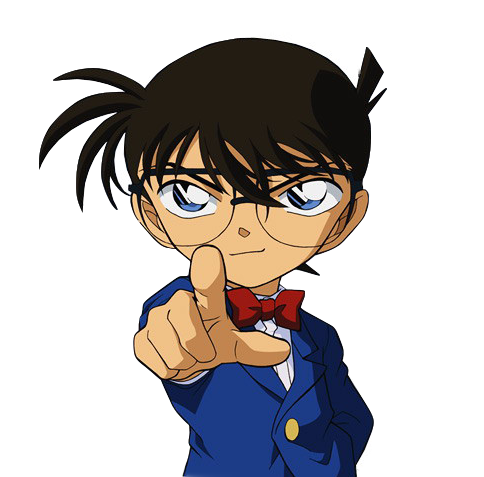

In [438]:
pictorialBar_1 = (
        PictorialBar(init_opts=opts.InitOpts(width='620px',height='370px',theme=ThemeType.SHINE))
        .add_xaxis(list(company_top10.keys())[::-1])
        .add_yaxis(
        "",
            list(company_top10.values())[::-1],
            label_opts=opts.LabelOpts(is_show=False),
            symbol_size=22,
            symbol_repeat="fixed",
            symbol_offset=[0, -5],
            is_symbol_clip=True,
            symbol=image_data_2,
            
#             symbol=SymbolType.TRIANGLE,
        )
        .reversal_axis()
        .set_global_opts(
            title_opts=opts.TitleOpts(title="数据分析师招聘需求top10公司"),
            xaxis_opts=opts.AxisOpts(is_show=True),
            yaxis_opts=opts.AxisOpts(
#                 name="公司名称",
                axislabel_opts=opts.LabelOpts(font_size=12),
                axistick_opts=opts.AxisTickOpts(is_show=False),
                axisline_opts=opts.AxisLineOpts(
                    linestyle_opts=opts.LineStyleOpts(opacity=0)
                ),
            ),
            toolbox_opts=opts.ToolboxOpts(orient='vertical',pos_left='right'),
        )
    )
pictorialBar_1.render_notebook()

In [93]:
raw_data[raw_data['companyShortName'] == '字节跳动'].sort_values(by='positionName')

,positionName,positionLables,workYear,positionAdvantage,education,jobNature,skillLables,city,companyFullName,companyShortName,...,industryField,firstType,secondType,thirdType,latitude,longitude,resumeProcessDay,resumeProcessRate,min_salary,max_salary
588,业务中台数据分析师,数据分析,3-5年,免费三餐下午茶,本科,全职,数据分析,北京,北京字节跳动科技有限公司,字节跳动,...,文娱丨内容,产品|需求|项目类,数据分析,数据分析,39.968670,116.330086,0,0,20,40
560,人力数据分析师,"人事, 招聘, 员工关系, 薪酬福利, HRBP",3-5年,六险一金，免费三餐，租房补贴，带薪休假,本科,全职,"人事, 招聘, 员工关系, 薪酬福利, HRBP",北京,北京字节跳动科技有限公司,字节跳动,...,文娱丨内容,综合职能|高级管理,人力资源,其他人力资源,39.975430,116.338570,0,0,20,35
1119,华东策略运营（用户数据分析方向）,"营销, 数字营销, 社会化营销, 整合营销, 互相营销",3-5年,六险一金，免费三餐，租房补贴，带薪休假,本科,全职,"营销, 数字营销, 社会化营销, 整合营销, 互相营销",上海,北京字节跳动科技有限公司,字节跳动,...,文娱丨内容,市场|商务类,市场|营销,其他市场|营销,31.166936,121.387863,0,0,12,20
547,商业产品实习生-数据分析,产品经理,不限,弹性工作，免费三餐，餐补，租房补贴,本科,实习,产品经理,北京,北京字节跳动科技有限公司,字节跳动,...,文娱丨内容,产品|需求|项目类,产品经理,其他产品经理,39.979386,116.313061,0,0,4,5
1828,商业化-数据分析支持,"广告营销, 技术支持",1-3年,六险一金、团队氛围好、带薪休假、晋升空间,本科,全职,技术支持,武汉,北京字节跳动科技有限公司,字节跳动,...,文娱丨内容,销售类,销售,其他销售,30.582284,114.364617,1,100,5,10
1815,商业化-高级数据分析师,项目管理,3-5年,六险一金，餐补，带薪休假，扁平管理,本科,全职,项目管理,武汉,北京字节跳动科技有限公司,字节跳动,...,文娱丨内容,产品|需求|项目类,项目管理,其他项目管理,30.582284,114.364617,1,100,8,16
893,商业化数据分析师,"移动互联网, 数据分析",3-5年,六险二金 餐补 租房补贴 岗位晋升,本科,全职,数据分析,上海,北京字节跳动科技有限公司,字节跳动,...,文娱丨内容,产品|需求|项目类,数据分析,数据分析,22.867666,108.296770,0,0,15,30
555,商业化数据分析师,数据分析,3-5年,六险一金，弹性工作，免费三餐，租房补贴，扁平管理，职业大牛，晋升空间，团队氛围好,本科,全职,数据分析,北京,北京字节跳动科技有限公司,字节跳动,...,文娱丨内容,产品|需求|项目类,数据分析,数据分析,39.979386,116.313061,0,0,20,40
570,商业化数据分析经理,产品,3-5年,六险一金，免费三餐，租房补贴,本科,全职,产品,北京,北京字节跳动科技有限公司,字节跳动,...,文娱丨内容,运营|编辑|客服类,运营,其他运营,39.977077,116.330589,0,0,15,30
576,商业化电商数据分析师,产品,3-5年,六险一金，弹性工作，免费三餐，租房补贴,本科,全职,产品,北京,北京字节跳动科技有限公司,字节跳动,...,文娱丨内容,运营|编辑|客服类,运营,其他运营,39.977077,116.330589,0,0,10,20


In [94]:
raw_data[raw_data['companyShortName'].str.contains('阿里')]

,positionName,positionLables,workYear,positionAdvantage,education,jobNature,skillLables,city,companyFullName,companyShortName,...,industryField,firstType,secondType,thirdType,latitude,longitude,resumeProcessDay,resumeProcessRate,min_salary,max_salary
201,数据分析产品经理,"数据分析, 数据库",3-5年,"阿里平台,年底双薪",本科,全职,"数据分析, 数据库",北京,高德软件有限公司,阿里巴巴-高德,...,工具,产品|需求|项目类,数据分析,数据分析,39.993093,116.473995,1,14,20,40
268,数据分析运营,运营,3-5年,平台好，级别高，待遇好,本科,全职,运营,北京,高德软件有限公司,阿里巴巴-高德,...,工具,运营|编辑|客服类,运营,数据运营,39.992958,116.473575,0,0,20,40
1003,数据分析师,数据分析,应届毕业生,"阿里巴巴，完善福利,技术导向",不限,全职,数据分析,上海,淘宝（中国）软件有限公司,阿里巴巴-新零售技术事业群,...,电商,产品|需求|项目类,数据分析,数据分析,31.204713,121.313679,1,100,20,35
1020,数据分析师,数据分析,应届毕业生,年底时企业向员工发放额外的4个月薪水,不限,全职,数据分析,上海,阿里云计算有限公司,阿里云,...,"电商,企业服务",开发|测试|运维类,数据开发,数据分析,31.221517,121.544379,0,0,18,36
1756,商业数据分析高级专家,"电商, 医疗健康, 商业, 可视化, 数据分析, 数据运营",5-10年,上市公司,硕士,全职,"商业, 可视化, 数据分析, 数据运营",杭州,阿里健康科技（中国）有限公司,阿里健康,...,"移动互联网,电商",产品|需求|项目类,数据分析,BI,30.279212,120.026208,1,11,30,40


* 对于数据分析师的需求，字节跳动有限公司一马当先，查看其招聘数据可以看到，其涉及业务领域非常广泛，海外版抖音数据分析师，游戏直播数据分析师，行业/商业数据分析师，风险数据分析师等等，而且在多个城市均有招聘
* 其他需求较大的都是互联网、电商、快递巨头，意外的是阿里需求数没有排进前10

#### 不同融资阶段公司与数据分析职位需求概况

In [95]:
financeStage_lst = raw_data[['city','financeStage','positionName']].groupby(['city','financeStage']).count().reset_index().rename(columns={'financeStage':'name','positionName':'value'}).to_dict(orient='records')
financeStage_lst[0:5]

[{'city': '上海', 'name': 'A轮', 'value': 46},
 {'city': '上海', 'name': 'B轮', 'value': 58},
 {'city': '上海', 'name': 'C轮', 'value': 43},
 {'city': '上海', 'name': 'D轮及以上', 'value': 42},
 {'city': '上海', 'name': '上市公司', 'value': 112}]

In [96]:
'''

构造下面格式的数据用于旭日图
[{"name": "Flora", "itemStyle": {"color": "#da0d68"},
        "children": [
            {
                "name": "Black Tea",
                "value": 1,
                "itemStyle": {
                    "color": "#975e6d"
                }
            }]
]
'''
financeStage_data = [
    {'name':'北京'},{'name':'上海'},{'name':'广州'},{'name':'深圳'},{'name':'成都'},{'name':'杭州'},{'name':'重庆'},{'name':'武汉'}
]
sunburst_data = []
for d in financeStage_data:
    medium_step = []
    for item in financeStage_lst:
        if d['name'] == item['city']:
            medium_step.append({'name':item['name'],'value':item['value']})
    sunburst_data.append({'name':d['name'],'children':medium_step})
sunburst_data

[{'name': '北京',
  'children': [{'name': 'A轮', 'value': 46},
   {'name': 'B轮', 'value': 53},
   {'name': 'C轮', 'value': 96},
   {'name': 'D轮及以上', 'value': 95},
   {'name': '上市公司', 'value': 168},
   {'name': '不需要融资', 'value': 141},
   {'name': '天使轮', 'value': 8},
   {'name': '未融资', 'value': 36}]},
 {'name': '上海',
  'children': [{'name': 'A轮', 'value': 46},
   {'name': 'B轮', 'value': 58},
   {'name': 'C轮', 'value': 43},
   {'name': 'D轮及以上', 'value': 42},
   {'name': '上市公司', 'value': 112},
   {'name': '不需要融资', 'value': 72},
   {'name': '天使轮', 'value': 14},
   {'name': '未融资', 'value': 28}]},
 {'name': '广州',
  'children': [{'name': 'A轮', 'value': 13},
   {'name': 'B轮', 'value': 13},
   {'name': 'C轮', 'value': 14},
   {'name': 'D轮及以上', 'value': 7},
   {'name': '上市公司', 'value': 49},
   {'name': '不需要融资', 'value': 46},
   {'name': '天使轮', 'value': 4},
   {'name': '未融资', 'value': 22}]},
 {'name': '深圳',
  'children': [{'name': 'A轮', 'value': 33},
   {'name': 'B轮', 'value': 16},
   {'name': 'C轮', 'v

In [97]:
from pyecharts.charts import Sunburst

In [416]:
sunburst = (
    Sunburst(init_opts=opts.InitOpts())
        .add(series_name="", data_pair=sunburst_data, radius=[0, "90%"],
            highlight_policy="ancestor",
#             sort_="null",
            levels=[
                {},
                {
                    "r0": "15%",
                    "r": "40%",
                    "itemStyle": {"borderWidth": 2},
                    "label": {"rotate": "tangential"},
                },
                {"r0": "40%", "r": "90%", "label": {"align": "right"}},
#                 {
#                     "r0": "70%",
#                     "r": "72%",
#                     "label": {"position": "outside", "padding": 3, "silent": False},
#                     "itemStyle": {"borderWidth": 3},
#                 },
            ],
            )
        .set_global_opts(title_opts=opts.TitleOpts(title="公司融资状态与职位需求图",subtitle='按公司融资阶段'),
                        toolbox_opts=opts.ToolboxOpts(orient='vertical',pos_left='right'))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
)
sunburst.render_notebook()

* 上市公司或者不需要融资的公司对于数据分析师职位的需求名列前茅，大平台、完善体系、多元业务，更重要的是财大气粗

#### 公司与简历处理情况

In [99]:
resumeProcess_company_df = raw_data[['companyShortName','resumeProcessDay','resumeProcessRate']].groupby(by='companyShortName').mean()
resumeProcess_company_df.head()

,resumeProcessDay,resumeProcessRate
companyShortName,,
2345.com,1.500000,77.500000
23魔方,5.000000,3.000000
360,0.833333,15.333333
3K游戏,1.000000,91.000000
4399游戏,1.000000,100.000000


In [100]:
resumeProcess_company_df[~(resumeProcess_company_df['resumeProcessDay'] * resumeProcess_company_df['resumeProcessRate']==0)].sort_values(by=['resumeProcessRate','resumeProcessDay'],ascending=[False,True]).head(2)

,resumeProcessDay,resumeProcessRate
companyShortName,,
4399游戏,1.0,100.0
90玩,1.0,100.0


* 本来是想将简历处理效率top10的公司进行可视化，但是发现有很多公司的简历处理率是100%，并且处理天数都是1天，那么再将这个结果进行可视化就没有什么意义

In [117]:
# raw_data['companyShortName'].isin(['北京京东世纪贸易有限公司','腾讯科技（深圳）有限公司','百度在线网络技术（北京）有限公司',''])
#网易（杭州）有限公司,阿里云计算有限公司,华为技术有限公司,北京字节跳动科技有限公司，北京三快在线科技有限公司，北京嘀嘀无限科技发展有限公司
# 上海寻梦信息技术有限公司
raw_data['companyFullName'][raw_data['companyShortName'].str.contains('拼多多')].unique()

array(['上海寻梦信息技术有限公司'], dtype=object)

### 求职者维度 

#### 不同学历、经验的可预期薪资

In [225]:
education_workYear_df = raw_data[['city','workYear','education','min_salary','max_salary']].copy()
education_workYear_df['avg_salary'] = np.mean(education_workYear_df[['min_salary','max_salary']],axis=1)
education_workYear_df = education_workYear_df[['city','education','workYear','avg_salary']].groupby(['city','education','workYear']).mean().unstack()
#将所有NaN值替换为-1
education_workYear_df.fillna(-1.0,inplace=True)
education_workYear_df.head()

avg_salary                                                \
workYear             1-3年 10年以上   1年以下       3-5年      5-10年         不限   
city education                                                            
上海   不限         17.187500  -1.0  -1.00  19.500000  31.500000  11.333333   
     博士         -1.000000  -1.0  -1.00  -1.000000  -1.000000  22.500000   
     大专          8.857143  -1.0  -1.00  13.000000  -1.000000  15.250000   
     本科         16.032407  -1.0  12.25  21.724638  32.336957  14.236842   
     硕士         24.300000  -1.0  -1.00  26.730769  40.000000  15.090909   

                           
workYear            应届毕业生  
city education             
上海   不限         11.833333  
     博士         -1.000000  
     大专          2.500000  
     本科          7.111111  
     硕士          9.166667

In [241]:
#学历列表
education_lst = ['不限', '大专', '本科', '硕士', '博士']

In [254]:
def construct_data(city,education_level):
    '''
    自定义用于多维散点图的数据构造函数，传入参数是城市名称和学历
    返回：[(11.83, '上海'),(11.33, '上海'),(nan, '上海'),(17.19, '上海'),(19.5, '上海'),(31.5, '上海'),(nan, '上海')]
    列表中每个值都需要和x轴标签--工作经验一一对应
    workYear_list = ['应届毕业生', '不限', '1年以下', '1-3年', '3-5年', '5-10年', '10年以上']
    '''
    scatter_data = []
    for job_year in workYear_list:
        try:
            result = education_workYear_df.loc[(city,education_level)]['avg_salary',job_year]
            if result != -1:
                scatter_data.append((round(float(result),ndigits=2),city))
            else:
                scatter_data.append((np.nan,city))
        #某个城市可能没有某些学历对应的数据，比如广州没有要求硕士以上学历，也就没有相应数据，那么返回一个全是np.nan长度为7的列表
        except:
            scatter_data = [(np.nan,city)] * 7
    return scatter_data

In [129]:
from pyecharts.commons.utils import JsCode

In [418]:
#创建scatter实例
scatter_2 = (
    Scatter(init_opts=opts.InitOpts(width='650px',height='370px',theme=ThemeType.SHINE))
        .add_xaxis(workYear_list)
        .set_series_opts(            
#             label_opts=opts.LabelOpts(font_size=30,font_style='kaiti'),
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title="学历经验与可预期薪资"),
            tooltip_opts=opts.TooltipOpts(
                formatter=JsCode(
                    "function (params) {return params.name + ' : ' + params.value[2] + params.value[1];}"
                )
            ),
            legend_opts=opts.LegendOpts(pos_left='30%'),
            toolbox_opts=opts.ToolboxOpts(orient='vertical',pos_left='right'),
            visualmap_opts=opts.VisualMapOpts(
                type_="color", max_=55, min_=0, dimension=1
            ),
        )
)
#循环添加y轴元素
for edu in education_lst:
    for cit_name in city_name_list:
        scatter_2.add_yaxis(
                    edu,
                    construct_data(cit_name,edu),
                    label_opts=opts.LabelOpts(
                        position='right',
                        interval=2,
                        formatter=JsCode(
                            "function(params){return params.value[2] +' : '+ params.value[1];}"
                        )
                    ),
                )
scatter_2.render_notebook()

In [439]:
#将所有可视化结果展示到一个HTML页面中
page_all = Page(interval=0,layout=Page.SimplePageLayout,page_title='数据分析师职位数据可视化')

page_all.add(bar, pie, geo, scatter, bar_4,  scatter_2, pictorialBar_1,treemap, sunburst, wordcloud,   funnel,  
)
for z in zip(city_name_list,resumeProcessRate_city_lst):
    page_all.add(produce_gauge(z[0],round(z[1],ndigits=1)))
page_all.render()